In [ ]:
import torch
print("torch:", torch.__version__)
print("torch CUDA build:", torch.version.cuda)
print("GPU:", torch.cuda.get_device_name(0))
print("VRAM (GB):", torch.cuda.get_device_properties(0).total_memory / 1024**3)


torch: 2.9.0+cu128
torch CUDA build: 12.8
GPU: Tesla T4
VRAM (GB): 14.56317138671875


# **Fusion+Aug+Preprocessing- this is my main process**

COLAB: TRUE FL + GA-FELCM + PVTv2-B2 (FUSION) — 6 Clients (3+3) | AUG=ON
DEVICE: cuda | torch=2.9.0+cu126

STEP 0: DOWNLOAD DATASETS VIA kagglehub
Using Colab cache for faster access to the 'preprocessed-brain-mri-scans-for-tumors-detection' dataset.
✅ DS2 downloaded to: /kaggle/input/preprocessed-brain-mri-scans-for-tumors-detection
Using Colab cache for faster access to the 'pmram-bangladeshi-brain-cancer-mri-dataset' dataset.
✅ DS1 downloaded to: /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset

STEP 1: LOCATE DATASET ROOTS (NO MERGE)
Dataset-1 RAW root detected:
  /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Raw Data/Raw
Dataset-2 root detected:
  /kaggle/input/preprocessed-brain-mri-scans-for-tumors-detection/preprocessed_brain_mri_dataset

--------------------------------------------------------------------------------------------
Building Dataset-1 (RAW only)
ds1_raw: 51

path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                1053               226                226   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      5                       5   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     6                  298                222   

   subset_hash_n_test  
0                 224


--------------------------------------------------------------------------------------------
Leakage / Sanity Summary — ds2
--------------------------------------------------------------------------------------------


path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                4921              1055               1055   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      0                       3   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     4                  299                298   

   subset_hash_n_test  
0                 299


STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)
DS1 Client 0 (global id 0): 490 train, 77 tune, 67 val
DS1 Client 1 (global id 1): 125 train, 20 tune, 18 val
DS1 Client 2 (global id 2): 198 train, 31 tune, 27 val
DS2 Client 0 (global id 3): 629 train, 98 tune, 86 val
DS2 Client 1 (global id 4): 527 train, 82 tune, 72 val
DS2 Client 2 (global id 5): 2653 train, 412 tune, 362 val

--------------------------------------------------------------------------------------------
Client class distribution (Non-IID, per dataset)
--------------------------------------------------------------------------------------------


client dataset  total_train  total_tune  total_val  glioma  meningioma  \
0  client_0     ds1          490          77         67     111          46   
1  client_1     ds1          125          20         18      75           4   
2  client_2     ds1          198          31         27      16         147   
3  client_3     ds2          629          98         86      12         197   
4  client_4     ds2          527          82         72     202           4   
5  client_5     ds2         2653         412        362     665         691   

   notumor  pituitary  
0      176        157  
1        8         38  
2       30          5  
3      416          4  
4      284         37  
5      383        914


STEP 4: DATA LOADERS (AUG ON) + IMAGENET NORM
Augmentation: ON ✅
Preprocessing: ON ✅

--------------------------------------------------------------------------------------------
AUGMENTATION VISUAL CHECK (Before vs After) — WITH CLASS NAMES
--------------------------------------------------------------------------------------------


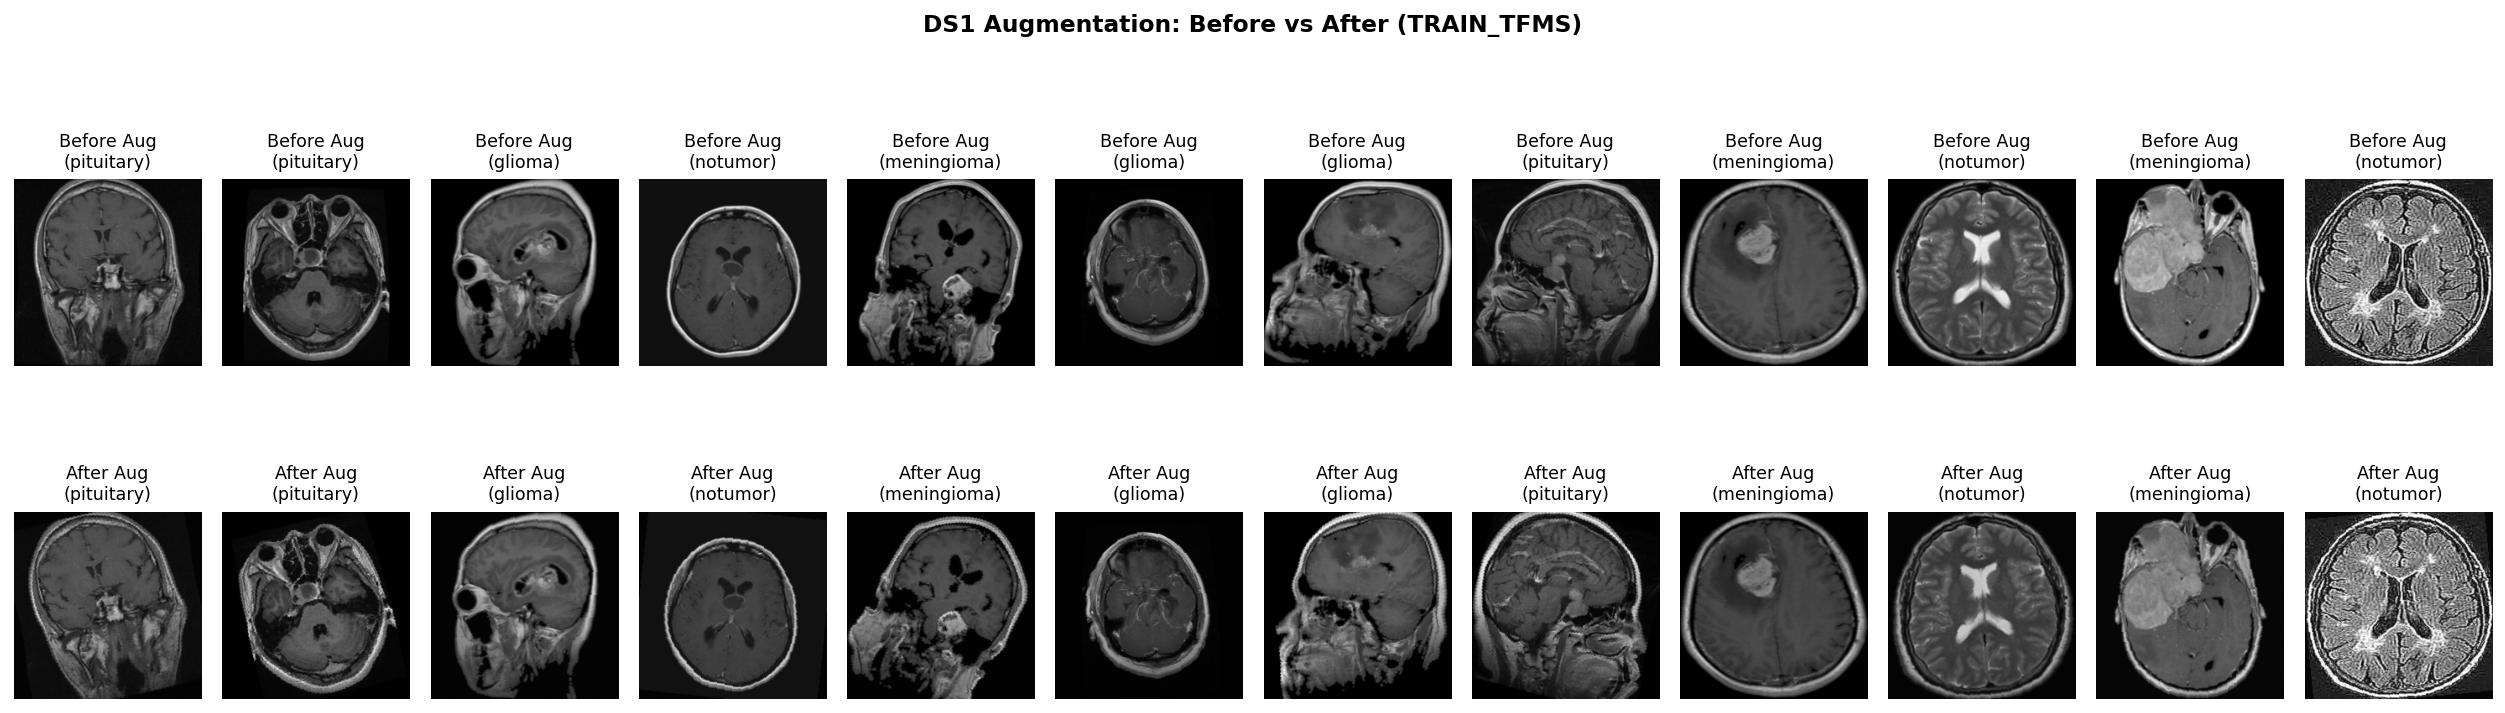

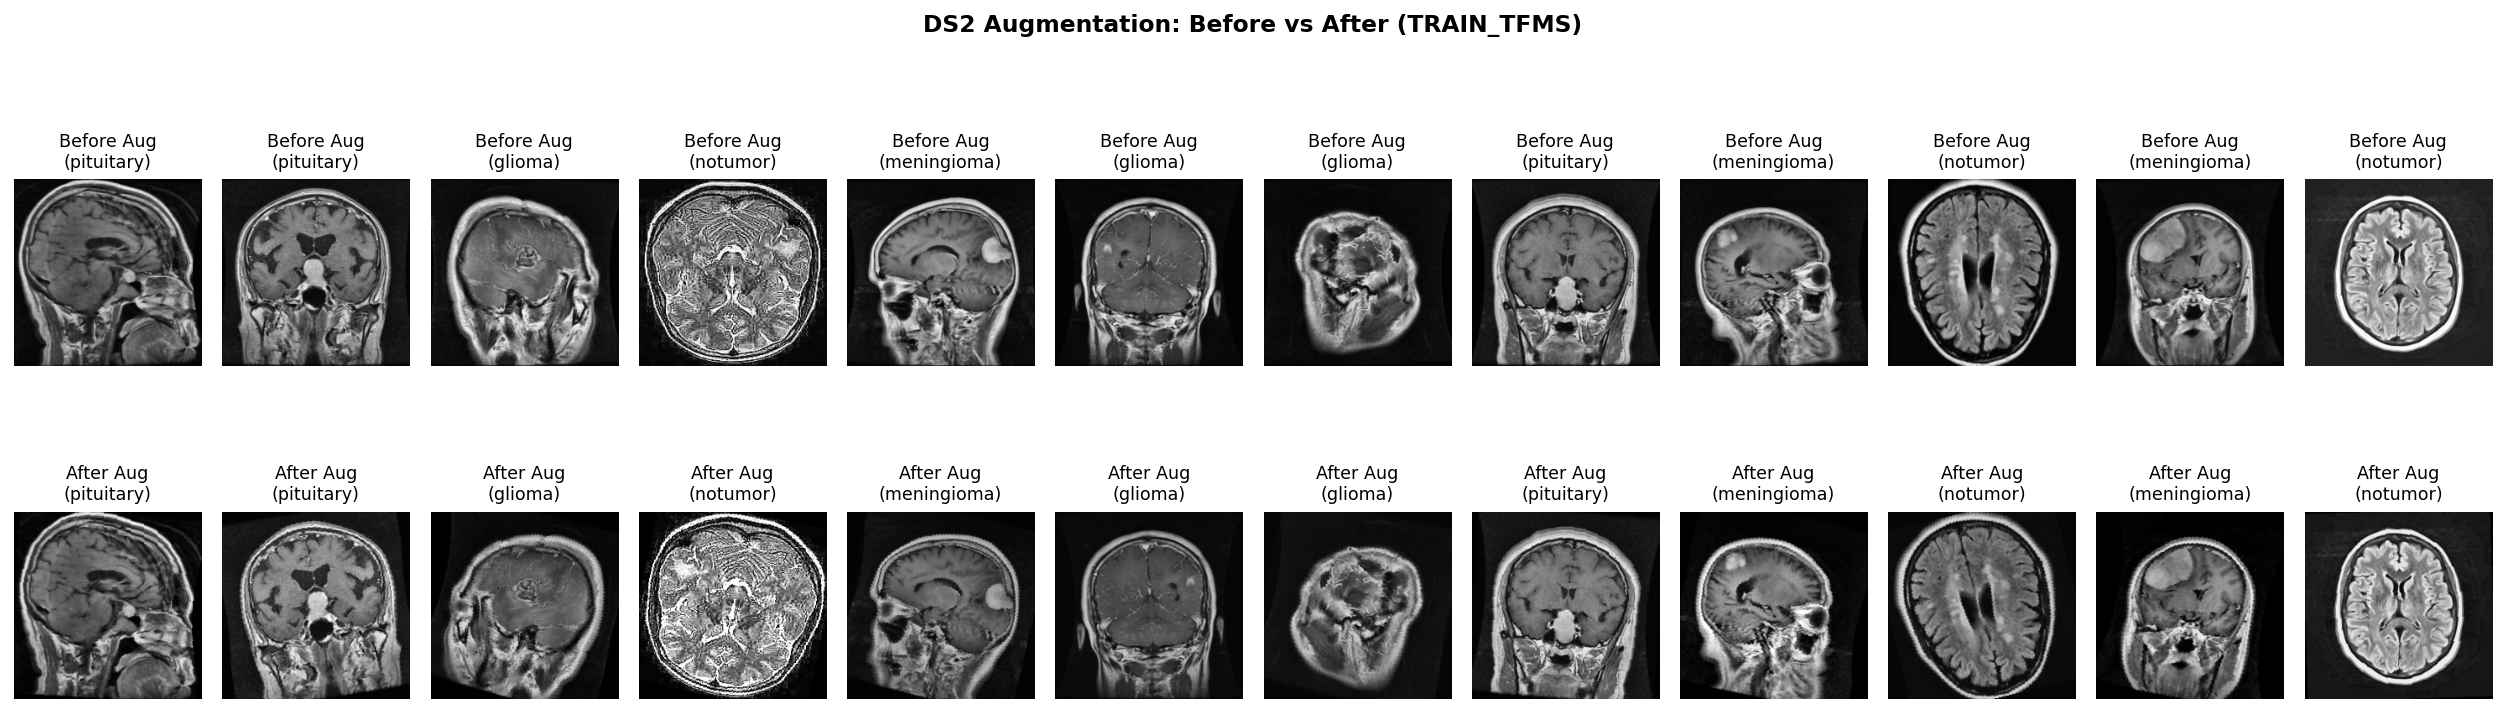


STEP 5: GA-TUNED ENHANCED FELCM PREPROCESSOR

STEP 6: MODEL (PVTv2-B2 + MULTI-SCALE FUSION)

STEP 7: GA FITNESS (ROBUST)

STEP 8: TRAIN / EVAL UTILITIES (FULL METRICS)

STEP 9: INITIALIZING GLOBAL MODEL

--------------------------------------------------------------------------------------------
Backbone: pvt_v2_b2 | pretrained_loaded=True
Total params: 25,989,002 | Trainable params: 1,139,146 (4.38%)
--------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------
Hyperparameters / Search Space
--------------------------------------------------------------------------------------------


hp_name  \
0           clients_per_dataset   
1                 clients_total   
2                        rounds   
3                  local_epochs   
4                            lr   
5                  weight_decay   
6                 warmup_epochs   
7               label_smoothing   
8                     grad_clip   
9                    fedprox_mu   
10                     img_size   
11                   batch_size   
12                  num_workers   
13              global_val_frac   
14                    test_frac   
15              client_val_frac   
16             client_tune_frac   
17     min_per_class_per_client   
18              dirichlet_alpha   
19            use_preprocessing   
20                       use_ga   
21                       ga_pop   
22                      ga_gens   
23                    ga_elites   
24               elite_pool_max   
25             use_augmentation   
26                     cond_dim   
27                 head_dropout   
28         unfreeze_after_round   
29             unfreeze_lr_mult   
30           unfreeze_tail_frac   
31  quick_hash_subset_per_split   
32         preproc_val_sample_n   
33               before_after_n   
34                   make_plots   
35                     ds1_base   
36                     ds2_base   
37              GA_theta_ranges   
38              theta_fullforms   
39                backbone_name   
40                         norm   

                                             hp_value  
0                                                   3  
1                                                   6  
2                                                  12  
3                                                   2  
4                                               0.001  
5                                              0.0005  
6                                                   1  
7                                                0.08  
8                                                 1.0  
9                                                0.01  
10                                                224  
11                                                 20  
12                                                  2  
13                                               0.15  
14                                               0.15  
15                                               0.12  
16                                               0.12  
17                                                  5  
18                                               0.35  
19                                               True  
20                                               True  
21                                                 10  
22                                                  5  
23                                                  3  
24                                                 18  
25                                               True  
26                                                128  
27                                                0.3  
28                                                  3  
29                                                0.1  
30                                               0.17  
31                                                300  
32                                                500  
33                                                 12  
34                                               True  
35  /kaggle/input/pmram-bangladeshi-brain-cancer-m...  
36  /kaggle/input/preprocessed-brain-mri-scans-for...  
37  gamma∈[0.7,1.4], alpha∈[0.15,0.55], beta∈[3,9]...  
38  {'gamma': 'Power transform exponent (γ)', 'alp...  
39                                          pvt_v2_b2  
40                                  ImageNet mean/std


STEP 10: FEDERATED TRAINING (NO CENTRAL VAL/TEST)
Rounds: 12 | Clients: 6 | Local epochs: 2
LR=0.001 | label_smoothing=0.08 | grad_clip=1.0 | FedProx μ=0.01
GA: ON | Preproc: ON | Aug: ON
Unfreeze after round: 3 | tail frac: 0.17 | bb lr mult: 0.1

ROUND 1/12
Client 0 (ds1) | train_acc=0.5582 | val_acc=0.7910 | val_prec=0.7531 | val_rec=0.7354 | val_f1=0.7042 | val_auc=0.9610 | val_logloss=0.4683 | GA_fit=9.773 | time(train=13.3s, eval=1.1s, ga=5.9s) | theta=(γ=0.87, α=0.15, β=5.0, τ=3.1, k=3, sh=0.08, dn=0.06)
Client 1 (ds1) | train_acc=0.3320 | val_acc=0.3889 | val_prec=0.4167 | val_rec=0.5000 | val_f1=0.4500 | val_auc=nan | val_logloss=1.4795 | GA_fit=4.173 | time(train=3.7s, eval=0.4s, ga=5.7s) | theta=(γ=1.30, α=0.43, β=3.6, τ=2.0, k=7, sh=0.00, dn=0.10)
Client 2 (ds1) | train_acc=0.5455 | val_acc=0.8148 | val_prec=0.5815 | val_rec=0.6125 | val_f1=0.5543 | val_auc=0.8806 | val_logloss=0.6970 | GA_fit=3.259 | time(train=5.5s, eval=0.6s, ga=5.7s) | theta=(γ=1.41, α=0.55, β=2.7, τ=2

round  round_time_s                                   global_theta_ds1  \
0       1    188.501489  (γ=0.90, α=0.20, β=5.5, τ=3.1, k=7, sh=0.03, d...   
1       2    192.555112  (γ=0.87, α=0.15, β=5.0, τ=3.1, k=3, sh=0.08, d...   
2       3    200.428482  (γ=0.87, α=0.15, β=5.0, τ=3.1, k=3, sh=0.08, d...   
3       4    202.581489  (γ=0.83, α=0.21, β=2.7, τ=3.4, k=7, sh=0.12, d...   
4       5    199.027365  (γ=0.88, α=0.27, β=3.2, τ=3.4, k=7, sh=0.06, d...   
5       6    199.945906  (γ=0.83, α=0.21, β=2.7, τ=3.4, k=7, sh=0.12, d...   
6       7    201.015542  (γ=0.87, α=0.15, β=5.0, τ=3.1, k=3, sh=0.08, d...   
7       8    198.598137  (γ=0.87, α=0.15, β=5.0, τ=3.1, k=3, sh=0.08, d...   
8       9    199.815006  (γ=0.88, α=0.27, β=3.2, τ=3.4, k=7, sh=0.06, d...   
9      10    199.670622  (γ=0.87, α=0.15, β=5.0, τ=3.1, k=3, sh=0.08, d...   
10     11    199.632338  (γ=0.88, α=0.27, β=3.2, τ=3.4, k=7, sh=0.06, d...   
11     12    199.192211  (γ=0.87, α=0.15, β=5.0, τ=3.1, k=3, sh=0.08, d...   

                                     global_theta_ds2  global_acc  \
0   (γ=1.01, α=0.14, β=6.1, τ=3.0, k=5, sh=0.03, d...    0.856013   
1   (γ=1.11, α=0.10, β=5.6, τ=2.9, k=5, sh=0.03, d...    0.908228   
2   (γ=1.01, α=0.14, β=6.1, τ=3.0, k=5, sh=0.03, d...    0.944620   
3   (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, d...    0.952532   
4   (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, d...    0.950949   
5   (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, d...    0.949367   
6   (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, d...    0.962025   
7   (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, d...    0.957278   
8   (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, d...    0.966772   
9   (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, d...    0.968354   
10  (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, d...    0.971519   
11  (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, d...    0.965190   

    global_f1_macro  global_precision_macro  global_recall_macro  \
0          0.747433                0.751745             0.759594   
1          0.832734                0.830232             0.852832   
2          0.890503                0.891133             0.907766   
3          0.908532                0.910711             0.913124   
4          0.905130                0.905538             0.911600   
5          0.906308                0.900347             0.917433   
6          0.951179                0.952025             0.956988   
7          0.935175                0.930633             0.957946   
8          0.929034                0.930874             0.929599   
9          0.924461                0.924078             0.926263   
10         0.958359                0.961610             0.959494   
11         0.961813                0.969263             0.957626   

    global_log_loss  global_loss_ce  global_eval_time_s  
0          0.395607        0.393652            3.070890  
1          0.284165        0.294035            2.953703  
2          0.205551        0.202403            2.964072  
3          0.187326        0.190937            2.935725  
4          0.178573        0.184943            2.907240  
5          0.183162        0.178242            2.956821  
6          0.173627        0.171055            2.986767  
7          0.156189        0.166090            2.933246  
8          0.163440        0.166541            2.961411  
9          0.149195        0.142677            2.941350  
10         0.143857        0.142966            2.924719  
11         0.152523        0.145669            2.937602


--------------------------------------------------------------------------------------------
LOCAL per-client per-round metrics
--------------------------------------------------------------------------------------------


round    client dataset  ga_best_fit_score  ga_time_s  \
0       1  client_0     ds1           9.772961   5.930152   
1       1  client_1     ds1           4.173194   5.660890   
2       1  client_2     ds1           3.258877   5.735332   
3       1  client_3     ds2           7.556218   5.758303   
4       1  client_4     ds2          14.787195   5.898300   
..    ...       ...     ...                ...        ...   
67     12  client_1     ds1           7.245045   6.102557   
68     12  client_2     ds1          22.922110   6.147775   
69     12  client_3     ds2          13.399485   5.972898   
70     12  client_4     ds2          12.535232   6.005789   
71     12  client_5     ds2          15.452667   5.998262   

                                            theta_str  gamma_power  \
0   (γ=0.87, α=0.15, β=5.0, τ=3.1, k=3, sh=0.08, d...     0.869119   
1   (γ=1.30, α=0.43, β=3.6, τ=2.0, k=7, sh=0.00, d...     1.302500   
2   (γ=1.41, α=0.55, β=2.7, τ=2.3, k=7, sh=0.00, d...     1.406555   
3   (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, d...     0.911158   
4   (γ=0.90, α=0.08, β=4.1, τ=3.2, k=3, sh=0.13, d...     0.896938   
..                                                ...          ...   
67  (γ=0.99, α=0.11, β=5.0, τ=2.7, k=7, sh=0.00, d...     0.989184   
68  (γ=1.19, α=0.49, β=8.5, τ=3.4, k=5, sh=0.00, d...     1.193509   
69  (γ=1.10, α=0.08, β=5.3, τ=2.8, k=5, sh=0.00, d...     1.099139   
70  (γ=1.20, α=0.08, β=5.3, τ=3.5, k=3, sh=0.05, d...     1.202171   
71  (γ=1.25, α=0.10, β=5.2, τ=2.4, k=3, sh=0.04, d...     1.251128   

    alpha_contrast_weight  beta_contrast_sharpness  tau_clip  ...  \
0                0.146381                 4.979632  3.057542  ...   
1                0.430136                 3.611320  1.998848  ...   
2                0.553205                 2.669475  2.325308  ...   
3                0.111741                 4.076293  3.125401  ...   
4                0.080000                 4.097971  3.221439  ...   
..                    ...                      ...       ...  ...   
67               0.106865                 5.000081  2.696413  ...   
68               0.494978                 8.526003  3.438292  ...   
69               0.080000                 5.319137  2.793289  ...   
70               0.080000                 5.316071  3.456809  ...   
71               0.104212                 5.153828  2.403901  ...   

    val_g2_mean  val_g2_entropy_mean  val_g2_mean_c0  val_g2_entropy_c0  \
0      0.481982             0.939094        0.481982           0.939094   
1      0.483339             0.943492        0.483339           0.943492   
2      0.478626             0.945552        0.478626           0.945552   
3      0.521061             0.948825        0.521061           0.948825   
4      0.514386             0.946751        0.514386           0.946751   
..          ...                  ...             ...                ...   
67     0.480098             0.942919        0.480098           0.942919   
68     0.479379             0.943232        0.479379           0.943232   
69     0.512515             0.948150        0.512515           0.948150   
70     0.503142             0.944757        0.503142           0.944757   
71     0.487661             0.947641        0.487661           0.947641   

    val_g2_mean_c1  val_g2_entropy_c1  val_g2_mean_c2  val_g2_entropy_c2  \
0         0.481982           0.939094        0.481982           0.939094   
1              NaN                NaN        0.483339           0.943492   
2         0.478626           0.945552        0.478626           0.945552   
3         0.521061           0.948825        0.521061           0.948825   
4              NaN                NaN        0.514386           0.946751   
..             ...                ...             ...                ...   
67             NaN                NaN        0.480098           0.942919   
68        0.479379           0.943232        0.479379           0.943232   
69        0.5125


STEP 11: FINAL EVALUATION (FEDERATED VAL + TEST)

--------------------------------------------------------------------------------------------
VAL+TEST tables (federated, per-dataset + global)
--------------------------------------------------------------------------------------------


setting split           dataset       acc  \
0  Enhanced FELCM (Best θ ds1/ds2)   VAL  ds1+ds2 weighted  0.969937   
1      Enhanced FELCM (Best θ ds1)  TEST               ds1  0.982301   
2      Enhanced FELCM (Best θ ds2)  TEST               ds2  0.977251   
3          Enhanced FELCM (Best θ)  TEST   global weighted  0.978142   

   precision_macro  recall_macro  f1_macro  precision_weighted  \
0         0.961479      0.967047  0.962056            0.971305   
1         0.983478      0.982757  0.982624            0.982975   
2         0.976363      0.976300  0.976190            0.977632   
3         0.977619      0.977439  0.977325            0.978574   

   recall_weighted  f1_weighted  log_loss  auc_roc_macro_ovr   loss_ce  \
0         0.969937     0.969992  0.138580                NaN  0.137417   
1         0.982301     0.982157  0.136806           0.984996  0.133235   
2         0.977251     0.977297  0.121436           0.998373  0.120192   
3         0.978142     0.978154  0.124148           0.996013  0.122493   

   eval_time_s  
0     2.994364  
1     1.196670  
2     4.494690  
3     3.912838


Paper selection summary:
- Best round (by federated VAL accuracy): round=11 | best_val_acc=0.9715
- Best θ ds1: (γ=0.87, α=0.15, β=5.0, τ=3.1, k=3, sh=0.08, dn=0.06)
- Best θ ds2: (γ=0.91, α=0.11, β=4.1, τ=3.1, k=3, sh=0.09, dn=0.23)

STEP 12: PREPROCESSING VALIDATION (DS1 VAL SAMPLE)

--------------------------------------------------------------------------------------------
Preprocessing validation summary (DS1 VAL sample)
--------------------------------------------------------------------------------------------


metric      mean       std       min       max
0  edge_energy_before  0.041596  0.021720  0.014947  0.165471
1   edge_energy_after  0.077349  0.023369  0.041081  0.204442
2      entropy_before  5.820408  0.628255  3.547314  7.239670
3       entropy_after  6.422492  0.586896  3.786488  7.489746
4     contrast_before  0.187640  0.052597  0.101468  0.363759
5      contrast_after  0.251926  0.027116  0.205642  0.358400
6     edge_gain_ratio  1.991257  0.410748  1.134324  3.291864
7       entropy_delta  0.602085  0.235290  0.139728  1.428649
8      contrast_delta  0.064286  0.033260 -0.005359  0.139326


STEP 13: BEFORE vs AFTER PREPROCESSING IMAGES (BEST θ) — PRINTED


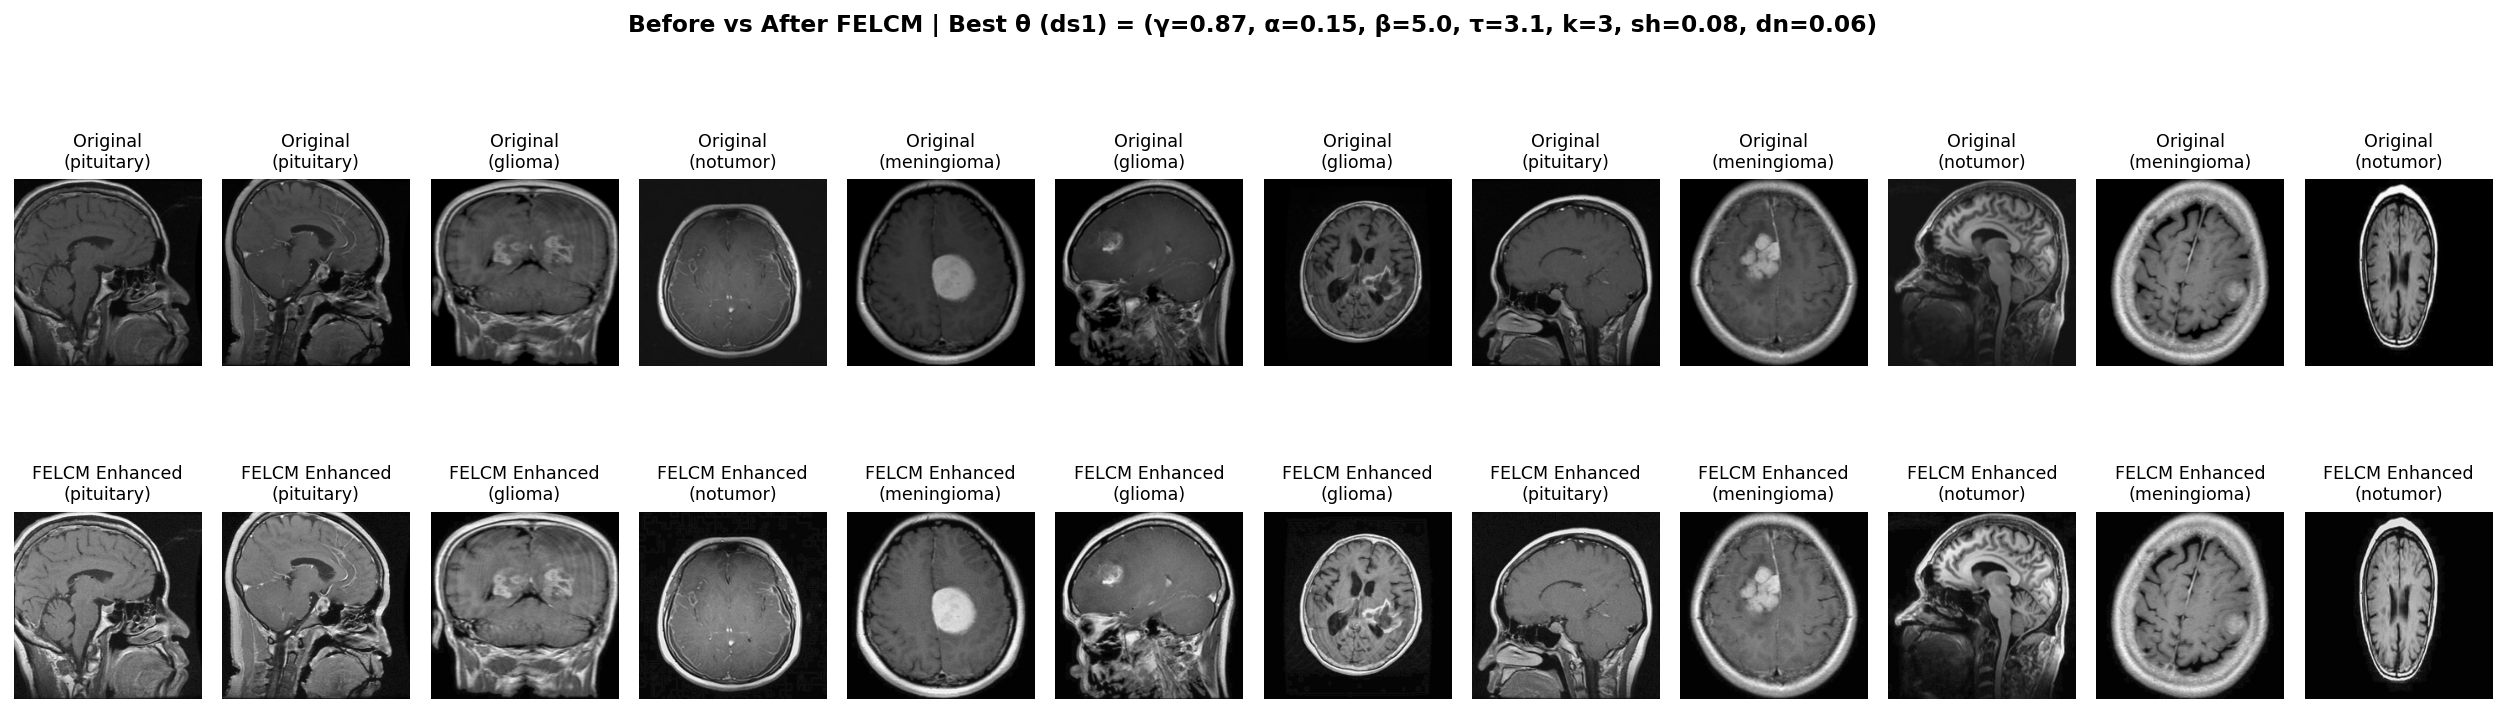


STEP 14: ROC + PR CURVES (TEST, Best θ) — DS1


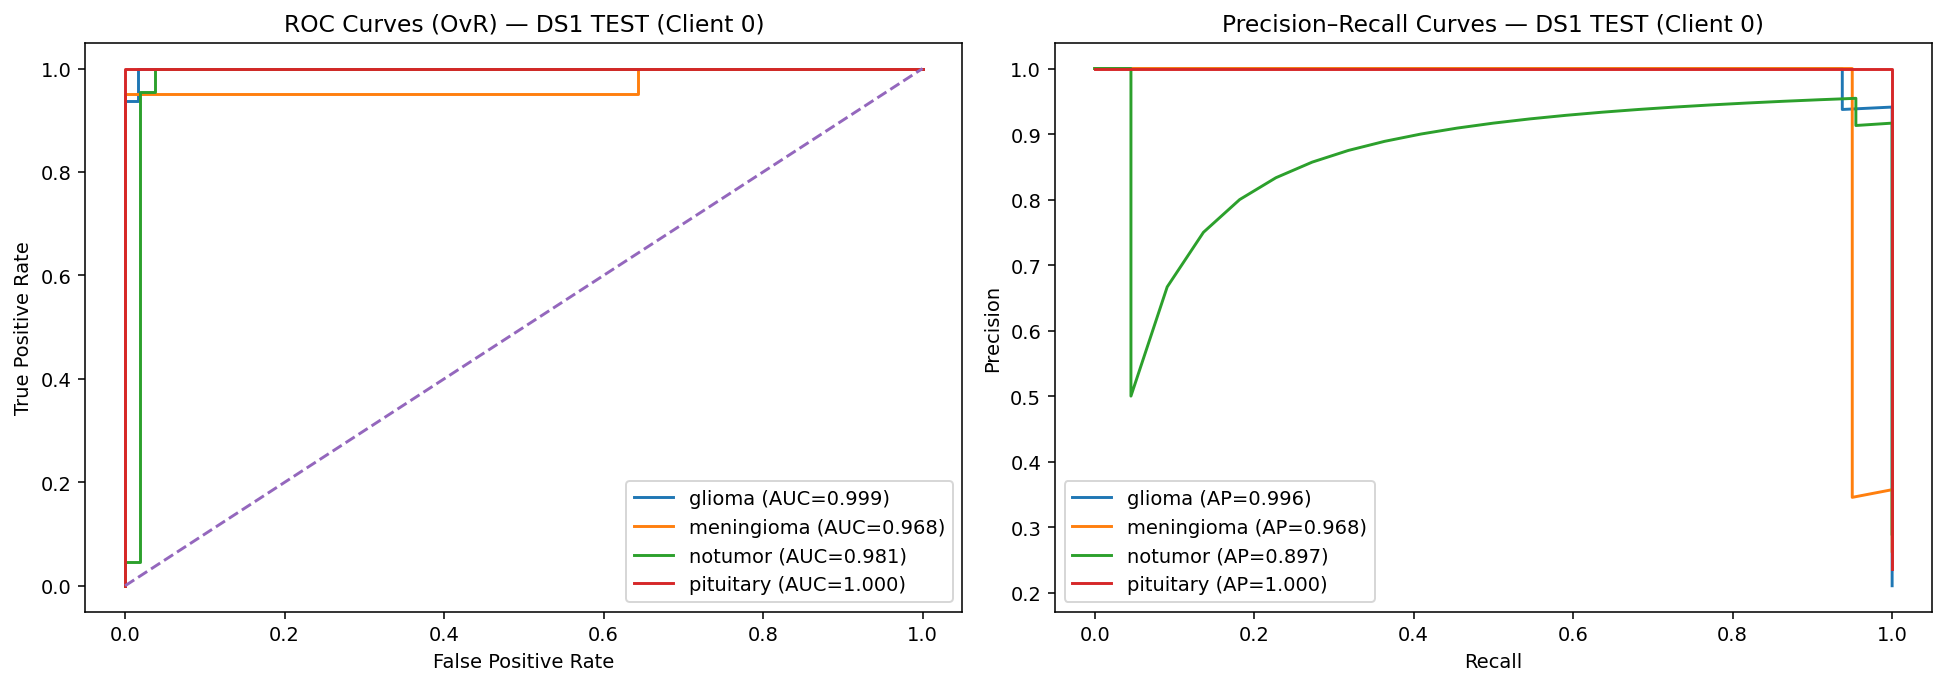


STEP 15: CONFUSION MATRIX (TEST, Best θ) — DS1


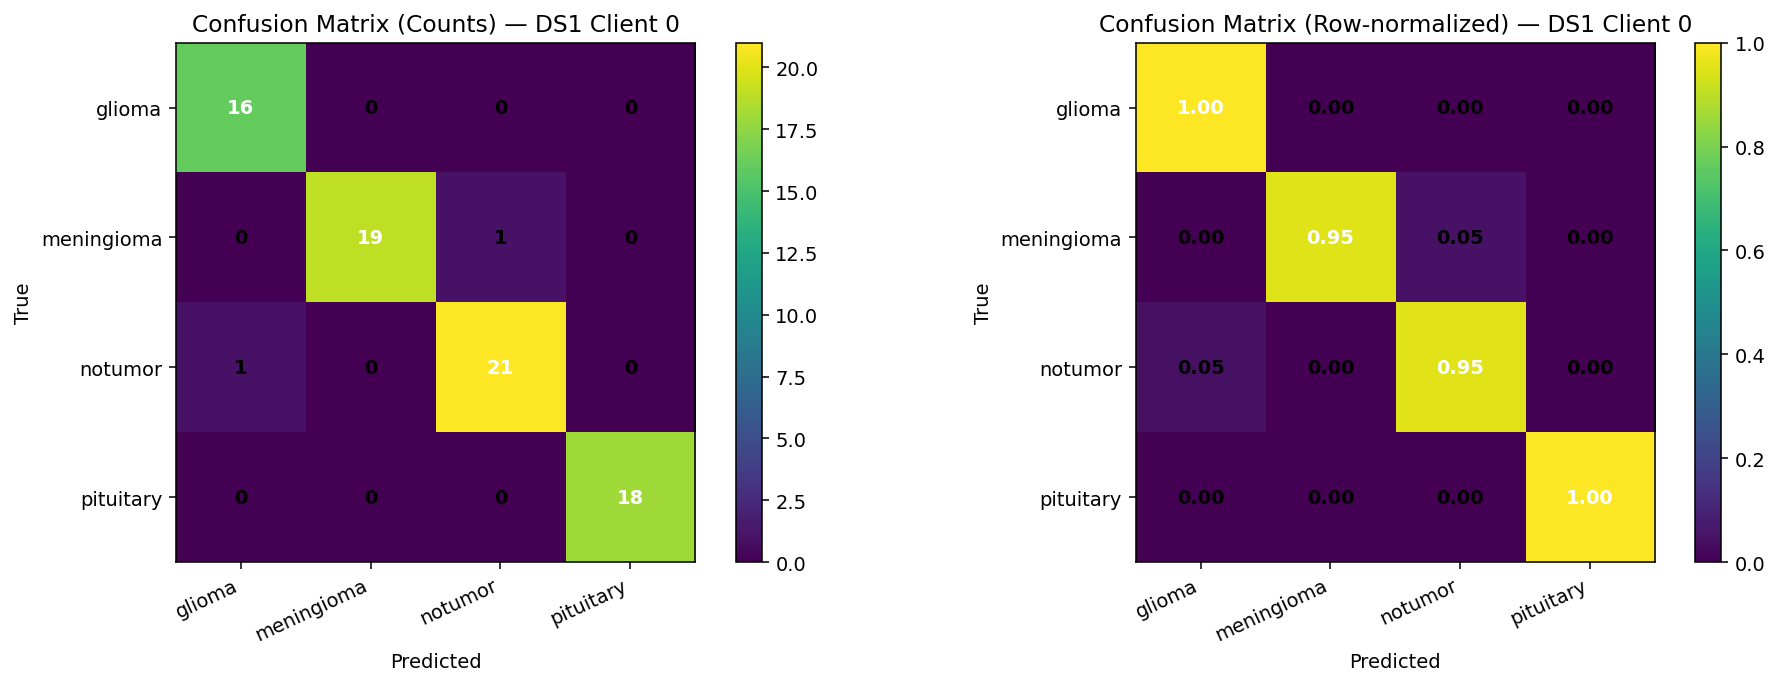


STEP 16: CALIBRATION PLOT (TEST, Best θ) — DS1


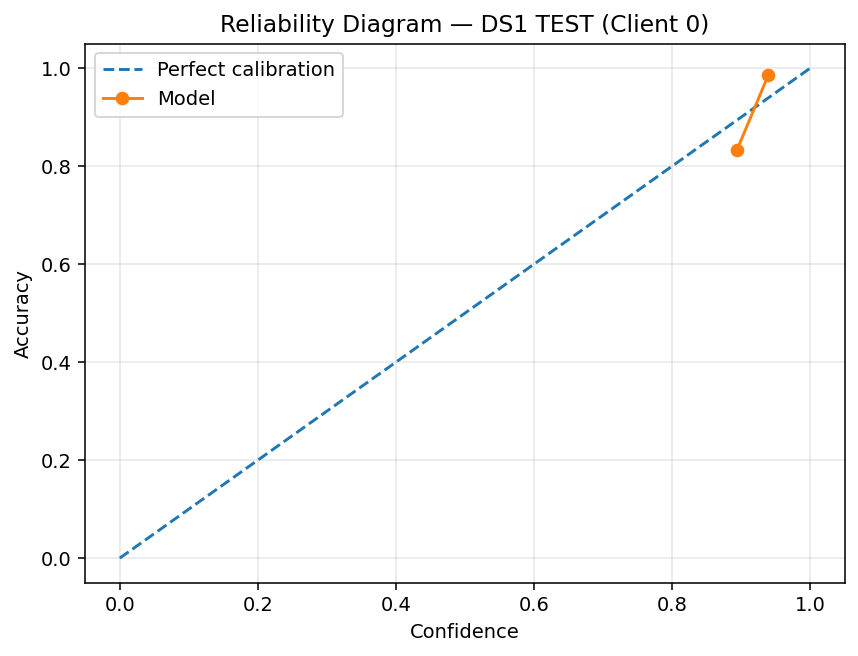


--------------------------------------------------------------------------------------------
Calibration bins table (DS1)
--------------------------------------------------------------------------------------------


bin_confidence  bin_accuracy  bin_count
0              NaN           NaN          0
1              NaN           NaN          0
2              NaN           NaN          0
3              NaN           NaN          0
4              NaN           NaN          0
5              NaN           NaN          0
6              NaN           NaN          0
7              NaN           NaN          0
8              NaN           NaN          0
9              NaN           NaN          0
10        0.894002      0.833333          6
11        0.939262      0.985714         70


STEP 17: UNIQUE PLOTS (RADAR, CLIENT EVOLUTION, THETA EVOLUTION)


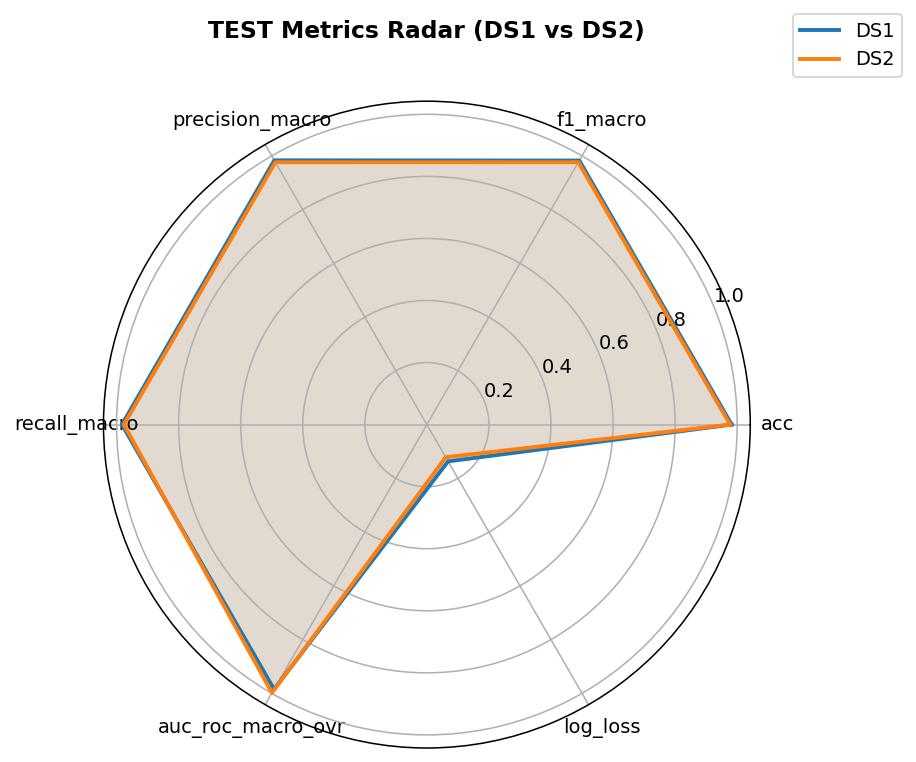

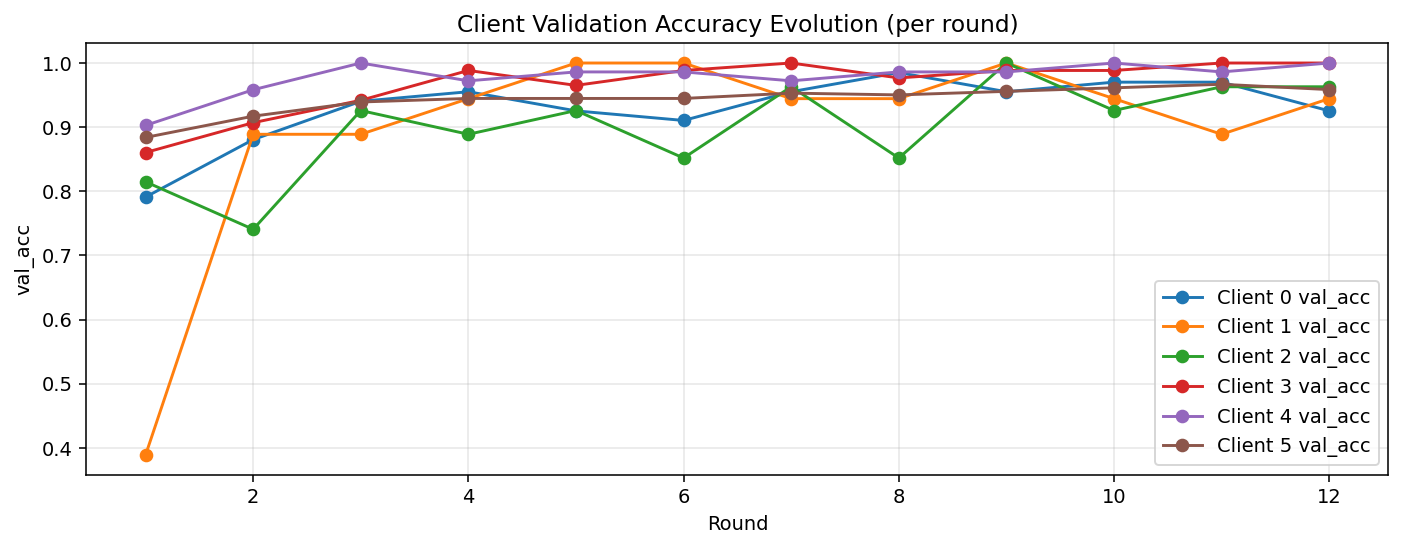


--------------------------------------------------------------------------------------------
Mean best-θ parameters over rounds (clients averaged)
--------------------------------------------------------------------------------------------


round  gamma_power  alpha_contrast_weight  beta_contrast_sharpness  \
0       1     1.107100               0.258355                 4.253576   
1       2     1.081940               0.269432                 4.463481   
2       3     1.177662               0.229250                 4.202113   
3       4     1.063491               0.198515                 5.155020   
4       5     1.253040               0.194729                 4.911622   
5       6     1.132509               0.199672                 5.044137   
6       7     1.059841               0.161554                 4.506240   
7       8     1.176210               0.153351                 5.255579   
8       9     1.175850               0.253291                 6.071814   
9      10     1.047657               0.158304                 5.131543   
10     11     1.019695               0.185279                 4.384900   
11     12     1.106767               0.159058                 5.794116   

    tau_clip  k_blur_kernel_size  sh_sharpen_strength  dn_denoise_strength  
0   2.674218            4.333333             0.093733             0.145828  
1   2.786182            5.666667             0.037156             0.156035  
2   2.940924            5.333333             0.099564             0.126974  
3   2.679279            5.000000             0.109232             0.174933  
4   2.758463            4.333333             0.079783             0.178708  
5   2.902490            6.333333             0.098383             0.170762  
6   2.960987            5.000000             0.084362             0.162697  
7   2.743743            4.333333             0.053147             0.178306  
8   2.731365            4.000000             0.059751             0.167763  
9   3.163330            5.000000             0.073896             0.138505  
10  2.848763            3.000000             0.136537             0.165630  
11  2.936473            4.666667             0.019428             0.162572

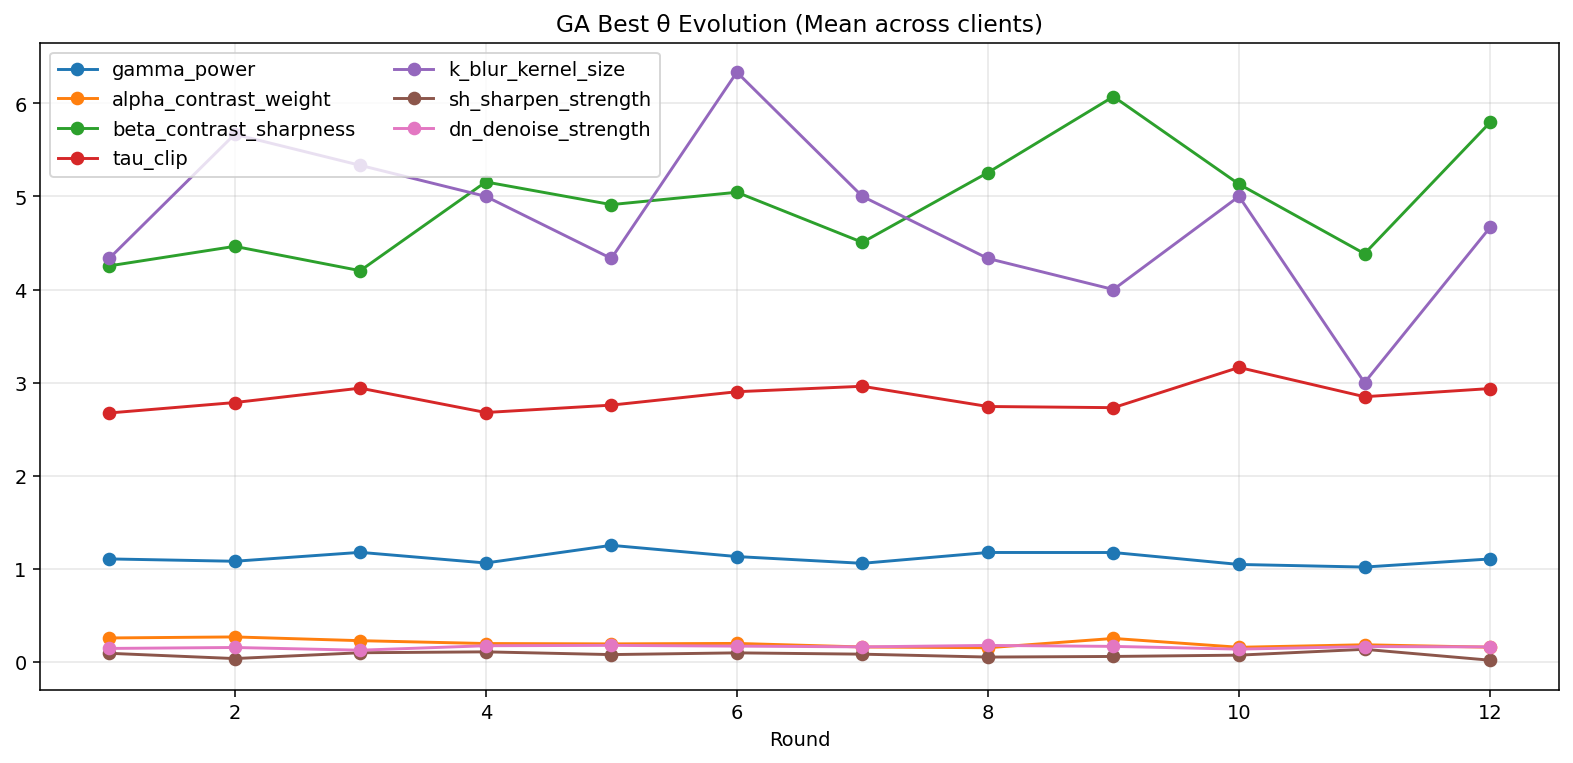


STEP 18: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)
✅ Saved checkpoint: /content/outputs/FL_GAFELCM_PVTv2B2_FUSION_checkpoint.pth
✅ Saved CSV (ALL outputs): /content/outputs/ALL_OUTPUTS_AND_METRICS.csv

DONE ✅ (TRUE FL SIMULATION, 6 clients (3+3), rounds=12, Preprocessing+GA, Augmentation, Fusion, PVTv2-B2 + extra plots)


In [ ]:
# ============================================================
# COLAB FULL SCRIPT (kagglehub download)
# TRUE FL + GA-FELCM + PVTv2-B2 (FUSION) — 6 Clients (3+3)
# Preprocessing ON + Augmentation ON + Fusion ON
# EXTRA OUTPUTS ADDED:
#  - Augmentation Before vs After (WITH CLASS NAMES, tries all 4 classes)
#  - ROC + PR Curves (TEST, Best θ) — DS1
#  - Confusion Matrix (counts + row-normalized) — DS1
#  - Calibration / Reliability diagram — DS1
#  - Radar (DS1 vs DS2), Client val_acc evolution, Theta evolution
# Saves: checkpoint + one CSV (ALL outputs)
# ============================================================

import os, time, math, random, sys, subprocess, hashlib
from typing import List

import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)

# -------------------------
# Install deps (Colab)
# -------------------------
def pip_install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "-q", "install", pkg])

try:
    import timm
except Exception:
    pip_install("timm")
    import timm

try:
    import kagglehub
except Exception:
    pip_install("kagglehub")
    import kagglehub

from torchvision import transforms

try:
    from IPython.display import display
except Exception:
    display = print

# -------------------------
# Reproducibility + Device
# -------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if DEVICE.type == "cuda":
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
try:
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

plt.rcParams["figure.dpi"] = 140

print("=" * 92)
print("COLAB: TRUE FL + GA-FELCM + PVTv2-B2 (FUSION) — 6 Clients (3+3) | AUG=ON")
print("=" * 92)
print(f"DEVICE: {DEVICE} | torch={torch.__version__}")
print("=" * 92)

# -------------------------
# Configuration
# -------------------------
CFG = {
    # FL: 3 clients per dataset => total 6
    "clients_per_dataset": 3,
    "clients_total": 6,

    # IMPORTANT: rounds = 12 (as requested)
    "rounds": 12,
    "local_epochs": 2,
    "lr": 1e-3,
    "weight_decay": 5e-4,
    "warmup_epochs": 1,
    "label_smoothing": 0.08,
    "grad_clip": 1.0,
    "fedprox_mu": 0.01,

    # image
    "img_size": 224 if torch.cuda.is_available() else 160,
    "batch_size": 20 if torch.cuda.is_available() else 10,
    "num_workers": 2 if torch.cuda.is_available() else 0,

    # split
    "global_val_frac": 0.15,
    "test_frac": 0.15,
    "client_val_frac": 0.12,
    "client_tune_frac": 0.12,
    "min_per_class_per_client": 5,

    # non-iid
    "dirichlet_alpha": 0.35,

    # preprocessing + GA
    "use_preprocessing": True,
    "use_ga": True,
    "ga_pop": 10,
    "ga_gens": 5,
    "ga_elites": 3,
    "elite_pool_max": 18,

    # augmentation
    "use_augmentation": True,

    # model conditioning
    "cond_dim": 128,
    "head_dropout": 0.3,

    # optional late unfreeze
    "unfreeze_after_round": 3,
    "unfreeze_lr_mult": 0.10,
    "unfreeze_tail_frac": 0.17,

    # misc
    "quick_hash_subset_per_split": 300,
    "preproc_val_sample_n": 500,
    "before_after_n": 12,

    "make_plots": True,  # set False if you want faster runs
}

OUTDIR = "/content/outputs"
os.makedirs(OUTDIR, exist_ok=True)
MODEL_PATH = os.path.join(OUTDIR, "FL_GAFELCM_PVTv2B2_FUSION_checkpoint.pth")
CSV_PATH   = os.path.join(OUTDIR, "ALL_OUTPUTS_AND_METRICS.csv")

IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp")

IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=DEVICE).view(1, 3, 1, 1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=DEVICE).view(1, 3, 1, 1)

# ============================================================
# Helper: collect all tables into ONE CSV (long format)
# ============================================================
ALL_ROWS = []
def add_table_to_csv(df, table_name):
    df2 = df.copy()
    df2.insert(0, "table_name", table_name)
    for _, row in df2.iterrows():
        ALL_ROWS.append(row.to_dict())

def print_table(df, title):
    print("\n" + "-" * 92)
    print(title)
    print("-" * 92)
    display(df)

# ============================================================
# STEP 0: DOWNLOAD DATASETS VIA kagglehub
# ============================================================
print("\n" + "=" * 92)
print("STEP 0: DOWNLOAD DATASETS VIA kagglehub")
print("=" * 92)

ds2_path = kagglehub.dataset_download("yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection")
print("✅ DS2 downloaded to:", ds2_path)

ds1_path = kagglehub.dataset_download("orvile/pmram-bangladeshi-brain-cancer-mri-dataset")
print("✅ DS1 downloaded to:", ds1_path)

CFG["ds1_base"] = ds1_path
CFG["ds2_base"] = ds2_path

# ============================================================
# STEP 1: DATASET DISCOVERY (NO CENTRAL MERGE)
# ============================================================
print("\n" + "=" * 92)
print("STEP 1: LOCATE DATASET ROOTS (NO MERGE)")
print("=" * 92)

REQ1 = {"512Glioma", "512Meningioma", "512Normal", "512Pituitary"}
REQ2 = {"glioma", "meningioma", "notumor", "pituitary"}

def norm_label(name: str):
    s = str(name).strip().lower()
    if "glioma" in s: return "glioma"
    if "meningioma" in s: return "meningioma"
    if "pituitary" in s: return "pituitary"
    if "normal" in s or "no_tumor" in s or "no tumor" in s or "notumor" in s: return "notumor"
    return None

def find_root_with_required_class_dirs(base_dir, required_set, prefer_raw=True):
    candidates = []
    for root, dirs, _ in os.walk(base_dir):
        if required_set.issubset(set(dirs)):
            candidates.append(root)
    if not candidates:
        return None

    def score(p):
        pl = p.lower()
        sc = 0
        if prefer_raw:
            if "raw data" in pl: sc += 7
            if os.path.basename(p).lower() == "raw": sc += 7
            if "/raw/" in pl or "\\raw\\" in pl: sc += 3
            if "augmented" in pl: sc -= 20
        sc -= 0.0001 * len(p)
        return sc

    return max(candidates, key=score)

def list_images_under_class_root(class_root, class_dir_name):
    class_dir = os.path.join(class_root, class_dir_name)
    out = []
    for r, _, files in os.walk(class_dir):
        for fn in files:
            if fn.lower().endswith(IMG_EXTS):
                out.append(os.path.join(r, fn))
    return out

def build_df_from_root(ds_root, class_dirs, source_name):
    rows = []
    for c in class_dirs:
        lab = norm_label(c)
        imgs = list_images_under_class_root(ds_root, c)
        print(f"{source_name}: {c} -> {lab} | {len(imgs)} images")
        for p in imgs:
            rows.append({"path": p, "label": lab, "source": source_name})
    dfm = pd.DataFrame(rows).dropna().reset_index(drop=True)
    dfm["path"] = dfm["path"].astype(str)
    dfm["label"] = dfm["label"].astype(str)
    dfm["source"] = dfm["source"].astype(str)
    dfm = dfm.drop_duplicates(subset=["path"]).reset_index(drop=True)
    dfm["filename"] = dfm["path"].apply(lambda x: os.path.basename(x))
    return dfm

DS1_ROOT = find_root_with_required_class_dirs(CFG["ds1_base"], REQ1, prefer_raw=True)
if DS1_ROOT is None:
    raise RuntimeError(f"Could not locate DS1 class root under {CFG['ds1_base']} with dirs {sorted(list(REQ1))}")
print(f"Dataset-1 RAW root detected:\n  {DS1_ROOT}")

DS2_ROOT = find_root_with_required_class_dirs(CFG["ds2_base"], REQ2, prefer_raw=False)
if DS2_ROOT is None:
    raise RuntimeError(f"Could not locate DS2 class root under {CFG['ds2_base']} with dirs {sorted(list(REQ2))}")
print(f"Dataset-2 root detected:\n  {DS2_ROOT}")

print("\n" + "-" * 92)
print("Building Dataset-1 (RAW only)")
df1 = build_df_from_root(DS1_ROOT, ["512Glioma", "512Meningioma", "512Normal", "512Pituitary"], "ds1_raw")
print("Building Dataset-2 (preprocessed)")
df2 = build_df_from_root(DS2_ROOT, ["glioma", "meningioma", "notumor", "pituitary"], "ds2")

labels = ["glioma", "meningioma", "notumor", "pituitary"]
label2id = {l: i for i, l in enumerate(labels)}
id2label = {i: l for l, i in label2id.items()}
NUM_CLASSES = len(labels)

def enforce_labels(df_):
    df_ = df_.copy()
    df_["label"] = df_["label"].astype(str).str.strip().str.lower()
    df_ = df_[df_["label"].isin(set(labels))].reset_index(drop=True)
    df_["y"] = df_["label"].map(label2id).astype(int)
    return df_

df1 = enforce_labels(df1)
df2 = enforce_labels(df2)

print("\n" + "-" * 92)
print(f"Dataset-1 images: {len(df1)}")
print(df1["label"].value_counts().reindex(labels, fill_value=0))
print(f"Dataset-2 images: {len(df2)}")
print(df2["label"].value_counts().reindex(labels, fill_value=0))
print("-" * 92)

# ============================================================
# STEP 2: Train/Val/Test Split per Dataset (STRATIFIED)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2: TRAIN/VAL/TEST SPLIT (PER DATASET)")
print("=" * 92)

def split_dataset(df_):
    train_df, temp_df = train_test_split(
        df_,
        test_size=(CFG["global_val_frac"] + CFG["test_frac"]),
        stratify=df_["y"],
        random_state=SEED,
    )
    val_rel = CFG["global_val_frac"] / (CFG["global_val_frac"] + CFG["test_frac"])
    val_df, test_df = train_test_split(
        temp_df,
        test_size=(1 - val_rel),
        stratify=temp_df["y"],
        random_state=SEED,
    )
    return train_df.reset_index(drop=True), val_df.reset_index(drop=True), test_df.reset_index(drop=True)

train1, val1, test1 = split_dataset(df1)
train2, val2, test2 = split_dataset(df2)

print(f"DS1 TRAIN: {len(train1)} | VAL: {len(val1)} | TEST: {len(test1)}")
print(f"DS2 TRAIN: {len(train2)} | VAL: {len(val2)} | TEST: {len(test2)}")

# ============================================================
# STEP 2.5: Leakage/Sanity Checks (per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2.5: SANITY / LEAKAGE CHECKS (PER DATASET)")
print("=" * 92)

def split_overlap_checks(train_df, val_df, test_df):
    tr = set(train_df["path"].tolist())
    va = set(val_df["path"].tolist())
    te = set(test_df["path"].tolist())
    checks = {
        "path_overlap_train_val": len(tr.intersection(va)),
        "path_overlap_train_test": len(tr.intersection(te)),
        "path_overlap_val_test": len(va.intersection(te)),
        "unique_paths_train": len(tr),
        "unique_paths_val": len(va),
        "unique_paths_test": len(te),
    }
    trf = set(train_df["filename"].tolist())
    vaf = set(val_df["filename"].tolist())
    tef = set(test_df["filename"].tolist())
    checks.update(
        {
            "filename_overlap_train_val": len(trf.intersection(vaf)),
            "filename_overlap_train_test": len(trf.intersection(tef)),
            "filename_overlap_val_test": len(vaf.intersection(tef)),
        }
    )
    return checks

def md5_file(path, max_bytes=2_000_000):
    h = hashlib.md5()
    try:
        with open(path, "rb") as f:
            h.update(f.read(max_bytes))
        return h.hexdigest()
    except Exception:
        return None

def quick_hash_subset(frame, n=300):
    n = min(n, len(frame))
    if n <= 0:
        return set()
    idx = np.random.choice(len(frame), size=n, replace=False)
    hashes = []
    for i in idx:
        hv = md5_file(frame.iloc[i]["path"])
        if hv is not None:
            hashes.append(hv)
    return set(hashes)

def leakage_report(name, tr, va, te):
    over = split_overlap_checks(tr, va, te)
    leak_df = pd.DataFrame([over])

    n_hash = int(CFG["quick_hash_subset_per_split"])
    trh = quick_hash_subset(tr, n_hash)
    vah = quick_hash_subset(va, n_hash)
    teh = quick_hash_subset(te, n_hash)

    hash_over = {
        "subset_hash_train_val": len(trh.intersection(vah)),
        "subset_hash_train_test": len(trh.intersection(teh)),
        "subset_hash_val_test": len(vah.intersection(teh)),
        "subset_hash_n_train": len(trh),
        "subset_hash_n_val": len(vah),
        "subset_hash_n_test": len(teh),
    }
    leak_df = pd.concat([leak_df, pd.DataFrame([hash_over])], axis=1)
    print_table(leak_df, f"Leakage / Sanity Summary — {name}")
    add_table_to_csv(leak_df, f"leakage_sanity_{name}")

leakage_report("ds1", train1, val1, test1)
leakage_report("ds2", train2, val2, test2)

# ============================================================
# STEP 3: Non-IID Client Partitioning (3 clients per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)")
print("=" * 92)

def make_clients_non_iid(train_df, n_clients, num_classes, min_per_class=5, alpha=0.35):
    y = train_df["y"].values
    idx_by_class = {c: np.where(y == c)[0].tolist() for c in range(num_classes)}
    for c in idx_by_class:
        random.shuffle(idx_by_class[c])

    client_indices = [[] for _ in range(n_clients)]

    # ensure some per-class coverage
    for c in range(num_classes):
        idxs = idx_by_class[c]
        feasible = min(min_per_class, max(1, len(idxs) // n_clients))
        for k in range(n_clients):
            take = idxs[:feasible]
            idxs = idxs[feasible:]
            client_indices[k].extend(take)
        idx_by_class[c] = idxs

    # Dirichlet for remaining
    for c in range(num_classes):
        idxs = idx_by_class[c]
        if len(idxs) == 0:
            continue
        props = np.random.dirichlet([alpha] * n_clients)
        counts = (props * len(idxs)).astype(int)
        diff = len(idxs) - counts.sum()
        counts[np.argmax(props)] += diff

        start = 0
        for k in range(n_clients):
            client_indices[k].extend(idxs[start: start + counts[k]])
            start += counts[k]

    for k in range(n_clients):
        random.shuffle(client_indices[k])
    return client_indices

def robust_client_splits(train_df, indices, val_frac, tune_frac):
    idxs = np.array(indices, dtype=int)
    if len(idxs) < 3:
        return idxs.tolist(), idxs.tolist(), idxs.tolist()

    yk = train_df.loc[idxs, "y"].values
    # First split off tune
    if len(np.unique(yk)) < 2 or len(idxs) < 20:
        n_tune = max(1, int(round(len(idxs) * tune_frac)))
        n_tune = min(n_tune, max(1, len(idxs) - 2))
        tune_idx = idxs[:n_tune]
        rem_idx = idxs[n_tune:]
    else:
        rem_idx, tune_idx = train_test_split(
            idxs,
            test_size=tune_frac,
            stratify=yk,
            random_state=SEED,
        )

    # Split remaining into train/val
    if len(rem_idx) < 2:
        return rem_idx.tolist(), tune_idx.tolist(), rem_idx.tolist()

    yk2 = train_df.loc[rem_idx, "y"].values
    if len(np.unique(yk2)) < 2 or len(rem_idx) < 12:
        n_val = max(1, int(round(len(rem_idx) * val_frac)))
        n_val = min(n_val, max(1, len(rem_idx) - 1))
        val_idx = rem_idx[:n_val]
        train_idx = rem_idx[n_val:]
    else:
        train_idx, val_idx = train_test_split(
            rem_idx,
            test_size=val_frac,
            stratify=yk2,
            random_state=SEED,
        )

    if len(train_idx) == 0:
        train_idx = val_idx[:]
    if len(val_idx) == 0:
        val_idx = train_idx[:1]
    return train_idx.tolist(), tune_idx.tolist(), val_idx.tolist()

n_per_ds = CFG["clients_per_dataset"]

client_indices_ds1 = make_clients_non_iid(
    train1,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)
client_indices_ds2 = make_clients_non_iid(
    train2,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)

client_splits = []
for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train1, client_indices_ds1[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = k
    client_splits.append(("ds1", k, gid, tr, tune, va))
    print(f"DS1 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train2, client_indices_ds2[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = n_per_ds + k
    client_splits.append(("ds2", k, gid, tr, tune, va))
    print(f"DS2 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

client_test_splits = []
for ds_name, test_df, base_gid in [("ds1", test1, 0), ("ds2", test2, n_per_ds)]:
    idxs = list(range(len(test_df)))
    random.shuffle(idxs)
    split = np.array_split(idxs, n_per_ds)
    for k in range(n_per_ds):
        client_test_splits.append((ds_name, k, base_gid + k, split[k].tolist()))

def client_distribution_table():
    dist_rows = []
    for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
        df_src = train1 if ds_name == "ds1" else train2
        counts = df_src.loc[tr_idx, "label"].value_counts().reindex(labels, fill_value=0)
        row = {
            "client": f"client_{gid}",
            "dataset": ds_name,
            "total_train": len(tr_idx),
            "total_tune": len(tune_idx),
            "total_val": len(val_idx),
        }
        row.update({lab: int(counts[lab]) for lab in labels})
        dist_rows.append(row)
    return pd.DataFrame(dist_rows)

dist_df = client_distribution_table()
print_table(dist_df, "Client class distribution (Non-IID, per dataset)")
add_table_to_csv(dist_df, "client_distribution")

# ============================================================
# STEP 4: Data pipeline (AUG ON) + ImageNet Norm
# ============================================================
print("\n" + "=" * 92)
print("STEP 4: DATA LOADERS (AUG ON) + IMAGENET NORM")
print("=" * 92)

def load_rgb(path):
    try:
        return Image.open(path).convert("RGB")
    except Exception:
        return Image.new("RGB", (CFG["img_size"], CFG["img_size"]), (128, 128, 128))

EVAL_TFMS = transforms.Compose([
    transforms.Resize((CFG["img_size"], CFG["img_size"])),
    transforms.ToTensor(),
])

if CFG["use_augmentation"]:
    TRAIN_TFMS = transforms.Compose([
        transforms.Resize((CFG["img_size"], CFG["img_size"])),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=0.15, contrast=0.15),
        transforms.ToTensor(),
    ])
else:
    TRAIN_TFMS = EVAL_TFMS

class MRIDataset(Dataset):
    def __init__(self, frame, indices=None, tfms=None, source_id=0, client_id=0):
        self.df = frame
        self.indices = indices if indices is not None else list(range(len(frame)))
        self.tfms = tfms
        self.source_id = int(source_id)
        self.client_id = int(client_id)

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, i):
        j = self.indices[i]
        row = self.df.iloc[j]
        img = load_rgb(row["path"])
        x = self.tfms(img) if self.tfms is not None else transforms.ToTensor()(img)
        y = int(row["y"])
        return x, y, row["path"], self.source_id, self.client_id

def make_weighted_sampler(frame, indices, num_classes):
    if len(indices) == 0:
        return None
    ys = frame.loc[indices, "y"].values
    class_counts = np.bincount(ys, minlength=num_classes)
    class_weights = 1.0 / np.clip(class_counts, 1, None)
    sample_weights = class_weights[ys]
    return WeightedRandomSampler(
        weights=torch.DoubleTensor(sample_weights),
        num_samples=len(sample_weights),
        replacement=True,
    )

def make_loader(frame, indices, bs, tfms, shuffle=False, sampler=None, source_id=0, client_id=0):
    ds = MRIDataset(frame, indices=indices, tfms=tfms, source_id=source_id, client_id=client_id)
    return DataLoader(
        ds,
        batch_size=bs,
        shuffle=(shuffle and sampler is None),
        sampler=sampler,
        num_workers=CFG["num_workers"],
        pin_memory=(DEVICE.type == "cuda"),
        drop_last=False,
        persistent_workers=(CFG["num_workers"] > 0),
    )

client_loaders = []
for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
    df_src = train1 if ds_name == "ds1" else train2
    source_id = 0 if ds_name == "ds1" else 1

    sampler = make_weighted_sampler(df_src, tr_idx, NUM_CLASSES)

    tr_loader = make_loader(df_src, tr_idx, CFG["batch_size"], TRAIN_TFMS,
                            shuffle=(sampler is None), sampler=sampler,
                            source_id=source_id, client_id=gid)

    tune_loader = make_loader(df_src, tune_idx if len(tune_idx) else tr_idx[:max(1, len(tr_idx))],
                              CFG["batch_size"], EVAL_TFMS, shuffle=True,
                              source_id=source_id, client_id=gid)

    val_loader = make_loader(df_src, val_idx if len(val_idx) else tr_idx[:max(1, min(len(tr_idx), CFG["batch_size"]))],
                             CFG["batch_size"], EVAL_TFMS, shuffle=False,
                             source_id=source_id, client_id=gid)

    client_loaders.append((tr_loader, tune_loader, val_loader))

client_test_loaders = []
for (ds_name, local_id, gid, test_idx) in client_test_splits:
    df_src = test1 if ds_name == "ds1" else test2
    source_id = 0 if ds_name == "ds1" else 1
    t_loader = make_loader(df_src, test_idx, CFG["batch_size"], EVAL_TFMS,
                           shuffle=False, source_id=source_id, client_id=gid)
    client_test_loaders.append((ds_name, local_id, gid, t_loader))

print(f"Augmentation: {'ON ✅' if CFG['use_augmentation'] else 'OFF'}")
print(f"Preprocessing: {'ON ✅' if CFG['use_preprocessing'] else 'OFF'}")

# ------------------------------------------------------------
# AUGMENTATION VISUAL CHECK (BEFORE vs AFTER) + CLASS NAMES
# ------------------------------------------------------------
if CFG["make_plots"] and CFG["use_augmentation"]:
    print("\n" + "-" * 92)
    print("AUGMENTATION VISUAL CHECK (Before vs After) — WITH CLASS NAMES")
    print("-" * 92)

    @torch.no_grad()
    def show_aug_before_after(frame, n=12, title_prefix="Augmentation"):
        if len(frame) == 0:
            print("No data to visualize augmentation.")
            return

        per_class = max(1, n // NUM_CLASSES)
        parts = []
        for lab in labels:
            sub = frame[frame["label"] == lab]
            if len(sub) > 0:
                parts.append(sub.sample(n=min(per_class, len(sub)), random_state=SEED))
        if parts:
            sample = pd.concat(parts, axis=0).drop_duplicates(subset=["path"])
        else:
            sample = frame.sample(min(n, len(frame)), random_state=SEED)

        if len(sample) < n:
            extra = frame.sample(min(n - len(sample), len(frame)), random_state=SEED + 7)
            sample = pd.concat([sample, extra], axis=0).drop_duplicates(subset=["path"])

        sample = sample.sample(min(n, len(sample)), random_state=SEED).reset_index(drop=True)
        idxs = list(range(len(sample)))

        raw_ds = MRIDataset(sample, indices=idxs, tfms=EVAL_TFMS, source_id=0, client_id=0)
        aug_ds = MRIDataset(sample, indices=idxs, tfms=TRAIN_TFMS, source_id=0, client_id=0)

        raws, augs, ys = [], [], []
        for i in range(len(sample)):
            x_raw, y, *_ = raw_ds[i]
            x_aug, y2, *_ = aug_ds[i]
            raws.append(x_raw)
            augs.append(x_aug)
            ys.append(int(y))

        B = len(raws)
        fig = plt.figure(figsize=(min(18, 2.2 * B), 6))
        for i in range(B):
            lab = id2label[int(ys[i])]

            ax1 = plt.subplot(2, B, i + 1)
            ax1.imshow(raws[i].permute(1, 2, 0).numpy())
            ax1.set_title(f"Before Aug\n({lab})", fontsize=9)
            ax1.axis("off")

            ax2 = plt.subplot(2, B, B + i + 1)
            ax2.imshow(augs[i].permute(1, 2, 0).numpy())
            ax2.set_title(f"After Aug\n({lab})", fontsize=9)
            ax2.axis("off")

        plt.suptitle(f"{title_prefix}: Before vs After (TRAIN_TFMS)", fontsize=12, fontweight="bold")
        plt.tight_layout()
        plt.show()

    show_aug_before_after(train1, n=CFG["before_after_n"], title_prefix="DS1 Augmentation")
    show_aug_before_after(train2, n=CFG["before_after_n"], title_prefix="DS2 Augmentation")

# ============================================================
# STEP 5: GA-TUNED ENHANCED FELCM PREPROCESSOR
# ============================================================
print("\n" + "=" * 92)
print("STEP 5: GA-TUNED ENHANCED FELCM PREPROCESSOR")
print("=" * 92)

THETA_FULLFORMS = {
    "gamma": "Power transform exponent (γ)",
    "alpha": "Local contrast weight (α)",
    "beta": "Contrast sharpness (β)",
    "tau": "Robust clipping threshold (τ)",
    "k": "Blur kernel size (k) for local contrast map",
    "sh": "Sharpen strength (sh)",
    "dn": "Denoise strength (dn)",
}

class EnhancedFELCM(nn.Module):
    def __init__(self, gamma=1.0, alpha=0.35, beta=6.0, tau=2.5, blur_k=7, sharpen=0.0, denoise=0.0):
        super().__init__()
        self.gamma = float(gamma)
        self.alpha = float(alpha)
        self.beta  = float(beta)
        self.tau   = float(tau)
        self.blur_k = int(blur_k)
        self.sharpen = float(sharpen)
        self.denoise = float(denoise)

        lap = torch.tensor([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=torch.float32)
        self.register_buffer("lap", lap.view(1, 1, 3, 3))

        sharp = torch.tensor([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=torch.float32)
        self.register_buffer("sharp_kernel", sharp.view(1, 1, 3, 3))

    def forward(self, x):
        eps = 1e-6
        B, C, H, W = x.shape

        if self.denoise > 0:
            k = 3
            x_blur = F.avg_pool2d(F.pad(x, (1, 1, 1, 1), mode="reflect"), k, 1)
            x = x * (1 - self.denoise) + x_blur * self.denoise

        mu = x.mean(dim=(2, 3), keepdim=True)
        sd = x.std(dim=(2, 3), keepdim=True).clamp_min(eps)
        x0 = (x - mu) / sd
        x0 = x0.clamp(-self.tau, self.tau)

        x1 = torch.sign(x0) * torch.pow(torch.abs(x0).clamp_min(eps), self.gamma)

        gray = x1.mean(dim=1, keepdim=True)
        lap = F.conv2d(F.pad(gray, (1, 1, 1, 1), mode="reflect"), self.lap)
        mag = lap.abs()

        k = self.blur_k if self.blur_k % 2 == 1 else self.blur_k + 1
        pad = k // 2
        blur = F.avg_pool2d(F.pad(mag, (pad, pad, pad, pad), mode="reflect"), k, 1)
        C_map = mag / (blur + eps)

        x2 = x1 + self.alpha * torch.tanh(self.beta * C_map)

        if self.sharpen > 0:
            outs = []
            for c in range(C):
                x_c = x2[:, c: c + 1, :, :]
                x_sharp = F.conv2d(F.pad(x_c, (1, 1, 1, 1), mode="reflect"), self.sharp_kernel)
                outs.append(x_c * (1 - self.sharpen) + x_sharp * self.sharpen)
            x2 = torch.cat(outs, dim=1)

        mn = x2.amin(dim=(2, 3), keepdim=True)
        mx = x2.amax(dim=(2, 3), keepdim=True)
        x3 = (x2 - mn) / (mx - mn + eps)
        return x3.clamp(0, 1)

def theta_to_module(theta):
    return EnhancedFELCM(*theta)

def random_theta():
    gamma  = random.uniform(0.7, 1.4)
    alpha  = random.uniform(0.15, 0.55)
    beta   = random.uniform(3.0, 9.0)
    tau    = random.uniform(1.8, 3.2)
    blur_k = random.choice([3, 5, 7])
    sharpen = random.uniform(0.0, 0.25)
    denoise = random.uniform(0.0, 0.2)
    return (gamma, alpha, beta, tau, blur_k, sharpen, denoise)

def mutate(theta, p=0.8):
    if random.random() > p:
        return theta
    g, a, b, t, k, sh, dn = theta
    g  = float(np.clip(g  + np.random.normal(0, 0.06), 0.6, 1.5))
    a  = float(np.clip(a  + np.random.normal(0, 0.05), 0.08, 0.7))
    b  = float(np.clip(b  + np.random.normal(0, 0.5),  2.0, 11.0))
    t  = float(np.clip(t  + np.random.normal(0, 0.2),  1.5, 3.8))
    if random.random() < 0.3:
        k = random.choice([3, 5, 7])
    sh = float(np.clip(sh + np.random.normal(0, 0.04), 0.0, 0.35))
    dn = float(np.clip(dn + np.random.normal(0, 0.03), 0.0, 0.3))
    return (g, a, b, t, int(k), sh, dn)

def crossover(t1, t2):
    return tuple(random.choice([a, b]) for a, b in zip(t1, t2))

def theta_str(th):
    if th is None:
        return "None"
    g, a, b, t, k, sh, dn = th
    return f"(γ={g:.2f}, α={a:.2f}, β={b:.1f}, τ={t:.1f}, k={k}, sh={sh:.2f}, dn={dn:.2f})"

IDENTITY_PRE = nn.Identity().to(DEVICE)

# ============================================================
# STEP 6: MODEL (PVTv2-B2 + MULTI-SCALE FUSION)
# ============================================================
print("\n" + "=" * 92)
print("STEP 6: MODEL (PVTv2-B2 + MULTI-SCALE FUSION)")
print("=" * 92)

BACKBONE_NAME = "pvt_v2_b2"

class TokenAttentionPooling(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.query = nn.Linear(dim, 1)

    def forward(self, x):
        attn = torch.softmax(self.query(x).squeeze(-1), dim=1)
        return (x * attn.unsqueeze(-1)).sum(dim=1)

class MultiScaleFeatureFuser(nn.Module):
    def __init__(self, in_channels: List[int], out_dim: int):
        super().__init__()
        self.proj = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(c, out_dim, kernel_size=1, bias=False),
                nn.GroupNorm(8, out_dim),
                nn.GELU(),
            )
            for c in in_channels
        ])
        self.fuse = nn.Sequential(
            nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1, bias=False),
            nn.GroupNorm(8, out_dim),
            nn.GELU(),
        )
        self.pool = TokenAttentionPooling(out_dim)

    def forward(self, feats):
        proj_feats = [p(f) for p, f in zip(self.proj, feats)]
        x = proj_feats[-1]
        for f in reversed(proj_feats[:-1]):
            x = F.interpolate(x, size=f.shape[-2:], mode="bilinear", align_corners=False)
            x = x + f
        x = self.fuse(x)
        B, C, H, W = x.shape
        tokens = x.flatten(2).transpose(1, 2)  # [B, HW, C]
        pooled = self.pool(tokens)
        return pooled

class EnhancedBrainTuner(nn.Module):
    def __init__(self, dim, dropout=0.1):
        super().__init__()
        self.se = nn.Sequential(
            nn.Linear(dim, max(8, dim // 4)),
            nn.ReLU(inplace=True),
            nn.Linear(max(8, dim // 4), dim),
            nn.Sigmoid(),
        )
        self.refine = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(dim, dim),
        )
        self.gate = nn.Parameter(torch.ones(2) / 2)

    def forward(self, x):
        gate = F.softmax(self.gate, dim=0)
        out1 = x * self.se(x)
        out2 = x + 0.2 * self.refine(x)
        return gate[0] * out1 + gate[1] * out2

class PVTv2B2_MultiScale(nn.Module):
    def __init__(self, num_classes, pretrained=True, head_dropout=0.3, cond_dim=128, num_clients=6):
        super().__init__()
        self.backbone = timm.create_model(
            BACKBONE_NAME,
            pretrained=pretrained,
            features_only=True,
            out_indices=(0, 1, 2, 3),
        )
        in_channels = self.backbone.feature_info.channels()
        out_dim = max(256, in_channels[-1] // 2)

        self.fuser = MultiScaleFeatureFuser(in_channels, out_dim)
        self.tuner = EnhancedBrainTuner(out_dim, dropout=0.1)

        self.classifier = nn.Sequential(
            nn.LayerNorm(out_dim),
            nn.Dropout(head_dropout),
            nn.Linear(out_dim, max(64, out_dim // 2)),
            nn.GELU(),
            nn.Dropout(head_dropout * 0.5),
            nn.Linear(max(64, out_dim // 2), num_classes),
        )

        # conditioning: theta + source + client => gates
        self.theta_mlp = nn.Sequential(
            nn.Linear(7, cond_dim),
            nn.GELU(),
            nn.Linear(cond_dim, cond_dim),
        )
        self.source_emb = nn.Embedding(2, cond_dim)
        self.client_emb = nn.Embedding(num_clients, cond_dim)
        self.cond_norm = nn.LayerNorm(cond_dim)

        self.gate_early = nn.Linear(cond_dim, 3)     # raw/fel mix (per-channel)
        self.gate_mid   = nn.Linear(cond_dim, out_dim)
        self.gate_late  = nn.Linear(cond_dim, out_dim)

    def _cond_vec(self, theta_vec, source_id, client_id):
        cond = self.theta_mlp(theta_vec)
        cond = cond + self.source_emb(source_id) + self.client_emb(client_id)
        return self.cond_norm(cond)

    def forward(self, x_raw_n, x_fel_n, theta_vec, source_id, client_id, return_gates=False):
        cond = self._cond_vec(theta_vec, source_id, client_id)

        g0 = torch.sigmoid(self.gate_early(cond)).view(-1, 3, 1, 1)
        x0 = (1 - g0) * x_raw_n + g0 * x_fel_n

        feats0 = self.backbone(x0)
        feats1 = self.backbone(x_fel_n)

        f0 = self.fuser(feats0)
        f1 = self.fuser(feats1)

        g1 = torch.sigmoid(self.gate_mid(cond))
        f_mid = (1 - g1) * f0 + g1 * f1

        t0 = self.tuner(f0)
        t1 = self.tuner(f1)
        t_mid = self.tuner(f_mid)

        t_views = 0.5 * (t0 + t1)
        g2 = torch.sigmoid(self.gate_late(cond))
        t_final = (1 - g2) * t_mid + g2 * t_views

        logits = self.classifier(t_final)

        if return_gates:
            return logits, {"g0": g0, "g1": g1, "g2": g2}
        return logits

def count_params(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

def set_trainable_for_round(model, rnd):
    # freeze backbone by default
    for p in model.backbone.parameters():
        p.requires_grad = False
    # train everything outside backbone
    for n, p in model.named_parameters():
        if not n.startswith("backbone."):
            p.requires_grad = True
    # optionally unfreeze tail part of backbone
    if rnd >= CFG["unfreeze_after_round"]:
        params = list(model.backbone.parameters())
        if len(params) > 0:
            tail_n = max(1, int(len(params) * CFG["unfreeze_tail_frac"]))
            for p in params[-tail_n:]:
                p.requires_grad = True

def make_optimizer(model):
    head_params, bb_params = [], []
    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue
        if n.startswith("backbone."):
            bb_params.append(p)
        else:
            head_params.append(p)

    groups = []
    if head_params:
        groups.append({"params": head_params, "lr": CFG["lr"]})
    if bb_params:
        groups.append({"params": bb_params, "lr": CFG["lr"] * CFG["unfreeze_lr_mult"]})
    return torch.optim.AdamW(groups, weight_decay=CFG["weight_decay"])

# ============================================================
# STEP 7: GA FITNESS (ROBUST)
# ============================================================
print("\n" + "=" * 92)
print("STEP 7: GA FITNESS (ROBUST)")
print("=" * 92)

@torch.no_grad()
def enhanced_separability_score(emb, y):
    eps = 1e-6
    y = y.long()
    classes = torch.unique(y)
    if len(classes) < 2:
        return 0.0

    centroids = []
    within_vars = []
    sizes = []

    for c in classes:
        mask = y == c
        e = emb[mask]
        if e.size(0) < 2:
            continue
        mu = e.mean(dim=0)
        var = (e - mu).pow(2).sum(dim=1).mean().item()
        centroids.append(mu)
        within_vars.append(var)
        sizes.append(e.size(0))

    if len(centroids) < 2:
        return 0.0

    centroids = torch.stack(centroids, dim=0)
    global_mean = centroids.mean(dim=0)
    between = sum(n * (c - global_mean).pow(2).sum().item() for c, n in zip(centroids, sizes))
    within = float(np.mean(within_vars)) if within_vars else eps
    return float(between / (within + eps))

@torch.no_grad()
def ga_fitness(theta, backbone_frozen, batch_x, batch_y, use_separability=True):
    pre = theta_to_module(theta).to(DEVICE)
    x = batch_x.to(DEVICE)
    y = batch_y.to(DEVICE)

    x_p = pre(x)
    gray = x_p.mean(dim=1, keepdim=True)
    lap = F.conv2d(F.pad(gray, (1, 1, 1, 1), mode="reflect"), pre.lap).abs()
    contrast = float(lap.mean().item())
    dyn_range = float((x_p.max() - x_p.min()).item())

    x_n = (x_p - IMAGENET_MEAN) / IMAGENET_STD

    sep = 0.0
    if use_separability:
        emb = backbone_frozen(x_n)
        if isinstance(emb, (list, tuple)):
            emb = emb[-1]
            emb = emb.mean(dim=(2, 3))
        sep = enhanced_separability_score(emb, y)

    g, a, b, t, k, sh, dn = theta
    cost = (0.03 * abs(g - 1.0) + 0.05 * a + 0.01 * (b / 10.0) +
            0.02 * abs(t - 2.5) + 0.02 * sh + 0.02 * dn)

    if use_separability:
        return 0.35 * contrast + 0.15 * dyn_range + 1.35 * sep - 0.5 * cost
    return 0.60 * contrast + 0.35 * dyn_range - 0.5 * cost

def _safe_first_batch(dl):
    try:
        it = iter(dl)
        bx, by, *_ = next(it)
        return bx, by
    except Exception:
        return None, None

def run_ga_for_client(backbone_frozen, dl_for_eval, elite_pool, use_separability=True):
    bx, by = _safe_first_batch(dl_for_eval)
    if bx is None:
        return None, [], 0.0

    pop = []
    if elite_pool:
        pop.extend(elite_pool[: min(len(elite_pool), CFG["ga_pop"] // 2)])
    while len(pop) < CFG["ga_pop"]:
        pop.append(random_theta())

    bx = bx[: CFG["batch_size"]].contiguous()
    by = by[: CFG["batch_size"]].contiguous()

    for _ in range(CFG["ga_gens"]):
        scored = [(ga_fitness(th, backbone_frozen, bx, by, use_separability), th) for th in pop]
        scored.sort(key=lambda x: x[0], reverse=True)
        elites = [th for _, th in scored[: CFG["ga_elites"]]]

        new_pop = elites[:]
        while len(new_pop) < CFG["ga_pop"]:
            p1, p2 = random.sample(elites + pop[: max(2, CFG["ga_pop"] // 2)], 2)
            child = crossover(p1, p2)
            child = mutate(child, p=0.75)
            new_pop.append(child)
        pop = new_pop

    scored = [(ga_fitness(th, backbone_frozen, bx, by, use_separability), th) for th in pop]
    scored.sort(key=lambda x: x[0], reverse=True)
    best_theta = scored[0][1]
    best_fit = float(scored[0][0])
    top = [th for _, th in scored[: CFG["ga_elites"]]]
    return best_theta, top, best_fit

# ============================================================
# STEP 8: TRAIN / EVAL UTILITIES (FULL METRICS)
# ============================================================
print("\n" + "=" * 92)
print("STEP 8: TRAIN / EVAL UTILITIES (FULL METRICS)")
print("=" * 92)

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps):
    def lr_lambda(step):
        if step < num_warmup_steps:
            return float(step) / float(max(1, num_warmup_steps))
        progress = float(step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * progress)))
    return torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

def preproc_theta_vec(preproc_module, batch_size):
    if hasattr(preproc_module, "gamma"):
        theta = torch.tensor(
            [
                preproc_module.gamma,
                preproc_module.alpha,
                preproc_module.beta,
                preproc_module.tau,
                float(preproc_module.blur_k) / 7.0,
                preproc_module.sharpen,
                preproc_module.denoise,
            ],
            device=DEVICE,
            dtype=torch.float32,
        )
    else:
        theta = torch.zeros(7, device=DEVICE, dtype=torch.float32)
    return theta.unsqueeze(0).repeat(batch_size, 1)

def gate_entropy(gate):
    eps = 1e-6
    p = gate.clamp(eps, 1 - eps)
    ent = -(p * torch.log2(p) + (1 - p) * torch.log2(1 - p))
    return ent

def summarize_gate_stats(gate_stats, num_classes):
    gate_metrics = {}
    all_gates = {"g0": [], "g1": [], "g2": []}
    all_labels = []
    for gates, y_cpu in gate_stats:
        for k in all_gates:
            all_gates[k].append(gates[k].detach().cpu())
        all_labels.append(y_cpu)

    labels_cat = torch.cat(all_labels, dim=0)
    for k in all_gates:
        g = torch.cat(all_gates[k], dim=0)
        ent = gate_entropy(g).mean(dim=list(range(1, g.ndim)))
        gate_metrics[f"{k}_mean"] = float(g.mean().item())
        gate_metrics[f"{k}_entropy_mean"] = float(ent.mean().item())

        for c in range(num_classes):
            mask = labels_cat == c
            if mask.any():
                gate_metrics[f"{k}_mean_c{c}"] = float(g[mask].mean().item())
                gate_metrics[f"{k}_entropy_c{c}"] = float(ent[mask].mean().item())
    return gate_metrics

@torch.no_grad()
def _auc_metrics(y_true, p_pred, num_classes):
    out = {}
    try:
        if num_classes == 2:
            out["auc_roc"] = float(roc_auc_score(y_true, p_pred[:, 1]))
        else:
            out["auc_roc_macro_ovr"] = float(roc_auc_score(y_true, p_pred, multi_class="ovr", average="macro"))
            for c in range(num_classes):
                yc = (y_true == c).astype(int)
                if yc.sum() > 0 and yc.sum() < len(yc):
                    out[f"auc_class_{c}"] = float(roc_auc_score(yc, p_pred[:, c]))
    except Exception:
        pass
    return out

@torch.no_grad()
def evaluate_full(model, loader, preproc_module, return_gates=False):
    t0 = time.time()
    model.eval()
    preproc_module.eval()

    all_y, all_p, all_loss = [], [], []
    gate_stats = []
    has_any = False

    for x, y, _, source_id, client_id in loader:
        has_any = True
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)
        source_id = source_id.to(DEVICE, non_blocking=True)
        client_id = client_id.to(DEVICE, non_blocking=True)

        x_p = preproc_module(x)
        x_raw_n = (x - IMAGENET_MEAN) / IMAGENET_STD
        x_fel_n = (x_p - IMAGENET_MEAN) / IMAGENET_STD

        theta_vec = preproc_theta_vec(preproc_module, x.size(0))
        if return_gates:
            logits, gates = model(x_raw_n, x_fel_n, theta_vec, source_id, client_id, return_gates=True)
            gate_stats.append((gates, y.detach().cpu()))
        else:
            logits = model(x_raw_n, x_fel_n, theta_vec, source_id, client_id)

        probs = torch.softmax(logits, dim=1)
        loss = F.cross_entropy(logits, y)

        all_loss.append(float(loss.item()))
        all_y.append(y.detach().cpu().numpy())
        all_p.append(probs.detach().cpu().numpy())

    if not has_any:
        met = {
            "loss_ce": np.nan,
            "acc": np.nan,
            "precision_macro": np.nan,
            "recall_macro": np.nan,
            "f1_macro": np.nan,
            "precision_weighted": np.nan,
            "recall_weighted": np.nan,
            "f1_weighted": np.nan,
            "log_loss": np.nan,
            "eval_time_s": float(time.time() - t0),
        }
        return met, np.array([]), np.array([])

    y_true = np.concatenate(all_y)
    p_pred = np.concatenate(all_p)
    y_hat = np.argmax(p_pred, axis=1)

    met = {
        "loss_ce": float(np.mean(all_loss)),
        "acc": float(accuracy_score(y_true, y_hat)),
        "precision_macro": float(precision_score(y_true, y_hat, average="macro", zero_division=0)),
        "recall_macro": float(recall_score(y_true, y_hat, average="macro", zero_division=0)),
        "f1_macro": float(f1_score(y_true, y_hat, average="macro", zero_division=0)),
        "precision_weighted": float(precision_score(y_true, y_hat, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(y_true, y_hat, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(y_true, y_hat, average="weighted", zero_division=0)),
        "log_loss": float(log_loss(y_true, p_pred, labels=list(range(NUM_CLASSES)))),
        "eval_time_s": float(time.time() - t0),
    }
    met.update(_auc_metrics(y_true, p_pred, NUM_CLASSES))
    if return_gates and gate_stats:
        met.update(summarize_gate_stats(gate_stats, NUM_CLASSES))
    return met, y_true, p_pred

def fedprox_term(local_model, global_model):
    loss = 0.0
    for p_local, p_global in zip(local_model.parameters(), global_model.parameters()):
        loss += ((p_local - p_global.detach()) ** 2).sum()
    return loss

def train_one_epoch(model, loader, optimizer, preproc_module, criterion, global_model=None, scheduler=None, scaler=None, grad_clip=1.0):
    model.train()
    preproc_module.eval()
    losses, correct, total = [], 0, 0
    t0 = time.time()

    for x, y, _, source_id, client_id in loader:
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)
        source_id = source_id.to(DEVICE, non_blocking=True)
        client_id = client_id.to(DEVICE, non_blocking=True)

        with torch.amp.autocast(device_type=DEVICE.type, enabled=(scaler is not None)):
            x_p = preproc_module(x)
            x_raw_n = (x - IMAGENET_MEAN) / IMAGENET_STD
            x_fel_n = (x_p - IMAGENET_MEAN) / IMAGENET_STD
            theta_vec = preproc_theta_vec(preproc_module, x.size(0))
            logits = model(x_raw_n, x_fel_n, theta_vec, source_id, client_id)
            loss = criterion(logits, y)
            if global_model is not None and CFG["fedprox_mu"] > 0:
                loss = loss + 0.5 * CFG["fedprox_mu"] * fedprox_term(model, global_model)

        optimizer.zero_grad(set_to_none=True)
        if scaler is not None:
            scaler.scale(loss).backward()
            if grad_clip and grad_clip > 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            if grad_clip and grad_clip > 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            optimizer.step()

        if scheduler is not None:
            scheduler.step()

        losses.append(float(loss.item()))
        preds = logits.argmax(dim=1)
        correct += int((preds == y).sum().item())
        total += int(y.size(0))

    return float(np.mean(losses)), float(correct / max(1, total)), float(time.time() - t0)

def fedavg_update(global_model, local_models, weights, trainable_names):
    gsd = global_model.state_dict()
    new_sd = {}
    for name in trainable_names:
        acc = None
        for m, w in zip(local_models, weights):
            p = m.state_dict()[name].detach().float().cpu()
            acc = (w * p) if acc is None else (acc + w * p)
        new_sd[name] = acc
    for name, t in new_sd.items():
        gsd[name].copy_(t.to(gsd[name].device).type_as(gsd[name]))
    global_model.load_state_dict(gsd)

@torch.no_grad()
def pick_best_theta_from_pool(model, pool, val_loader, max_candidates=10):
    if not pool:
        return None, None
    cand = pool[:max_candidates]
    best, best_acc = None, -1
    for th in cand:
        pre = theta_to_module(th).to(DEVICE)
        met, _, _ = evaluate_full(model, val_loader, pre)
        if np.isfinite(met["acc"]) and met["acc"] > best_acc:
            best_acc = met["acc"]
            best = th
    return best, best_acc

# ============================================================
# STEP 9: INITIALIZING GLOBAL MODEL + Loss
# ============================================================
print("\n" + "=" * 92)
print("STEP 9: INITIALIZING GLOBAL MODEL")
print("=" * 92)

global_model = PVTv2B2_MultiScale(
    num_classes=NUM_CLASSES,
    pretrained=True,
    head_dropout=CFG["head_dropout"],
    cond_dim=CFG["cond_dim"],
    num_clients=CFG["clients_total"],
).to(DEVICE)

set_trainable_for_round(global_model, rnd=1)

total_params, tuned_params = count_params(global_model)
print("\n" + "-" * 92)
print(f"Backbone: {BACKBONE_NAME} | pretrained_loaded=True")
print(f"Total params: {total_params:,} | Trainable params: {tuned_params:,} ({(tuned_params/total_params)*100:.2f}%)")
print("-" * 92)

# Frozen backbone for GA separability
backbone_frozen = global_model.backbone.eval()
for p in backbone_frozen.parameters():
    p.requires_grad = False

# Class weights (combined)
counts1 = train1["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts2 = train2["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts = counts1 + counts2
w = (counts.sum() / np.clip(counts, 1, None)).astype(np.float32)
w = w / max(1e-6, w.mean())
class_w = torch.tensor(w, device=DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_w, label_smoothing=CFG["label_smoothing"])
scaler = torch.amp.GradScaler("cuda") if DEVICE.type == "cuda" else None

hp_rows = [{"hp_name": k, "hp_value": str(v)} for k, v in CFG.items()]
hp_rows += [
    {"hp_name": "GA_theta_ranges", "hp_value": "gamma∈[0.7,1.4], alpha∈[0.15,0.55], beta∈[3,9], tau∈[1.8,3.2], k∈{3,5,7}, sh∈[0,0.25], dn∈[0,0.2]"},
    {"hp_name": "theta_fullforms", "hp_value": str(THETA_FULLFORMS)},
    {"hp_name": "backbone_name", "hp_value": BACKBONE_NAME},
    {"hp_name": "norm", "hp_value": "ImageNet mean/std"},
]
hp_df = pd.DataFrame(hp_rows)
print_table(hp_df, "Hyperparameters / Search Space")
add_table_to_csv(hp_df, "hyperparameters")

# ============================================================
# STEP 10: Federated Training Loop (TRUE FL simulation)
# ============================================================
print("\n" + "=" * 92)
print("STEP 10: FEDERATED TRAINING (NO CENTRAL VAL/TEST)")
print("=" * 92)

elite_pool_ds1 = []
elite_pool_ds2 = []
history_global = []
history_local = []

print(f"Rounds: {CFG['rounds']} | Clients: {CFG['clients_total']} | Local epochs: {CFG['local_epochs']}")
print(f"LR={CFG['lr']} | label_smoothing={CFG['label_smoothing']} | grad_clip={CFG['grad_clip']} | FedProx μ={CFG['fedprox_mu']}")
print(f"GA: {'ON' if CFG['use_ga'] else 'OFF'} | Preproc: {'ON' if CFG['use_preprocessing'] else 'OFF'} | Aug: {'ON' if CFG['use_augmentation'] else 'OFF'}")
print(f"Unfreeze after round: {CFG['unfreeze_after_round']} | tail frac: {CFG['unfreeze_tail_frac']} | bb lr mult: {CFG['unfreeze_lr_mult']}")

best_global_acc = -1.0
best_model_state = None
best_theta_ds1 = None
best_theta_ds2 = None
best_round_saved = None

t_global_start = time.time()

for rnd in range(1, CFG["rounds"] + 1):
    round_t0 = time.time()
    local_models = []
    local_weights = []
    local_rows = []

    print(f"\n{'='*92}")
    print(f"ROUND {rnd}/{CFG['rounds']}")
    print(f"{'='*92}")

    for k in range(CFG["clients_total"]):
        tr_loader, tune_loader, val_loader = client_loaders[k]
        ds_name = "ds1" if k < n_per_ds else "ds2"
        elite_pool = elite_pool_ds1 if ds_name == "ds1" else elite_pool_ds2

        # GA (tuned on tune split)
        ga_t0 = time.time()
        if CFG["use_preprocessing"] and CFG["use_ga"]:
            best_theta, top_thetas, best_fit = run_ga_for_client(
                backbone_frozen, tune_loader, elite_pool, use_separability=True
            )
            elite_pool.extend(top_thetas)
            elite_pool[:] = elite_pool[: CFG["elite_pool_max"]]
            pre_k = theta_to_module(best_theta).to(DEVICE) if best_theta is not None else IDENTITY_PRE
        else:
            best_theta, best_fit = None, 0.0
            pre_k = IDENTITY_PRE
        ga_time = float(time.time() - ga_t0)

        if ds_name == "ds1":
            elite_pool_ds1 = elite_pool
        else:
            elite_pool_ds2 = elite_pool

        # Local model copy
        local_model = PVTv2B2_MultiScale(
            num_classes=NUM_CLASSES,
            pretrained=False,
            head_dropout=CFG["head_dropout"],
            cond_dim=CFG["cond_dim"],
            num_clients=CFG["clients_total"],
        ).to(DEVICE)
        local_model.load_state_dict(global_model.state_dict(), strict=True)

        set_trainable_for_round(local_model, rnd=rnd)
        opt = make_optimizer(local_model)

        total_steps = max(1, len(tr_loader) * CFG["local_epochs"])
        warmup_steps = max(1, len(tr_loader) * CFG["warmup_epochs"])
        scheduler = get_cosine_schedule_with_warmup(opt, warmup_steps, total_steps)

        # Train
        tr_losses, tr_accs, tr_time = [], [], 0.0
        for _ in range(CFG["local_epochs"]):
            loss_ep, acc_ep, t_ep = train_one_epoch(
                local_model,
                tr_loader,
                opt,
                pre_k,
                criterion,
                global_model=global_model,
                scheduler=scheduler,
                scaler=scaler,
                grad_clip=CFG["grad_clip"],
            )
            tr_losses.append(loss_ep)
            tr_accs.append(acc_ep)
            tr_time += t_ep

        # Client validation (includes gates)
        met_loc, _, _ = evaluate_full(local_model, val_loader, pre_k, return_gates=True)

        local_models.append(local_model)
        local_weights.append(len(tr_loader.dataset))

        if best_theta is not None:
            g, a, b, t, kk, sh, dn = best_theta
        else:
            g = a = b = t = kk = sh = dn = None

        row = {
            "round": rnd,
            "client": f"client_{k}",
            "dataset": ds_name,
            "ga_best_fit_score": float(best_fit),
            "ga_time_s": ga_time,
            "theta_str": theta_str(best_theta),
            "gamma_power": g,
            "alpha_contrast_weight": a,
            "beta_contrast_sharpness": b,
            "tau_clip": t,
            "k_blur_kernel_size": kk,
            "sh_sharpen_strength": sh,
            "dn_denoise_strength": dn,
            "train_loss": float(np.mean(tr_losses)),
            "train_acc": float(np.mean(tr_accs)),
            "train_time_s": float(tr_time),
            **{f"val_{k2}": v2 for k2, v2 in met_loc.items()},
        }
        local_rows.append(row)

        auc_val = row.get("val_auc_roc_macro_ovr", row.get("val_auc_roc", np.nan))
        print(
            f"Client {k} ({ds_name}) | train_acc={row['train_acc']:.4f} | "
            f"val_acc={row['val_acc']:.4f} | val_prec={row['val_precision_macro']:.4f} | "
            f"val_rec={row['val_recall_macro']:.4f} | val_f1={row['val_f1_macro']:.4f} | "
            f"val_auc={auc_val:.4f} | val_logloss={row['val_log_loss']:.4f} | "
            f"GA_fit={row['ga_best_fit_score']:.3f} | "
            f"time(train={row['train_time_s']:.1f}s, eval={row['val_eval_time_s']:.1f}s, ga={row['ga_time_s']:.1f}s) | "
            f"theta={row['theta_str']}"
        )

    # FedAvg (only trainable params)
    wsum = sum(local_weights)
    weights = [w / wsum for w in local_weights]
    trainable_names = [n for n, p in local_models[0].named_parameters() if p.requires_grad]
    fedavg_update(global_model, local_models, weights, trainable_names)

    # Federated global val aggregation (weighted by val size)
    local_val_rows = pd.DataFrame(local_rows)
    local_val_rows["val_size"] = [len(client_loaders[i][2].dataset) for i in range(CFG["clients_total"])]
    total_val = local_val_rows["val_size"].sum()

    def weighted_avg(key):
        if total_val == 0:
            return np.nan
        return float(np.average(local_val_rows[key], weights=local_val_rows["val_size"]))

    global_metrics = {
        "acc": weighted_avg("val_acc"),
        "f1_macro": weighted_avg("val_f1_macro"),
        "precision_macro": weighted_avg("val_precision_macro"),
        "recall_macro": weighted_avg("val_recall_macro"),
        "log_loss": weighted_avg("val_log_loss"),
        "loss_ce": weighted_avg("val_loss_ce"),
        "eval_time_s": weighted_avg("val_eval_time_s"),
    }

    # Pick dataset-level best theta from each elite pool using one representative val loader
    if CFG["use_preprocessing"] and elite_pool_ds1:
        best_theta_ds1, _ = pick_best_theta_from_pool(global_model, elite_pool_ds1, client_loaders[0][2])
    if CFG["use_preprocessing"] and elite_pool_ds2:
        best_theta_ds2, _ = pick_best_theta_from_pool(global_model, elite_pool_ds2, client_loaders[n_per_ds][2])

    history_local.extend(local_rows)
    history_global.append({
        "round": rnd,
        "round_time_s": float(time.time() - round_t0),
        "global_theta_ds1": theta_str(best_theta_ds1),
        "global_theta_ds2": theta_str(best_theta_ds2),
        **{f"global_{k2}": v2 for k2, v2 in global_metrics.items()},
    })

    # best by ACC
    if np.isfinite(global_metrics["acc"]) and global_metrics["acc"] > best_global_acc:
        best_global_acc = float(global_metrics["acc"])
        best_model_state = {k: v.detach().cpu().clone() for k, v in global_model.state_dict().items()}
        best_round_saved = rnd

    print("\n" + "-" * 92)
    print(
        f"GLOBAL VAL (Round {rnd}) | acc={global_metrics['acc']:.4f} | f1={global_metrics['f1_macro']:.4f} | "
        f"logloss={global_metrics['log_loss']:.4f} | loss_ce={global_metrics['loss_ce']:.4f} | "
        f"round_time={history_global[-1]['round_time_s']:.1f}s | theta_ds1={theta_str(best_theta_ds1)} | theta_ds2={theta_str(best_theta_ds2)}"
    )
    print(f"BEST SO FAR (by ACC) | best_val_acc={best_global_acc:.4f} at round={best_round_saved}")
    print("-" * 92)

# restore best model
if best_model_state is not None:
    global_model.load_state_dict({k: v.to(DEVICE) for k, v in best_model_state.items()})

t_total = float(time.time() - t_global_start)
print("\n" + "=" * 92)
print(f"TRAINING COMPLETE ✅ | total_time={t_total:.1f}s | best_val_acc={best_global_acc:.4f} | best_round={best_round_saved}")
print("=" * 92)

glob_df = pd.DataFrame(history_global)
loc_df = pd.DataFrame(history_local)
print_table(glob_df, "GLOBAL per-round metrics")
print_table(loc_df, "LOCAL per-client per-round metrics")
add_table_to_csv(glob_df, "global_round_metrics_full")
add_table_to_csv(loc_df, "client_round_metrics_full")

# ============================================================
# STEP 11: Final Evaluation (Federated VAL + TEST)
# ============================================================
print("\n" + "=" * 92)
print("STEP 11: FINAL EVALUATION (FEDERATED VAL + TEST)")
print("=" * 92)

pre_best_ds1 = theta_to_module(best_theta_ds1).to(DEVICE) if (CFG["use_preprocessing"] and best_theta_ds1 is not None) else IDENTITY_PRE
pre_best_ds2 = theta_to_module(best_theta_ds2).to(DEVICE) if (CFG["use_preprocessing"] and best_theta_ds2 is not None) else IDENTITY_PRE

def weighted_aggregate(mets):
    if not mets:
        return {}
    total = sum(w for _, _, w in mets)
    if total == 0:
        return {}
    keys = mets[0][1].keys()
    out = {}
    for k in keys:
        vals = [m[1].get(k, np.nan) for m in mets]
        weights = [m[2] for m in mets]
        out[k] = float(np.average(vals, weights=weights))
    return out

# Federated VAL
val_metrics_clients = []
for k in range(CFG["clients_total"]):
    _, _, val_loader = client_loaders[k]
    pre = pre_best_ds1 if k < n_per_ds else pre_best_ds2
    met, _, _ = evaluate_full(global_model, val_loader, pre)
    val_metrics_clients.append((k, met, len(val_loader.dataset)))
val_best = weighted_aggregate(val_metrics_clients)

# Federated TEST per dataset
def eval_test_per_dataset(ds_name):
    mets = []
    for (ds, local_id, gid, t_loader) in client_test_loaders:
        if ds != ds_name:
            continue
        pre = pre_best_ds1 if ds == "ds1" else pre_best_ds2
        met, y_true, p_pred = evaluate_full(global_model, t_loader, pre, return_gates=True)
        mets.append((met, len(t_loader.dataset), y_true, p_pred, gid))
    if not mets:
        return {}, []
    agg = weighted_aggregate([(i, m[0], m[1]) for i, m in enumerate(mets)])
    return agg, mets

test_ds1, ds1_mets = eval_test_per_dataset("ds1")
test_ds2, ds2_mets = eval_test_per_dataset("ds2")

# Weighted global test (ds1 + ds2)
global_test = weighted_aggregate([
    (0, test_ds1, len(test1)),
    (1, test_ds2, len(test2)),
])

def compact_metrics(m):
    keep = ["acc","precision_macro","recall_macro","f1_macro","precision_weighted","recall_weighted","f1_weighted","log_loss"]
    if "auc_roc_macro_ovr" in m: keep.append("auc_roc_macro_ovr")
    if "auc_roc" in m: keep.append("auc_roc")
    keep += ["loss_ce","eval_time_s"]
    return {k: float(m[k]) for k in keep if k in m}

paper_df = pd.DataFrame([
    {"setting": "Enhanced FELCM (Best θ ds1/ds2)", "split": "VAL",  "dataset": "ds1+ds2 weighted", **compact_metrics(val_best)},
    {"setting": "Enhanced FELCM (Best θ ds1)",     "split": "TEST", "dataset": "ds1", **compact_metrics(test_ds1)},
    {"setting": "Enhanced FELCM (Best θ ds2)",     "split": "TEST", "dataset": "ds2", **compact_metrics(test_ds2)},
    {"setting": "Enhanced FELCM (Best θ)",         "split": "TEST", "dataset": "global weighted", **compact_metrics(global_test)},
])
print_table(paper_df, "VAL+TEST tables (federated, per-dataset + global)")
add_table_to_csv(paper_df, "paper_ready_metrics")

print("\nPaper selection summary:")
print(f"- Best round (by federated VAL accuracy): round={best_round_saved} | best_val_acc={best_global_acc:.4f}")
print(f"- Best θ ds1: {theta_str(best_theta_ds1)}")
print(f"- Best θ ds2: {theta_str(best_theta_ds2)}")

# ============================================================
# STEP 12: PREPROCESSING VALIDATION (DS1 VAL sample)
# ============================================================
print("\n" + "=" * 92)
print("STEP 12: PREPROCESSING VALIDATION (DS1 VAL SAMPLE)")
print("=" * 92)

@torch.no_grad()
def entropy_per_image(x01):
    gray = x01.mean(dim=1)
    B = gray.shape[0]
    ent = []
    for i in range(B):
        g = (gray[i].detach().cpu().numpy() * 255).astype(np.uint8)
        hist = np.bincount(g.flatten(), minlength=256).astype(np.float32)
        p = hist / np.clip(hist.sum(), 1, None)
        p = p[p > 0]
        ent.append(float(-(p * np.log2(p)).sum()))
    return np.array(ent)

@torch.no_grad()
def edge_energy(x01, lap_kernel):
    lap_kernel = lap_kernel.to(device=x01.device, dtype=x01.dtype)
    gray = x01.mean(dim=1, keepdim=True)
    lap = F.conv2d(F.pad(gray, (1, 1, 1, 1), mode="reflect"), lap_kernel).abs()
    return lap.mean(dim=(1, 2, 3)).detach().cpu().numpy()

@torch.no_grad()
def contrast_proxy(x01):
    gray = x01.mean(dim=1)
    return gray.std(dim=(1, 2)).detach().cpu().numpy()

@torch.no_grad()
def run_preproc_validation(frame, preproc, sample_n=500):
    n = min(sample_n, len(frame))
    if n <= 0:
        return pd.DataFrame(), pd.DataFrame(), None, None

    idx = np.random.choice(len(frame), size=n, replace=False)
    ds = MRIDataset(frame, indices=idx.tolist(), tfms=EVAL_TFMS, source_id=0, client_id=0)

    xs = []
    for i in range(len(ds)):
        x, _, *_ = ds[i]
        xs.append(x)
    x = torch.stack(xs).to(DEVICE)

    x_after = preproc(x).clamp(0, 1)
    lap_kernel = preproc.lap if hasattr(preproc, "lap") else EnhancedFELCM().to(DEVICE).lap

    ee_before = edge_energy(x, lap_kernel)
    ee_after  = edge_energy(x_after, lap_kernel)
    ent_before = entropy_per_image(x)
    ent_after  = entropy_per_image(x_after)
    con_before = contrast_proxy(x)
    con_after  = contrast_proxy(x_after)

    dfm = pd.DataFrame({
        "edge_energy_before": ee_before,
        "edge_energy_after": ee_after,
        "entropy_before": ent_before,
        "entropy_after": ent_after,
        "contrast_before": con_before,
        "contrast_after": con_after,
        "edge_gain_ratio": (ee_after / np.clip(ee_before, 1e-9, None)),
        "entropy_delta": (ent_after - ent_before),
        "contrast_delta": (con_after - con_before),
    })
    summary = dfm.agg(["mean", "std", "min", "max"]).T.reset_index().rename(columns={"index": "metric"})
    return dfm, summary, x, x_after

preproc_summary_df = pd.DataFrame()
if CFG["use_preprocessing"]:
    preproc_df, preproc_summary_df, _, _ = run_preproc_validation(val1, pre_best_ds1, CFG["preproc_val_sample_n"])
    print_table(preproc_summary_df, "Preprocessing validation summary (DS1 VAL sample)")
    add_table_to_csv(preproc_summary_df, "preprocessing_validation_summary_ds1")

# ============================================================
# STEP 13: BEFORE vs AFTER FELCM images (WITH CLASS NAMES)
# ============================================================
print("\n" + "=" * 92)
print("STEP 13: BEFORE vs AFTER PREPROCESSING IMAGES (BEST θ) — PRINTED")
print("=" * 92)

@torch.no_grad()
def show_before_after(preproc, frame, n=12):
    per_class = max(1, n // NUM_CLASSES)
    parts = []
    for lab in labels:
        sub = frame[frame["label"] == lab]
        if len(sub) > 0:
            parts.append(sub.sample(n=min(per_class, len(sub)), random_state=SEED))
    if parts:
        sample = pd.concat(parts, axis=0).drop_duplicates(subset=["path"])
    else:
        sample = frame.sample(min(n, len(frame)), random_state=SEED)

    if len(sample) < n:
        extra = frame.sample(min(n - len(sample), len(frame)), random_state=SEED + 3)
        sample = pd.concat([sample, extra], axis=0).drop_duplicates(subset=["path"])

    sample = sample.sample(min(n, len(sample)), random_state=SEED).reset_index(drop=True)

    ds = MRIDataset(sample, indices=list(range(len(sample))), tfms=EVAL_TFMS, source_id=0, client_id=0)
    xs, ys = [], []
    for i in range(len(ds)):
        x, y, *_ = ds[i]
        xs.append(x)
        ys.append(y)
    x = torch.stack(xs).to(DEVICE)
    x_after = preproc(x).clamp(0, 1)

    B = x.size(0)
    fig = plt.figure(figsize=(min(18, 2.2 * B), 6))
    for i in range(B):
        ax1 = plt.subplot(2, B, i + 1)
        ax1.imshow(x[i].cpu().permute(1, 2, 0).numpy())
        ax1.set_title(f"Original\n({id2label[int(ys[i])]})", fontsize=9)
        ax1.axis("off")

        ax2 = plt.subplot(2, B, B + i + 1)
        ax2.imshow(x_after[i].cpu().permute(1, 2, 0).numpy())
        ax2.set_title(f"FELCM Enhanced\n({id2label[int(ys[i])]})", fontsize=9)
        ax2.axis("off")

    plt.suptitle(f"Before vs After FELCM | Best θ (ds1) = {theta_str(best_theta_ds1)}", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.show()

if CFG["make_plots"] and CFG["use_preprocessing"]:
    show_before_after(pre_best_ds1, test1, n=CFG["before_after_n"])

# ============================================================
# STEP 14: ROC + PR curves (TEST, Best θ) — DS1 (one client)
# ============================================================
print("\n" + "=" * 92)
print("STEP 14: ROC + PR CURVES (TEST, Best θ) — DS1")
print("=" * 92)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test_best, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0 or yc.sum() == len(yc):
                continue
            fpr, tpr, _ = roc_curve(yc, p_test_best[:, c])
            auc_c = roc_auc_score(yc, p_test_best[:, c])
            plt.plot(fpr, tpr, label=f"{labels[c]} (AUC={auc_c:.3f})")
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.title(f"ROC Curves (OvR) — DS1 TEST (Client {gid0})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

        plt.subplot(1, 2, 2)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0:
                continue
            prec, rec, _ = precision_recall_curve(yc, p_test_best[:, c])
            ap = average_precision_score(yc, p_test_best[:, c])
            plt.plot(rec, prec, label=f"{labels[c]} (AP={ap:.3f})")
        plt.title(f"Precision–Recall Curves — DS1 TEST (Client {gid0})")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()

        plt.tight_layout()
        plt.show()

# ============================================================
# STEP 15: Confusion matrices (counts + row-normalized) — DS1
# ============================================================
print("\n" + "=" * 92)
print("STEP 15: CONFUSION MATRIX (TEST, Best θ) — DS1")
print("=" * 92)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test_best, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        y_hat_test = np.argmax(p_test_best, axis=1)
        cm_counts = confusion_matrix(y_true_test, y_hat_test, labels=list(range(NUM_CLASSES)))
        cm_norm = cm_counts / np.clip(cm_counts.sum(axis=1, keepdims=True), 1, None)

        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cm_counts, interpolation="nearest", aspect="equal")
        plt.title(f"Confusion Matrix (Counts) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_counts[i, j]
                plt.text(j, i, str(v), ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > cm_counts.max() / 2 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.subplot(1, 2, 2)
        plt.imshow(cm_norm, interpolation="nearest", vmin=0, vmax=1, aspect="equal")
        plt.title(f"Confusion Matrix (Row-normalized) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_norm[i, j]
                plt.text(j, i, f"{v:.2f}", ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > 0.5 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.tight_layout()
        plt.show()

# ============================================================
# STEP 16: Calibration (Reliability diagram) — DS1
# ============================================================
print("\n" + "=" * 92)
print("STEP 16: CALIBRATION PLOT (TEST, Best θ) — DS1")
print("=" * 92)

def multiclass_calibration_curve(y_true, p_pred, n_bins=12):
    conf = np.max(p_pred, axis=1)
    pred = np.argmax(p_pred, axis=1)
    acc = (pred == y_true).astype(np.float32)

    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_ids = np.digitize(conf, bins) - 1
    bin_ids = np.clip(bin_ids, 0, n_bins - 1)

    bin_conf, bin_acc, bin_count = [], [], []
    for b in range(n_bins):
        m = bin_ids == b
        if m.sum() == 0:
            bin_conf.append(np.nan)
            bin_acc.append(np.nan)
            bin_count.append(0)
        else:
            bin_conf.append(conf[m].mean())
            bin_acc.append(acc[m].mean())
            bin_count.append(int(m.sum()))
    return np.array(bin_conf), np.array(bin_acc), np.array(bin_count)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test_best, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        bin_conf, bin_acc, bin_n = multiclass_calibration_curve(y_true_test, p_test_best, n_bins=12)
        fig = plt.figure(figsize=(7, 5))
        plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect calibration")
        plt.plot(bin_conf, bin_acc, marker="o", label="Model")
        plt.title(f"Reliability Diagram — DS1 TEST (Client {gid0})")
        plt.xlabel("Confidence")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        cal_df = pd.DataFrame({"bin_confidence": bin_conf, "bin_accuracy": bin_acc, "bin_count": bin_n})
        print_table(cal_df, "Calibration bins table (DS1)")
        add_table_to_csv(cal_df, "calibration_bins_ds1")

# ============================================================
# STEP 17: Unique plots (Radar + Client evolution + Theta evolution)
# ============================================================
print("\n" + "=" * 92)
print("STEP 17: UNIQUE PLOTS (RADAR, CLIENT EVOLUTION, THETA EVOLUTION)")
print("=" * 92)

def radar_plot(metrics_a, metrics_b, axes_keys, title):
    vals_a = [metrics_a.get(k, np.nan) for k in axes_keys]
    vals_b = [metrics_b.get(k, np.nan) for k in axes_keys]
    angles = np.linspace(0, 2 * np.pi, len(axes_keys), endpoint=False).tolist()
    vals_a += vals_a[:1]
    vals_b += vals_b[:1]
    angles += angles[:1]

    fig = plt.figure(figsize=(7, 6))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, vals_a, linewidth=2, label="DS1")
    ax.fill(angles, vals_a, alpha=0.15)
    ax.plot(angles, vals_b, linewidth=2, label="DS2")
    ax.fill(angles, vals_b, alpha=0.15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(axes_keys)
    ax.set_title(title, y=1.08, fontweight="bold")
    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.15))
    plt.show()

if CFG["make_plots"]:
    rad_keys = ["acc", "f1_macro", "precision_macro", "recall_macro", "log_loss"]
    if "auc_roc_macro_ovr" in test_ds1:
        rad_keys.insert(4, "auc_roc_macro_ovr")
    elif "auc_roc" in test_ds1:
        rad_keys.insert(4, "auc_roc")

    if test_ds1 and test_ds2:
        radar_plot(compact_metrics(test_ds1), compact_metrics(test_ds2), rad_keys, "TEST Metrics Radar (DS1 vs DS2)")

    # Client validation accuracy evolution
    try:
        fig = plt.figure(figsize=(12, 4))
        for k in range(CFG["clients_total"]):
            sub = loc_df[loc_df["client"] == f"client_{k}"].sort_values("round")
            if len(sub) > 0 and "val_acc" in sub.columns:
                plt.plot(sub["round"], sub["val_acc"], marker="o", label=f"Client {k} val_acc")
        plt.title("Client Validation Accuracy Evolution (per round)")
        plt.xlabel("Round")
        plt.ylabel("val_acc")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()
    except Exception as e:
        print("Client evolution plot skipped due to:", e)

    # Theta evolution (mean across clients)
    theta_cols = [
        "gamma_power",
        "alpha_contrast_weight",
        "beta_contrast_sharpness",
        "tau_clip",
        "k_blur_kernel_size",
        "sh_sharpen_strength",
        "dn_denoise_strength",
    ]
    for c in theta_cols:
        if c in loc_df.columns:
            loc_df[c] = pd.to_numeric(loc_df[c], errors="coerce")

    theta_evo = loc_df.groupby("round")[theta_cols].mean(numeric_only=True).reset_index()
    print_table(theta_evo, "Mean best-θ parameters over rounds (clients averaged)")
    add_table_to_csv(theta_evo, "theta_evolution_mean")

    try:
        fig = plt.figure(figsize=(14, 6))
        for col in theta_cols:
            plt.plot(theta_evo["round"], theta_evo[col], marker="o", label=col)
        plt.title("GA Best θ Evolution (Mean across clients)")
        plt.xlabel("Round")
        plt.grid(True, alpha=0.3)
        plt.legend(ncol=2)
        plt.show()
    except Exception as e:
        print("Theta evolution plot skipped due to:", e)

# ============================================================
# STEP 18: SAVE ONLY TWO FILES (checkpoint + one CSV)
# ============================================================
print("\n" + "=" * 92)
print("STEP 18: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)")
print("=" * 92)

checkpoint = {
    "state_dict": {k: v.detach().cpu() for k, v in global_model.state_dict().items()},
    "config": CFG,
    "seed": SEED,
    "device_used": str(DEVICE),
    "dataset1_raw_root": DS1_ROOT,
    "dataset2_root": DS2_ROOT,
    "labels": labels,
    "label2id": label2id,
    "id2label": id2label,
    "num_classes": NUM_CLASSES,
    "backbone_name": BACKBONE_NAME,
    "best_round_saved": best_round_saved,
    "best_val_acc": best_global_acc,
    "best_theta_ds1": best_theta_ds1,
    "best_theta_ds2": best_theta_ds2,
    "best_theta_str_ds1": theta_str(best_theta_ds1),
    "best_theta_str_ds2": theta_str(best_theta_ds2),
    "theta_fullforms": THETA_FULLFORMS,
    "client_splits": client_splits,
    "client_test_splits": client_test_splits,
    "history_global": glob_df.to_dict(orient="list"),
    "history_local": loc_df.to_dict(orient="list"),
    "final_val_federated": val_best,
    "final_test_ds1": test_ds1,
    "final_test_ds2": test_ds2,
    "final_test_global_weighted": global_test,
    "preprocessing_validation_summary_ds1": preproc_summary_df.to_dict(orient="list") if len(preproc_summary_df) else {},
    "total_training_time_s": t_total,
}

torch.save(checkpoint, MODEL_PATH)
print(f"✅ Saved checkpoint: {MODEL_PATH}")

all_df = pd.DataFrame(ALL_ROWS)
all_df.to_csv(CSV_PATH, index=False)
print(f"✅ Saved CSV (ALL outputs): {CSV_PATH}")

print("\nDONE ✅ (TRUE FL SIMULATION, 6 clients (3+3), rounds=12, Preprocessing+GA, Augmentation, Fusion, PVTv2-B2 + extra plots)")


# **No preprocess+ No fusion+ No aug**

COLAB: TRUE FL BASELINE — PVTv2-B2 ONLY (NO PREPROCESS, NO AUG, NO FUSION)
DEVICE: cuda | torch=2.9.0+cu126

STEP 0: DOWNLOAD DATASETS VIA kagglehub
Using Colab cache for faster access to the 'preprocessed-brain-mri-scans-for-tumors-detection' dataset.
✅ DS2 downloaded to: /kaggle/input/preprocessed-brain-mri-scans-for-tumors-detection
Using Colab cache for faster access to the 'pmram-bangladeshi-brain-cancer-mri-dataset' dataset.
✅ DS1 downloaded to: /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset

STEP 1: LOCATE DATASET ROOTS (NO MERGE)
Dataset-1 RAW root detected:
  /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Raw Data/Raw
Dataset-2 root detected:
  /kaggle/input/preprocessed-brain-mri-scans-for-tumors-detection/preprocessed_brain_mri_dataset

--------------------------------------------------------------------------------------------
Building Dataset-1 (RAW only)
ds1_raw: 

path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                1053               226                226   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      5                       5   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     6                  298                222   

   subset_hash_n_test  
0                 224


--------------------------------------------------------------------------------------------
Leakage / Sanity Summary — ds2
--------------------------------------------------------------------------------------------


path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                4921              1055               1055   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      0                       3   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     4                  299                298   

   subset_hash_n_test  
0                 299


STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)
DS1 Client 0 (global id 0): 490 train, 77 tune, 67 val
DS1 Client 1 (global id 1): 125 train, 20 tune, 18 val
DS1 Client 2 (global id 2): 198 train, 31 tune, 27 val
DS2 Client 0 (global id 3): 629 train, 98 tune, 86 val
DS2 Client 1 (global id 4): 527 train, 82 tune, 72 val
DS2 Client 2 (global id 5): 2653 train, 412 tune, 362 val

--------------------------------------------------------------------------------------------
Client class distribution (Non-IID, per dataset)
--------------------------------------------------------------------------------------------


client dataset  total_train  total_tune  total_val  glioma  meningioma  \
0  client_0     ds1          490          77         67     111          46   
1  client_1     ds1          125          20         18      75           4   
2  client_2     ds1          198          31         27      16         147   
3  client_3     ds2          629          98         86      12         197   
4  client_4     ds2          527          82         72     202           4   
5  client_5     ds2         2653         412        362     665         691   

   notumor  pituitary  
0      176        157  
1        8         38  
2       30          5  
3      416          4  
4      284         37  
5      383        914


STEP 4: DATA LOADERS (NO AUG) + IMAGENET NORM
Augmentation: OFF ✅ | Preprocessing: OFF ✅ | Fusion: OFF ✅

STEP 5: MODEL (PVTv2-B2 BASELINE)

STEP 6: TRAIN / EVAL UTILITIES (FULL METRICS)

STEP 7: INITIALIZING GLOBAL MODEL

--------------------------------------------------------------------------------------------
Backbone: pvt_v2_b2 | pretrained_loaded=True
Total params: 24,851,908 | Trainable params: 12,477,508 (50.21%)
--------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------
Hyperparameters
--------------------------------------------------------------------------------------------


hp_name  \
0           clients_per_dataset   
1                 clients_total   
2                        rounds   
3                  local_epochs   
4                            lr   
5                  weight_decay   
6                 warmup_epochs   
7               label_smoothing   
8                     grad_clip   
9                    fedprox_mu   
10                     img_size   
11                   batch_size   
12                  num_workers   
13              global_val_frac   
14                    test_frac   
15              client_val_frac   
16             client_tune_frac   
17     min_per_class_per_client   
18              dirichlet_alpha   
19            use_preprocessing   
20                       use_ga   
21             use_augmentation   
22                   use_fusion   
23         unfreeze_after_round   
24             unfreeze_lr_mult   
25           unfreeze_tail_frac   
26  quick_hash_subset_per_split   
27                   make_plots   
28                     ds1_base   
29                     ds2_base   
30                backbone_name   
31                         norm   

                                             hp_value  
0                                                   3  
1                                                   6  
2                                                  12  
3                                                   2  
4                                               0.001  
5                                              0.0005  
6                                                   1  
7                                                0.08  
8                                                 1.0  
9                                                0.01  
10                                                224  
11                                                 20  
12                                                  2  
13                                               0.15  
14                                               0.15  
15                                               0.12  
16                                               0.12  
17                                                  5  
18                                               0.35  
19                                              False  
20                                              False  
21                                              False  
22                                              False  
23                                                  3  
24                                                0.1  
25                                               0.17  
26                                                300  
27                                               True  
28  /kaggle/input/pmram-bangladeshi-brain-cancer-m...  
29  /kaggle/input/preprocessed-brain-mri-scans-for...  
30                                          pvt_v2_b2  
31                                  ImageNet mean/std


STEP 8: FEDERATED TRAINING (BASELINE)
Rounds: 12 | Clients: 6 | Local epochs: 2
LR=0.001 | label_smoothing=0.08 | grad_clip=1.0 | FedProx μ=0.01
Preproc=OFF | Aug=OFF | Fusion=OFF | Unfreeze after round=3

ROUND 1/12
Client 0 (ds1) | train_acc=0.7694 | val_acc=0.9254 | val_f1=0.8893 | val_auc=0.9971 | val_logloss=0.2451 | time(train=7.4s, eval=0.6s)
Client 1 (ds1) | train_acc=0.5200 | val_acc=0.8333 | val_f1=0.7554 | val_auc=nan | val_logloss=0.5979 | time(train=2.9s, eval=0.3s)
Client 2 (ds1) | train_acc=0.7247 | val_acc=0.8148 | val_f1=0.4137 | val_auc=0.9118 | val_logloss=0.4735 | time(train=3.3s, eval=0.4s)
Client 3 (ds2) | train_acc=0.8688 | val_acc=0.9535 | val_f1=0.4778 | val_auc=0.8627 | val_logloss=0.1783 | time(train=9.2s, eval=0.6s)
Client 4 (ds2) | train_acc=0.8719 | val_acc=0.9861 | val_f1=0.9571 | val_auc=nan | val_logloss=0.1276 | time(train=7.3s, eval=0.7s)
Client 5 (ds2) | train_acc=0.8715 | val_acc=0.9641 | val_f1=0.9652 | val_auc=0.9979 | val_logloss=0.1570 | time(t

round  round_time_s  global_acc  global_f1_macro  global_precision_macro  \
0       1     75.565018    0.950949         0.860352                0.863377   
1       2     73.950093    0.960443         0.918250                0.924283   
2       3     80.832103    0.954114         0.870540                0.865534   
3       4     79.471798    0.958861         0.901523                0.894644   
4       5     78.758732    0.965190         0.919253                0.922497   
5       6     78.423637    0.979430         0.972752                0.972920   
6       7     94.764068    0.976266         0.970501                0.968361   
7       8     81.318373    0.976266         0.939451                0.936420   
8       9     94.550976    0.965190         0.860984                0.867656   
9      10    101.710734    0.973101         0.939911                0.937632   
10     11     80.643846    0.974684         0.910089                0.908592   
11     12     82.349018    0.979430         0.966249                0.971027   

    global_recall_macro  global_log_loss  global_loss_ce  global_eval_time_s  
0              0.865323         0.191948        0.197712            1.363259  
1              0.914342         0.160105        0.166331            1.210178  
2              0.883411         0.189982        0.196664            1.205462  
3              0.922160         0.173269        0.183004            1.201034  
4              0.927490         0.152033        0.148135            1.230859  
5              0.975856         0.122056        0.136616            1.224427  
6              0.974590         0.130243        0.129806            1.269195  
7              0.943128         0.125819        0.120991            1.216290  
8              0.859731         0.147240        0.151394            1.234026  
9              0.946470         0.132434        0.130910            1.288682  
10             0.914374         0.136570        0.153615            1.181606  
11             0.965289         0.126346        0.133357            1.245709


--------------------------------------------------------------------------------------------
LOCAL per-client per-round metrics
--------------------------------------------------------------------------------------------


round    client dataset  train_loss  train_acc  train_time_s  val_loss_ce  \
0       1  client_0     ds1    0.982478   0.769388      7.445749     0.245438   
1       1  client_1     ds1    1.250647   0.520000      2.933040     0.597920   
2       1  client_2     ds1    0.989751   0.724747      3.294544     0.382212   
3       1  client_3     ds2    0.760778   0.868839      9.183654     0.270100   
4       1  client_4     ds2    0.732721   0.871917      7.297023     0.122260   
..    ...       ...     ...         ...        ...           ...          ...   
67     12  client_1     ds1    0.410677   0.960000      2.232414     0.344839   
68     12  client_2     ds1    0.393768   0.979798      3.334453     0.168387   
69     12  client_3     ds2    0.296044   1.000000     12.962276     0.068791   
70     12  client_4     ds2    0.310315   0.998102      8.070864     0.128698   
71     12  client_5     ds2    0.489222   0.981530     38.443294     0.113304   

     val_acc  val_precision_macro  val_recall_macro  ...  \
0   0.925373             0.895797          0.916667  ...   
1   0.833333             0.744444          0.883838  ...   
2   0.814815             0.403409          0.425000  ...   
3   0.953488             0.469752          0.486355  ...   
4   0.986111             0.988506          0.933333  ...   
..       ...                  ...               ...  ...   
67  0.944444             0.750000          0.708333  ...   
68  0.925926             0.977273          0.812500  ...   
69  1.000000             1.000000          1.000000  ...   
70  0.986111             0.944444          0.988095  ...   
71  0.980663             0.980036          0.979894  ...   

    val_precision_weighted  val_recall_weighted  val_f1_weighted  \
0                 0.941544             0.925373         0.922706   
1                 0.901852             0.833333         0.854618   
2                 0.750842             0.814815         0.781305   
3                 0.932638             0.953488         0.942691   
4                 0.986590             0.986111         0.985461   
..                     ...                  ...              ...   
67                1.000000             0.944444         0.969697   
68                0.932660             0.925926         0.918871   
69                1.000000             1.000000         1.000000   
70                0.988426             0.986111         0.986616   
71                0.981056             0.980663         0.980603   

    val_log_loss  val_eval_time_s  val_auc_roc_macro_ovr  val_auc_class_0  \
0       0.245121         0.613966               0.997099         0.994872   
1       0.597920         0.306885                    NaN              NaN   
2       0.473525         0.378699               0.911848         0.780000   
3       0.178250         0.584624               0.862671         0.976471   
4       0.127573         0.679867                    NaN              NaN   
..           ...              ...                    ...              ...   
67      0.344839         0.177197                    NaN              NaN   
68      0.204530         0.248506               0.998214         1.000000   
69      0.068613         0.672149               1.000000         1.000000   
70      0.107043         0.407437                    NaN              NaN   
71      0.115616         1.820325               0.999482         0.999959   

    val_auc_class_1  val_auc_class_2  val_auc_class_3  
0          0.994536         1.000000         0.998990  
1               NaN              NaN              NaN  
2          0.900000         0.967391         1.000000  
3          0.992467         0.999395         0.482353  
4               NaN              NaN              NaN  
..              ...              ...              ...  
67              NaN              NaN              NaN  
68         0.992857         1.000000         1.000000  
69         1.000000         1.000000         1.000000  
70      


STEP 9: FINAL EVALUATION (FEDERATED VAL + TEST)

--------------------------------------------------------------------------------------------
VAL+TEST tables (federated, per-dataset + global)
--------------------------------------------------------------------------------------------


setting split           dataset  \
0  PVTv2-B2 BASELINE (no preproc/aug/fusion)   VAL  ds1+ds2 weighted   
1                          PVTv2-B2 BASELINE  TEST               ds1   
2                          PVTv2-B2 BASELINE  TEST               ds2   
3                          PVTv2-B2 BASELINE  TEST   global weighted   

        acc  precision_macro  recall_macro  f1_macro  precision_weighted  \
0  0.976266         0.919625      0.946672  0.928567            0.982915   
1  0.969027         0.969189      0.968916  0.968623            0.969690   
2  0.979147         0.978739      0.977813  0.978093            0.979483   
3  0.977361         0.977054      0.976243  0.976422            0.977755   

   recall_weighted  f1_weighted  log_loss  auc_roc_macro_ovr   loss_ce  \
0         0.976266     0.978500  0.119420                NaN  0.118925   
1         0.969027     0.968915  0.145249           0.997463  0.142473   
2         0.979147     0.979141  0.107787           0.998424  0.107018   
3         0.977361     0.977337  0.114396           0.998254  0.113273   

   eval_time_s  
0     1.233174  
1     0.663387  
2     1.835225  
3     1.628484


Paper selection summary:
- Best round (by federated VAL accuracy): round=6 | best_val_acc=0.9794

STEP 10: PLOTS (DS1 TEST — ONE CLIENT)


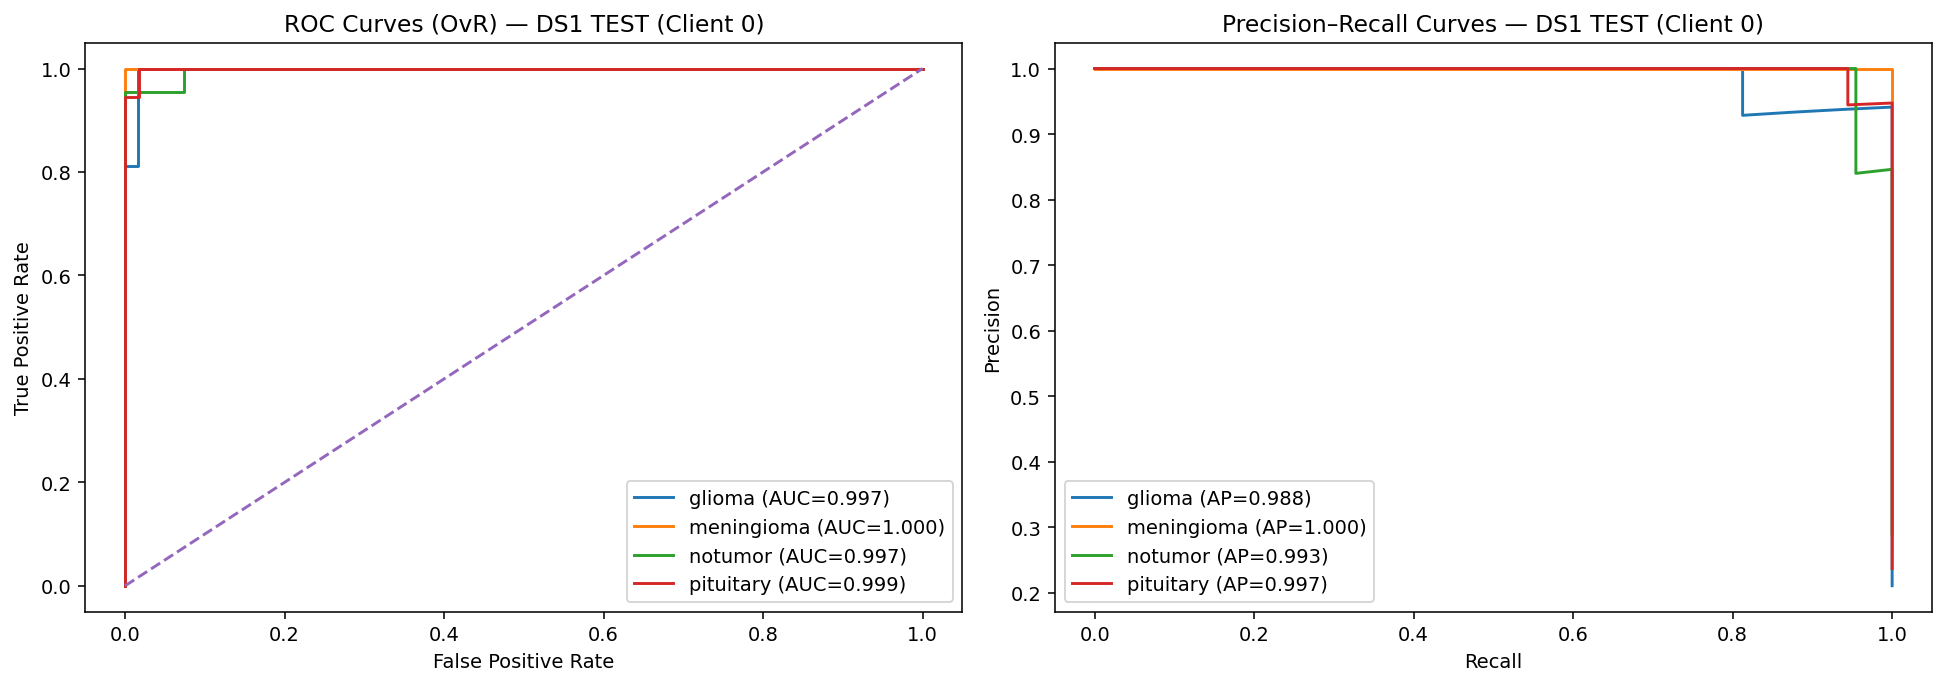

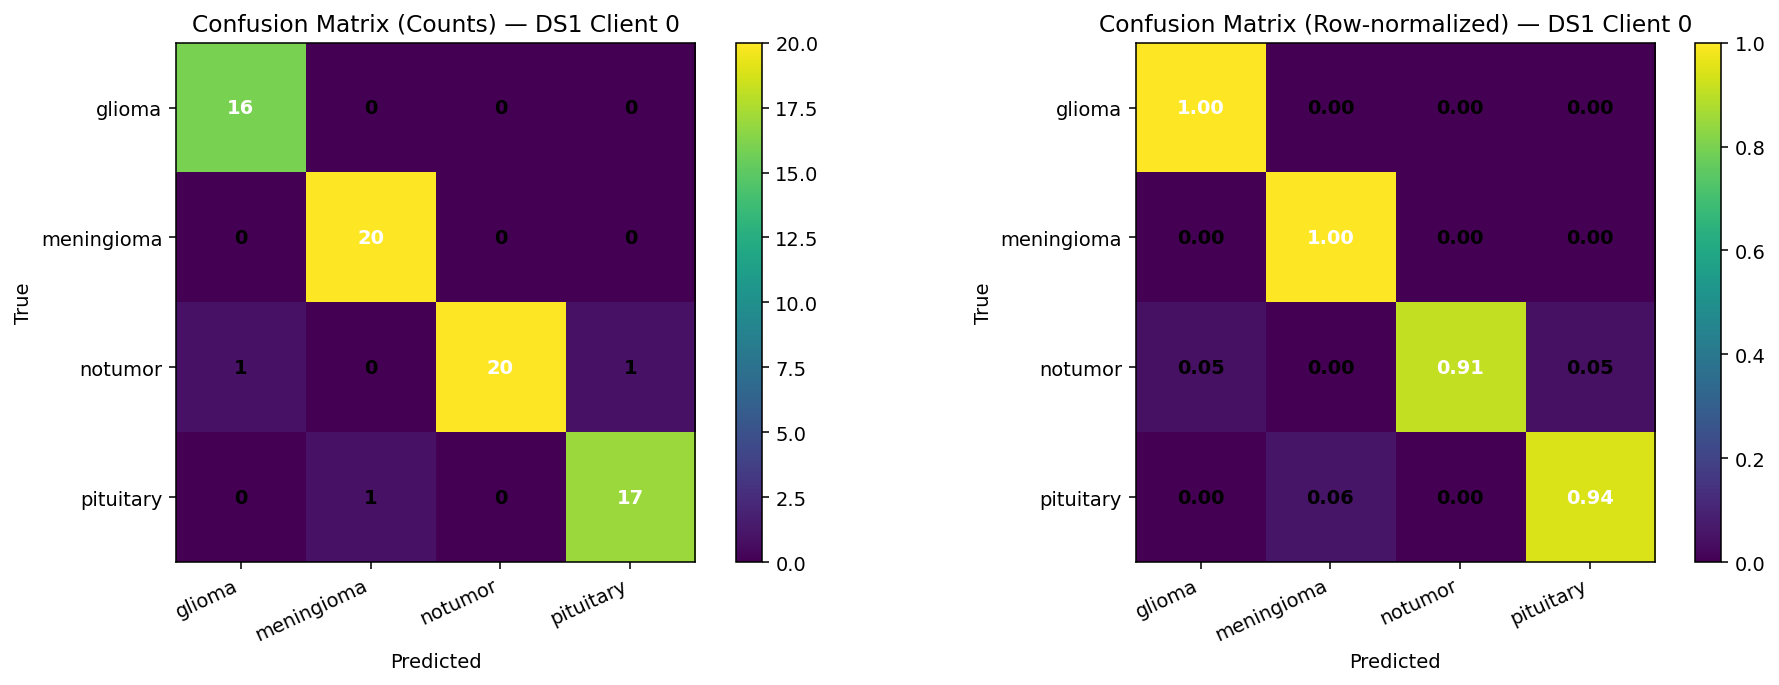

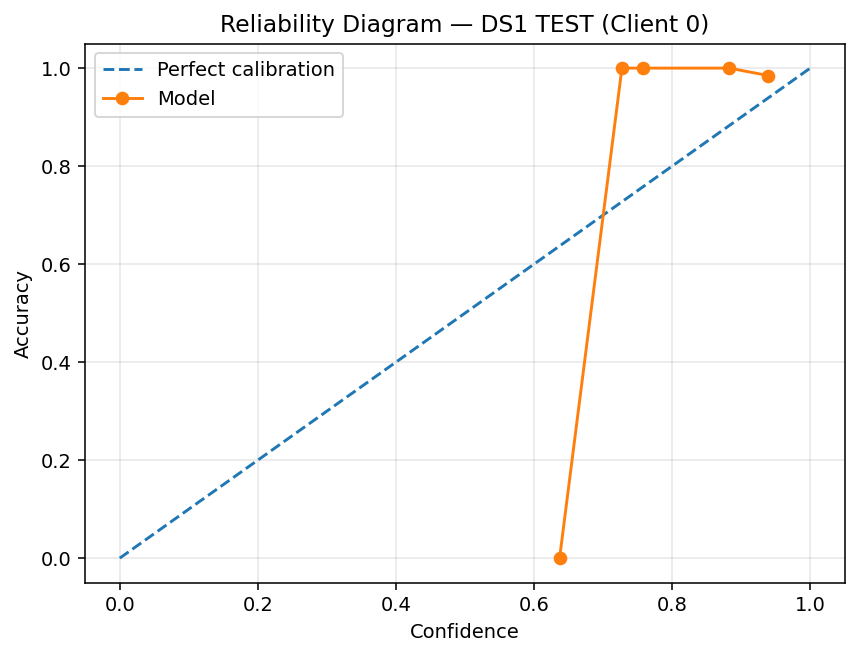


--------------------------------------------------------------------------------------------
Calibration bins table (DS1)
--------------------------------------------------------------------------------------------


bin_confidence  bin_accuracy  bin_count
0              NaN           NaN          0
1              NaN           NaN          0
2              NaN           NaN          0
3              NaN           NaN          0
4              NaN           NaN          0
5              NaN           NaN          0
6              NaN           NaN          0
7         0.636975      0.000000          2
8         0.727251      1.000000          1
9         0.758029      1.000000          1
10        0.882433      1.000000          6
11        0.939210      0.984848         66


STEP 11: UNIQUE PLOTS (RADAR, CLIENT EVOLUTION)


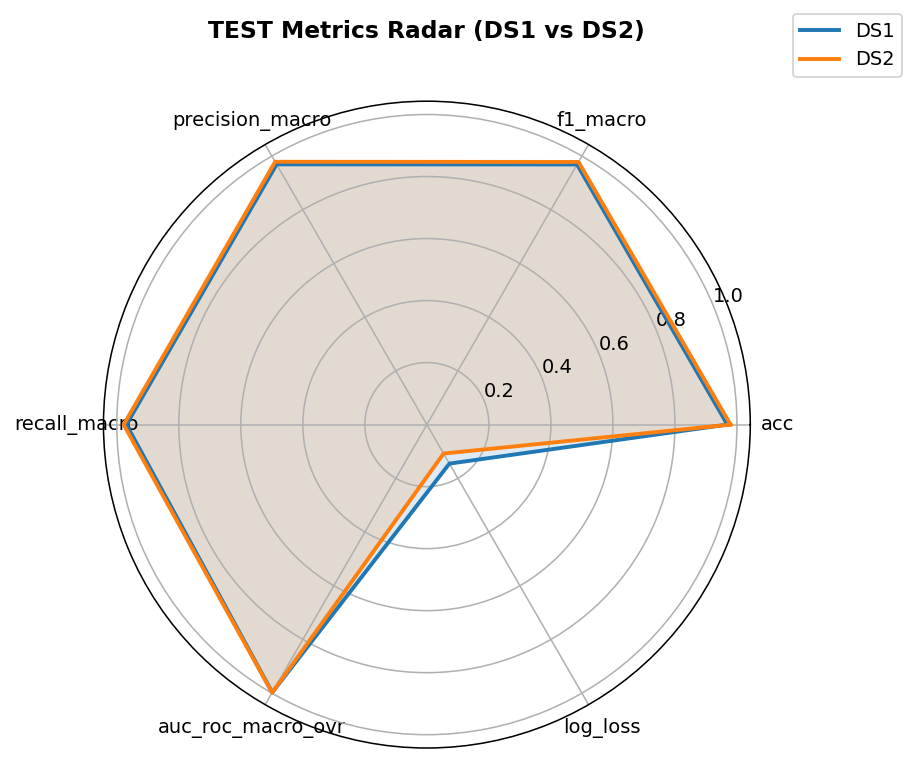

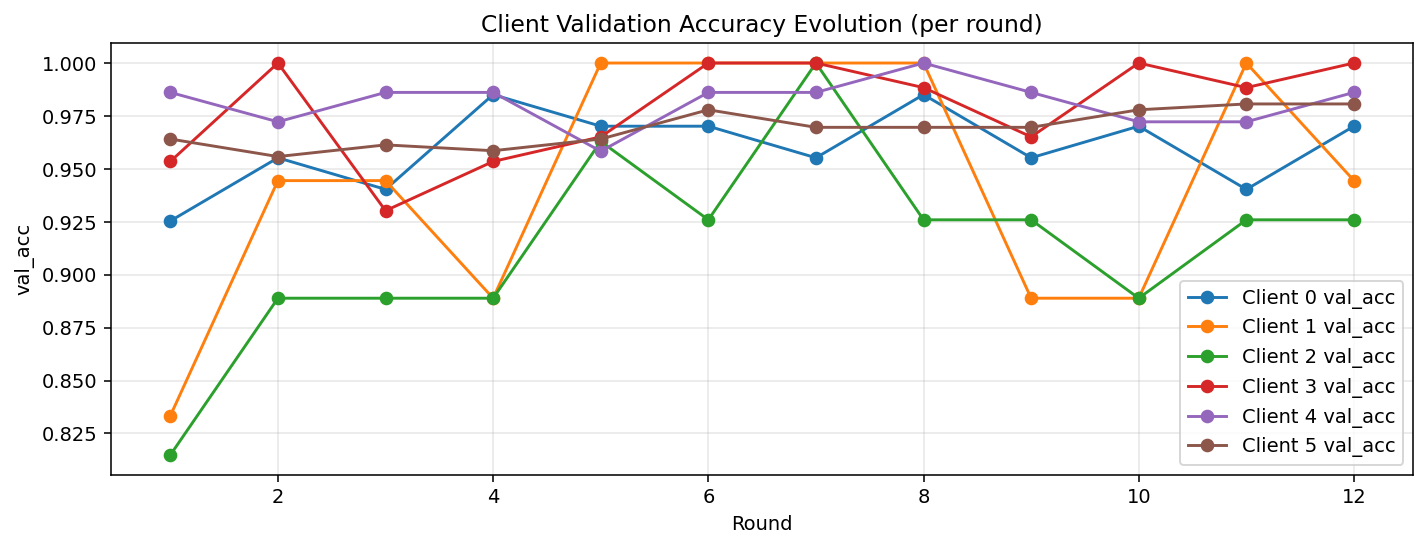


STEP 12: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)
✅ Saved checkpoint: /content/outputs/FL_BASELINE_PVTv2B2_checkpoint.pth
✅ Saved CSV (ALL outputs): /content/outputs/ALL_OUTPUTS_AND_METRICS.csv

DONE ✅ (TRUE FL BASELINE, 12 rounds, 6 clients, NO preprocess, NO aug, NO fusion)


In [ ]:
# ============================================================
# COLAB FULL SCRIPT (kagglehub download)
# TRUE FL BASELINE — PVTv2-B2 ONLY (NO PREPROCESS, NO AUG, NO FUSION)
# 6 Clients (3+3), Non-IID Dirichlet split
# Rounds = 12
# EXTRA OUTPUTS:
#  - Leakage/Sanity tables
#  - Client distribution table
#  - Per-round global + per-client metrics tables
#  - ROC + PR Curves (TEST, DS1 one client)
#  - Confusion Matrix (counts + row-normalized) — DS1
#  - Calibration / Reliability diagram — DS1 + bins table
#  - Radar (DS1 vs DS2), Client val_acc evolution
# Saves: checkpoint + one CSV (ALL outputs)
# ============================================================

import os, time, math, random, sys, subprocess, hashlib
from typing import List, Dict, Tuple

import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)

# -------------------------
# Install deps (Colab)
# -------------------------
def pip_install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "-q", "install", pkg])

try:
    import timm
except Exception:
    pip_install("timm")
    import timm

try:
    import kagglehub
except Exception:
    pip_install("kagglehub")
    import kagglehub

from torchvision import transforms

try:
    from IPython.display import display
except Exception:
    display = print

# -------------------------
# Reproducibility + Device
# -------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if DEVICE.type == "cuda":
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
try:
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

plt.rcParams["figure.dpi"] = 140

print("=" * 92)
print("COLAB: TRUE FL BASELINE — PVTv2-B2 ONLY (NO PREPROCESS, NO AUG, NO FUSION)")
print("=" * 92)
print(f"DEVICE: {DEVICE} | torch={torch.__version__}")
print("=" * 92)

# -------------------------
# Configuration
# -------------------------
CFG = {
    # FL: 3 clients per dataset => total 6
    "clients_per_dataset": 3,
    "clients_total": 6,

    "rounds": 12,           # ✅ requested
    "local_epochs": 2,
    "lr": 1e-3,
    "weight_decay": 5e-4,
    "warmup_epochs": 1,
    "label_smoothing": 0.08,
    "grad_clip": 1.0,
    "fedprox_mu": 0.01,     # keep as FL regularizer (not preprocess/aug/fusion)

    # image
    "img_size": 224 if torch.cuda.is_available() else 160,
    "batch_size": 20 if torch.cuda.is_available() else 10,
    "num_workers": 2 if torch.cuda.is_available() else 0,

    # split
    "global_val_frac": 0.15,
    "test_frac": 0.15,
    "client_val_frac": 0.12,
    "client_tune_frac": 0.12,   # kept for consistency (not used here)
    "min_per_class_per_client": 5,

    # non-iid
    "dirichlet_alpha": 0.35,

    # IMPORTANT: baseline toggles
    "use_preprocessing": False,
    "use_ga": False,
    "use_augmentation": False,
    "use_fusion": False,

    # optional late unfreeze
    "unfreeze_after_round": 3,
    "unfreeze_lr_mult": 0.10,
    "unfreeze_tail_frac": 0.17,

    # misc
    "quick_hash_subset_per_split": 300,
    "make_plots": True,  # set False if you want faster runs
}

OUTDIR = "/content/outputs"
os.makedirs(OUTDIR, exist_ok=True)
MODEL_PATH = os.path.join(OUTDIR, "FL_BASELINE_PVTv2B2_checkpoint.pth")
CSV_PATH   = os.path.join(OUTDIR, "ALL_OUTPUTS_AND_METRICS.csv")

IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp")

IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=DEVICE).view(1, 3, 1, 1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=DEVICE).view(1, 3, 1, 1)

# ============================================================
# Helper: collect all tables into ONE CSV (long format)
# ============================================================
ALL_ROWS = []
def add_table_to_csv(df, table_name):
    df2 = df.copy()
    df2.insert(0, "table_name", table_name)
    for _, row in df2.iterrows():
        ALL_ROWS.append(row.to_dict())

def print_table(df, title):
    print("\n" + "-" * 92)
    print(title)
    print("-" * 92)
    display(df)

# ============================================================
# STEP 0: DOWNLOAD DATASETS VIA kagglehub
# ============================================================
print("\n" + "=" * 92)
print("STEP 0: DOWNLOAD DATASETS VIA kagglehub")
print("=" * 92)

ds2_path = kagglehub.dataset_download("yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection")
print("✅ DS2 downloaded to:", ds2_path)

ds1_path = kagglehub.dataset_download("orvile/pmram-bangladeshi-brain-cancer-mri-dataset")
print("✅ DS1 downloaded to:", ds1_path)

CFG["ds1_base"] = ds1_path
CFG["ds2_base"] = ds2_path

# ============================================================
# STEP 1: DATASET DISCOVERY (NO CENTRAL MERGE)
# ============================================================
print("\n" + "=" * 92)
print("STEP 1: LOCATE DATASET ROOTS (NO MERGE)")
print("=" * 92)

REQ1 = {"512Glioma", "512Meningioma", "512Normal", "512Pituitary"}
REQ2 = {"glioma", "meningioma", "notumor", "pituitary"}

def norm_label(name: str):
    s = str(name).strip().lower()
    if "glioma" in s: return "glioma"
    if "meningioma" in s: return "meningioma"
    if "pituitary" in s: return "pituitary"
    if "normal" in s or "no_tumor" in s or "no tumor" in s or "notumor" in s: return "notumor"
    return None

def find_root_with_required_class_dirs(base_dir, required_set, prefer_raw=True):
    candidates = []
    for root, dirs, _ in os.walk(base_dir):
        if required_set.issubset(set(dirs)):
            candidates.append(root)
    if not candidates:
        return None

    def score(p):
        pl = p.lower()
        sc = 0
        if prefer_raw:
            if "raw data" in pl: sc += 7
            if os.path.basename(p).lower() == "raw": sc += 7
            if "/raw/" in pl or "\\raw\\" in pl: sc += 3
            if "augmented" in pl: sc -= 20
        sc -= 0.0001 * len(p)
        return sc

    return max(candidates, key=score)

def list_images_under_class_root(class_root, class_dir_name):
    class_dir = os.path.join(class_root, class_dir_name)
    out = []
    for r, _, files in os.walk(class_dir):
        for fn in files:
            if fn.lower().endswith(IMG_EXTS):
                out.append(os.path.join(r, fn))
    return out

def build_df_from_root(ds_root, class_dirs, source_name):
    rows = []
    for c in class_dirs:
        lab = norm_label(c)
        imgs = list_images_under_class_root(ds_root, c)
        print(f"{source_name}: {c} -> {lab} | {len(imgs)} images")
        for p in imgs:
            rows.append({"path": p, "label": lab, "source": source_name})
    dfm = pd.DataFrame(rows).dropna().reset_index(drop=True)
    dfm["path"] = dfm["path"].astype(str)
    dfm["label"] = dfm["label"].astype(str)
    dfm["source"] = dfm["source"].astype(str)
    dfm = dfm.drop_duplicates(subset=["path"]).reset_index(drop=True)
    dfm["filename"] = dfm["path"].apply(lambda x: os.path.basename(x))
    return dfm

DS1_ROOT = find_root_with_required_class_dirs(CFG["ds1_base"], REQ1, prefer_raw=True)
if DS1_ROOT is None:
    raise RuntimeError(f"Could not locate DS1 class root under {CFG['ds1_base']} with dirs {sorted(list(REQ1))}")
print(f"Dataset-1 RAW root detected:\n  {DS1_ROOT}")

DS2_ROOT = find_root_with_required_class_dirs(CFG["ds2_base"], REQ2, prefer_raw=False)
if DS2_ROOT is None:
    raise RuntimeError(f"Could not locate DS2 class root under {CFG['ds2_base']} with dirs {sorted(list(REQ2))}")
print(f"Dataset-2 root detected:\n  {DS2_ROOT}")

print("\n" + "-" * 92)
print("Building Dataset-1 (RAW only)")
df1 = build_df_from_root(DS1_ROOT, ["512Glioma", "512Meningioma", "512Normal", "512Pituitary"], "ds1_raw")
print("Building Dataset-2 (preprocessed dataset, but baseline uses NO extra preprocess)")
df2 = build_df_from_root(DS2_ROOT, ["glioma", "meningioma", "notumor", "pituitary"], "ds2")

labels = ["glioma", "meningioma", "notumor", "pituitary"]
label2id = {l: i for i, l in enumerate(labels)}
id2label = {i: l for l, i in label2id.items()}
NUM_CLASSES = len(labels)

def enforce_labels(df_):
    df_ = df_.copy()
    df_["label"] = df_["label"].astype(str).str.strip().str.lower()
    df_ = df_[df_["label"].isin(set(labels))].reset_index(drop=True)
    df_["y"] = df_["label"].map(label2id).astype(int)
    return df_

df1 = enforce_labels(df1)
df2 = enforce_labels(df2)

print("\n" + "-" * 92)
print(f"Dataset-1 images: {len(df1)}")
print(df1["label"].value_counts().reindex(labels, fill_value=0))
print(f"Dataset-2 images: {len(df2)}")
print(df2["label"].value_counts().reindex(labels, fill_value=0))
print("-" * 92)

# ============================================================
# STEP 2: Train/Val/Test Split per Dataset (STRATIFIED)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2: TRAIN/VAL/TEST SPLIT (PER DATASET)")
print("=" * 92)

def split_dataset(df_):
    train_df, temp_df = train_test_split(
        df_,
        test_size=(CFG["global_val_frac"] + CFG["test_frac"]),
        stratify=df_["y"],
        random_state=SEED,
    )
    val_rel = CFG["global_val_frac"] / (CFG["global_val_frac"] + CFG["test_frac"])
    val_df, test_df = train_test_split(
        temp_df,
        test_size=(1 - val_rel),
        stratify=temp_df["y"],
        random_state=SEED,
    )
    return train_df.reset_index(drop=True), val_df.reset_index(drop=True), test_df.reset_index(drop=True)

train1, val1, test1 = split_dataset(df1)
train2, val2, test2 = split_dataset(df2)

print(f"DS1 TRAIN: {len(train1)} | VAL: {len(val1)} | TEST: {len(test1)}")
print(f"DS2 TRAIN: {len(train2)} | VAL: {len(val2)} | TEST: {len(test2)}")

# ============================================================
# STEP 2.5: Leakage/Sanity Checks (per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2.5: SANITY / LEAKAGE CHECKS (PER DATASET)")
print("=" * 92)

def split_overlap_checks(train_df, val_df, test_df):
    tr = set(train_df["path"].tolist())
    va = set(val_df["path"].tolist())
    te = set(test_df["path"].tolist())
    checks = {
        "path_overlap_train_val": len(tr.intersection(va)),
        "path_overlap_train_test": len(tr.intersection(te)),
        "path_overlap_val_test": len(va.intersection(te)),
        "unique_paths_train": len(tr),
        "unique_paths_val": len(va),
        "unique_paths_test": len(te),
    }
    trf = set(train_df["filename"].tolist())
    vaf = set(val_df["filename"].tolist())
    tef = set(test_df["filename"].tolist())
    checks.update(
        {
            "filename_overlap_train_val": len(trf.intersection(vaf)),
            "filename_overlap_train_test": len(trf.intersection(tef)),
            "filename_overlap_val_test": len(vaf.intersection(tef)),
        }
    )
    return checks

def md5_file(path, max_bytes=2_000_000):
    h = hashlib.md5()
    try:
        with open(path, "rb") as f:
            h.update(f.read(max_bytes))
        return h.hexdigest()
    except Exception:
        return None

def quick_hash_subset(frame, n=300):
    n = min(n, len(frame))
    if n <= 0:
        return set()
    idx = np.random.choice(len(frame), size=n, replace=False)
    hashes = []
    for i in idx:
        hv = md5_file(frame.iloc[i]["path"])
        if hv is not None:
            hashes.append(hv)
    return set(hashes)

def leakage_report(name, tr, va, te):
    over = split_overlap_checks(tr, va, te)
    leak_df = pd.DataFrame([over])

    n_hash = int(CFG["quick_hash_subset_per_split"])
    trh = quick_hash_subset(tr, n_hash)
    vah = quick_hash_subset(va, n_hash)
    teh = quick_hash_subset(te, n_hash)

    hash_over = {
        "subset_hash_train_val": len(trh.intersection(vah)),
        "subset_hash_train_test": len(trh.intersection(teh)),
        "subset_hash_val_test": len(vah.intersection(teh)),
        "subset_hash_n_train": len(trh),
        "subset_hash_n_val": len(vah),
        "subset_hash_n_test": len(teh),
    }
    leak_df = pd.concat([leak_df, pd.DataFrame([hash_over])], axis=1)
    print_table(leak_df, f"Leakage / Sanity Summary — {name}")
    add_table_to_csv(leak_df, f"leakage_sanity_{name}")

leakage_report("ds1", train1, val1, test1)
leakage_report("ds2", train2, val2, test2)

# ============================================================
# STEP 3: Non-IID Client Partitioning (3 clients per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)")
print("=" * 92)

def make_clients_non_iid(train_df, n_clients, num_classes, min_per_class=5, alpha=0.35):
    y = train_df["y"].values
    idx_by_class = {c: np.where(y == c)[0].tolist() for c in range(num_classes)}
    for c in idx_by_class:
        random.shuffle(idx_by_class[c])

    client_indices = [[] for _ in range(n_clients)]

    # ensure some per-class coverage
    for c in range(num_classes):
        idxs = idx_by_class[c]
        feasible = min(min_per_class, max(1, len(idxs) // n_clients))
        for k in range(n_clients):
            take = idxs[:feasible]
            idxs = idxs[feasible:]
            client_indices[k].extend(take)
        idx_by_class[c] = idxs

    # Dirichlet for remaining
    for c in range(num_classes):
        idxs = idx_by_class[c]
        if len(idxs) == 0:
            continue
        props = np.random.dirichlet([alpha] * n_clients)
        counts = (props * len(idxs)).astype(int)
        diff = len(idxs) - counts.sum()
        counts[np.argmax(props)] += diff

        start = 0
        for k in range(n_clients):
            client_indices[k].extend(idxs[start: start + counts[k]])
            start += counts[k]

    for k in range(n_clients):
        random.shuffle(client_indices[k])
    return client_indices

def robust_client_splits(train_df, indices, val_frac, tune_frac):
    idxs = np.array(indices, dtype=int)
    if len(idxs) < 3:
        return idxs.tolist(), idxs.tolist(), idxs.tolist()

    yk = train_df.loc[idxs, "y"].values
    # Split off tune (kept for compatibility, not used in baseline)
    if len(np.unique(yk)) < 2 or len(idxs) < 20:
        n_tune = max(1, int(round(len(idxs) * tune_frac)))
        n_tune = min(n_tune, max(1, len(idxs) - 2))
        tune_idx = idxs[:n_tune]
        rem_idx = idxs[n_tune:]
    else:
        rem_idx, tune_idx = train_test_split(
            idxs,
            test_size=tune_frac,
            stratify=yk,
            random_state=SEED,
        )

    # Split remaining into train/val
    if len(rem_idx) < 2:
        return rem_idx.tolist(), tune_idx.tolist(), rem_idx.tolist()

    yk2 = train_df.loc[rem_idx, "y"].values
    if len(np.unique(yk2)) < 2 or len(rem_idx) < 12:
        n_val = max(1, int(round(len(rem_idx) * val_frac)))
        n_val = min(n_val, max(1, len(rem_idx) - 1))
        val_idx = rem_idx[:n_val]
        train_idx = rem_idx[n_val:]
    else:
        train_idx, val_idx = train_test_split(
            rem_idx,
            test_size=val_frac,
            stratify=yk2,
            random_state=SEED,
        )

    if len(train_idx) == 0:
        train_idx = val_idx[:]
    if len(val_idx) == 0:
        val_idx = train_idx[:1]
    return train_idx.tolist(), tune_idx.tolist(), val_idx.tolist()

n_per_ds = CFG["clients_per_dataset"]

client_indices_ds1 = make_clients_non_iid(
    train1,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)
client_indices_ds2 = make_clients_non_iid(
    train2,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)

client_splits = []
for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train1, client_indices_ds1[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = k
    client_splits.append(("ds1", k, gid, tr, tune, va))
    print(f"DS1 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train2, client_indices_ds2[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = n_per_ds + k
    client_splits.append(("ds2", k, gid, tr, tune, va))
    print(f"DS2 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

client_test_splits = []
for ds_name, test_df, base_gid in [("ds1", test1, 0), ("ds2", test2, n_per_ds)]:
    idxs = list(range(len(test_df)))
    random.shuffle(idxs)
    split = np.array_split(idxs, n_per_ds)
    for k in range(n_per_ds):
        client_test_splits.append((ds_name, k, base_gid + k, split[k].tolist()))

def client_distribution_table():
    dist_rows = []
    for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
        df_src = train1 if ds_name == "ds1" else train2
        counts = df_src.loc[tr_idx, "label"].value_counts().reindex(labels, fill_value=0)
        row = {
            "client": f"client_{gid}",
            "dataset": ds_name,
            "total_train": len(tr_idx),
            "total_tune": len(tune_idx),
            "total_val": len(val_idx),
        }
        row.update({lab: int(counts[lab]) for lab in labels})
        dist_rows.append(row)
    return pd.DataFrame(dist_rows)

dist_df = client_distribution_table()
print_table(dist_df, "Client class distribution (Non-IID, per dataset)")
add_table_to_csv(dist_df, "client_distribution")

# ============================================================
# STEP 4: Data pipeline (NO AUG) + ImageNet Norm
# ============================================================
print("\n" + "=" * 92)
print("STEP 4: DATA LOADERS (NO AUG) + IMAGENET NORM")
print("=" * 92)

def load_rgb(path):
    try:
        return Image.open(path).convert("RGB")
    except Exception:
        return Image.new("RGB", (CFG["img_size"], CFG["img_size"]), (128, 128, 128))

EVAL_TFMS = transforms.Compose([
    transforms.Resize((CFG["img_size"], CFG["img_size"])),
    transforms.ToTensor(),
])

TRAIN_TFMS = EVAL_TFMS  # ✅ baseline: NO augmentation

class MRIDataset(Dataset):
    def __init__(self, frame, indices=None, tfms=None):
        self.df = frame
        self.indices = indices if indices is not None else list(range(len(frame)))
        self.tfms = tfms

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, i):
        j = self.indices[i]
        row = self.df.iloc[j]
        img = load_rgb(row["path"])
        x = self.tfms(img) if self.tfms is not None else transforms.ToTensor()(img)
        y = int(row["y"])
        return x, y, row["path"]

def make_weighted_sampler(frame, indices, num_classes):
    if len(indices) == 0:
        return None
    ys = frame.loc[indices, "y"].values
    class_counts = np.bincount(ys, minlength=num_classes)
    class_weights = 1.0 / np.clip(class_counts, 1, None)
    sample_weights = class_weights[ys]
    return WeightedRandomSampler(
        weights=torch.DoubleTensor(sample_weights),
        num_samples=len(sample_weights),
        replacement=True,
    )

def make_loader(frame, indices, bs, tfms, shuffle=False, sampler=None):
    ds = MRIDataset(frame, indices=indices, tfms=tfms)
    return DataLoader(
        ds,
        batch_size=bs,
        shuffle=(shuffle and sampler is None),
        sampler=sampler,
        num_workers=CFG["num_workers"],
        pin_memory=(DEVICE.type == "cuda"),
        drop_last=False,
        persistent_workers=(CFG["num_workers"] > 0),
    )

client_loaders = []
for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
    df_src = train1 if ds_name == "ds1" else train2
    sampler = make_weighted_sampler(df_src, tr_idx, NUM_CLASSES)

    tr_loader = make_loader(df_src, tr_idx, CFG["batch_size"], TRAIN_TFMS,
                            shuffle=(sampler is None), sampler=sampler)

    # tune exists but not used; still build minimal loader for compatibility
    tune_loader = make_loader(df_src, tune_idx if len(tune_idx) else tr_idx[:max(1, len(tr_idx))],
                              CFG["batch_size"], EVAL_TFMS, shuffle=True)

    val_loader = make_loader(df_src, val_idx if len(val_idx) else tr_idx[:max(1, min(len(tr_idx), CFG["batch_size"]))],
                             CFG["batch_size"], EVAL_TFMS, shuffle=False)

    client_loaders.append((tr_loader, tune_loader, val_loader))

client_test_loaders = []
for (ds_name, local_id, gid, test_idx) in client_test_splits:
    df_src = test1 if ds_name == "ds1" else test2
    t_loader = make_loader(df_src, test_idx, CFG["batch_size"], EVAL_TFMS, shuffle=False)
    client_test_loaders.append((ds_name, local_id, gid, t_loader))

print(f"Augmentation: OFF ✅ | Preprocessing: OFF ✅ | Fusion: OFF ✅")

# ============================================================
# STEP 5: MODEL (PVTv2-B2 baseline classifier)
# ============================================================
print("\n" + "=" * 92)
print("STEP 5: MODEL (PVTv2-B2 BASELINE)")
print("=" * 92)

BACKBONE_NAME = "pvt_v2_b2"

def create_model(pretrained=True):
    # standard classifier head, no multi-view fusion
    m = timm.create_model(
        BACKBONE_NAME,
        pretrained=pretrained,
        num_classes=NUM_CLASSES,
    )
    return m

def count_params(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

def set_trainable_for_round(model, rnd):
    # freeze all by default
    for p in model.parameters():
        p.requires_grad = False

    # enable head/classifier params
    head_keys = ("head", "classifier", "fc")
    for n, p in model.named_parameters():
        if any(k in n.lower() for k in head_keys):
            p.requires_grad = True

    # optionally unfreeze tail part of backbone after some rounds
    if rnd >= CFG["unfreeze_after_round"]:
        # unfreeze a tail fraction of params that are NOT head
        backbone_params = [(n, p) for n, p in model.named_parameters()
                           if not any(k in n.lower() for k in head_keys)]
        if len(backbone_params) > 0:
            tail_n = max(1, int(len(backbone_params) * CFG["unfreeze_tail_frac"]))
            for _, p in backbone_params[-tail_n:]:
                p.requires_grad = True

def make_optimizer(model):
    head_params, bb_params = [], []
    head_keys = ("head", "classifier", "fc")
    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue
        if any(k in n.lower() for k in head_keys):
            head_params.append(p)
        else:
            bb_params.append(p)

    groups = []
    if head_params:
        groups.append({"params": head_params, "lr": CFG["lr"]})
    if bb_params:
        groups.append({"params": bb_params, "lr": CFG["lr"] * CFG["unfreeze_lr_mult"]})
    return torch.optim.AdamW(groups, weight_decay=CFG["weight_decay"])

# ============================================================
# STEP 6: TRAIN / EVAL UTILITIES (FULL METRICS)
# ============================================================
print("\n" + "=" * 92)
print("STEP 6: TRAIN / EVAL UTILITIES (FULL METRICS)")
print("=" * 92)

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps):
    def lr_lambda(step):
        if step < num_warmup_steps:
            return float(step) / float(max(1, num_warmup_steps))
        progress = float(step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * progress)))
    return torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

@torch.no_grad()
def _auc_metrics(y_true, p_pred, num_classes):
    out = {}
    try:
        if num_classes == 2:
            out["auc_roc"] = float(roc_auc_score(y_true, p_pred[:, 1]))
        else:
            out["auc_roc_macro_ovr"] = float(roc_auc_score(y_true, p_pred, multi_class="ovr", average="macro"))
            for c in range(num_classes):
                yc = (y_true == c).astype(int)
                if yc.sum() > 0 and yc.sum() < len(yc):
                    out[f"auc_class_{c}"] = float(roc_auc_score(yc, p_pred[:, c]))
    except Exception:
        pass
    return out

@torch.no_grad()
def evaluate_full(model, loader):
    t0 = time.time()
    model.eval()

    all_y, all_p, all_loss = [], [], []
    has_any = False

    for x, y, _ in loader:
        has_any = True
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)

        x_n = (x - IMAGENET_MEAN) / IMAGENET_STD
        logits = model(x_n)

        probs = torch.softmax(logits, dim=1)
        loss = F.cross_entropy(logits, y)

        all_loss.append(float(loss.item()))
        all_y.append(y.cpu().numpy())
        all_p.append(probs.cpu().numpy())

    if not has_any:
        met = {
            "loss_ce": np.nan,
            "acc": np.nan,
            "precision_macro": np.nan,
            "recall_macro": np.nan,
            "f1_macro": np.nan,
            "precision_weighted": np.nan,
            "recall_weighted": np.nan,
            "f1_weighted": np.nan,
            "log_loss": np.nan,
            "eval_time_s": float(time.time() - t0),
        }
        return met, np.array([]), np.array([])

    y_true = np.concatenate(all_y)
    p_pred = np.concatenate(all_p)
    y_hat = np.argmax(p_pred, axis=1)

    met = {
        "loss_ce": float(np.mean(all_loss)),
        "acc": float(accuracy_score(y_true, y_hat)),
        "precision_macro": float(precision_score(y_true, y_hat, average="macro", zero_division=0)),
        "recall_macro": float(recall_score(y_true, y_hat, average="macro", zero_division=0)),
        "f1_macro": float(f1_score(y_true, y_hat, average="macro", zero_division=0)),
        "precision_weighted": float(precision_score(y_true, y_hat, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(y_true, y_hat, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(y_true, y_hat, average="weighted", zero_division=0)),
        "log_loss": float(log_loss(y_true, p_pred, labels=list(range(NUM_CLASSES)))),
        "eval_time_s": float(time.time() - t0),
    }
    met.update(_auc_metrics(y_true, p_pred, NUM_CLASSES))
    return met, y_true, p_pred

def fedprox_term(local_model, global_model):
    loss = 0.0
    for p_local, p_global in zip(local_model.parameters(), global_model.parameters()):
        loss += ((p_local - p_global.detach()) ** 2).sum()
    return loss

def train_one_epoch(model, loader, optimizer, criterion, global_model=None, scheduler=None, scaler=None, grad_clip=1.0):
    model.train()
    losses, correct, total = [], 0, 0
    t0 = time.time()

    for x, y, _ in loader:
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)

        with torch.amp.autocast(device_type=DEVICE.type, enabled=(scaler is not None)):
            x_n = (x - IMAGENET_MEAN) / IMAGENET_STD
            logits = model(x_n)
            loss = criterion(logits, y)
            if global_model is not None and CFG["fedprox_mu"] > 0:
                loss = loss + 0.5 * CFG["fedprox_mu"] * fedprox_term(model, global_model)

        optimizer.zero_grad(set_to_none=True)
        if scaler is not None:
            scaler.scale(loss).backward()
            if grad_clip and grad_clip > 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            if grad_clip and grad_clip > 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            optimizer.step()

        if scheduler is not None:
            scheduler.step()

        losses.append(float(loss.item()))
        preds = logits.argmax(dim=1)
        correct += int((preds == y).sum().item())
        total += int(y.size(0))

    return float(np.mean(losses)), float(correct / max(1, total)), float(time.time() - t0)

def fedavg_update(global_model, local_models, weights, trainable_names):
    gsd = global_model.state_dict()
    new_sd = {}
    for name in trainable_names:
        acc = None
        for m, w in zip(local_models, weights):
            p = m.state_dict()[name].detach().float().cpu()
            acc = (w * p) if acc is None else (acc + w * p)
        new_sd[name] = acc
    for name, t in new_sd.items():
        gsd[name].copy_(t.to(gsd[name].device).type_as(gsd[name]))
    global_model.load_state_dict(gsd)

# ============================================================
# STEP 7: INITIALIZE GLOBAL MODEL + LOSS
# ============================================================
print("\n" + "=" * 92)
print("STEP 7: INITIALIZING GLOBAL MODEL")
print("=" * 92)

global_model = create_model(pretrained=True).to(DEVICE)
set_trainable_for_round(global_model, rnd=1)

total_params, tuned_params = count_params(global_model)
print("\n" + "-" * 92)
print(f"Backbone: {BACKBONE_NAME} | pretrained_loaded=True")
print(f"Total params: {total_params:,} | Trainable params: {tuned_params:,} ({(tuned_params/total_params)*100:.2f}%)")
print("-" * 92)

# Class weights (combined)
counts1 = train1["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts2 = train2["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts = counts1 + counts2
w = (counts.sum() / np.clip(counts, 1, None)).astype(np.float32)
w = w / max(1e-6, w.mean())
class_w = torch.tensor(w, device=DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_w, label_smoothing=CFG["label_smoothing"])
scaler = torch.amp.GradScaler("cuda") if DEVICE.type == "cuda" else None

hp_rows = [{"hp_name": k, "hp_value": str(v)} for k, v in CFG.items()]
hp_rows += [
    {"hp_name": "backbone_name", "hp_value": BACKBONE_NAME},
    {"hp_name": "norm", "hp_value": "ImageNet mean/std"},
]
hp_df = pd.DataFrame(hp_rows)
print_table(hp_df, "Hyperparameters")
add_table_to_csv(hp_df, "hyperparameters")

# ============================================================
# STEP 8: Federated Training Loop (TRUE FL simulation)
# ============================================================
print("\n" + "=" * 92)
print("STEP 8: FEDERATED TRAINING (BASELINE)")
print("=" * 92)

history_global = []
history_local = []

print(f"Rounds: {CFG['rounds']} | Clients: {CFG['clients_total']} | Local epochs: {CFG['local_epochs']}")
print(f"LR={CFG['lr']} | label_smoothing={CFG['label_smoothing']} | grad_clip={CFG['grad_clip']} | FedProx μ={CFG['fedprox_mu']}")
print(f"Preproc=OFF | Aug=OFF | Fusion=OFF | Unfreeze after round={CFG['unfreeze_after_round']}")

best_global_acc = -1.0
best_model_state = None
best_round_saved = None

t_global_start = time.time()

for rnd in range(1, CFG["rounds"] + 1):
    round_t0 = time.time()
    local_models = []
    local_weights = []
    local_rows = []

    print(f"\n{'='*92}")
    print(f"ROUND {rnd}/{CFG['rounds']}")
    print(f"{'='*92}")

    for k in range(CFG["clients_total"]):
        tr_loader, _, val_loader = client_loaders[k]
        ds_name = "ds1" if k < n_per_ds else "ds2"

        # Local model copy
        local_model = create_model(pretrained=False).to(DEVICE)
        local_model.load_state_dict(global_model.state_dict(), strict=True)

        set_trainable_for_round(local_model, rnd=rnd)
        opt = make_optimizer(local_model)

        total_steps = max(1, len(tr_loader) * CFG["local_epochs"])
        warmup_steps = max(1, len(tr_loader) * CFG["warmup_epochs"])
        scheduler = get_cosine_schedule_with_warmup(opt, warmup_steps, total_steps)

        # Train
        tr_losses, tr_accs, tr_time = [], [], 0.0
        for _ in range(CFG["local_epochs"]):
            loss_ep, acc_ep, t_ep = train_one_epoch(
                local_model,
                tr_loader,
                opt,
                criterion,
                global_model=global_model,
                scheduler=scheduler,
                scaler=scaler,
                grad_clip=CFG["grad_clip"],
            )
            tr_losses.append(loss_ep)
            tr_accs.append(acc_ep)
            tr_time += t_ep

        # Client validation
        met_loc, _, _ = evaluate_full(local_model, val_loader)

        local_models.append(local_model)
        local_weights.append(len(tr_loader.dataset))

        row = {
            "round": rnd,
            "client": f"client_{k}",
            "dataset": ds_name,
            "train_loss": float(np.mean(tr_losses)),
            "train_acc": float(np.mean(tr_accs)),
            "train_time_s": float(tr_time),
            **{f"val_{k2}": v2 for k2, v2 in met_loc.items()},
        }
        local_rows.append(row)

        auc_val = row.get("val_auc_roc_macro_ovr", row.get("val_auc_roc", np.nan))
        print(
            f"Client {k} ({ds_name}) | train_acc={row['train_acc']:.4f} | "
            f"val_acc={row['val_acc']:.4f} | val_f1={row['val_f1_macro']:.4f} | "
            f"val_auc={auc_val:.4f} | val_logloss={row['val_log_loss']:.4f} | "
            f"time(train={row['train_time_s']:.1f}s, eval={row['val_eval_time_s']:.1f}s)"
        )

    # FedAvg (only trainable params)
    wsum = sum(local_weights)
    weights = [w / wsum for w in local_weights]
    trainable_names = [n for n, p in local_models[0].named_parameters() if p.requires_grad]
    fedavg_update(global_model, local_models, weights, trainable_names)

    # Federated global val aggregation (weighted by val size)
    local_val_rows = pd.DataFrame(local_rows)
    local_val_rows["val_size"] = [len(client_loaders[i][2].dataset) for i in range(CFG["clients_total"])]
    total_val = local_val_rows["val_size"].sum()

    def weighted_avg(key):
        if total_val == 0:
            return np.nan
        return float(np.average(local_val_rows[key], weights=local_val_rows["val_size"]))

    global_metrics = {
        "acc": weighted_avg("val_acc"),
        "f1_macro": weighted_avg("val_f1_macro"),
        "precision_macro": weighted_avg("val_precision_macro"),
        "recall_macro": weighted_avg("val_recall_macro"),
        "log_loss": weighted_avg("val_log_loss"),
        "loss_ce": weighted_avg("val_loss_ce"),
        "eval_time_s": weighted_avg("val_eval_time_s"),
    }

    history_local.extend(local_rows)
    history_global.append({
        "round": rnd,
        "round_time_s": float(time.time() - round_t0),
        **{f"global_{k2}": v2 for k2, v2 in global_metrics.items()},
    })

    # best by ACC
    if np.isfinite(global_metrics["acc"]) and global_metrics["acc"] > best_global_acc:
        best_global_acc = float(global_metrics["acc"])
        best_model_state = {k: v.detach().cpu().clone() for k, v in global_model.state_dict().items()}
        best_round_saved = rnd

    print("\n" + "-" * 92)
    print(
        f"GLOBAL VAL (Round {rnd}) | acc={global_metrics['acc']:.4f} | f1={global_metrics['f1_macro']:.4f} | "
        f"logloss={global_metrics['log_loss']:.4f} | loss_ce={global_metrics['loss_ce']:.4f} | "
        f"round_time={history_global[-1]['round_time_s']:.1f}s"
    )
    print(f"BEST SO FAR (by ACC) | best_val_acc={best_global_acc:.4f} at round={best_round_saved}")
    print("-" * 92)

# restore best model
if best_model_state is not None:
    global_model.load_state_dict({k: v.to(DEVICE) for k, v in best_model_state.items()})

t_total = float(time.time() - t_global_start)
print("\n" + "=" * 92)
print(f"TRAINING COMPLETE ✅ | total_time={t_total:.1f}s | best_val_acc={best_global_acc:.4f} | best_round={best_round_saved}")
print("=" * 92)

glob_df = pd.DataFrame(history_global)
loc_df = pd.DataFrame(history_local)
print_table(glob_df, "GLOBAL per-round metrics")
print_table(loc_df, "LOCAL per-client per-round metrics")
add_table_to_csv(glob_df, "global_round_metrics_full")
add_table_to_csv(loc_df, "client_round_metrics_full")

# ============================================================
# STEP 9: Final Evaluation (Federated VAL + TEST)
# ============================================================
print("\n" + "=" * 92)
print("STEP 9: FINAL EVALUATION (FEDERATED VAL + TEST)")
print("=" * 92)

def weighted_aggregate(mets):
    if not mets:
        return {}
    total = sum(w for _, _, w in mets)
    if total == 0:
        return {}
    keys = mets[0][1].keys()
    out = {}
    for k in keys:
        vals = [m[1].get(k, np.nan) for m in mets]
        weights = [m[2] for m in mets]
        out[k] = float(np.average(vals, weights=weights))
    return out

# Federated VAL
val_metrics_clients = []
for k in range(CFG["clients_total"]):
    _, _, val_loader = client_loaders[k]
    met, _, _ = evaluate_full(global_model, val_loader)
    val_metrics_clients.append((k, met, len(val_loader.dataset)))
val_best = weighted_aggregate(val_metrics_clients)

# Federated TEST per dataset
def eval_test_per_dataset(ds_name):
    mets = []
    for (ds, local_id, gid, t_loader) in client_test_loaders:
        if ds != ds_name:
            continue
        met, y_true, p_pred = evaluate_full(global_model, t_loader)
        mets.append((met, len(t_loader.dataset), y_true, p_pred, gid))
    if not mets:
        return {}, []
    agg = weighted_aggregate([(i, m[0], m[1]) for i, m in enumerate(mets)])
    return agg, mets

test_ds1, ds1_mets = eval_test_per_dataset("ds1")
test_ds2, ds2_mets = eval_test_per_dataset("ds2")

# Weighted global test (ds1 + ds2)
global_test = weighted_aggregate([
    (0, test_ds1, len(test1)),
    (1, test_ds2, len(test2)),
])

def compact_metrics(m):
    keep = ["acc","precision_macro","recall_macro","f1_macro","precision_weighted","recall_weighted","f1_weighted","log_loss"]
    if "auc_roc_macro_ovr" in m: keep.append("auc_roc_macro_ovr")
    if "auc_roc" in m: keep.append("auc_roc")
    keep += ["loss_ce","eval_time_s"]
    return {k: float(m[k]) for k in keep if k in m}

paper_df = pd.DataFrame([
    {"setting": "PVTv2-B2 BASELINE (no preproc/aug/fusion)", "split": "VAL",  "dataset": "ds1+ds2 weighted", **compact_metrics(val_best)},
    {"setting": "PVTv2-B2 BASELINE", "split": "TEST", "dataset": "ds1", **compact_metrics(test_ds1)},
    {"setting": "PVTv2-B2 BASELINE", "split": "TEST", "dataset": "ds2", **compact_metrics(test_ds2)},
    {"setting": "PVTv2-B2 BASELINE", "split": "TEST", "dataset": "global weighted", **compact_metrics(global_test)},
])
print_table(paper_df, "VAL+TEST tables (federated, per-dataset + global)")
add_table_to_csv(paper_df, "paper_ready_metrics")

print("\nPaper selection summary:")
print(f"- Best round (by federated VAL accuracy): round={best_round_saved} | best_val_acc={best_global_acc:.4f}")

# ============================================================
# STEP 10: Plots (DS1 one test client): ROC/PR, CM, Calibration
# ============================================================
print("\n" + "=" * 92)
print("STEP 10: PLOTS (DS1 TEST — ONE CLIENT)")
print("=" * 92)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        # ROC + PR
        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0 or yc.sum() == len(yc):
                continue
            fpr, tpr, _ = roc_curve(yc, p_test[:, c])
            try:
                auc_c = roc_auc_score(yc, p_test[:, c])
                lbl = f"{labels[c]} (AUC={auc_c:.3f})"
            except Exception:
                lbl = f"{labels[c]}"
            plt.plot(fpr, tpr, label=lbl)
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.title(f"ROC Curves (OvR) — DS1 TEST (Client {gid0})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

        plt.subplot(1, 2, 2)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0:
                continue
            prec, rec, _ = precision_recall_curve(yc, p_test[:, c])
            try:
                ap = average_precision_score(yc, p_test[:, c])
                lbl = f"{labels[c]} (AP={ap:.3f})"
            except Exception:
                lbl = f"{labels[c]}"
            plt.plot(rec, prec, label=lbl)
        plt.title(f"Precision–Recall Curves — DS1 TEST (Client {gid0})")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Confusion matrices
        y_hat_test = np.argmax(p_test, axis=1)
        cm_counts = confusion_matrix(y_true_test, y_hat_test, labels=list(range(NUM_CLASSES)))
        cm_norm = cm_counts / np.clip(cm_counts.sum(axis=1, keepdims=True), 1, None)

        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cm_counts, interpolation="nearest", aspect="equal")
        plt.title(f"Confusion Matrix (Counts) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_counts[i, j]
                plt.text(j, i, str(v), ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > cm_counts.max() / 2 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.subplot(1, 2, 2)
        plt.imshow(cm_norm, interpolation="nearest", vmin=0, vmax=1, aspect="equal")
        plt.title(f"Confusion Matrix (Row-normalized) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_norm[i, j]
                plt.text(j, i, f"{v:.2f}", ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > 0.5 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.tight_layout()
        plt.show()

        # Calibration / reliability
        def multiclass_calibration_curve(y_true, p_pred, n_bins=12):
            conf = np.max(p_pred, axis=1)
            pred = np.argmax(p_pred, axis=1)
            acc = (pred == y_true).astype(np.float32)

            bins = np.linspace(0.0, 1.0, n_bins + 1)
            bin_ids = np.digitize(conf, bins) - 1
            bin_ids = np.clip(bin_ids, 0, n_bins - 1)

            bin_conf, bin_acc, bin_count = [], [], []
            for b in range(n_bins):
                m = bin_ids == b
                if m.sum() == 0:
                    bin_conf.append(np.nan)
                    bin_acc.append(np.nan)
                    bin_count.append(0)
                else:
                    bin_conf.append(conf[m].mean())
                    bin_acc.append(acc[m].mean())
                    bin_count.append(int(m.sum()))
            return np.array(bin_conf), np.array(bin_acc), np.array(bin_count)

        bin_conf, bin_acc, bin_n = multiclass_calibration_curve(y_true_test, p_test, n_bins=12)

        fig = plt.figure(figsize=(7, 5))
        plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect calibration")
        plt.plot(bin_conf, bin_acc, marker="o", label="Model")
        plt.title(f"Reliability Diagram — DS1 TEST (Client {gid0})")
        plt.xlabel("Confidence")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        cal_df = pd.DataFrame({"bin_confidence": bin_conf, "bin_accuracy": bin_acc, "bin_count": bin_n})
        print_table(cal_df, "Calibration bins table (DS1)")
        add_table_to_csv(cal_df, "calibration_bins_ds1")

# ============================================================
# STEP 11: Unique plots (Radar + Client evolution)
# ============================================================
print("\n" + "=" * 92)
print("STEP 11: UNIQUE PLOTS (RADAR, CLIENT EVOLUTION)")
print("=" * 92)

def radar_plot(metrics_a, metrics_b, axes_keys, title):
    vals_a = [metrics_a.get(k, np.nan) for k in axes_keys]
    vals_b = [metrics_b.get(k, np.nan) for k in axes_keys]
    angles = np.linspace(0, 2 * np.pi, len(axes_keys), endpoint=False).tolist()
    vals_a += vals_a[:1]
    vals_b += vals_b[:1]
    angles += angles[:1]

    fig = plt.figure(figsize=(7, 6))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, vals_a, linewidth=2, label="DS1")
    ax.fill(angles, vals_a, alpha=0.15)
    ax.plot(angles, vals_b, linewidth=2, label="DS2")
    ax.fill(angles, vals_b, alpha=0.15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(axes_keys)
    ax.set_title(title, y=1.08, fontweight="bold")
    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.15))
    plt.show()

if CFG["make_plots"]:
    rad_keys = ["acc", "f1_macro", "precision_macro", "recall_macro", "log_loss"]
    if "auc_roc_macro_ovr" in test_ds1:
        rad_keys.insert(4, "auc_roc_macro_ovr")
    elif "auc_roc" in test_ds1:
        rad_keys.insert(4, "auc_roc")

    if test_ds1 and test_ds2:
        radar_plot(compact_metrics(test_ds1), compact_metrics(test_ds2), rad_keys, "TEST Metrics Radar (DS1 vs DS2)")

    # Client validation accuracy evolution
    try:
        fig = plt.figure(figsize=(12, 4))
        for k in range(CFG["clients_total"]):
            sub = loc_df[loc_df["client"] == f"client_{k}"].sort_values("round")
            if len(sub) > 0 and "val_acc" in sub.columns:
                plt.plot(sub["round"], sub["val_acc"], marker="o", label=f"Client {k} val_acc")
        plt.title("Client Validation Accuracy Evolution (per round)")
        plt.xlabel("Round")
        plt.ylabel("val_acc")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()
    except Exception as e:
        print("Client evolution plot skipped due to:", e)

# ============================================================
# STEP 12: SAVE ONLY TWO FILES (checkpoint + one CSV)
# ============================================================
print("\n" + "=" * 92)
print("STEP 12: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)")
print("=" * 92)

checkpoint = {
    "state_dict": {k: v.detach().cpu() for k, v in global_model.state_dict().items()},
    "config": CFG,
    "seed": SEED,
    "device_used": str(DEVICE),
    "dataset1_raw_root": DS1_ROOT,
    "dataset2_root": DS2_ROOT,
    "labels": labels,
    "label2id": label2id,
    "id2label": id2label,
    "num_classes": NUM_CLASSES,
    "backbone_name": BACKBONE_NAME,
    "best_round_saved": best_round_saved,
    "best_val_acc": best_global_acc,
    "client_splits": client_splits,
    "client_test_splits": client_test_splits,
    "history_global": glob_df.to_dict(orient="list"),
    "history_local": loc_df.to_dict(orient="list"),
    "final_val_federated": val_best,
    "final_test_ds1": test_ds1,
    "final_test_ds2": test_ds2,
    "final_test_global_weighted": global_test,
    "total_training_time_s": t_total,
}

torch.save(checkpoint, MODEL_PATH)
print(f"✅ Saved checkpoint: {MODEL_PATH}")

all_df = pd.DataFrame(ALL_ROWS)
all_df.to_csv(CSV_PATH, index=False)
print(f"✅ Saved CSV (ALL outputs): {CSV_PATH}")

print("\nDONE ✅ (TRUE FL BASELINE, 12 rounds, 6 clients, NO preprocess, NO aug, NO fusion)")


# **Fusion only+no aug+no preprocess**

COLAB: TRUE FL — PVTv2-B2 WITH FEATURE FUSION ONLY (NO AUG, NO PREPROCESS)
DEVICE: cuda | torch=2.9.0+cu126

STEP 0: DOWNLOAD DATASETS VIA kagglehub
Using Colab cache for faster access to the 'preprocessed-brain-mri-scans-for-tumors-detection' dataset.
✅ DS2 downloaded to: /kaggle/input/preprocessed-brain-mri-scans-for-tumors-detection
Using Colab cache for faster access to the 'pmram-bangladeshi-brain-cancer-mri-dataset' dataset.
✅ DS1 downloaded to: /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset

STEP 1: LOCATE DATASET ROOTS (NO MERGE)
Dataset-1 RAW root detected:
  /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Raw Data/Raw
Dataset-2 root detected:
  /kaggle/input/preprocessed-brain-mri-scans-for-tumors-detection/preprocessed_brain_mri_dataset

--------------------------------------------------------------------------------------------
Building Dataset-1 (RAW only)
ds1_raw: 

path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                1053               226                226   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      5                       5   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     6                  298                222   

   subset_hash_n_test  
0                 224


--------------------------------------------------------------------------------------------
Leakage / Sanity Summary — ds2
--------------------------------------------------------------------------------------------


path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                4921              1055               1055   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      0                       3   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     4                  299                298   

   subset_hash_n_test  
0                 299


STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)
DS1 Client 0 (global id 0): 490 train, 77 tune, 67 val
DS1 Client 1 (global id 1): 125 train, 20 tune, 18 val
DS1 Client 2 (global id 2): 198 train, 31 tune, 27 val
DS2 Client 0 (global id 3): 629 train, 98 tune, 86 val
DS2 Client 1 (global id 4): 527 train, 82 tune, 72 val
DS2 Client 2 (global id 5): 2653 train, 412 tune, 362 val

--------------------------------------------------------------------------------------------
Client class distribution (Non-IID, per dataset)
--------------------------------------------------------------------------------------------


client dataset  total_train  total_tune  total_val  glioma  meningioma  \
0  client_0     ds1          490          77         67     111          46   
1  client_1     ds1          125          20         18      75           4   
2  client_2     ds1          198          31         27      16         147   
3  client_3     ds2          629          98         86      12         197   
4  client_4     ds2          527          82         72     202           4   
5  client_5     ds2         2653         412        362     665         691   

   notumor  pituitary  
0      176        157  
1        8         38  
2       30          5  
3      416          4  
4      284         37  
5      383        914


STEP 4: DATA LOADERS (NO AUG) + IMAGENET NORM
Fusion: ON ✅ | Augmentation: OFF ✅ | Preprocessing: OFF ✅

STEP 5: MODEL (PVTv2-B2 + FEATURE FUSION HEAD)

STEP 6: TRAIN / EVAL UTILITIES (FULL METRICS)

STEP 7: INITIALIZING GLOBAL MODEL



--------------------------------------------------------------------------------------------
Backbone: pvt_v2_b2 | pretrained_loaded=True
Total params: 25,119,172 | Trainable params: 16,154,948 (64.31%)
--------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------
Hyperparameters
--------------------------------------------------------------------------------------------


hp_name  \
0           clients_per_dataset   
1                 clients_total   
2                        rounds   
3                  local_epochs   
4                            lr   
5                  weight_decay   
6                 warmup_epochs   
7               label_smoothing   
8                     grad_clip   
9                    fedprox_mu   
10                     img_size   
11                   batch_size   
12                  num_workers   
13              global_val_frac   
14                    test_frac   
15              client_val_frac   
16             client_tune_frac   
17     min_per_class_per_client   
18              dirichlet_alpha   
19            use_preprocessing   
20             use_augmentation   
21                   use_fusion   
22           fusion_out_indices   
23                   fusion_dim   
24               fusion_dropout   
25         unfreeze_after_round   
26             unfreeze_lr_mult   
27           unfreeze_tail_frac   
28  quick_hash_subset_per_split   
29                   make_plots   
30                     ds1_base   
31                     ds2_base   
32                backbone_name   
33                         norm   
34                  fusion_type   

                                             hp_value  
0                                                   3  
1                                                   6  
2                                                  12  
3                                                   2  
4                                               0.001  
5                                              0.0005  
6                                                   1  
7                                                0.08  
8                                                 1.0  
9                                                0.01  
10                                                224  
11                                                 20  
12                                                  2  
13                                               0.15  
14                                               0.15  
15                                               0.12  
16                                               0.12  
17                                                  5  
18                                               0.35  
19                                              False  
20                                              False  
21                                               True  
22                                       (0, 1, 2, 3)  
23                                                256  
24                                               0.15  
25                                                  3  
26                                                0.1  
27                                               0.17  
28                                                300  
29                                               True  
30  /kaggle/input/pmram-bangladeshi-brain-cancer-m...  
31  /kaggle/input/preprocessed-brain-mri-scans-for...  
32                                          pvt_v2_b2  
33                                  ImageNet mean/std  
34  multi-level feature pooling + projection + concat


STEP 8: FEDERATED TRAINING (FUSION ONLY)
Rounds: 12 | Clients: 6 | Local epochs: 2
LR=0.001 | label_smoothing=0.08 | grad_clip=1.0 | FedProx μ=0.01
Fusion=ON | Aug=OFF | Preproc=OFF | Unfreeze after round=3

ROUND 1/12
Client 0 (ds1) | train_acc=0.7571 | val_acc=0.9403 | val_f1=0.9167 | val_auc=0.9844 | val_logloss=0.2283 | time(train=11.3s, eval=0.6s)
Client 1 (ds1) | train_acc=0.3120 | val_acc=0.3333 | val_f1=0.1667 | val_auc=nan | val_logloss=1.3142 | time(train=3.4s, eval=0.4s)
Client 2 (ds1) | train_acc=0.5884 | val_acc=0.7778 | val_f1=0.3174 | val_auc=0.8117 | val_logloss=0.7092 | time(train=4.6s, eval=0.4s)
Client 3 (ds2) | train_acc=0.8521 | val_acc=0.9651 | val_f1=0.4864 | val_auc=0.8477 | val_logloss=0.1866 | time(train=12.2s, eval=0.6s)
Client 4 (ds2) | train_acc=0.8472 | val_acc=0.9861 | val_f1=0.9571 | val_auc=nan | val_logloss=0.0849 | time(train=10.0s, eval=0.6s)
Client 5 (ds2) | train_acc=0.8221 | val_acc=0.9530 | val_f1=0.9549 | val_auc=0.9954 | val_logloss=0.1851 | t

round  round_time_s  global_acc  global_f1_macro  global_precision_macro  \
0       1    114.917287    0.931962         0.837666                0.846313   
1       2    113.561387    0.944620         0.886946                0.889813   
2       3     86.372818    0.954114         0.896869                0.901877   
3       4     88.083272    0.960443         0.885769                0.895353   
4       5     87.146713    0.962025         0.950607                0.951843   
5       6     85.517461    0.969937         0.926276                0.917202   
6       7     87.418226    0.957278         0.948308                0.945877   
7       8     86.130249    0.963608         0.864222                0.868519   
8       9     96.067589    0.952532         0.904397                0.907026   
9      10     86.631995    0.968354         0.961119                0.961906   
10     11     85.139247    0.968354         0.916499                0.912560   
11     12     97.015153    0.976266         0.945442                0.941509   

    global_recall_macro  global_log_loss  global_loss_ce  global_eval_time_s  
0              0.838592         0.233038        0.242734            1.359020  
1              0.906527         0.205534        0.201129            1.256855  
2              0.903255         0.207242        0.211117            1.209972  
3              0.890438         0.172365        0.187465            1.230314  
4              0.958289         0.178240        0.203009            1.234059  
5              0.944945         0.138914        0.142851            1.209447  
6              0.959337         0.169476        0.172631            1.200513  
7              0.865362         0.165319        0.175619            1.207068  
8              0.913955         0.187019        0.192492            1.213150  
9              0.962389         0.153023        0.155940            1.195012  
10             0.926324         0.147920        0.148047            1.192943  
11             0.951105         0.134850        0.134137            1.216324


--------------------------------------------------------------------------------------------
LOCAL per-client per-round metrics
--------------------------------------------------------------------------------------------


round    client dataset  train_loss  train_acc  train_time_s  val_loss_ce  \
0       1  client_0     ds1    1.026073   0.757143     11.283089     0.206114   
1       1  client_1     ds1    1.826473   0.312000      3.389950     1.314175   
2       1  client_2     ds1    1.249740   0.588384      4.550199     0.843845   
3       1  client_3     ds2    0.907357   0.852146     12.152926     0.258592   
4       1  client_4     ds2    0.911211   0.847249      9.951976     0.082739   
..    ...       ...     ...         ...        ...           ...          ...   
67     12  client_1     ds1    0.383677   0.980000      3.466927     0.054465   
68     12  client_2     ds1    0.408424   0.977273      7.338538     0.160255   
69     12  client_3     ds2    0.402106   0.992051     14.596189     0.098309   
70     12  client_4     ds2    0.399423   0.990512      9.744464     0.164134   
71     12  client_5     ds2    0.567700   0.971919     42.595326     0.139993   

     val_acc  val_precision_macro  val_recall_macro  ...  \
0   0.940299             0.921245          0.913636  ...   
1   0.333333             0.111111          0.333333  ...   
2   0.777778             0.442308          0.312500  ...   
3   0.965116             0.482266          0.490741  ...   
4   0.986111             0.988506          0.933333  ...   
..       ...                  ...               ...  ...   
67  1.000000             1.000000          1.000000  ...   
68  0.962963             0.916667          0.987500  ...   
69  0.988372             0.995690          0.990741  ...   
70  0.972222             0.708333          0.732143  ...   
71  0.972376             0.969743          0.973147  ...   

    val_precision_weighted  val_recall_weighted  val_f1_weighted  \
0                 0.941529             0.940299         0.939950   
1                 0.111111             0.333333         0.166667   
2                 0.717949             0.777778         0.703382   
3                 0.942649             0.965116         0.953689   
4                 0.986590             0.986111         0.985461   
..                     ...                  ...              ...   
67                1.000000             1.000000         1.000000   
68                0.975309             0.962963         0.966192   
69                0.988573             0.988372         0.988313   
70                0.988426             0.972222         0.979284   
71                0.972608             0.972376         0.972364   

    val_log_loss  val_eval_time_s  val_auc_roc_macro_ovr  val_auc_class_0  \
0       0.228275         0.632849               0.984366         0.983333   
1       1.314174         0.414160                    NaN              NaN   
2       0.709197         0.391501               0.811720         0.540000   
3       0.186552         0.648658               0.847669         0.941176   
4       0.084927         0.555138                    NaN              NaN   
..           ...              ...                    ...              ...   
67      0.054465         0.236192                    NaN              NaN   
68      0.161871         0.383331               0.998214         1.000000   
69      0.101850         0.530120               1.000000         1.000000   
70      0.138701         0.409557                    NaN              NaN   
71      0.143657         1.761208               0.998131         0.998621   

    val_auc_class_1  val_auc_class_2  val_auc_class_3  
0          0.959016         0.996124         0.998990  
1               NaN              NaN              NaN  
2          0.821429         0.923913         0.961538  
3          0.993095         0.997580         0.458824  
4               NaN              NaN              NaN  
..              ...              ...              ...  
67              NaN              NaN              NaN  
68         0.992857         1.000000         1.000000  
69         1.000000         1.000000         1.000000  
70      


STEP 9: FINAL EVALUATION (FEDERATED VAL + TEST)

--------------------------------------------------------------------------------------------
VAL+TEST tables (federated, per-dataset + global)
--------------------------------------------------------------------------------------------


setting split           dataset       acc  precision_macro  \
0  PVTv2-B2 FUSION-ONLY   VAL  ds1+ds2 weighted  0.976266         0.929377   
1  PVTv2-B2 FUSION-ONLY  TEST               ds1  0.938053         0.946467   
2  PVTv2-B2 FUSION-ONLY  TEST               ds2  0.975355         0.975428   
3  PVTv2-B2 FUSION-ONLY  TEST   global weighted  0.968774         0.970319   

   recall_macro  f1_macro  precision_weighted  recall_weighted  f1_weighted  \
0      0.954160  0.937466            0.981289         0.976266     0.977811   
1      0.937583  0.939130            0.945137         0.938053     0.938632   
2      0.974082  0.974344            0.975921         0.975355     0.975249   
3      0.967642  0.968132            0.970490         0.968774     0.968789   

   log_loss  auc_roc_macro_ovr   loss_ce  eval_time_s  
0  0.131845                NaN  0.137200     1.214748  
1  0.254920           0.987297  0.245677     0.669719  
2  0.125519           0.998668  0.124110     1.854978  
3  0.148348           0.996662  0.145557     1.645869


Paper selection summary:
- Best round (by federated VAL accuracy): round=12 | best_val_acc=0.9763

STEP 10: PLOTS (DS1 TEST — ONE CLIENT)


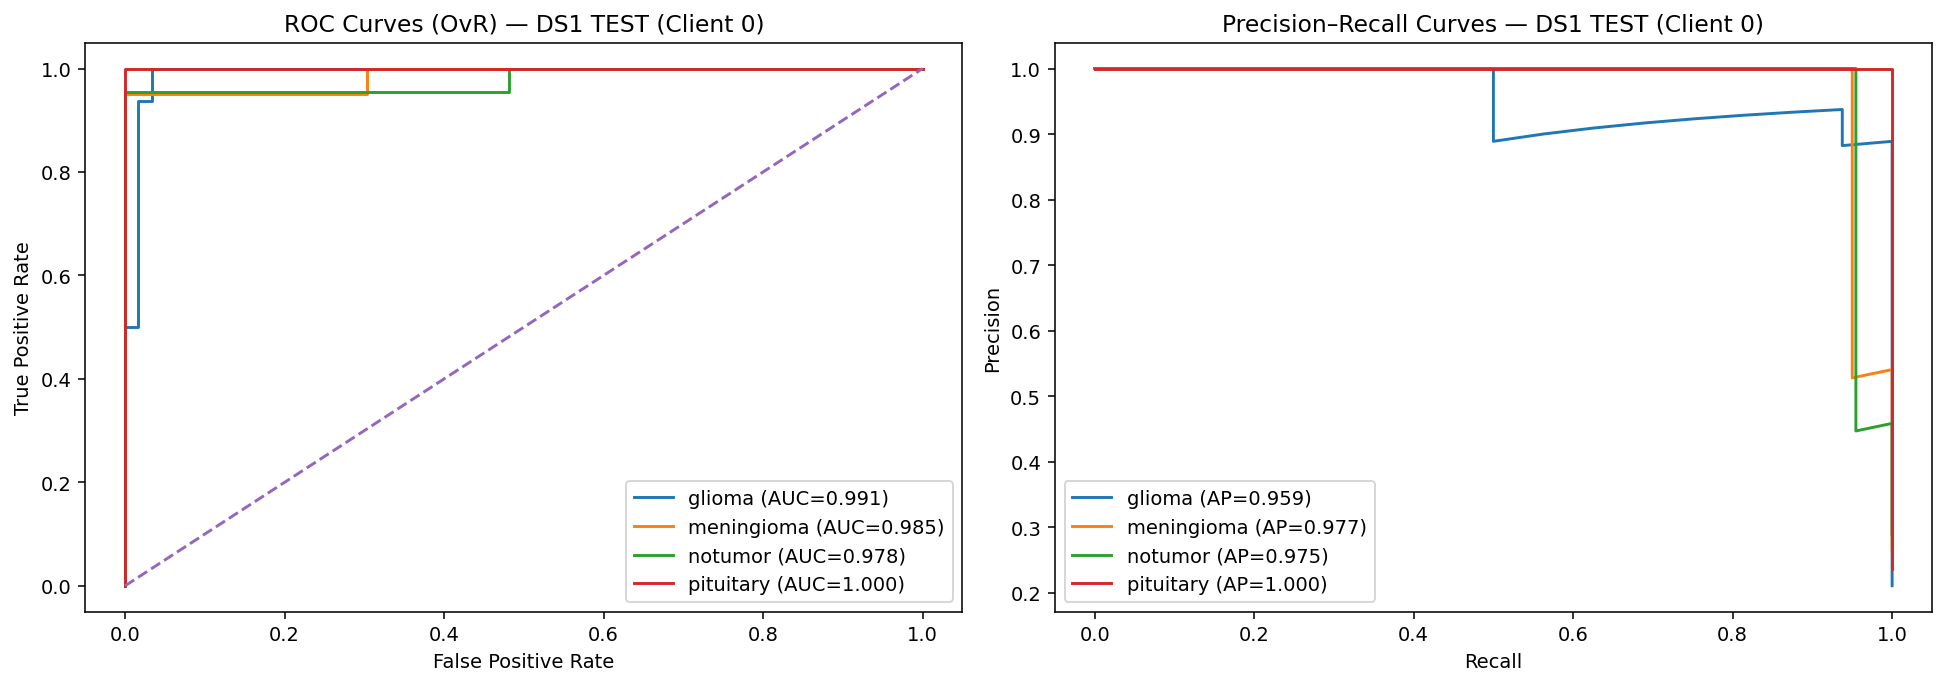

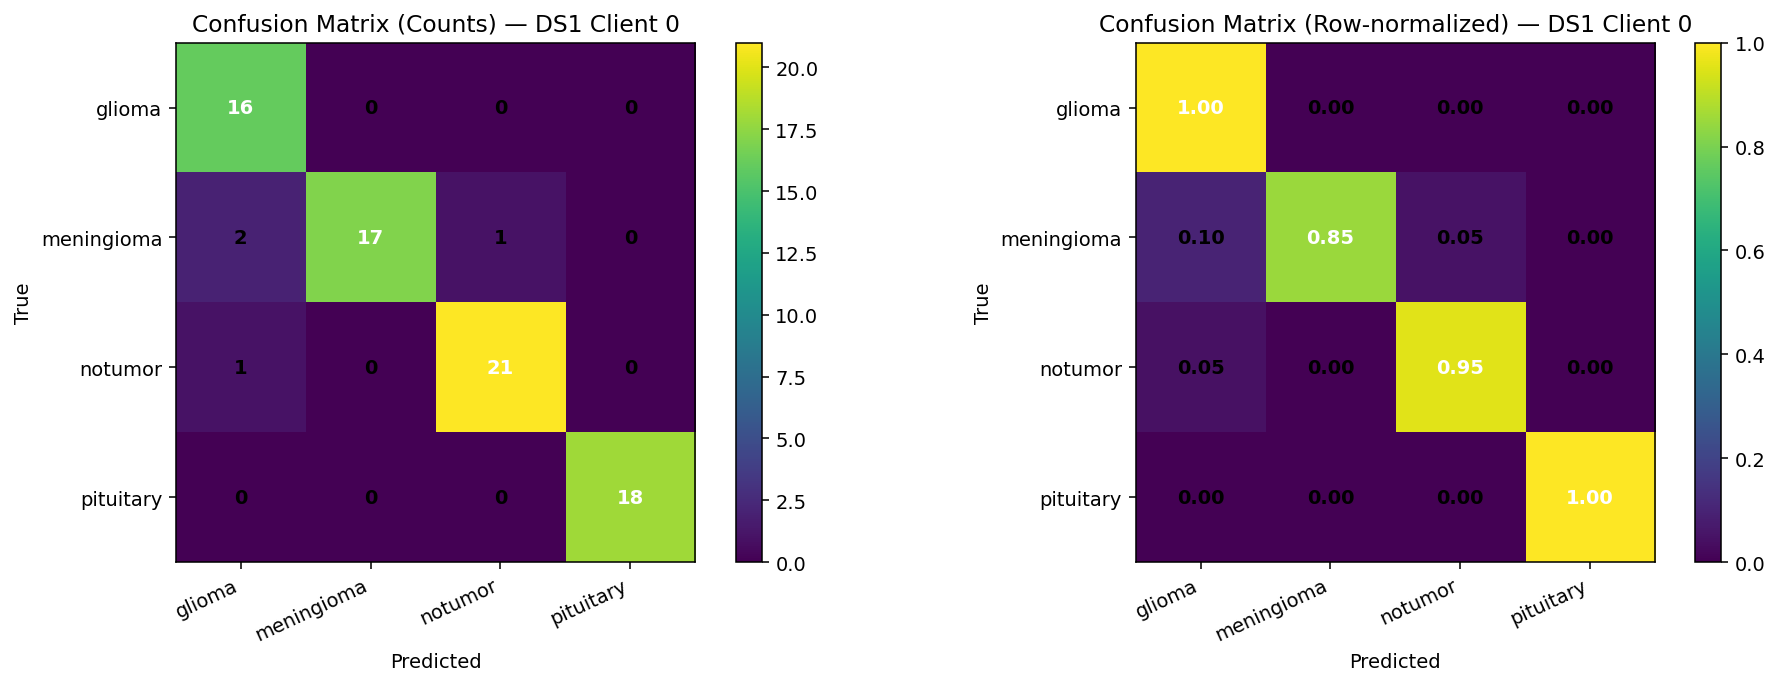

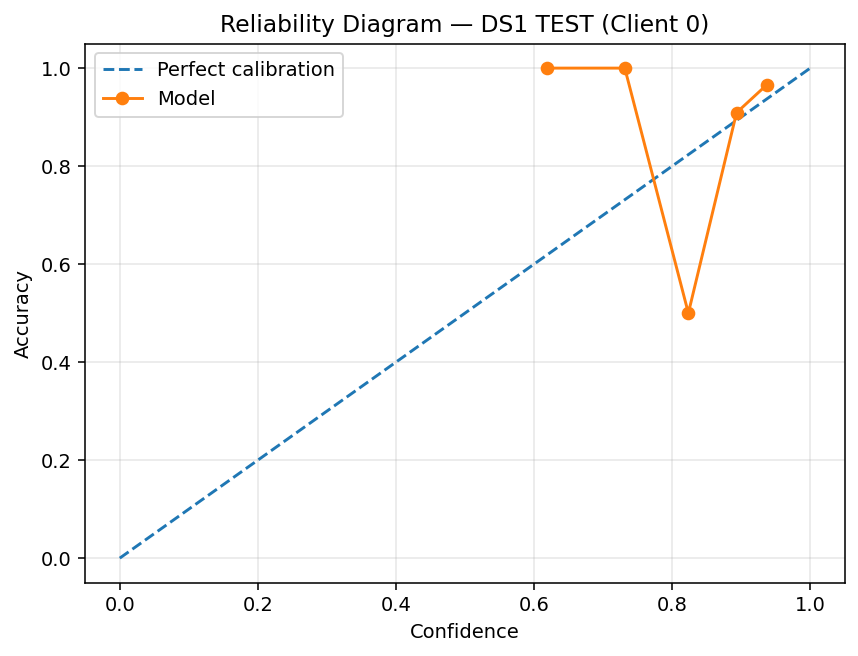


--------------------------------------------------------------------------------------------
Calibration bins table (DS1)
--------------------------------------------------------------------------------------------


bin_confidence  bin_accuracy  bin_count
0              NaN           NaN          0
1              NaN           NaN          0
2              NaN           NaN          0
3              NaN           NaN          0
4              NaN           NaN          0
5              NaN           NaN          0
6              NaN           NaN          0
7         0.618673      1.000000          2
8         0.731397      1.000000          2
9         0.823476      0.500000          2
10        0.893286      0.909091         11
11        0.937188      0.966102         59


STEP 11: UNIQUE PLOTS (RADAR, CLIENT EVOLUTION)


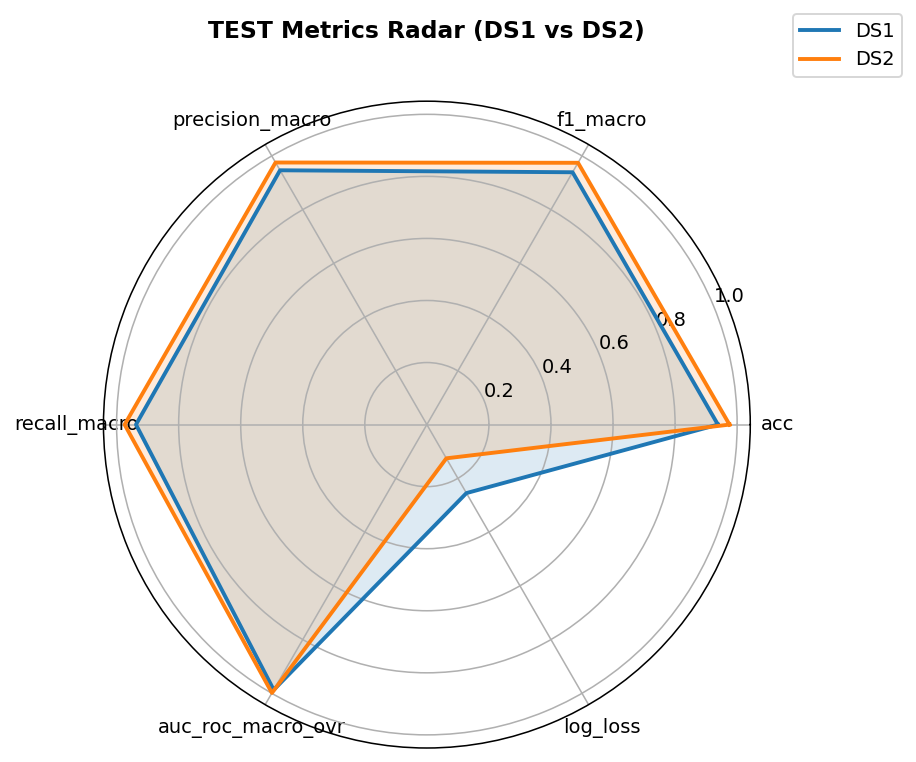

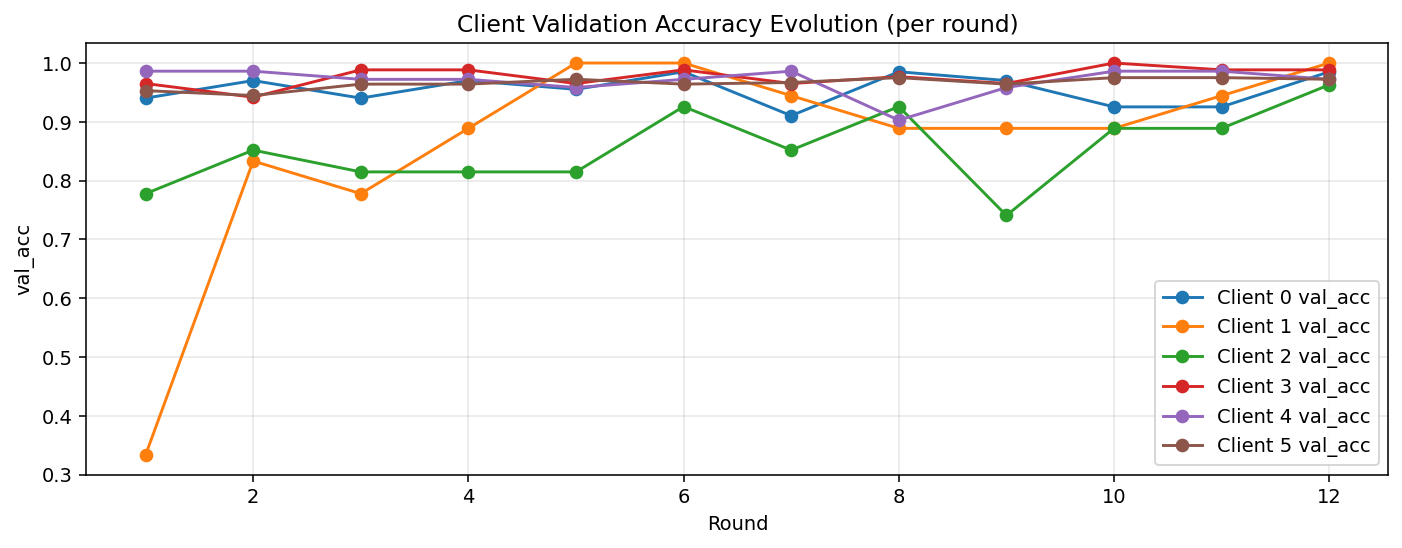


STEP 12: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)
✅ Saved checkpoint: /content/outputs/FL_FUSIONONLY_PVTv2B2_checkpoint.pth
✅ Saved CSV (ALL outputs): /content/outputs/ALL_OUTPUTS_AND_METRICS.csv

DONE ✅ (TRUE FL, 12 rounds, 6 clients, FUSION ONLY; NO preprocess; NO aug)


In [ ]:
# ============================================================
# COLAB FULL SCRIPT (kagglehub download)
# TRUE FL — PVTv2-B2 WITH FEATURE FUSION ONLY
# ✅ Fusion: ON  (multi-level feature fusion head)
# ❌ Aug: OFF
# ❌ Preprocess: OFF
# 6 Clients (3+3), Non-IID Dirichlet split
# Rounds = 12
# EXTRA OUTPUTS:
#  - Leakage/Sanity tables
#  - Client distribution table
#  - Per-round global + per-client metrics tables
#  - ROC + PR Curves (TEST, DS1 one client)
#  - Confusion Matrix (counts + row-normalized) — DS1
#  - Calibration / Reliability diagram — DS1 + bins table
#  - Radar (DS1 vs DS2), Client val_acc evolution
# Saves: checkpoint + one CSV (ALL outputs)
# ============================================================

import os, time, math, random, sys, subprocess, hashlib
from typing import List, Dict, Tuple

import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)

# -------------------------
# Install deps (Colab)
# -------------------------
def pip_install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "-q", "install", pkg])

try:
    import timm
except Exception:
    pip_install("timm")
    import timm

try:
    import kagglehub
except Exception:
    pip_install("kagglehub")
    import kagglehub

from torchvision import transforms

try:
    from IPython.display import display
except Exception:
    display = print

# -------------------------
# Reproducibility + Device
# -------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if DEVICE.type == "cuda":
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
try:
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

plt.rcParams["figure.dpi"] = 140

print("=" * 92)
print("COLAB: TRUE FL — PVTv2-B2 WITH FEATURE FUSION ONLY (NO AUG, NO PREPROCESS)")
print("=" * 92)
print(f"DEVICE: {DEVICE} | torch={torch.__version__}")
print("=" * 92)

# -------------------------
# Configuration
# -------------------------
CFG = {
    # FL: 3 clients per dataset => total 6
    "clients_per_dataset": 3,
    "clients_total": 6,

    "rounds": 12,           # ✅ requested
    "local_epochs": 2,
    "lr": 1e-3,
    "weight_decay": 5e-4,
    "warmup_epochs": 1,
    "label_smoothing": 0.08,
    "grad_clip": 1.0,
    "fedprox_mu": 0.01,

    # image
    "img_size": 224 if torch.cuda.is_available() else 160,
    "batch_size": 20 if torch.cuda.is_available() else 10,
    "num_workers": 2 if torch.cuda.is_available() else 0,

    # split
    "global_val_frac": 0.15,
    "test_frac": 0.15,
    "client_val_frac": 0.12,
    "client_tune_frac": 0.12,
    "min_per_class_per_client": 5,

    # non-iid
    "dirichlet_alpha": 0.35,

    # toggles (must match request)
    "use_preprocessing": False,
    "use_augmentation": False,
    "use_fusion": True,   # ✅ only fusion

    # fusion head
    "fusion_out_indices": (0, 1, 2, 3),
    "fusion_dim": 256,
    "fusion_dropout": 0.15,

    # optional late unfreeze
    "unfreeze_after_round": 3,
    "unfreeze_lr_mult": 0.10,
    "unfreeze_tail_frac": 0.17,

    # misc
    "quick_hash_subset_per_split": 300,
    "make_plots": True,
}

OUTDIR = "/content/outputs"
os.makedirs(OUTDIR, exist_ok=True)
MODEL_PATH = os.path.join(OUTDIR, "FL_FUSIONONLY_PVTv2B2_checkpoint.pth")
CSV_PATH   = os.path.join(OUTDIR, "ALL_OUTPUTS_AND_METRICS.csv")

IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp")

IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=DEVICE).view(1, 3, 1, 1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=DEVICE).view(1, 3, 1, 1)

# ============================================================
# Helper: collect all tables into ONE CSV (long format)
# ============================================================
ALL_ROWS = []
def add_table_to_csv(df, table_name):
    df2 = df.copy()
    df2.insert(0, "table_name", table_name)
    for _, row in df2.iterrows():
        ALL_ROWS.append(row.to_dict())

def print_table(df, title):
    print("\n" + "-" * 92)
    print(title)
    print("-" * 92)
    display(df)

# ============================================================
# STEP 0: DOWNLOAD DATASETS VIA kagglehub
# ============================================================
print("\n" + "=" * 92)
print("STEP 0: DOWNLOAD DATASETS VIA kagglehub")
print("=" * 92)

ds2_path = kagglehub.dataset_download("yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection")
print("✅ DS2 downloaded to:", ds2_path)

ds1_path = kagglehub.dataset_download("orvile/pmram-bangladeshi-brain-cancer-mri-dataset")
print("✅ DS1 downloaded to:", ds1_path)

CFG["ds1_base"] = ds1_path
CFG["ds2_base"] = ds2_path

# ============================================================
# STEP 1: DATASET DISCOVERY (NO CENTRAL MERGE)
# ============================================================
print("\n" + "=" * 92)
print("STEP 1: LOCATE DATASET ROOTS (NO MERGE)")
print("=" * 92)

REQ1 = {"512Glioma", "512Meningioma", "512Normal", "512Pituitary"}
REQ2 = {"glioma", "meningioma", "notumor", "pituitary"}

def norm_label(name: str):
    s = str(name).strip().lower()
    if "glioma" in s: return "glioma"
    if "meningioma" in s: return "meningioma"
    if "pituitary" in s: return "pituitary"
    if "normal" in s or "no_tumor" in s or "no tumor" in s or "notumor" in s: return "notumor"
    return None

def find_root_with_required_class_dirs(base_dir, required_set, prefer_raw=True):
    candidates = []
    for root, dirs, _ in os.walk(base_dir):
        if required_set.issubset(set(dirs)):
            candidates.append(root)
    if not candidates:
        return None

    def score(p):
        pl = p.lower()
        sc = 0
        if prefer_raw:
            if "raw data" in pl: sc += 7
            if os.path.basename(p).lower() == "raw": sc += 7
            if "/raw/" in pl or "\\raw\\" in pl: sc += 3
            if "augmented" in pl: sc -= 20
        sc -= 0.0001 * len(p)
        return sc

    return max(candidates, key=score)

def list_images_under_class_root(class_root, class_dir_name):
    class_dir = os.path.join(class_root, class_dir_name)
    out = []
    for r, _, files in os.walk(class_dir):
        for fn in files:
            if fn.lower().endswith(IMG_EXTS):
                out.append(os.path.join(r, fn))
    return out

def build_df_from_root(ds_root, class_dirs, source_name):
    rows = []
    for c in class_dirs:
        lab = norm_label(c)
        imgs = list_images_under_class_root(ds_root, c)
        print(f"{source_name}: {c} -> {lab} | {len(imgs)} images")
        for p in imgs:
            rows.append({"path": p, "label": lab, "source": source_name})
    dfm = pd.DataFrame(rows).dropna().reset_index(drop=True)
    dfm["path"] = dfm["path"].astype(str)
    dfm["label"] = dfm["label"].astype(str)
    dfm["source"] = dfm["source"].astype(str)
    dfm = dfm.drop_duplicates(subset=["path"]).reset_index(drop=True)
    dfm["filename"] = dfm["path"].apply(lambda x: os.path.basename(x))
    return dfm

DS1_ROOT = find_root_with_required_class_dirs(CFG["ds1_base"], REQ1, prefer_raw=True)
if DS1_ROOT is None:
    raise RuntimeError(f"Could not locate DS1 class root under {CFG['ds1_base']} with dirs {sorted(list(REQ1))}")
print(f"Dataset-1 RAW root detected:\n  {DS1_ROOT}")

DS2_ROOT = find_root_with_required_class_dirs(CFG["ds2_base"], REQ2, prefer_raw=False)
if DS2_ROOT is None:
    raise RuntimeError(f"Could not locate DS2 class root under {CFG['ds2_base']} with dirs {sorted(list(REQ2))}")
print(f"Dataset-2 root detected:\n  {DS2_ROOT}")

print("\n" + "-" * 92)
print("Building Dataset-1 (RAW only)")
df1 = build_df_from_root(DS1_ROOT, ["512Glioma", "512Meningioma", "512Normal", "512Pituitary"], "ds1_raw")
print("Building Dataset-2 (already preprocessed dataset, but we do NO extra preprocess)")
df2 = build_df_from_root(DS2_ROOT, ["glioma", "meningioma", "notumor", "pituitary"], "ds2")

labels = ["glioma", "meningioma", "notumor", "pituitary"]
label2id = {l: i for i, l in enumerate(labels)}
id2label = {i: l for l, i in label2id.items()}
NUM_CLASSES = len(labels)

def enforce_labels(df_):
    df_ = df_.copy()
    df_["label"] = df_["label"].astype(str).str.strip().str.lower()
    df_ = df_[df_["label"].isin(set(labels))].reset_index(drop=True)
    df_["y"] = df_["label"].map(label2id).astype(int)
    return df_

df1 = enforce_labels(df1)
df2 = enforce_labels(df2)

print("\n" + "-" * 92)
print(f"Dataset-1 images: {len(df1)}")
print(df1["label"].value_counts().reindex(labels, fill_value=0))
print(f"Dataset-2 images: {len(df2)}")
print(df2["label"].value_counts().reindex(labels, fill_value=0))
print("-" * 92)

# ============================================================
# STEP 2: Train/Val/Test Split per Dataset (STRATIFIED)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2: TRAIN/VAL/TEST SPLIT (PER DATASET)")
print("=" * 92)

def split_dataset(df_):
    train_df, temp_df = train_test_split(
        df_,
        test_size=(CFG["global_val_frac"] + CFG["test_frac"]),
        stratify=df_["y"],
        random_state=SEED,
    )
    val_rel = CFG["global_val_frac"] / (CFG["global_val_frac"] + CFG["test_frac"])
    val_df, test_df = train_test_split(
        temp_df,
        test_size=(1 - val_rel),
        stratify=temp_df["y"],
        random_state=SEED,
    )
    return train_df.reset_index(drop=True), val_df.reset_index(drop=True), test_df.reset_index(drop=True)

train1, val1, test1 = split_dataset(df1)
train2, val2, test2 = split_dataset(df2)

print(f"DS1 TRAIN: {len(train1)} | VAL: {len(val1)} | TEST: {len(test1)}")
print(f"DS2 TRAIN: {len(train2)} | VAL: {len(val2)} | TEST: {len(test2)}")

# ============================================================
# STEP 2.5: Leakage/Sanity Checks (per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2.5: SANITY / LEAKAGE CHECKS (PER DATASET)")
print("=" * 92)

def split_overlap_checks(train_df, val_df, test_df):
    tr = set(train_df["path"].tolist())
    va = set(val_df["path"].tolist())
    te = set(test_df["path"].tolist())
    checks = {
        "path_overlap_train_val": len(tr.intersection(va)),
        "path_overlap_train_test": len(tr.intersection(te)),
        "path_overlap_val_test": len(va.intersection(te)),
        "unique_paths_train": len(tr),
        "unique_paths_val": len(va),
        "unique_paths_test": len(te),
    }
    trf = set(train_df["filename"].tolist())
    vaf = set(val_df["filename"].tolist())
    tef = set(test_df["filename"].tolist())
    checks.update(
        {
            "filename_overlap_train_val": len(trf.intersection(vaf)),
            "filename_overlap_train_test": len(trf.intersection(tef)),
            "filename_overlap_val_test": len(vaf.intersection(tef)),
        }
    )
    return checks

def md5_file(path, max_bytes=2_000_000):
    h = hashlib.md5()
    try:
        with open(path, "rb") as f:
            h.update(f.read(max_bytes))
        return h.hexdigest()
    except Exception:
        return None

def quick_hash_subset(frame, n=300):
    n = min(n, len(frame))
    if n <= 0:
        return set()
    idx = np.random.choice(len(frame), size=n, replace=False)
    hashes = []
    for i in idx:
        hv = md5_file(frame.iloc[i]["path"])
        if hv is not None:
            hashes.append(hv)
    return set(hashes)

def leakage_report(name, tr, va, te):
    over = split_overlap_checks(tr, va, te)
    leak_df = pd.DataFrame([over])

    n_hash = int(CFG["quick_hash_subset_per_split"])
    trh = quick_hash_subset(tr, n_hash)
    vah = quick_hash_subset(va, n_hash)
    teh = quick_hash_subset(te, n_hash)

    hash_over = {
        "subset_hash_train_val": len(trh.intersection(vah)),
        "subset_hash_train_test": len(trh.intersection(teh)),
        "subset_hash_val_test": len(vah.intersection(teh)),
        "subset_hash_n_train": len(trh),
        "subset_hash_n_val": len(vah),
        "subset_hash_n_test": len(teh),
    }
    leak_df = pd.concat([leak_df, pd.DataFrame([hash_over])], axis=1)
    print_table(leak_df, f"Leakage / Sanity Summary — {name}")
    add_table_to_csv(leak_df, f"leakage_sanity_{name}")

leakage_report("ds1", train1, val1, test1)
leakage_report("ds2", train2, val2, test2)

# ============================================================
# STEP 3: Non-IID Client Partitioning (3 clients per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)")
print("=" * 92)

def make_clients_non_iid(train_df, n_clients, num_classes, min_per_class=5, alpha=0.35):
    y = train_df["y"].values
    idx_by_class = {c: np.where(y == c)[0].tolist() for c in range(num_classes)}
    for c in idx_by_class:
        random.shuffle(idx_by_class[c])

    client_indices = [[] for _ in range(n_clients)]

    # ensure some per-class coverage
    for c in range(num_classes):
        idxs = idx_by_class[c]
        feasible = min(min_per_class, max(1, len(idxs) // n_clients))
        for k in range(n_clients):
            take = idxs[:feasible]
            idxs = idxs[feasible:]
            client_indices[k].extend(take)
        idx_by_class[c] = idxs

    # Dirichlet for remaining
    for c in range(num_classes):
        idxs = idx_by_class[c]
        if len(idxs) == 0:
            continue
        props = np.random.dirichlet([alpha] * n_clients)
        counts = (props * len(idxs)).astype(int)
        diff = len(idxs) - counts.sum()
        counts[np.argmax(props)] += diff

        start = 0
        for k in range(n_clients):
            client_indices[k].extend(idxs[start: start + counts[k]])
            start += counts[k]

    for k in range(n_clients):
        random.shuffle(client_indices[k])
    return client_indices

def robust_client_splits(train_df, indices, val_frac, tune_frac):
    idxs = np.array(indices, dtype=int)
    if len(idxs) < 3:
        return idxs.tolist(), idxs.tolist(), idxs.tolist()

    yk = train_df.loc[idxs, "y"].values
    # Split off tune (not used, but kept for compatibility)
    if len(np.unique(yk)) < 2 or len(idxs) < 20:
        n_tune = max(1, int(round(len(idxs) * tune_frac)))
        n_tune = min(n_tune, max(1, len(idxs) - 2))
        tune_idx = idxs[:n_tune]
        rem_idx = idxs[n_tune:]
    else:
        rem_idx, tune_idx = train_test_split(
            idxs,
            test_size=tune_frac,
            stratify=yk,
            random_state=SEED,
        )

    # Split remaining into train/val
    if len(rem_idx) < 2:
        return rem_idx.tolist(), tune_idx.tolist(), rem_idx.tolist()

    yk2 = train_df.loc[rem_idx, "y"].values
    if len(np.unique(yk2)) < 2 or len(rem_idx) < 12:
        n_val = max(1, int(round(len(rem_idx) * val_frac)))
        n_val = min(n_val, max(1, len(rem_idx) - 1))
        val_idx = rem_idx[:n_val]
        train_idx = rem_idx[n_val:]
    else:
        train_idx, val_idx = train_test_split(
            rem_idx,
            test_size=val_frac,
            stratify=yk2,
            random_state=SEED,
        )

    if len(train_idx) == 0:
        train_idx = val_idx[:]
    if len(val_idx) == 0:
        val_idx = train_idx[:1]
    return train_idx.tolist(), tune_idx.tolist(), val_idx.tolist()

n_per_ds = CFG["clients_per_dataset"]

client_indices_ds1 = make_clients_non_iid(
    train1,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)
client_indices_ds2 = make_clients_non_iid(
    train2,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)

client_splits = []
for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train1, client_indices_ds1[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = k
    client_splits.append(("ds1", k, gid, tr, tune, va))
    print(f"DS1 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train2, client_indices_ds2[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = n_per_ds + k
    client_splits.append(("ds2", k, gid, tr, tune, va))
    print(f"DS2 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

client_test_splits = []
for ds_name, test_df, base_gid in [("ds1", test1, 0), ("ds2", test2, n_per_ds)]:
    idxs = list(range(len(test_df)))
    random.shuffle(idxs)
    split = np.array_split(idxs, n_per_ds)
    for k in range(n_per_ds):
        client_test_splits.append((ds_name, k, base_gid + k, split[k].tolist()))

def client_distribution_table():
    dist_rows = []
    for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
        df_src = train1 if ds_name == "ds1" else train2
        counts = df_src.loc[tr_idx, "label"].value_counts().reindex(labels, fill_value=0)
        row = {
            "client": f"client_{gid}",
            "dataset": ds_name,
            "total_train": len(tr_idx),
            "total_tune": len(tune_idx),
            "total_val": len(val_idx),
        }
        row.update({lab: int(counts[lab]) for lab in labels})
        dist_rows.append(row)
    return pd.DataFrame(dist_rows)

dist_df = client_distribution_table()
print_table(dist_df, "Client class distribution (Non-IID, per dataset)")
add_table_to_csv(dist_df, "client_distribution")

# ============================================================
# STEP 4: Data pipeline (NO AUG) + ImageNet Norm
# ============================================================
print("\n" + "=" * 92)
print("STEP 4: DATA LOADERS (NO AUG) + IMAGENET NORM")
print("=" * 92)

def load_rgb(path):
    try:
        return Image.open(path).convert("RGB")
    except Exception:
        return Image.new("RGB", (CFG["img_size"], CFG["img_size"]), (128, 128, 128))

EVAL_TFMS = transforms.Compose([
    transforms.Resize((CFG["img_size"], CFG["img_size"])),
    transforms.ToTensor(),
])

TRAIN_TFMS = EVAL_TFMS  # ✅ no augmentation

class MRIDataset(Dataset):
    def __init__(self, frame, indices=None, tfms=None):
        self.df = frame
        self.indices = indices if indices is not None else list(range(len(frame)))
        self.tfms = tfms

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, i):
        j = self.indices[i]
        row = self.df.iloc[j]
        img = load_rgb(row["path"])
        x = self.tfms(img) if self.tfms is not None else transforms.ToTensor()(img)
        y = int(row["y"])
        return x, y, row["path"]

def make_weighted_sampler(frame, indices, num_classes):
    if len(indices) == 0:
        return None
    ys = frame.loc[indices, "y"].values
    class_counts = np.bincount(ys, minlength=num_classes)
    class_weights = 1.0 / np.clip(class_counts, 1, None)
    sample_weights = class_weights[ys]
    return WeightedRandomSampler(
        weights=torch.DoubleTensor(sample_weights),
        num_samples=len(sample_weights),
        replacement=True,
    )

def make_loader(frame, indices, bs, tfms, shuffle=False, sampler=None):
    ds = MRIDataset(frame, indices=indices, tfms=tfms)
    return DataLoader(
        ds,
        batch_size=bs,
        shuffle=(shuffle and sampler is None),
        sampler=sampler,
        num_workers=CFG["num_workers"],
        pin_memory=(DEVICE.type == "cuda"),
        drop_last=False,
        persistent_workers=(CFG["num_workers"] > 0),
    )

client_loaders = []
for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
    df_src = train1 if ds_name == "ds1" else train2
    sampler = make_weighted_sampler(df_src, tr_idx, NUM_CLASSES)

    tr_loader = make_loader(df_src, tr_idx, CFG["batch_size"], TRAIN_TFMS,
                            shuffle=(sampler is None), sampler=sampler)

    tune_loader = make_loader(df_src, tune_idx if len(tune_idx) else tr_idx[:max(1, len(tr_idx))],
                              CFG["batch_size"], EVAL_TFMS, shuffle=True)

    val_loader = make_loader(df_src, val_idx if len(val_idx) else tr_idx[:max(1, min(len(tr_idx), CFG["batch_size"]))],
                             CFG["batch_size"], EVAL_TFMS, shuffle=False)

    client_loaders.append((tr_loader, tune_loader, val_loader))

client_test_loaders = []
for (ds_name, local_id, gid, test_idx) in client_test_splits:
    df_src = test1 if ds_name == "ds1" else test2
    t_loader = make_loader(df_src, test_idx, CFG["batch_size"], EVAL_TFMS, shuffle=False)
    client_test_loaders.append((ds_name, local_id, gid, t_loader))

print(f"Fusion: ON ✅ | Augmentation: OFF ✅ | Preprocessing: OFF ✅")

# ============================================================
# STEP 5: MODEL (PVTv2-B2 + MULTI-LEVEL FEATURE FUSION HEAD)
# ============================================================
print("\n" + "=" * 92)
print("STEP 5: MODEL (PVTv2-B2 + FEATURE FUSION HEAD)")
print("=" * 92)

BACKBONE_NAME = "pvt_v2_b2"

class FusionPVT(nn.Module):
    """
    Feature fusion = take multi-stage features from PVTv2 (features_only),
    pool each stage, project to fusion_dim, concat, classify.
    """
    def __init__(self, backbone_name, num_classes, pretrained=True,
                 out_indices=(0,1,2,3), fusion_dim=256, dropout=0.15):
        super().__init__()
        self.out_indices = out_indices
        self.backbone = timm.create_model(
            backbone_name,
            pretrained=pretrained,
            features_only=True,
            out_indices=out_indices,
        )
        chs = self.backbone.feature_info.channels()  # list per stage
        self.proj = nn.ModuleList([nn.Linear(c, fusion_dim) for c in chs])
        self.fusion_norm = nn.LayerNorm(fusion_dim * len(chs))
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(fusion_dim * len(chs), num_classes)

    def forward(self, x):
        feats = self.backbone(x)  # list: [(B,C,H,W), ...]
        pooled = []
        for f, pr in zip(feats, self.proj):
            # global average pool
            v = f.mean(dim=(2,3))          # (B,C)
            v = pr(v)                      # (B,fusion_dim)
            pooled.append(v)
        z = torch.cat(pooled, dim=1)       # (B, fusion_dim * nstages)
        z = self.fusion_norm(z)
        z = self.dropout(z)
        return self.classifier(z)

def create_model(pretrained=True):
    return FusionPVT(
        backbone_name=BACKBONE_NAME,
        num_classes=NUM_CLASSES,
        pretrained=pretrained,
        out_indices=CFG["fusion_out_indices"],
        fusion_dim=CFG["fusion_dim"],
        dropout=CFG["fusion_dropout"],
    )

def count_params(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

def set_trainable_for_round(model, rnd):
    # freeze all by default
    for p in model.parameters():
        p.requires_grad = False

    # always train fusion head
    head_keys = ("proj", "fusion_norm", "classifier", "head", "fc")
    for n, p in model.named_parameters():
        if any(k in n.lower() for k in head_keys):
            p.requires_grad = True

    # optionally unfreeze a tail part of backbone after some rounds
    if rnd >= CFG["unfreeze_after_round"]:
        bb_params = [(n, p) for n, p in model.named_parameters() if "backbone" in n.lower()]
        if bb_params:
            tail_n = max(1, int(len(bb_params) * CFG["unfreeze_tail_frac"]))
            for _, p in bb_params[-tail_n:]:
                p.requires_grad = True

def make_optimizer(model):
    head_params, bb_params = [], []
    head_keys = ("proj", "fusion_norm", "classifier", "head", "fc")
    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue
        if any(k in n.lower() for k in head_keys):
            head_params.append(p)
        else:
            bb_params.append(p)

    groups = []
    if head_params:
        groups.append({"params": head_params, "lr": CFG["lr"]})
    if bb_params:
        groups.append({"params": bb_params, "lr": CFG["lr"] * CFG["unfreeze_lr_mult"]})
    return torch.optim.AdamW(groups, weight_decay=CFG["weight_decay"])

# ============================================================
# STEP 6: TRAIN / EVAL UTILITIES (FULL METRICS)
# ============================================================
print("\n" + "=" * 92)
print("STEP 6: TRAIN / EVAL UTILITIES (FULL METRICS)")
print("=" * 92)

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps):
    def lr_lambda(step):
        if step < num_warmup_steps:
            return float(step) / float(max(1, num_warmup_steps))
        progress = float(step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * progress)))
    return torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

@torch.no_grad()
def _auc_metrics(y_true, p_pred, num_classes):
    out = {}
    try:
        if num_classes == 2:
            out["auc_roc"] = float(roc_auc_score(y_true, p_pred[:, 1]))
        else:
            out["auc_roc_macro_ovr"] = float(roc_auc_score(y_true, p_pred, multi_class="ovr", average="macro"))
            for c in range(num_classes):
                yc = (y_true == c).astype(int)
                if yc.sum() > 0 and yc.sum() < len(yc):
                    out[f"auc_class_{c}"] = float(roc_auc_score(yc, p_pred[:, c]))
    except Exception:
        pass
    return out

@torch.no_grad()
def evaluate_full(model, loader):
    t0 = time.time()
    model.eval()

    all_y, all_p, all_loss = [], [], []
    has_any = False

    for x, y, _ in loader:
        has_any = True
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)

        x_n = (x - IMAGENET_MEAN) / IMAGENET_STD
        logits = model(x_n)

        probs = torch.softmax(logits, dim=1)
        loss = F.cross_entropy(logits, y)

        all_loss.append(float(loss.item()))
        all_y.append(y.cpu().numpy())
        all_p.append(probs.cpu().numpy())

    if not has_any:
        met = {
            "loss_ce": np.nan,
            "acc": np.nan,
            "precision_macro": np.nan,
            "recall_macro": np.nan,
            "f1_macro": np.nan,
            "precision_weighted": np.nan,
            "recall_weighted": np.nan,
            "f1_weighted": np.nan,
            "log_loss": np.nan,
            "eval_time_s": float(time.time() - t0),
        }
        return met, np.array([]), np.array([])

    y_true = np.concatenate(all_y)
    p_pred = np.concatenate(all_p)
    y_hat = np.argmax(p_pred, axis=1)

    met = {
        "loss_ce": float(np.mean(all_loss)),
        "acc": float(accuracy_score(y_true, y_hat)),
        "precision_macro": float(precision_score(y_true, y_hat, average="macro", zero_division=0)),
        "recall_macro": float(recall_score(y_true, y_hat, average="macro", zero_division=0)),
        "f1_macro": float(f1_score(y_true, y_hat, average="macro", zero_division=0)),
        "precision_weighted": float(precision_score(y_true, y_hat, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(y_true, y_hat, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(y_true, y_hat, average="weighted", zero_division=0)),
        "log_loss": float(log_loss(y_true, p_pred, labels=list(range(NUM_CLASSES)))),
        "eval_time_s": float(time.time() - t0),
    }
    met.update(_auc_metrics(y_true, p_pred, NUM_CLASSES))
    return met, y_true, p_pred

def fedprox_term(local_model, global_model):
    loss = 0.0
    for p_local, p_global in zip(local_model.parameters(), global_model.parameters()):
        loss += ((p_local - p_global.detach()) ** 2).sum()
    return loss

def train_one_epoch(model, loader, optimizer, criterion, global_model=None, scheduler=None, scaler=None, grad_clip=1.0):
    model.train()
    losses, correct, total = [], 0, 0
    t0 = time.time()

    for x, y, _ in loader:
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)

        with torch.amp.autocast(device_type=DEVICE.type, enabled=(scaler is not None)):
            x_n = (x - IMAGENET_MEAN) / IMAGENET_STD
            logits = model(x_n)
            loss = criterion(logits, y)
            if global_model is not None and CFG["fedprox_mu"] > 0:
                loss = loss + 0.5 * CFG["fedprox_mu"] * fedprox_term(model, global_model)

        optimizer.zero_grad(set_to_none=True)
        if scaler is not None:
            scaler.scale(loss).backward()
            if grad_clip and grad_clip > 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            if grad_clip and grad_clip > 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            optimizer.step()

        if scheduler is not None:
            scheduler.step()

        losses.append(float(loss.item()))
        preds = logits.argmax(dim=1)
        correct += int((preds == y).sum().item())
        total += int(y.size(0))

    return float(np.mean(losses)), float(correct / max(1, total)), float(time.time() - t0)

def fedavg_update(global_model, local_models, weights, trainable_names):
    gsd = global_model.state_dict()
    new_sd = {}
    for name in trainable_names:
        acc = None
        for m, w in zip(local_models, weights):
            p = m.state_dict()[name].detach().float().cpu()
            acc = (w * p) if acc is None else (acc + w * p)
        new_sd[name] = acc
    for name, t in new_sd.items():
        gsd[name].copy_(t.to(gsd[name].device).type_as(gsd[name]))
    global_model.load_state_dict(gsd)

# ============================================================
# STEP 7: INITIALIZE GLOBAL MODEL + LOSS
# ============================================================
print("\n" + "=" * 92)
print("STEP 7: INITIALIZING GLOBAL MODEL")
print("=" * 92)

global_model = create_model(pretrained=True).to(DEVICE)
set_trainable_for_round(global_model, rnd=1)

total_params, tuned_params = count_params(global_model)
print("\n" + "-" * 92)
print(f"Backbone: {BACKBONE_NAME} | pretrained_loaded=True")
print(f"Total params: {total_params:,} | Trainable params: {tuned_params:,} ({(tuned_params/total_params)*100:.2f}%)")
print("-" * 92)

# Class weights (combined)
counts1 = train1["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts2 = train2["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts = counts1 + counts2
w = (counts.sum() / np.clip(counts, 1, None)).astype(np.float32)
w = w / max(1e-6, w.mean())
class_w = torch.tensor(w, device=DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_w, label_smoothing=CFG["label_smoothing"])
scaler = torch.amp.GradScaler("cuda") if DEVICE.type == "cuda" else None

hp_rows = [{"hp_name": k, "hp_value": str(v)} for k, v in CFG.items()]
hp_rows += [
    {"hp_name": "backbone_name", "hp_value": BACKBONE_NAME},
    {"hp_name": "norm", "hp_value": "ImageNet mean/std"},
    {"hp_name": "fusion_type", "hp_value": "multi-level feature pooling + projection + concat"},
]
hp_df = pd.DataFrame(hp_rows)
print_table(hp_df, "Hyperparameters")
add_table_to_csv(hp_df, "hyperparameters")

# ============================================================
# STEP 8: Federated Training Loop (TRUE FL simulation)
# ============================================================
print("\n" + "=" * 92)
print("STEP 8: FEDERATED TRAINING (FUSION ONLY)")
print("=" * 92)

history_global = []
history_local = []

print(f"Rounds: {CFG['rounds']} | Clients: {CFG['clients_total']} | Local epochs: {CFG['local_epochs']}")
print(f"LR={CFG['lr']} | label_smoothing={CFG['label_smoothing']} | grad_clip={CFG['grad_clip']} | FedProx μ={CFG['fedprox_mu']}")
print(f"Fusion=ON | Aug=OFF | Preproc=OFF | Unfreeze after round={CFG['unfreeze_after_round']}")

best_global_acc = -1.0
best_model_state = None
best_round_saved = None

t_global_start = time.time()

for rnd in range(1, CFG["rounds"] + 1):
    round_t0 = time.time()
    local_models = []
    local_weights = []
    local_rows = []

    print(f"\n{'='*92}")
    print(f"ROUND {rnd}/{CFG['rounds']}")
    print(f"{'='*92}")

    for k in range(CFG["clients_total"]):
        tr_loader, _, val_loader = client_loaders[k]
        ds_name = "ds1" if k < n_per_ds else "ds2"

        # Local model copy
        local_model = create_model(pretrained=False).to(DEVICE)
        local_model.load_state_dict(global_model.state_dict(), strict=True)

        set_trainable_for_round(local_model, rnd=rnd)
        opt = make_optimizer(local_model)

        total_steps = max(1, len(tr_loader) * CFG["local_epochs"])
        warmup_steps = max(1, len(tr_loader) * CFG["warmup_epochs"])
        scheduler = get_cosine_schedule_with_warmup(opt, warmup_steps, total_steps)

        # Train
        tr_losses, tr_accs, tr_time = [], [], 0.0
        for _ in range(CFG["local_epochs"]):
            loss_ep, acc_ep, t_ep = train_one_epoch(
                local_model,
                tr_loader,
                opt,
                criterion,
                global_model=global_model,
                scheduler=scheduler,
                scaler=scaler,
                grad_clip=CFG["grad_clip"],
            )
            tr_losses.append(loss_ep)
            tr_accs.append(acc_ep)
            tr_time += t_ep

        # Client validation
        met_loc, _, _ = evaluate_full(local_model, val_loader)

        local_models.append(local_model)
        local_weights.append(len(tr_loader.dataset))

        row = {
            "round": rnd,
            "client": f"client_{k}",
            "dataset": ds_name,
            "train_loss": float(np.mean(tr_losses)),
            "train_acc": float(np.mean(tr_accs)),
            "train_time_s": float(tr_time),
            **{f"val_{k2}": v2 for k2, v2 in met_loc.items()},
        }
        local_rows.append(row)

        auc_val = row.get("val_auc_roc_macro_ovr", row.get("val_auc_roc", np.nan))
        print(
            f"Client {k} ({ds_name}) | train_acc={row['train_acc']:.4f} | "
            f"val_acc={row['val_acc']:.4f} | val_f1={row['val_f1_macro']:.4f} | "
            f"val_auc={auc_val:.4f} | val_logloss={row['val_log_loss']:.4f} | "
            f"time(train={row['train_time_s']:.1f}s, eval={row['val_eval_time_s']:.1f}s)"
        )

    # FedAvg (only trainable params)
    wsum = sum(local_weights)
    weights = [w / wsum for w in local_weights]
    trainable_names = [n for n, p in local_models[0].named_parameters() if p.requires_grad]
    fedavg_update(global_model, local_models, weights, trainable_names)

    # Federated global val aggregation (weighted by val size)
    local_val_rows = pd.DataFrame(local_rows)
    local_val_rows["val_size"] = [len(client_loaders[i][2].dataset) for i in range(CFG["clients_total"])]
    total_val = local_val_rows["val_size"].sum()

    def weighted_avg(key):
        if total_val == 0:
            return np.nan
        return float(np.average(local_val_rows[key], weights=local_val_rows["val_size"]))

    global_metrics = {
        "acc": weighted_avg("val_acc"),
        "f1_macro": weighted_avg("val_f1_macro"),
        "precision_macro": weighted_avg("val_precision_macro"),
        "recall_macro": weighted_avg("val_recall_macro"),
        "log_loss": weighted_avg("val_log_loss"),
        "loss_ce": weighted_avg("val_loss_ce"),
        "eval_time_s": weighted_avg("val_eval_time_s"),
    }

    history_local.extend(local_rows)
    history_global.append({
        "round": rnd,
        "round_time_s": float(time.time() - round_t0),
        **{f"global_{k2}": v2 for k2, v2 in global_metrics.items()},
    })

    # best by ACC
    if np.isfinite(global_metrics["acc"]) and global_metrics["acc"] > best_global_acc:
        best_global_acc = float(global_metrics["acc"])
        best_model_state = {k: v.detach().cpu().clone() for k, v in global_model.state_dict().items()}
        best_round_saved = rnd

    print("\n" + "-" * 92)
    print(
        f"GLOBAL VAL (Round {rnd}) | acc={global_metrics['acc']:.4f} | f1={global_metrics['f1_macro']:.4f} | "
        f"logloss={global_metrics['log_loss']:.4f} | loss_ce={global_metrics['loss_ce']:.4f} | "
        f"round_time={history_global[-1]['round_time_s']:.1f}s"
    )
    print(f"BEST SO FAR (by ACC) | best_val_acc={best_global_acc:.4f} at round={best_round_saved}")
    print("-" * 92)

# restore best model
if best_model_state is not None:
    global_model.load_state_dict({k: v.to(DEVICE) for k, v in best_model_state.items()})

t_total = float(time.time() - t_global_start)
print("\n" + "=" * 92)
print(f"TRAINING COMPLETE ✅ | total_time={t_total:.1f}s | best_val_acc={best_global_acc:.4f} | best_round={best_round_saved}")
print("=" * 92)

glob_df = pd.DataFrame(history_global)
loc_df = pd.DataFrame(history_local)
print_table(glob_df, "GLOBAL per-round metrics")
print_table(loc_df, "LOCAL per-client per-round metrics")
add_table_to_csv(glob_df, "global_round_metrics_full")
add_table_to_csv(loc_df, "client_round_metrics_full")

# ============================================================
# STEP 9: Final Evaluation (Federated VAL + TEST)
# ============================================================
print("\n" + "=" * 92)
print("STEP 9: FINAL EVALUATION (FEDERATED VAL + TEST)")
print("=" * 92)

def weighted_aggregate(mets):
    if not mets:
        return {}
    total = sum(w for _, _, w in mets)
    if total == 0:
        return {}
    keys = mets[0][1].keys()
    out = {}
    for k in keys:
        vals = [m[1].get(k, np.nan) for m in mets]
        weights = [m[2] for m in mets]
        out[k] = float(np.average(vals, weights=weights))
    return out

# Federated VAL
val_metrics_clients = []
for k in range(CFG["clients_total"]):
    _, _, val_loader = client_loaders[k]
    met, _, _ = evaluate_full(global_model, val_loader)
    val_metrics_clients.append((k, met, len(val_loader.dataset)))
val_best = weighted_aggregate(val_metrics_clients)

# Federated TEST per dataset
def eval_test_per_dataset(ds_name):
    mets = []
    for (ds, local_id, gid, t_loader) in client_test_loaders:
        if ds != ds_name:
            continue
        met, y_true, p_pred = evaluate_full(global_model, t_loader)
        mets.append((met, len(t_loader.dataset), y_true, p_pred, gid))
    if not mets:
        return {}, []
    agg = weighted_aggregate([(i, m[0], m[1]) for i, m in enumerate(mets)])
    return agg, mets

test_ds1, ds1_mets = eval_test_per_dataset("ds1")
test_ds2, ds2_mets = eval_test_per_dataset("ds2")

# Weighted global test (ds1 + ds2)
global_test = weighted_aggregate([
    (0, test_ds1, len(test1)),
    (1, test_ds2, len(test2)),
])

def compact_metrics(m):
    keep = ["acc","precision_macro","recall_macro","f1_macro","precision_weighted","recall_weighted","f1_weighted","log_loss"]
    if "auc_roc_macro_ovr" in m: keep.append("auc_roc_macro_ovr")
    if "auc_roc" in m: keep.append("auc_roc")
    keep += ["loss_ce","eval_time_s"]
    return {k: float(m[k]) for k in keep if k in m}

paper_df = pd.DataFrame([
    {"setting": "PVTv2-B2 FUSION-ONLY", "split": "VAL",  "dataset": "ds1+ds2 weighted", **compact_metrics(val_best)},
    {"setting": "PVTv2-B2 FUSION-ONLY", "split": "TEST", "dataset": "ds1", **compact_metrics(test_ds1)},
    {"setting": "PVTv2-B2 FUSION-ONLY", "split": "TEST", "dataset": "ds2", **compact_metrics(test_ds2)},
    {"setting": "PVTv2-B2 FUSION-ONLY", "split": "TEST", "dataset": "global weighted", **compact_metrics(global_test)},
])
print_table(paper_df, "VAL+TEST tables (federated, per-dataset + global)")
add_table_to_csv(paper_df, "paper_ready_metrics")

print("\nPaper selection summary:")
print(f"- Best round (by federated VAL accuracy): round={best_round_saved} | best_val_acc={best_global_acc:.4f}")

# ============================================================
# STEP 10: Plots (DS1 one test client): ROC/PR, CM, Calibration
# ============================================================
print("\n" + "=" * 92)
print("STEP 10: PLOTS (DS1 TEST — ONE CLIENT)")
print("=" * 92)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        # ROC + PR
        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0 or yc.sum() == len(yc):
                continue
            fpr, tpr, _ = roc_curve(yc, p_test[:, c])
            try:
                auc_c = roc_auc_score(yc, p_test[:, c])
                lbl = f"{labels[c]} (AUC={auc_c:.3f})"
            except Exception:
                lbl = f"{labels[c]}"
            plt.plot(fpr, tpr, label=lbl)
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.title(f"ROC Curves (OvR) — DS1 TEST (Client {gid0})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

        plt.subplot(1, 2, 2)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0:
                continue
            prec, rec, _ = precision_recall_curve(yc, p_test[:, c])
            try:
                ap = average_precision_score(yc, p_test[:, c])
                lbl = f"{labels[c]} (AP={ap:.3f})"
            except Exception:
                lbl = f"{labels[c]}"
            plt.plot(rec, prec, label=lbl)
        plt.title(f"Precision–Recall Curves — DS1 TEST (Client {gid0})")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Confusion matrices
        y_hat_test = np.argmax(p_test, axis=1)
        cm_counts = confusion_matrix(y_true_test, y_hat_test, labels=list(range(NUM_CLASSES)))
        cm_norm = cm_counts / np.clip(cm_counts.sum(axis=1, keepdims=True), 1, None)

        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cm_counts, interpolation="nearest", aspect="equal")
        plt.title(f"Confusion Matrix (Counts) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_counts[i, j]
                plt.text(j, i, str(v), ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > cm_counts.max() / 2 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.subplot(1, 2, 2)
        plt.imshow(cm_norm, interpolation="nearest", vmin=0, vmax=1, aspect="equal")
        plt.title(f"Confusion Matrix (Row-normalized) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_norm[i, j]
                plt.text(j, i, f"{v:.2f}", ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > 0.5 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.tight_layout()
        plt.show()

        # Calibration / reliability
        def multiclass_calibration_curve(y_true, p_pred, n_bins=12):
            conf = np.max(p_pred, axis=1)
            pred = np.argmax(p_pred, axis=1)
            acc = (pred == y_true).astype(np.float32)

            bins = np.linspace(0.0, 1.0, n_bins + 1)
            bin_ids = np.digitize(conf, bins) - 1
            bin_ids = np.clip(bin_ids, 0, n_bins - 1)

            bin_conf, bin_acc, bin_count = [], [], []
            for b in range(n_bins):
                m = bin_ids == b
                if m.sum() == 0:
                    bin_conf.append(np.nan)
                    bin_acc.append(np.nan)
                    bin_count.append(0)
                else:
                    bin_conf.append(conf[m].mean())
                    bin_acc.append(acc[m].mean())
                    bin_count.append(int(m.sum()))
            return np.array(bin_conf), np.array(bin_acc), np.array(bin_count)

        bin_conf, bin_acc, bin_n = multiclass_calibration_curve(y_true_test, p_test, n_bins=12)

        fig = plt.figure(figsize=(7, 5))
        plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect calibration")
        plt.plot(bin_conf, bin_acc, marker="o", label="Model")
        plt.title(f"Reliability Diagram — DS1 TEST (Client {gid0})")
        plt.xlabel("Confidence")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        cal_df = pd.DataFrame({"bin_confidence": bin_conf, "bin_accuracy": bin_acc, "bin_count": bin_n})
        print_table(cal_df, "Calibration bins table (DS1)")
        add_table_to_csv(cal_df, "calibration_bins_ds1")

# ============================================================
# STEP 11: Unique plots (Radar + Client evolution)
# ============================================================
print("\n" + "=" * 92)
print("STEP 11: UNIQUE PLOTS (RADAR, CLIENT EVOLUTION)")
print("=" * 92)

def radar_plot(metrics_a, metrics_b, axes_keys, title):
    vals_a = [metrics_a.get(k, np.nan) for k in axes_keys]
    vals_b = [metrics_b.get(k, np.nan) for k in axes_keys]
    angles = np.linspace(0, 2 * np.pi, len(axes_keys), endpoint=False).tolist()
    vals_a += vals_a[:1]
    vals_b += vals_b[:1]
    angles += angles[:1]

    fig = plt.figure(figsize=(7, 6))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, vals_a, linewidth=2, label="DS1")
    ax.fill(angles, vals_a, alpha=0.15)
    ax.plot(angles, vals_b, linewidth=2, label="DS2")
    ax.fill(angles, vals_b, alpha=0.15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(axes_keys)
    ax.set_title(title, y=1.08, fontweight="bold")
    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.15))
    plt.show()

if CFG["make_plots"]:
    rad_keys = ["acc", "f1_macro", "precision_macro", "recall_macro", "log_loss"]
    if "auc_roc_macro_ovr" in test_ds1:
        rad_keys.insert(4, "auc_roc_macro_ovr")
    elif "auc_roc" in test_ds1:
        rad_keys.insert(4, "auc_roc")

    if test_ds1 and test_ds2:
        radar_plot(compact_metrics(test_ds1), compact_metrics(test_ds2), rad_keys, "TEST Metrics Radar (DS1 vs DS2)")

    # Client validation accuracy evolution
    try:
        fig = plt.figure(figsize=(12, 4))
        for k in range(CFG["clients_total"]):
            sub = loc_df[loc_df["client"] == f"client_{k}"].sort_values("round")
            if len(sub) > 0 and "val_acc" in sub.columns:
                plt.plot(sub["round"], sub["val_acc"], marker="o", label=f"Client {k} val_acc")
        plt.title("Client Validation Accuracy Evolution (per round)")
        plt.xlabel("Round")
        plt.ylabel("val_acc")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()
    except Exception as e:
        print("Client evolution plot skipped due to:", e)

# ============================================================
# STEP 12: SAVE ONLY TWO FILES (checkpoint + one CSV)
# ============================================================
print("\n" + "=" * 92)
print("STEP 12: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)")
print("=" * 92)

checkpoint = {
    "state_dict": {k: v.detach().cpu() for k, v in global_model.state_dict().items()},
    "config": CFG,
    "seed": SEED,
    "device_used": str(DEVICE),
    "dataset1_raw_root": DS1_ROOT,
    "dataset2_root": DS2_ROOT,
    "labels": labels,
    "label2id": label2id,
    "id2label": id2label,
    "num_classes": NUM_CLASSES,
    "backbone_name": BACKBONE_NAME,
    "model_type": "FusionPVT (features_only multi-stage fusion head)",
    "best_round_saved": best_round_saved,
    "best_val_acc": best_global_acc,
    "client_splits": client_splits,
    "client_test_splits": client_test_splits,
    "history_global": glob_df.to_dict(orient="list"),
    "history_local": loc_df.to_dict(orient="list"),
    "final_val_federated": val_best,
    "final_test_ds1": test_ds1,
    "final_test_ds2": test_ds2,
    "final_test_global_weighted": global_test,
    "total_training_time_s": t_total,
}

torch.save(checkpoint, MODEL_PATH)
print(f"✅ Saved checkpoint: {MODEL_PATH}")

all_df = pd.DataFrame(ALL_ROWS)
all_df.to_csv(CSV_PATH, index=False)
print(f"✅ Saved CSV (ALL outputs): {CSV_PATH}")

print("\nDONE ✅ (TRUE FL, 12 rounds, 6 clients, FUSION ONLY; NO preprocess; NO aug)")


## **Only preprocess + no aug and no fusion**

COLAB: TRUE FL — PVTv2-B2 (NO FUSION) WITH PREPROCESS ONLY (NO AUG)
DEVICE: cuda | torch=2.9.0+cu126

STEP 0: DOWNLOAD DATASETS VIA kagglehub
Using Colab cache for faster access to the 'preprocessed-brain-mri-scans-for-tumors-detection' dataset.
✅ DS2 downloaded to: /kaggle/input/preprocessed-brain-mri-scans-for-tumors-detection
Using Colab cache for faster access to the 'pmram-bangladeshi-brain-cancer-mri-dataset' dataset.
✅ DS1 downloaded to: /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset

STEP 1: LOCATE DATASET ROOTS (NO MERGE)
Dataset-1 RAW root detected:
  /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Raw Data/Raw
Dataset-2 root detected:
  /kaggle/input/preprocessed-brain-mri-scans-for-tumors-detection/preprocessed_brain_mri_dataset

--------------------------------------------------------------------------------------------
Building Dataset-1 (RAW only, but we will APPL

path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                1053               226                226   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      5                       5   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     6                  298                222   

   subset_hash_n_test  
0                 224


--------------------------------------------------------------------------------------------
Leakage / Sanity Summary — ds2
--------------------------------------------------------------------------------------------


path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                4921              1055               1055   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      0                       3   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     4                  299                298   

   subset_hash_n_test  
0                 299


STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)
DS1 Client 0 (global id 0): 490 train, 77 tune, 67 val
DS1 Client 1 (global id 1): 125 train, 20 tune, 18 val
DS1 Client 2 (global id 2): 198 train, 31 tune, 27 val
DS2 Client 0 (global id 3): 629 train, 98 tune, 86 val
DS2 Client 1 (global id 4): 527 train, 82 tune, 72 val
DS2 Client 2 (global id 5): 2653 train, 412 tune, 362 val

--------------------------------------------------------------------------------------------
Client class distribution (Non-IID, per dataset)
--------------------------------------------------------------------------------------------


client dataset  total_train  total_tune  total_val  glioma  meningioma  \
0  client_0     ds1          490          77         67     111          46   
1  client_1     ds1          125          20         18      75           4   
2  client_2     ds1          198          31         27      16         147   
3  client_3     ds2          629          98         86      12         197   
4  client_4     ds2          527          82         72     202           4   
5  client_5     ds2         2653         412        362     665         691   

   notumor  pituitary  
0      176        157  
1        8         38  
2       30          5  
3      416          4  
4      284         37  
5      383        914


STEP 4: DATA LOADERS (PREPROCESS ON, NO AUG)
Preprocess: ON ✅ | Augmentation: OFF ✅ | Fusion: OFF ✅

STEP 5: MODEL (PVTv2-B2 BASELINE, NO FUSION)

STEP 6: TRAIN / EVAL UTILITIES (FULL METRICS)

STEP 7: INITIALIZING GLOBAL MODEL

--------------------------------------------------------------------------------------------
Backbone: pvt_v2_b2 | pretrained_loaded=True
Total params: 24,851,908 | Trainable params: 12,477,508 (50.21%)
--------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------
Hyperparameters
--------------------------------------------------------------------------------------------


hp_name  \
0           clients_per_dataset   
1                 clients_total   
2                        rounds   
3                  local_epochs   
4                            lr   
5                  weight_decay   
6                 warmup_epochs   
7               label_smoothing   
8                     grad_clip   
9                    fedprox_mu   
10                     img_size   
11                   batch_size   
12                  num_workers   
13              global_val_frac   
14                    test_frac   
15              client_val_frac   
16             client_tune_frac   
17     min_per_class_per_client   
18              dirichlet_alpha   
19            use_preprocessing   
20             use_augmentation   
21                   use_fusion   
22         unfreeze_after_round   
23             unfreeze_lr_mult   
24           unfreeze_tail_frac   
25  quick_hash_subset_per_split   
26                   make_plots   
27                     ds1_base   
28                     ds2_base   
29                backbone_name   
30                         norm   
31                   preprocess   

                                             hp_value  
0                                                   3  
1                                                   6  
2                                                  12  
3                                                   2  
4                                               0.001  
5                                              0.0005  
6                                                   1  
7                                                0.08  
8                                                 1.0  
9                                                0.01  
10                                                224  
11                                                 20  
12                                                  2  
13                                               0.15  
14                                               0.15  
15                                               0.12  
16                                               0.12  
17                                                  5  
18                                               0.35  
19                                               True  
20                                              False  
21                                              False  
22                                                  3  
23                                                0.1  
24                                               0.17  
25                                                300  
26                                               True  
27  /kaggle/input/pmram-bangladeshi-brain-cancer-m...  
28  /kaggle/input/preprocessed-brain-mri-scans-for...  
29                                          pvt_v2_b2  
30                                  ImageNet mean/std  
31  grayscale+autocontrast+equalize+median+thresho...


STEP 8: FEDERATED TRAINING (PREPROCESS ONLY, NO AUG, NO FUSION)
Rounds: 12 | Clients: 6 | Local epochs: 2
LR=0.001 | label_smoothing=0.08 | grad_clip=1.0 | FedProx μ=0.01
Preprocess=ON | Aug=OFF | Fusion=OFF | Unfreeze after round=3

ROUND 1/12
Client 0 (ds1) | train_acc=0.8092 | val_acc=0.9552 | val_f1=0.9616 | val_auc=0.9967 | val_logloss=0.1966 | time(train=27.0s, eval=3.0s)
Client 1 (ds1) | train_acc=0.5800 | val_acc=0.8889 | val_f1=0.8000 | val_auc=nan | val_logloss=0.3962 | time(train=6.3s, eval=0.7s)
Client 2 (ds1) | train_acc=0.7677 | val_acc=0.8519 | val_f1=0.4468 | val_auc=0.8999 | val_logloss=0.4504 | time(train=11.4s, eval=0.9s)
Client 3 (ds2) | train_acc=0.8601 | val_acc=0.9419 | val_f1=0.4729 | val_auc=0.9816 | val_logloss=0.2012 | time(train=14.0s, eval=0.9s)
Client 4 (ds2) | train_acc=0.8643 | val_acc=0.9861 | val_f1=0.9571 | val_auc=nan | val_logloss=0.0918 | time(train=11.8s, eval=0.8s)
Client 5 (ds2) | train_acc=0.8553 | val_acc=0.9558 | val_f1=0.9590 | val_auc=0.99

round  round_time_s  global_acc  global_f1_macro  global_precision_macro  \
0       1    142.799537    0.950949         0.866483                0.872284   
1       2    162.418197    0.952532         0.852390                0.858795   
2       3    139.195522    0.950949         0.851906                0.856964   
3       4    139.905834    0.960443         0.891060                0.898421   
4       5    141.121597    0.968354         0.932700                0.937930   
5       6    140.816454    0.966772         0.952855                0.957712   
6       7    141.093588    0.966772         0.900269                0.904148   
7       8    138.458024    0.966772         0.960292                0.959304   
8       9    141.427198    0.973101         0.935782                0.939881   
9      10    139.689197    0.969937         0.933251                0.933521   
10     11    140.313764    0.968354         0.959521                0.959145   
11     12    141.051630    0.968354         0.934758                0.938224   

    global_recall_macro  global_log_loss  global_loss_ce  global_eval_time_s  
0              0.866364         0.204778        0.205504            2.725965  
1              0.849284         0.184193        0.187099            2.633947  
2              0.848899         0.196266        0.199280            2.807997  
3              0.886662         0.171862        0.182231            2.247260  
4              0.930515         0.159023        0.171898            2.146629  
5              0.952450         0.160284        0.155471            2.771228  
6              0.901608         0.151539        0.167533            2.150530  
7              0.965610         0.152355        0.146547            2.132180  
8              0.936908         0.137138        0.142096            2.146930  
9              0.935484         0.147792        0.147163            2.749716  
10             0.968853         0.157452        0.164677            2.173817  
11             0.934905         0.140488        0.140343            2.134202


--------------------------------------------------------------------------------------------
LOCAL per-client per-round metrics
--------------------------------------------------------------------------------------------


round    client dataset  train_loss  train_acc  train_time_s  val_loss_ce  \
0       1  client_0     ds1    0.893061   0.809184     26.956878     0.197745   
1       1  client_1     ds1    1.119113   0.580000      6.259795     0.396249   
2       1  client_2     ds1    0.882233   0.767677     11.390297     0.347310   
3       1  client_3     ds2    0.776930   0.860095     14.037380     0.255958   
4       1  client_4     ds2    0.760816   0.864326     11.831316     0.088034   
..    ...       ...     ...         ...        ...           ...          ...   
67     12  client_1     ds1    0.407053   0.972000      7.726765     0.329222   
68     12  client_2     ds1    0.318009   0.994949     10.784105     0.220840   
69     12  client_3     ds2    0.329603   0.995231     14.125108     0.140321   
70     12  client_4     ds2    0.298629   1.000000     12.260559     0.090917   
71     12  client_5     ds2    0.627764   0.970788     57.877272     0.125112   

     val_acc  val_precision_macro  val_recall_macro  ...  \
0   0.955224             0.972222          0.955303  ...   
1   0.888889             0.777778          0.939394  ...   
2   0.851852             0.467391          0.437500  ...   
3   0.941860             0.468770          0.477096  ...   
4   0.986111             0.988506          0.933333  ...   
..       ...                  ...               ...  ...   
67  0.944444             0.952381          0.969697  ...   
68  0.925926             0.977273          0.812500  ...   
69  0.965116             0.737500          0.731481  ...   
70  0.986111             0.991667          0.988095  ...   
71  0.972376             0.973726          0.975120  ...   

    val_precision_weighted  val_recall_weighted  val_f1_weighted  \
0                 0.960199             0.955224         0.955301   
1                 0.962963             0.888889         0.911111   
2                 0.792271             0.851852         0.816045   
3                 0.919787             0.941860         0.930634   
4                 0.986590             0.986111         0.985461   
..                     ...                  ...              ...   
67                0.952381             0.944444         0.945258   
68                0.932660             0.925926         0.918871   
69                0.955233             0.965116         0.959302   
70                0.986458             0.986111         0.986073   
71                0.972365             0.972376         0.972338   

    val_log_loss  val_eval_time_s  val_auc_roc_macro_ovr  val_auc_class_0  \
0       0.196624         3.018550               0.996709         0.989744   
1       0.396249         0.729487                    NaN              NaN   
2       0.450439         0.889871               0.899922         0.700000   
3       0.201173         0.942930               0.981568         0.988235   
4       0.091768         0.832213                    NaN              NaN   
..           ...              ...                    ...              ...   
67      0.329222         0.565016                    NaN              NaN   
68      0.201715         1.112580               1.000000         1.000000   
69      0.150078         0.819227               0.999075         1.000000   
70      0.090256         0.680951                    NaN              NaN   
71      0.127947         2.986628               0.998955         0.999270   

    val_auc_class_1  val_auc_class_2  val_auc_class_3  
0          1.000000         0.997093         1.000000  
1               NaN              NaN              NaN  
2          0.921429         0.978261         1.000000  
3          0.989328         0.995765         0.952941  
4               NaN              NaN              NaN  
..              ...              ...              ...  
67              NaN              NaN              NaN  
68         1.000000         1.000000         1.000000  
69         0.998117         0.998185         1.000000  
70      


STEP 9: FINAL EVALUATION (FEDERATED VAL + TEST)

--------------------------------------------------------------------------------------------
VAL+TEST tables (federated, per-dataset + global)
--------------------------------------------------------------------------------------------


setting split           dataset       acc  \
0  PVTv2-B2 PREPROCESS-ONLY   VAL  ds1+ds2 weighted  0.973101   
1  PVTv2-B2 PREPROCESS-ONLY  TEST               ds1  0.960177   
2  PVTv2-B2 PREPROCESS-ONLY  TEST               ds2  0.977251   
3  PVTv2-B2 PREPROCESS-ONLY  TEST   global weighted  0.974239   

   precision_macro  recall_macro  f1_macro  precision_weighted  \
0         0.950006      0.974903  0.958235            0.975689   
1         0.959981      0.958399  0.958498            0.961451   
2         0.975930      0.976297  0.975715            0.977780   
3         0.973116      0.973139  0.972677            0.974899   

   recall_weighted  f1_weighted  log_loss  auc_roc_macro_ovr   loss_ce  \
0         0.973101     0.973668  0.126934                NaN  0.124949   
1         0.960177     0.960135  0.173812           0.998335  0.170862   
2         0.977251     0.977170  0.128101           0.997643  0.126640   
3         0.974239     0.974165  0.136166           0.997765  0.134441   

   eval_time_s  
0     2.299026  
1     1.941719  
2     3.421325  
3     3.160286


Paper selection summary:
- Best round (by federated VAL accuracy): round=9 | best_val_acc=0.9731

STEP 10: PLOTS (DS1 TEST — ONE CLIENT)


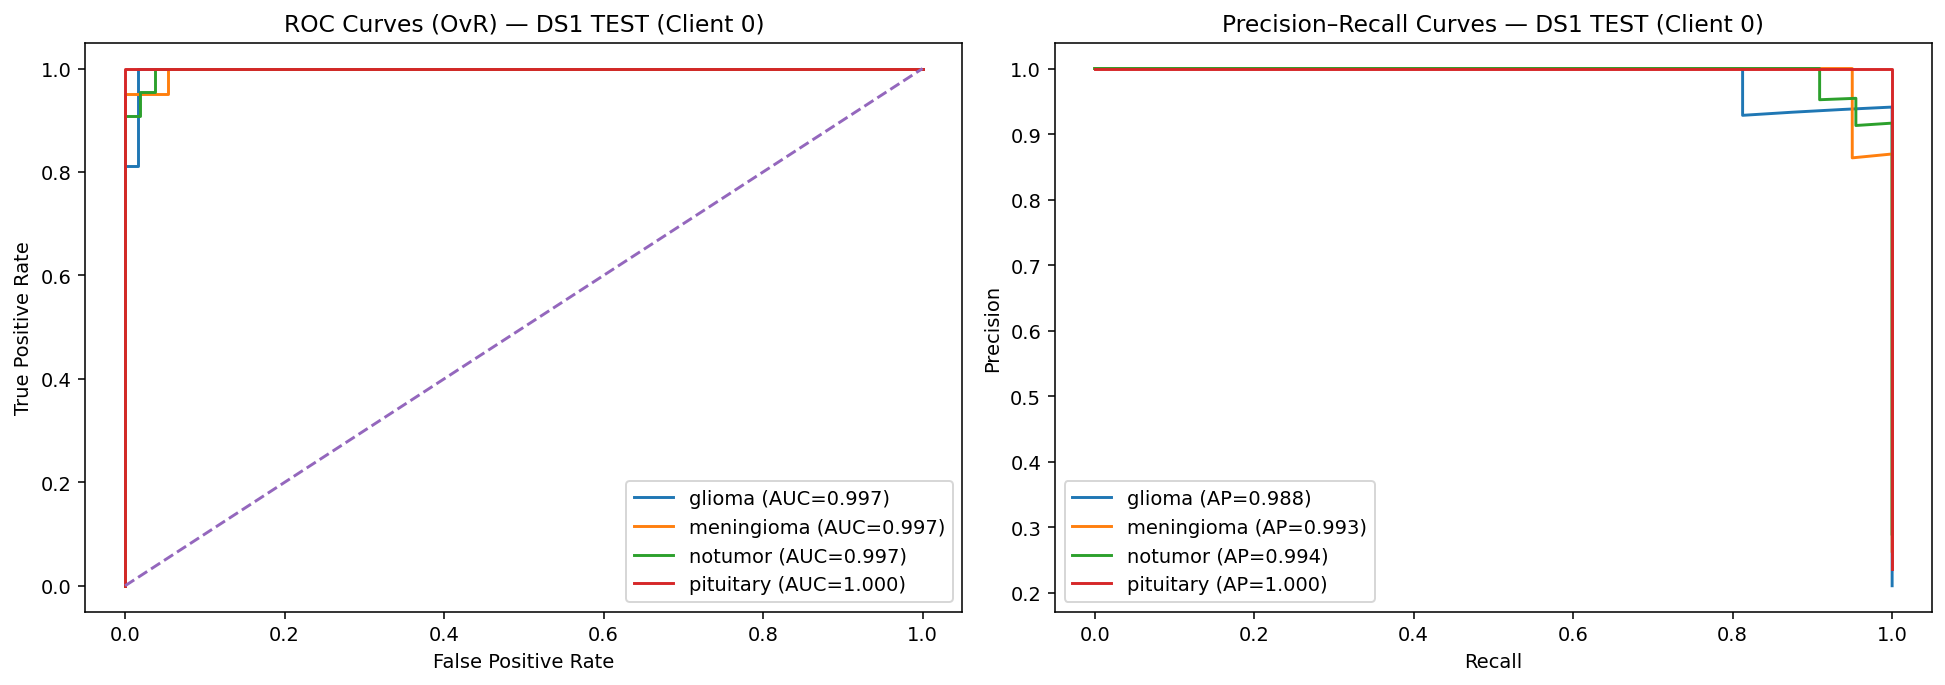

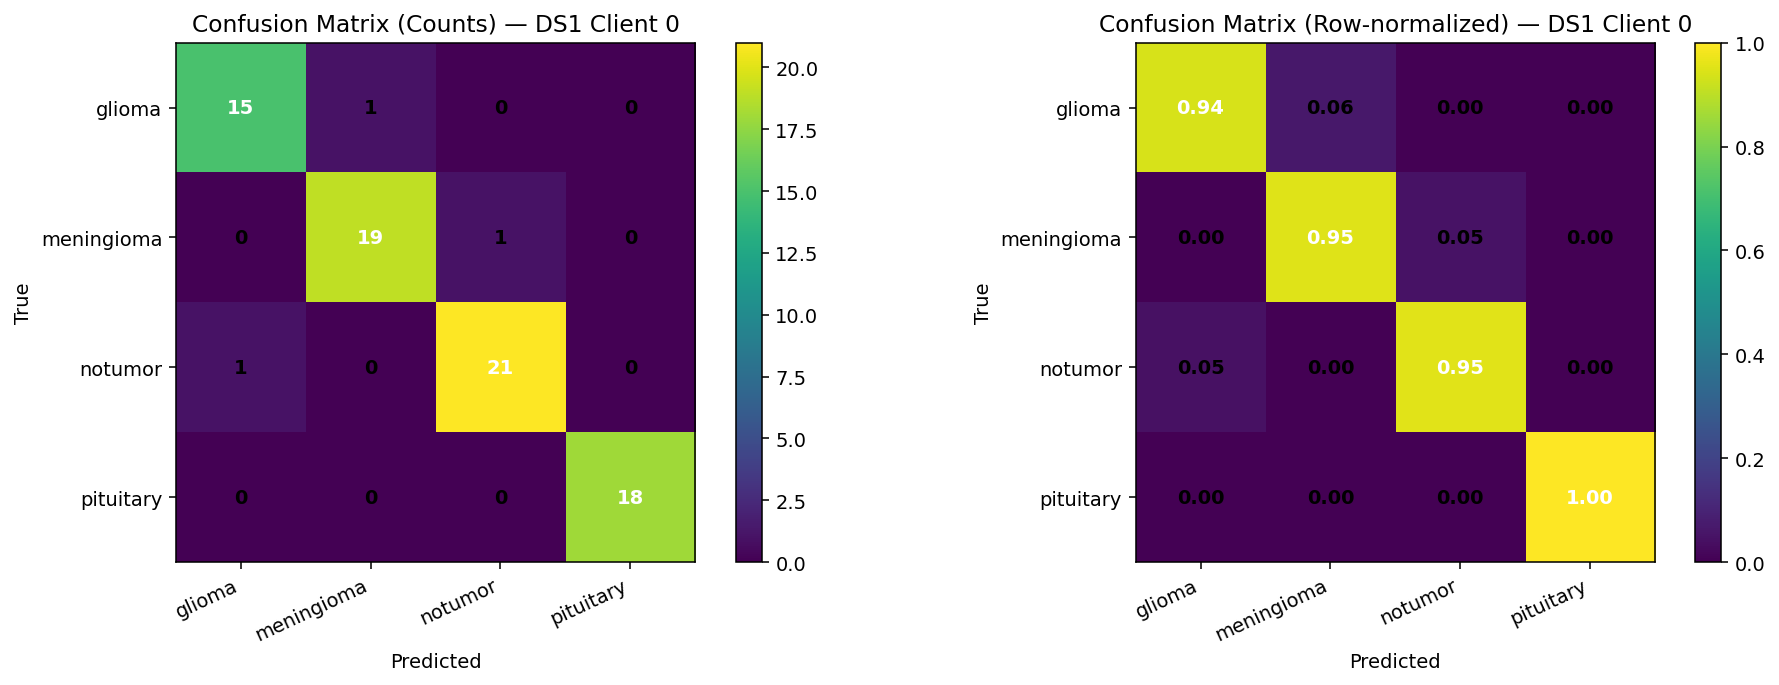

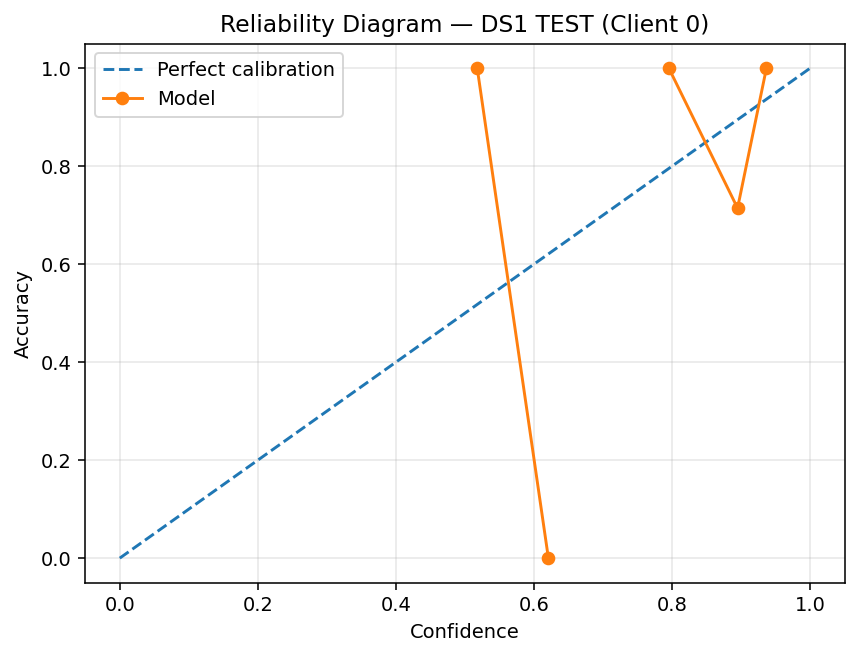


--------------------------------------------------------------------------------------------
Calibration bins table (DS1)
--------------------------------------------------------------------------------------------


bin_confidence  bin_accuracy  bin_count
0              NaN           NaN          0
1              NaN           NaN          0
2              NaN           NaN          0
3              NaN           NaN          0
4              NaN           NaN          0
5              NaN           NaN          0
6         0.517682      1.000000          1
7         0.620753      0.000000          1
8              NaN           NaN          0
9         0.795172      1.000000          2
10        0.894737      0.714286          7
11        0.936565      1.000000         65


STEP 11: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)
✅ Saved checkpoint: /content/outputs/FL_PREPROCESSONLY_PVTv2B2_checkpoint.pth
✅ Saved CSV (ALL outputs): /content/outputs/ALL_OUTPUTS_AND_METRICS.csv

DONE ✅ (TRUE FL, 12 rounds, 6 clients, PREPROCESS ONLY; NO aug; NO fusion)


In [ ]:
# ============================================================
# COLAB FULL SCRIPT (kagglehub download)
# TRUE FL — PVTv2-B2 (NO FUSION) WITH PREPROCESS ONLY
# ✅ Preprocess: ON  (crop brain region + contrast/denoise)
# ❌ Aug: OFF
# ❌ Fusion: OFF
# 6 Clients (3+3), Non-IID Dirichlet split
# Rounds = 12
# EXTRA OUTPUTS:
#  - Leakage/Sanity tables
#  - Client distribution table
#  - Per-round global + per-client metrics tables
#  - ROC + PR Curves (TEST, DS1 one client)
#  - Confusion Matrix (counts + row-normalized) — DS1
#  - Calibration / Reliability diagram — DS1 + bins table
# Saves: checkpoint + one CSV (ALL outputs)
# ============================================================

import os, time, math, random, sys, subprocess, hashlib
from typing import List, Dict, Tuple

import numpy as np
import pandas as pd
from PIL import Image, ImageOps, ImageFilter

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)

# -------------------------
# Install deps (Colab)
# -------------------------
def pip_install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "-q", "install", pkg])

try:
    import timm
except Exception:
    pip_install("timm")
    import timm

try:
    import kagglehub
except Exception:
    pip_install("kagglehub")
    import kagglehub

from torchvision import transforms

try:
    from IPython.display import display
except Exception:
    display = print

# -------------------------
# Reproducibility + Device
# -------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if DEVICE.type == "cuda":
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
try:
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

plt.rcParams["figure.dpi"] = 140

print("=" * 92)
print("COLAB: TRUE FL — PVTv2-B2 (NO FUSION) WITH PREPROCESS ONLY (NO AUG)")
print("=" * 92)
print(f"DEVICE: {DEVICE} | torch={torch.__version__}")
print("=" * 92)

# -------------------------
# Configuration
# -------------------------
CFG = {
    # FL: 3 clients per dataset => total 6
    "clients_per_dataset": 3,
    "clients_total": 6,

    "rounds": 12,           # ✅ requested
    "local_epochs": 2,
    "lr": 1e-3,
    "weight_decay": 5e-4,
    "warmup_epochs": 1,
    "label_smoothing": 0.08,
    "grad_clip": 1.0,
    "fedprox_mu": 0.01,

    # image
    "img_size": 224 if torch.cuda.is_available() else 160,
    "batch_size": 20 if torch.cuda.is_available() else 10,
    "num_workers": 2 if torch.cuda.is_available() else 0,

    # split
    "global_val_frac": 0.15,
    "test_frac": 0.15,
    "client_val_frac": 0.12,
    "client_tune_frac": 0.12,
    "min_per_class_per_client": 5,

    # non-iid
    "dirichlet_alpha": 0.35,

    # toggles (must match request)
    "use_preprocessing": True,   # ✅ preprocess ON
    "use_augmentation": False,   # ❌ no aug
    "use_fusion": False,         # ❌ no fusion

    # optional late unfreeze
    "unfreeze_after_round": 3,
    "unfreeze_lr_mult": 0.10,
    "unfreeze_tail_frac": 0.17,

    # misc
    "quick_hash_subset_per_split": 300,
    "make_plots": True,
}

OUTDIR = "/content/outputs"
os.makedirs(OUTDIR, exist_ok=True)
MODEL_PATH = os.path.join(OUTDIR, "FL_PREPROCESSONLY_PVTv2B2_checkpoint.pth")
CSV_PATH   = os.path.join(OUTDIR, "ALL_OUTPUTS_AND_METRICS.csv")

IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp")

IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=DEVICE).view(1, 3, 1, 1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=DEVICE).view(1, 3, 1, 1)

# ============================================================
# Helper: collect all tables into ONE CSV (long format)
# ============================================================
ALL_ROWS = []
def add_table_to_csv(df, table_name):
    df2 = df.copy()
    df2.insert(0, "table_name", table_name)
    for _, row in df2.iterrows():
        ALL_ROWS.append(row.to_dict())

def print_table(df, title):
    print("\n" + "-" * 92)
    print(title)
    print("-" * 92)
    display(df)

# ============================================================
# STEP 0: DOWNLOAD DATASETS VIA kagglehub
# ============================================================
print("\n" + "=" * 92)
print("STEP 0: DOWNLOAD DATASETS VIA kagglehub")
print("=" * 92)

ds2_path = kagglehub.dataset_download("yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection")
print("✅ DS2 downloaded to:", ds2_path)

ds1_path = kagglehub.dataset_download("orvile/pmram-bangladeshi-brain-cancer-mri-dataset")
print("✅ DS1 downloaded to:", ds1_path)

CFG["ds1_base"] = ds1_path
CFG["ds2_base"] = ds2_path

# ============================================================
# STEP 1: DATASET DISCOVERY (NO CENTRAL MERGE)
# ============================================================
print("\n" + "=" * 92)
print("STEP 1: LOCATE DATASET ROOTS (NO MERGE)")
print("=" * 92)

REQ1 = {"512Glioma", "512Meningioma", "512Normal", "512Pituitary"}
REQ2 = {"glioma", "meningioma", "notumor", "pituitary"}

def norm_label(name: str):
    s = str(name).strip().lower()
    if "glioma" in s: return "glioma"
    if "meningioma" in s: return "meningioma"
    if "pituitary" in s: return "pituitary"
    if "normal" in s or "no_tumor" in s or "no tumor" in s or "notumor" in s: return "notumor"
    return None

def find_root_with_required_class_dirs(base_dir, required_set, prefer_raw=True):
    candidates = []
    for root, dirs, _ in os.walk(base_dir):
        if required_set.issubset(set(dirs)):
            candidates.append(root)
    if not candidates:
        return None

    def score(p):
        pl = p.lower()
        sc = 0
        if prefer_raw:
            if "raw data" in pl: sc += 7
            if os.path.basename(p).lower() == "raw": sc += 7
            if "/raw/" in pl or "\\raw\\" in pl: sc += 3
            if "augmented" in pl: sc -= 20
        sc -= 0.0001 * len(p)
        return sc

    return max(candidates, key=score)

def list_images_under_class_root(class_root, class_dir_name):
    class_dir = os.path.join(class_root, class_dir_name)
    out = []
    for r, _, files in os.walk(class_dir):
        for fn in files:
            if fn.lower().endswith(IMG_EXTS):
                out.append(os.path.join(r, fn))
    return out

def build_df_from_root(ds_root, class_dirs, source_name):
    rows = []
    for c in class_dirs:
        lab = norm_label(c)
        imgs = list_images_under_class_root(ds_root, c)
        print(f"{source_name}: {c} -> {lab} | {len(imgs)} images")
        for p in imgs:
            rows.append({"path": p, "label": lab, "source": source_name})
    dfm = pd.DataFrame(rows).dropna().reset_index(drop=True)
    dfm["path"] = dfm["path"].astype(str)
    dfm["label"] = dfm["label"].astype(str)
    dfm["source"] = dfm["source"].astype(str)
    dfm = dfm.drop_duplicates(subset=["path"]).reset_index(drop=True)
    dfm["filename"] = dfm["path"].apply(lambda x: os.path.basename(x))
    return dfm

DS1_ROOT = find_root_with_required_class_dirs(CFG["ds1_base"], REQ1, prefer_raw=True)
if DS1_ROOT is None:
    raise RuntimeError(f"Could not locate DS1 class root under {CFG['ds1_base']} with dirs {sorted(list(REQ1))}")
print(f"Dataset-1 RAW root detected:\n  {DS1_ROOT}")

DS2_ROOT = find_root_with_required_class_dirs(CFG["ds2_base"], REQ2, prefer_raw=False)
if DS2_ROOT is None:
    raise RuntimeError(f"Could not locate DS2 class root under {CFG['ds2_base']} with dirs {sorted(list(REQ2))}")
print(f"Dataset-2 root detected:\n  {DS2_ROOT}")

print("\n" + "-" * 92)
print("Building Dataset-1 (RAW only, but we will APPLY our own preprocess in loader)")
df1 = build_df_from_root(DS1_ROOT, ["512Glioma", "512Meningioma", "512Normal", "512Pituitary"], "ds1_raw")
print("Building Dataset-2 (already preprocessed dataset, but we still APPLY same preprocess for consistency)")
df2 = build_df_from_root(DS2_ROOT, ["glioma", "meningioma", "notumor", "pituitary"], "ds2")

labels = ["glioma", "meningioma", "notumor", "pituitary"]
label2id = {l: i for i, l in enumerate(labels)}
id2label = {i: l for l, i in label2id.items()}
NUM_CLASSES = len(labels)

def enforce_labels(df_):
    df_ = df_.copy()
    df_["label"] = df_["label"].astype(str).str.strip().str.lower()
    df_ = df_[df_["label"].isin(set(labels))].reset_index(drop=True)
    df_["y"] = df_["label"].map(label2id).astype(int)
    return df_

df1 = enforce_labels(df1)
df2 = enforce_labels(df2)

print("\n" + "-" * 92)
print(f"Dataset-1 images: {len(df1)}")
print(df1["label"].value_counts().reindex(labels, fill_value=0))
print(f"Dataset-2 images: {len(df2)}")
print(df2["label"].value_counts().reindex(labels, fill_value=0))
print("-" * 92)

# ============================================================
# STEP 2: Train/Val/Test Split per Dataset (STRATIFIED)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2: TRAIN/VAL/TEST SPLIT (PER DATASET)")
print("=" * 92)

def split_dataset(df_):
    train_df, temp_df = train_test_split(
        df_,
        test_size=(CFG["global_val_frac"] + CFG["test_frac"]),
        stratify=df_["y"],
        random_state=SEED,
    )
    val_rel = CFG["global_val_frac"] / (CFG["global_val_frac"] + CFG["test_frac"])
    val_df, test_df = train_test_split(
        temp_df,
        test_size=(1 - val_rel),
        stratify=temp_df["y"],
        random_state=SEED,
    )
    return train_df.reset_index(drop=True), val_df.reset_index(drop=True), test_df.reset_index(drop=True)

train1, val1, test1 = split_dataset(df1)
train2, val2, test2 = split_dataset(df2)

print(f"DS1 TRAIN: {len(train1)} | VAL: {len(val1)} | TEST: {len(test1)}")
print(f"DS2 TRAIN: {len(train2)} | VAL: {len(val2)} | TEST: {len(test2)}")

# ============================================================
# STEP 2.5: Leakage/Sanity Checks (per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2.5: SANITY / LEAKAGE CHECKS (PER DATASET)")
print("=" * 92)

def split_overlap_checks(train_df, val_df, test_df):
    tr = set(train_df["path"].tolist())
    va = set(val_df["path"].tolist())
    te = set(test_df["path"].tolist())
    checks = {
        "path_overlap_train_val": len(tr.intersection(va)),
        "path_overlap_train_test": len(tr.intersection(te)),
        "path_overlap_val_test": len(va.intersection(te)),
        "unique_paths_train": len(tr),
        "unique_paths_val": len(va),
        "unique_paths_test": len(te),
    }
    trf = set(train_df["filename"].tolist())
    vaf = set(val_df["filename"].tolist())
    tef = set(test_df["filename"].tolist())
    checks.update(
        {
            "filename_overlap_train_val": len(trf.intersection(vaf)),
            "filename_overlap_train_test": len(trf.intersection(tef)),
            "filename_overlap_val_test": len(vaf.intersection(tef)),
        }
    )
    return checks

def md5_file(path, max_bytes=2_000_000):
    h = hashlib.md5()
    try:
        with open(path, "rb") as f:
            h.update(f.read(max_bytes))
        return h.hexdigest()
    except Exception:
        return None

def quick_hash_subset(frame, n=300):
    n = min(n, len(frame))
    if n <= 0:
        return set()
    idx = np.random.choice(len(frame), size=n, replace=False)
    hashes = []
    for i in idx:
        hv = md5_file(frame.iloc[i]["path"])
        if hv is not None:
            hashes.append(hv)
    return set(hashes)

def leakage_report(name, tr, va, te):
    over = split_overlap_checks(tr, va, te)
    leak_df = pd.DataFrame([over])

    n_hash = int(CFG["quick_hash_subset_per_split"])
    trh = quick_hash_subset(tr, n_hash)
    vah = quick_hash_subset(va, n_hash)
    teh = quick_hash_subset(te, n_hash)

    hash_over = {
        "subset_hash_train_val": len(trh.intersection(vah)),
        "subset_hash_train_test": len(trh.intersection(teh)),
        "subset_hash_val_test": len(vah.intersection(teh)),
        "subset_hash_n_train": len(trh),
        "subset_hash_n_val": len(vah),
        "subset_hash_n_test": len(teh),
    }
    leak_df = pd.concat([leak_df, pd.DataFrame([hash_over])], axis=1)
    print_table(leak_df, f"Leakage / Sanity Summary — {name}")
    add_table_to_csv(leak_df, f"leakage_sanity_{name}")

leakage_report("ds1", train1, val1, test1)
leakage_report("ds2", train2, val2, test2)

# ============================================================
# STEP 3: Non-IID Client Partitioning (3 clients per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)")
print("=" * 92)

def make_clients_non_iid(train_df, n_clients, num_classes, min_per_class=5, alpha=0.35):
    y = train_df["y"].values
    idx_by_class = {c: np.where(y == c)[0].tolist() for c in range(num_classes)}
    for c in idx_by_class:
        random.shuffle(idx_by_class[c])

    client_indices = [[] for _ in range(n_clients)]

    # ensure some per-class coverage
    for c in range(num_classes):
        idxs = idx_by_class[c]
        feasible = min(min_per_class, max(1, len(idxs) // n_clients))
        for k in range(n_clients):
            take = idxs[:feasible]
            idxs = idxs[feasible:]
            client_indices[k].extend(take)
        idx_by_class[c] = idxs

    # Dirichlet for remaining
    for c in range(num_classes):
        idxs = idx_by_class[c]
        if len(idxs) == 0:
            continue
        props = np.random.dirichlet([alpha] * n_clients)
        counts = (props * len(idxs)).astype(int)
        diff = len(idxs) - counts.sum()
        counts[np.argmax(props)] += diff

        start = 0
        for k in range(n_clients):
            client_indices[k].extend(idxs[start: start + counts[k]])
            start += counts[k]

    for k in range(n_clients):
        random.shuffle(client_indices[k])
    return client_indices

def robust_client_splits(train_df, indices, val_frac, tune_frac):
    idxs = np.array(indices, dtype=int)
    if len(idxs) < 3:
        return idxs.tolist(), idxs.tolist(), idxs.tolist()

    yk = train_df.loc[idxs, "y"].values
    # Split off tune (not used, but kept for compatibility)
    if len(np.unique(yk)) < 2 or len(idxs) < 20:
        n_tune = max(1, int(round(len(idxs) * tune_frac)))
        n_tune = min(n_tune, max(1, len(idxs) - 2))
        tune_idx = idxs[:n_tune]
        rem_idx = idxs[n_tune:]
    else:
        rem_idx, tune_idx = train_test_split(
            idxs,
            test_size=tune_frac,
            stratify=yk,
            random_state=SEED,
        )

    # Split remaining into train/val
    if len(rem_idx) < 2:
        return rem_idx.tolist(), tune_idx.tolist(), rem_idx.tolist()

    yk2 = train_df.loc[rem_idx, "y"].values
    if len(np.unique(yk2)) < 2 or len(rem_idx) < 12:
        n_val = max(1, int(round(len(rem_idx) * val_frac)))
        n_val = min(n_val, max(1, len(rem_idx) - 1))
        val_idx = rem_idx[:n_val]
        train_idx = rem_idx[n_val:]
    else:
        train_idx, val_idx = train_test_split(
            rem_idx,
            test_size=val_frac,
            stratify=yk2,
            random_state=SEED,
        )

    if len(train_idx) == 0:
        train_idx = val_idx[:]
    if len(val_idx) == 0:
        val_idx = train_idx[:1]
    return train_idx.tolist(), tune_idx.tolist(), val_idx.tolist()

n_per_ds = CFG["clients_per_dataset"]

client_indices_ds1 = make_clients_non_iid(
    train1,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)
client_indices_ds2 = make_clients_non_iid(
    train2,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)

client_splits = []
for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train1, client_indices_ds1[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = k
    client_splits.append(("ds1", k, gid, tr, tune, va))
    print(f"DS1 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train2, client_indices_ds2[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = n_per_ds + k
    client_splits.append(("ds2", k, gid, tr, tune, va))
    print(f"DS2 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

client_test_splits = []
for ds_name, test_df, base_gid in [("ds1", test1, 0), ("ds2", test2, n_per_ds)]:
    idxs = list(range(len(test_df)))
    random.shuffle(idxs)
    split = np.array_split(idxs, n_per_ds)
    for k in range(n_per_ds):
        client_test_splits.append((ds_name, k, base_gid + k, split[k].tolist()))

def client_distribution_table():
    dist_rows = []
    for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
        df_src = train1 if ds_name == "ds1" else train2
        counts = df_src.loc[tr_idx, "label"].value_counts().reindex(labels, fill_value=0)
        row = {
            "client": f"client_{gid}",
            "dataset": ds_name,
            "total_train": len(tr_idx),
            "total_tune": len(tune_idx),
            "total_val": len(val_idx),
        }
        row.update({lab: int(counts[lab]) for lab in labels})
        dist_rows.append(row)
    return pd.DataFrame(dist_rows)

dist_df = client_distribution_table()
print_table(dist_df, "Client class distribution (Non-IID, per dataset)")
add_table_to_csv(dist_df, "client_distribution")

# ============================================================
# STEP 4: PREPROCESS (ON) + NO AUG + ImageNet Norm later
# ============================================================
print("\n" + "=" * 92)
print("STEP 4: DATA LOADERS (PREPROCESS ON, NO AUG)")
print("=" * 92)

def load_rgb(path):
    try:
        return Image.open(path).convert("RGB")
    except Exception:
        return Image.new("RGB", (CFG["img_size"], CFG["img_size"]), (128, 128, 128))

def preprocess_mri_pil(img_rgb: Image.Image) -> Image.Image:
    """
    Simple, robust preprocessing for MRI slices:
      1) to grayscale
      2) autocontrast + histogram equalize (global)
      3) median denoise
      4) brain-region crop via thresholded bbox (with margin)
      5) convert back to RGB
    """
    g = img_rgb.convert("L")

    # contrast normalize (robust)
    g = ImageOps.autocontrast(g, cutoff=2)
    g = ImageOps.equalize(g)

    # denoise a bit
    g = g.filter(ImageFilter.MedianFilter(size=3))

    # brain bbox crop
    arr = np.array(g)
    thr = max(8, int(np.percentile(arr, 60)))  # adaptive-ish threshold
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()

        # margin
        h, w = arr.shape
        my = int(0.06 * h)
        mx = int(0.06 * w)
        y0 = max(0, y0 - my); y1 = min(h - 1, y1 + my)
        x0 = max(0, x0 - mx); x1 = min(w - 1, x1 + mx)

        g = g.crop((x0, y0, x1 + 1, y1 + 1))

    # back to RGB (model expects 3ch)
    return g.convert("RGB")

# No augmentation: train tfms == eval tfms
BASE_TFMS = transforms.Compose([
    transforms.Resize((CFG["img_size"], CFG["img_size"])),
    transforms.ToTensor(),
])

class MRIDataset(Dataset):
    def __init__(self, frame, indices=None, tfms=None, do_preprocess=False):
        self.df = frame
        self.indices = indices if indices is not None else list(range(len(frame)))
        self.tfms = tfms
        self.do_preprocess = do_preprocess

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, i):
        j = self.indices[i]
        row = self.df.iloc[j]
        img = load_rgb(row["path"])

        if self.do_preprocess:
            img = preprocess_mri_pil(img)

        x = self.tfms(img) if self.tfms is not None else transforms.ToTensor()(img)
        y = int(row["y"])
        return x, y, row["path"]

def make_weighted_sampler(frame, indices, num_classes):
    if len(indices) == 0:
        return None
    ys = frame.loc[indices, "y"].values
    class_counts = np.bincount(ys, minlength=num_classes)
    class_weights = 1.0 / np.clip(class_counts, 1, None)
    sample_weights = class_weights[ys]
    return WeightedRandomSampler(
        weights=torch.DoubleTensor(sample_weights),
        num_samples=len(sample_weights),
        replacement=True,
    )

def make_loader(frame, indices, bs, tfms, shuffle=False, sampler=None, do_preprocess=False):
    ds = MRIDataset(frame, indices=indices, tfms=tfms, do_preprocess=do_preprocess)
    return DataLoader(
        ds,
        batch_size=bs,
        shuffle=(shuffle and sampler is None),
        sampler=sampler,
        num_workers=CFG["num_workers"],
        pin_memory=(DEVICE.type == "cuda"),
        drop_last=False,
        persistent_workers=(CFG["num_workers"] > 0),
    )

client_loaders = []
for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
    df_src = train1 if ds_name == "ds1" else train2
    sampler = make_weighted_sampler(df_src, tr_idx, NUM_CLASSES)

    tr_loader = make_loader(
        df_src, tr_idx, CFG["batch_size"], BASE_TFMS,
        shuffle=(sampler is None), sampler=sampler,
        do_preprocess=CFG["use_preprocessing"]
    )
    tune_loader = make_loader(
        df_src, tune_idx if len(tune_idx) else tr_idx[:max(1, len(tr_idx))],
        CFG["batch_size"], BASE_TFMS, shuffle=True,
        do_preprocess=CFG["use_preprocessing"]
    )
    val_loader = make_loader(
        df_src, val_idx if len(val_idx) else tr_idx[:max(1, min(len(tr_idx), CFG["batch_size"]))],
        CFG["batch_size"], BASE_TFMS, shuffle=False,
        do_preprocess=CFG["use_preprocessing"]
    )
    client_loaders.append((tr_loader, tune_loader, val_loader))

client_test_loaders = []
for (ds_name, local_id, gid, test_idx) in client_test_splits:
    df_src = test1 if ds_name == "ds1" else test2
    t_loader = make_loader(
        df_src, test_idx, CFG["batch_size"], BASE_TFMS, shuffle=False,
        do_preprocess=CFG["use_preprocessing"]
    )
    client_test_loaders.append((ds_name, local_id, gid, t_loader))

print(f"Preprocess: ON ✅ | Augmentation: OFF ✅ | Fusion: OFF ✅")

# ============================================================
# STEP 5: MODEL (PVTv2-B2 BASELINE, NO FUSION)
# ============================================================
print("\n" + "=" * 92)
print("STEP 5: MODEL (PVTv2-B2 BASELINE, NO FUSION)")
print("=" * 92)

BACKBONE_NAME = "pvt_v2_b2"

def create_model(pretrained=True):
    # timm baseline classifier head (no features_only, no fusion)
    return timm.create_model(
        BACKBONE_NAME,
        pretrained=pretrained,
        num_classes=NUM_CLASSES
    )

def count_params(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

def set_trainable_for_round(model, rnd):
    # freeze all
    for p in model.parameters():
        p.requires_grad = False

    # train classifier head
    for n, p in model.named_parameters():
        if "head" in n.lower() or "classifier" in n.lower() or "fc" in n.lower():
            p.requires_grad = True

    # unfreeze tail of backbone after some rounds
    if rnd >= CFG["unfreeze_after_round"]:
        bb_params = [(n, p) for n, p in model.named_parameters()
                     if not ("head" in n.lower() or "classifier" in n.lower() or "fc" in n.lower())]
        if bb_params:
            tail_n = max(1, int(len(bb_params) * CFG["unfreeze_tail_frac"]))
            for _, p in bb_params[-tail_n:]:
                p.requires_grad = True

def make_optimizer(model):
    head_params, bb_params = [], []
    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue
        if "head" in n.lower() or "classifier" in n.lower() or "fc" in n.lower():
            head_params.append(p)
        else:
            bb_params.append(p)

    groups = []
    if head_params:
        groups.append({"params": head_params, "lr": CFG["lr"]})
    if bb_params:
        groups.append({"params": bb_params, "lr": CFG["lr"] * CFG["unfreeze_lr_mult"]})
    return torch.optim.AdamW(groups, weight_decay=CFG["weight_decay"])

# ============================================================
# STEP 6: TRAIN / EVAL UTILITIES (FULL METRICS)
# ============================================================
print("\n" + "=" * 92)
print("STEP 6: TRAIN / EVAL UTILITIES (FULL METRICS)")
print("=" * 92)

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps):
    def lr_lambda(step):
        if step < num_warmup_steps:
            return float(step) / float(max(1, num_warmup_steps))
        progress = float(step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * progress)))
    return torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

@torch.no_grad()
def _auc_metrics(y_true, p_pred, num_classes):
    out = {}
    try:
        if num_classes == 2:
            out["auc_roc"] = float(roc_auc_score(y_true, p_pred[:, 1]))
        else:
            out["auc_roc_macro_ovr"] = float(roc_auc_score(y_true, p_pred, multi_class="ovr", average="macro"))
            for c in range(num_classes):
                yc = (y_true == c).astype(int)
                if yc.sum() > 0 and yc.sum() < len(yc):
                    out[f"auc_class_{c}"] = float(roc_auc_score(yc, p_pred[:, c]))
    except Exception:
        pass
    return out

@torch.no_grad()
def evaluate_full(model, loader):
    t0 = time.time()
    model.eval()

    all_y, all_p, all_loss = [], [], []
    has_any = False

    for x, y, _ in loader:
        has_any = True
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)

        x_n = (x - IMAGENET_MEAN) / IMAGENET_STD
        logits = model(x_n)

        probs = torch.softmax(logits, dim=1)
        loss = F.cross_entropy(logits, y)

        all_loss.append(float(loss.item()))
        all_y.append(y.cpu().numpy())
        all_p.append(probs.cpu().numpy())

    if not has_any:
        met = {
            "loss_ce": np.nan,
            "acc": np.nan,
            "precision_macro": np.nan,
            "recall_macro": np.nan,
            "f1_macro": np.nan,
            "precision_weighted": np.nan,
            "recall_weighted": np.nan,
            "f1_weighted": np.nan,
            "log_loss": np.nan,
            "eval_time_s": float(time.time() - t0),
        }
        return met, np.array([]), np.array([])

    y_true = np.concatenate(all_y)
    p_pred = np.concatenate(all_p)
    y_hat = np.argmax(p_pred, axis=1)

    met = {
        "loss_ce": float(np.mean(all_loss)),
        "acc": float(accuracy_score(y_true, y_hat)),
        "precision_macro": float(precision_score(y_true, y_hat, average="macro", zero_division=0)),
        "recall_macro": float(recall_score(y_true, y_hat, average="macro", zero_division=0)),
        "f1_macro": float(f1_score(y_true, y_hat, average="macro", zero_division=0)),
        "precision_weighted": float(precision_score(y_true, y_hat, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(y_true, y_hat, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(y_true, y_hat, average="weighted", zero_division=0)),
        "log_loss": float(log_loss(y_true, p_pred, labels=list(range(NUM_CLASSES)))),
        "eval_time_s": float(time.time() - t0),
    }
    met.update(_auc_metrics(y_true, p_pred, NUM_CLASSES))
    return met, y_true, p_pred

def fedprox_term(local_model, global_model):
    loss = 0.0
    for p_local, p_global in zip(local_model.parameters(), global_model.parameters()):
        loss += ((p_local - p_global.detach()) ** 2).sum()
    return loss

def train_one_epoch(model, loader, optimizer, criterion, global_model=None, scheduler=None, scaler=None, grad_clip=1.0):
    model.train()
    losses, correct, total = [], 0, 0
    t0 = time.time()

    for x, y, _ in loader:
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)

        with torch.amp.autocast(device_type=DEVICE.type, enabled=(scaler is not None)):
            x_n = (x - IMAGENET_MEAN) / IMAGENET_STD
            logits = model(x_n)
            loss = criterion(logits, y)
            if global_model is not None and CFG["fedprox_mu"] > 0:
                loss = loss + 0.5 * CFG["fedprox_mu"] * fedprox_term(model, global_model)

        optimizer.zero_grad(set_to_none=True)
        if scaler is not None:
            scaler.scale(loss).backward()
            if grad_clip and grad_clip > 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            if grad_clip and grad_clip > 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            optimizer.step()

        if scheduler is not None:
            scheduler.step()

        losses.append(float(loss.item()))
        preds = logits.argmax(dim=1)
        correct += int((preds == y).sum().item())
        total += int(y.size(0))

    return float(np.mean(losses)), float(correct / max(1, total)), float(time.time() - t0)

def fedavg_update(global_model, local_models, weights, trainable_names):
    gsd = global_model.state_dict()
    new_sd = {}
    for name in trainable_names:
        acc = None
        for m, w in zip(local_models, weights):
            p = m.state_dict()[name].detach().float().cpu()
            acc = (w * p) if acc is None else (acc + w * p)
        new_sd[name] = acc
    for name, t in new_sd.items():
        gsd[name].copy_(t.to(gsd[name].device).type_as(gsd[name]))
    global_model.load_state_dict(gsd)

# ============================================================
# STEP 7: INITIALIZE GLOBAL MODEL + LOSS
# ============================================================
print("\n" + "=" * 92)
print("STEP 7: INITIALIZING GLOBAL MODEL")
print("=" * 92)

global_model = create_model(pretrained=True).to(DEVICE)
set_trainable_for_round(global_model, rnd=1)

total_params, tuned_params = count_params(global_model)
print("\n" + "-" * 92)
print(f"Backbone: {BACKBONE_NAME} | pretrained_loaded=True")
print(f"Total params: {total_params:,} | Trainable params: {tuned_params:,} ({(tuned_params/total_params)*100:.2f}%)")
print("-" * 92)

# Class weights (combined)
counts1 = train1["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts2 = train2["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts = counts1 + counts2
w = (counts.sum() / np.clip(counts, 1, None)).astype(np.float32)
w = w / max(1e-6, w.mean())
class_w = torch.tensor(w, device=DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_w, label_smoothing=CFG["label_smoothing"])
scaler = torch.amp.GradScaler("cuda") if DEVICE.type == "cuda" else None

hp_rows = [{"hp_name": k, "hp_value": str(v)} for k, v in CFG.items()]
hp_rows += [
    {"hp_name": "backbone_name", "hp_value": BACKBONE_NAME},
    {"hp_name": "norm", "hp_value": "ImageNet mean/std"},
    {"hp_name": "preprocess", "hp_value": "grayscale+autocontrast+equalize+median+threshold-bbox-crop"},
]
hp_df = pd.DataFrame(hp_rows)
print_table(hp_df, "Hyperparameters")
add_table_to_csv(hp_df, "hyperparameters")

# ============================================================
# STEP 8: Federated Training Loop (TRUE FL simulation)
# ============================================================
print("\n" + "=" * 92)
print("STEP 8: FEDERATED TRAINING (PREPROCESS ONLY, NO AUG, NO FUSION)")
print("=" * 92)

history_global = []
history_local = []

print(f"Rounds: {CFG['rounds']} | Clients: {CFG['clients_total']} | Local epochs: {CFG['local_epochs']}")
print(f"LR={CFG['lr']} | label_smoothing={CFG['label_smoothing']} | grad_clip={CFG['grad_clip']} | FedProx μ={CFG['fedprox_mu']}")
print(f"Preprocess=ON | Aug=OFF | Fusion=OFF | Unfreeze after round={CFG['unfreeze_after_round']}")

best_global_acc = -1.0
best_model_state = None
best_round_saved = None

t_global_start = time.time()

for rnd in range(1, CFG["rounds"] + 1):
    round_t0 = time.time()
    local_models = []
    local_weights = []
    local_rows = []

    print(f"\n{'='*92}")
    print(f"ROUND {rnd}/{CFG['rounds']}")
    print(f"{'='*92}")

    for k in range(CFG["clients_total"]):
        tr_loader, _, val_loader = client_loaders[k]
        ds_name = "ds1" if k < n_per_ds else "ds2"

        # Local model copy
        local_model = create_model(pretrained=False).to(DEVICE)
        local_model.load_state_dict(global_model.state_dict(), strict=True)

        set_trainable_for_round(local_model, rnd=rnd)
        opt = make_optimizer(local_model)

        total_steps = max(1, len(tr_loader) * CFG["local_epochs"])
        warmup_steps = max(1, len(tr_loader) * CFG["warmup_epochs"])
        scheduler = get_cosine_schedule_with_warmup(opt, warmup_steps, total_steps)

        # Train
        tr_losses, tr_accs, tr_time = [], [], 0.0
        for _ in range(CFG["local_epochs"]):
            loss_ep, acc_ep, t_ep = train_one_epoch(
                local_model,
                tr_loader,
                opt,
                criterion,
                global_model=global_model,
                scheduler=scheduler,
                scaler=scaler,
                grad_clip=CFG["grad_clip"],
            )
            tr_losses.append(loss_ep)
            tr_accs.append(acc_ep)
            tr_time += t_ep

        # Client validation
        met_loc, _, _ = evaluate_full(local_model, val_loader)

        local_models.append(local_model)
        local_weights.append(len(tr_loader.dataset))

        row = {
            "round": rnd,
            "client": f"client_{k}",
            "dataset": ds_name,
            "train_loss": float(np.mean(tr_losses)),
            "train_acc": float(np.mean(tr_accs)),
            "train_time_s": float(tr_time),
            **{f"val_{k2}": v2 for k2, v2 in met_loc.items()},
        }
        local_rows.append(row)

        auc_val = row.get("val_auc_roc_macro_ovr", row.get("val_auc_roc", np.nan))
        print(
            f"Client {k} ({ds_name}) | train_acc={row['train_acc']:.4f} | "
            f"val_acc={row['val_acc']:.4f} | val_f1={row['val_f1_macro']:.4f} | "
            f"val_auc={auc_val:.4f} | val_logloss={row['val_log_loss']:.4f} | "
            f"time(train={row['train_time_s']:.1f}s, eval={row['val_eval_time_s']:.1f}s)"
        )

    # FedAvg (only trainable params)
    wsum = sum(local_weights)
    weights = [w / wsum for w in local_weights]
    trainable_names = [n for n, p in local_models[0].named_parameters() if p.requires_grad]
    fedavg_update(global_model, local_models, weights, trainable_names)

    # Federated global val aggregation (weighted by val size)
    local_val_rows = pd.DataFrame(local_rows)
    local_val_rows["val_size"] = [len(client_loaders[i][2].dataset) for i in range(CFG["clients_total"])]
    total_val = local_val_rows["val_size"].sum()

    def weighted_avg(key):
        if total_val == 0:
            return np.nan
        return float(np.average(local_val_rows[key], weights=local_val_rows["val_size"]))

    global_metrics = {
        "acc": weighted_avg("val_acc"),
        "f1_macro": weighted_avg("val_f1_macro"),
        "precision_macro": weighted_avg("val_precision_macro"),
        "recall_macro": weighted_avg("val_recall_macro"),
        "log_loss": weighted_avg("val_log_loss"),
        "loss_ce": weighted_avg("val_loss_ce"),
        "eval_time_s": weighted_avg("val_eval_time_s"),
    }

    history_local.extend(local_rows)
    history_global.append({
        "round": rnd,
        "round_time_s": float(time.time() - round_t0),
        **{f"global_{k2}": v2 for k2, v2 in global_metrics.items()},
    })

    # best by ACC
    if np.isfinite(global_metrics["acc"]) and global_metrics["acc"] > best_global_acc:
        best_global_acc = float(global_metrics["acc"])
        best_model_state = {k: v.detach().cpu().clone() for k, v in global_model.state_dict().items()}
        best_round_saved = rnd

    print("\n" + "-" * 92)
    print(
        f"GLOBAL VAL (Round {rnd}) | acc={global_metrics['acc']:.4f} | f1={global_metrics['f1_macro']:.4f} | "
        f"logloss={global_metrics['log_loss']:.4f} | loss_ce={global_metrics['loss_ce']:.4f} | "
        f"round_time={history_global[-1]['round_time_s']:.1f}s"
    )
    print(f"BEST SO FAR (by ACC) | best_val_acc={best_global_acc:.4f} at round={best_round_saved}")
    print("-" * 92)

# restore best model
if best_model_state is not None:
    global_model.load_state_dict({k: v.to(DEVICE) for k, v in best_model_state.items()})

t_total = float(time.time() - t_global_start)
print("\n" + "=" * 92)
print(f"TRAINING COMPLETE ✅ | total_time={t_total:.1f}s | best_val_acc={best_global_acc:.4f} | best_round={best_round_saved}")
print("=" * 92)

glob_df = pd.DataFrame(history_global)
loc_df = pd.DataFrame(history_local)
print_table(glob_df, "GLOBAL per-round metrics")
print_table(loc_df, "LOCAL per-client per-round metrics")
add_table_to_csv(glob_df, "global_round_metrics_full")
add_table_to_csv(loc_df, "client_round_metrics_full")

# ============================================================
# STEP 9: Final Evaluation (Federated VAL + TEST)
# ============================================================
print("\n" + "=" * 92)
print("STEP 9: FINAL EVALUATION (FEDERATED VAL + TEST)")
print("=" * 92)

def weighted_aggregate(mets):
    if not mets:
        return {}
    total = sum(w for _, _, w in mets)
    if total == 0:
        return {}
    keys = mets[0][1].keys()
    out = {}
    for k in keys:
        vals = [m[1].get(k, np.nan) for m in mets]
        weights = [m[2] for m in mets]
        out[k] = float(np.average(vals, weights=weights))
    return out

# Federated VAL
val_metrics_clients = []
for k in range(CFG["clients_total"]):
    _, _, val_loader = client_loaders[k]
    met, _, _ = evaluate_full(global_model, val_loader)
    val_metrics_clients.append((k, met, len(val_loader.dataset)))
val_best = weighted_aggregate(val_metrics_clients)

# Federated TEST per dataset
def eval_test_per_dataset(ds_name):
    mets = []
    for (ds, local_id, gid, t_loader) in client_test_loaders:
        if ds != ds_name:
            continue
        met, y_true, p_pred = evaluate_full(global_model, t_loader)
        mets.append((met, len(t_loader.dataset), y_true, p_pred, gid))
    if not mets:
        return {}, []
    agg = weighted_aggregate([(i, m[0], m[1]) for i, m in enumerate(mets)])
    return agg, mets

test_ds1, ds1_mets = eval_test_per_dataset("ds1")
test_ds2, ds2_mets = eval_test_per_dataset("ds2")

# Weighted global test (ds1 + ds2)
global_test = weighted_aggregate([
    (0, test_ds1, len(test1)),
    (1, test_ds2, len(test2)),
])

def compact_metrics(m):
    keep = ["acc","precision_macro","recall_macro","f1_macro","precision_weighted","recall_weighted","f1_weighted","log_loss"]
    if "auc_roc_macro_ovr" in m: keep.append("auc_roc_macro_ovr")
    if "auc_roc" in m: keep.append("auc_roc")
    keep += ["loss_ce","eval_time_s"]
    return {k: float(m[k]) for k in keep if k in m}

paper_df = pd.DataFrame([
    {"setting": "PVTv2-B2 PREPROCESS-ONLY", "split": "VAL",  "dataset": "ds1+ds2 weighted", **compact_metrics(val_best)},
    {"setting": "PVTv2-B2 PREPROCESS-ONLY", "split": "TEST", "dataset": "ds1", **compact_metrics(test_ds1)},
    {"setting": "PVTv2-B2 PREPROCESS-ONLY", "split": "TEST", "dataset": "ds2", **compact_metrics(test_ds2)},
    {"setting": "PVTv2-B2 PREPROCESS-ONLY", "split": "TEST", "dataset": "global weighted", **compact_metrics(global_test)},
])
print_table(paper_df, "VAL+TEST tables (federated, per-dataset + global)")
add_table_to_csv(paper_df, "paper_ready_metrics")

print("\nPaper selection summary:")
print(f"- Best round (by federated VAL accuracy): round={best_round_saved} | best_val_acc={best_global_acc:.4f}")

# ============================================================
# STEP 10: Plots (DS1 one test client): ROC/PR, CM, Calibration
# ============================================================
print("\n" + "=" * 92)
print("STEP 10: PLOTS (DS1 TEST — ONE CLIENT)")
print("=" * 92)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        # ROC + PR
        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0 or yc.sum() == len(yc):
                continue
            fpr, tpr, _ = roc_curve(yc, p_test[:, c])
            try:
                auc_c = roc_auc_score(yc, p_test[:, c])
                lbl = f"{labels[c]} (AUC={auc_c:.3f})"
            except Exception:
                lbl = f"{labels[c]}"
            plt.plot(fpr, tpr, label=lbl)
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.title(f"ROC Curves (OvR) — DS1 TEST (Client {gid0})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

        plt.subplot(1, 2, 2)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0:
                continue
            prec, rec, _ = precision_recall_curve(yc, p_test[:, c])
            try:
                ap = average_precision_score(yc, p_test[:, c])
                lbl = f"{labels[c]} (AP={ap:.3f})"
            except Exception:
                lbl = f"{labels[c]}"
            plt.plot(rec, prec, label=lbl)
        plt.title(f"Precision–Recall Curves — DS1 TEST (Client {gid0})")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Confusion matrices
        y_hat_test = np.argmax(p_test, axis=1)
        cm_counts = confusion_matrix(y_true_test, y_hat_test, labels=list(range(NUM_CLASSES)))
        cm_norm = cm_counts / np.clip(cm_counts.sum(axis=1, keepdims=True), 1, None)

        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cm_counts, interpolation="nearest", aspect="equal")
        plt.title(f"Confusion Matrix (Counts) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_counts[i, j]
                plt.text(j, i, str(v), ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > cm_counts.max() / 2 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.subplot(1, 2, 2)
        plt.imshow(cm_norm, interpolation="nearest", vmin=0, vmax=1, aspect="equal")
        plt.title(f"Confusion Matrix (Row-normalized) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_norm[i, j]
                plt.text(j, i, f"{v:.2f}", ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > 0.5 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.tight_layout()
        plt.show()

        # Calibration / reliability
        def multiclass_calibration_curve(y_true, p_pred, n_bins=12):
            conf = np.max(p_pred, axis=1)
            pred = np.argmax(p_pred, axis=1)
            acc = (pred == y_true).astype(np.float32)

            bins = np.linspace(0.0, 1.0, n_bins + 1)
            bin_ids = np.digitize(conf, bins) - 1
            bin_ids = np.clip(bin_ids, 0, n_bins - 1)

            bin_conf, bin_acc, bin_count = [], [], []
            for b in range(n_bins):
                m = bin_ids == b
                if m.sum() == 0:
                    bin_conf.append(np.nan)
                    bin_acc.append(np.nan)
                    bin_count.append(0)
                else:
                    bin_conf.append(conf[m].mean())
                    bin_acc.append(acc[m].mean())
                    bin_count.append(int(m.sum()))
            return np.array(bin_conf), np.array(bin_acc), np.array(bin_count)

        bin_conf, bin_acc, bin_n = multiclass_calibration_curve(y_true_test, p_test, n_bins=12)

        fig = plt.figure(figsize=(7, 5))
        plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect calibration")
        plt.plot(bin_conf, bin_acc, marker="o", label="Model")
        plt.title(f"Reliability Diagram — DS1 TEST (Client {gid0})")
        plt.xlabel("Confidence")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        cal_df = pd.DataFrame({"bin_confidence": bin_conf, "bin_accuracy": bin_acc, "bin_count": bin_n})
        print_table(cal_df, "Calibration bins table (DS1)")
        add_table_to_csv(cal_df, "calibration_bins_ds1")

# ============================================================
# STEP 11: SAVE ONLY TWO FILES (checkpoint + one CSV)
# ============================================================
print("\n" + "=" * 92)
print("STEP 11: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)")
print("=" * 92)

checkpoint = {
    "state_dict": {k: v.detach().cpu() for k, v in global_model.state_dict().items()},
    "config": CFG,
    "seed": SEED,
    "device_used": str(DEVICE),
    "dataset1_raw_root": DS1_ROOT,
    "dataset2_root": DS2_ROOT,
    "labels": labels,
    "label2id": label2id,
    "id2label": id2label,
    "num_classes": NUM_CLASSES,
    "backbone_name": BACKBONE_NAME,
    "model_type": "timm PVTv2-B2 baseline (no fusion)",
    "best_round_saved": best_round_saved,
    "best_val_acc": best_global_acc,
    "client_splits": client_splits,
    "client_test_splits": client_test_splits,
    "history_global": glob_df.to_dict(orient="list"),
    "history_local": loc_df.to_dict(orient="list"),
    "final_val_federated": val_best,
    "final_test_ds1": test_ds1,
    "final_test_ds2": test_ds2,
    "final_test_global_weighted": global_test,
    "total_training_time_s": t_total,
}

torch.save(checkpoint, MODEL_PATH)
print(f"✅ Saved checkpoint: {MODEL_PATH}")

all_df = pd.DataFrame(ALL_ROWS)
all_df.to_csv(CSV_PATH, index=False)
print(f"✅ Saved CSV (ALL outputs): {CSV_PATH}")

print("\nDONE ✅ (TRUE FL, 12 rounds, 6 clients, PREPROCESS ONLY; NO aug; NO fusion)")


# **AUG+fusion, but no preprocess**

/usr/local/lib/python3.12/dist-packages/torch/backends/__init__.py:46: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  self.setter(val)


COLAB: TRUE FL — PVTv2-B2 + FUSION (NO PREPROCESS) WITH AUG
DEVICE: cuda | torch=2.9.0+cu126

STEP 0: DOWNLOAD DATASETS VIA kagglehub


100%|██████████| 130M/130M [00:03<00:00, 35.1MB/s]


Extracting files...
✅ DS2 downloaded to: /root/.cache/kagglehub/datasets/yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection/versions/1


100%|██████████| 161M/161M [00:04<00:00, 35.2MB/s]

Extracting files...


✅ DS1 downloaded to: /root/.cache/kagglehub/datasets/orvile/pmram-bangladeshi-brain-cancer-mri-dataset/versions/2

STEP 1: LOCATE DATASET ROOTS (NO MERGE)
Dataset-1 RAW root detected:
  /root/.cache/kagglehub/datasets/orvile/pmram-bangladeshi-brain-cancer-mri-dataset/versions/2/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Raw Data/Raw
Dataset-2 root detected:
  /root/.cache/kagglehub/datasets/yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection/versions/1/preprocessed_brain_mri_dataset

--------------------------------------------------------------------------------------------
Building Dataset-1 (RAW)
ds1_raw: 512Glioma -> glioma | 373 images
ds1_raw: 512Meningioma -> meningioma | 363 images
ds1_raw: 512Normal -> notumor | 396 images
ds1_raw: 512Pituitary -> pituitary | 373 images
Building Dataset-2
ds2: glioma -> glioma | 1621 images
ds2: meningioma -> meningioma | 1646 images
ds2: notumor -> notumor | 2000 images
ds2: pituitar

path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                1053               226                226   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      7                       8   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     6                  297                225   

   subset_hash_n_test  
0                 224


--------------------------------------------------------------------------------------------
Leakage / Sanity Summary — ds2
--------------------------------------------------------------------------------------------


path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                4921              1055               1055   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      3                       3   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     3                  298                299   

   subset_hash_n_test  
0                 298


STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)
DS1 Client 0 (global id 0): 490 train, 77 tune, 67 val
DS1 Client 1 (global id 1): 125 train, 20 tune, 18 val
DS1 Client 2 (global id 2): 198 train, 31 tune, 27 val
DS2 Client 0 (global id 3): 629 train, 98 tune, 86 val
DS2 Client 1 (global id 4): 527 train, 82 tune, 72 val
DS2 Client 2 (global id 5): 2653 train, 412 tune, 362 val

--------------------------------------------------------------------------------------------
Client class distribution (Non-IID, per dataset)
--------------------------------------------------------------------------------------------


client dataset  total_train  total_tune  total_val  glioma  meningioma  \
0  client_0     ds1          490          77         67     111          46   
1  client_1     ds1          125          20         18      75           4   
2  client_2     ds1          198          31         27      16         147   
3  client_3     ds2          629          98         86      12         197   
4  client_4     ds2          527          82         72     202           4   
5  client_5     ds2         2653         412        362     665         691   

   notumor  pituitary  
0      176        157  
1        8         38  
2       30          5  
3      416          4  
4      284         37  
5      383        914


STEP 4: DATA LOADERS (AUG ON, PREPROCESS OFF)
Preprocess: OFF ✅ | Augmentation: ON ✅ | Fusion: ON ✅

STEP 5: MODEL (FUSION = PVTv2-B2 + ResNet18)

STEP 6: TRAIN / EVAL UTILITIES

STEP 7: INITIALIZING GLOBAL MODEL (FUSION)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/101M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]


--------------------------------------------------------------------------------------------
Fusion: pvt_v2_b2 + resnet18 | pretrained_loaded=True
Total params: 36,030,472 | Trainable params: 12,479,560 (34.64%)
Fusion weights: w_main=0.5 | w_aux=0.5
--------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------
Hyperparameters
--------------------------------------------------------------------------------------------


hp_name  \
0           clients_per_dataset   
1                 clients_total   
2                        rounds   
3                  local_epochs   
4                            lr   
5                  weight_decay   
6                 warmup_epochs   
7               label_smoothing   
8                     grad_clip   
9                    fedprox_mu   
10                     img_size   
11                   batch_size   
12                  num_workers   
13              global_val_frac   
14                    test_frac   
15              client_val_frac   
16             client_tune_frac   
17     min_per_class_per_client   
18              dirichlet_alpha   
19            use_preprocessing   
20             use_augmentation   
21                   use_fusion   
22           fusion_weight_main   
23            fusion_weight_aux   
24         unfreeze_after_round   
25             unfreeze_lr_mult   
26           unfreeze_tail_frac   
27  quick_hash_subset_per_split   
28                   make_plots   
29                     ds1_base   
30                     ds2_base   
31             fusion_backbones   
32                         norm   
33                   preprocess   
34                 augmentation   

                                             hp_value  
0                                                   3  
1                                                   6  
2                                                  12  
3                                                   2  
4                                               0.001  
5                                              0.0005  
6                                                   1  
7                                                0.08  
8                                                 1.0  
9                                                0.01  
10                                                224  
11                                                 20  
12                                                  2  
13                                               0.15  
14                                               0.15  
15                                               0.12  
16                                               0.12  
17                                                  5  
18                                               0.35  
19                                              False  
20                                               True  
21                                               True  
22                                                0.5  
23                                                0.5  
24                                                  3  
25                                                0.1  
26                                               0.17  
27                                                300  
28                                               True  
29  /root/.cache/kagglehub/datasets/orvile/pmram-b...  
30  /root/.cache/kagglehub/datasets/yassinebazgour...  
31                               pvt_v2_b2 + resnet18  
32                                  ImageNet mean/std  
33                                                OFF  
34             RRCrop+Rotation+HFlip+ColorJitter+Blur


STEP 8: FEDERATED TRAINING (AUG + FUSION, NO PREPROCESS)

ROUND 1/12
Client 0 (ds1) | train_acc=0.7061 | val_acc=0.9403 | val_f1=0.9203 | val_auc=0.9947 | val_logloss=0.2370 | time(train=24.7s, eval=12.1s)
Client 1 (ds1) | train_acc=0.5240 | val_acc=0.7778 | val_f1=0.5939 | val_auc=nan | val_logloss=0.8362 | time(train=11.4s, eval=4.8s)
Client 2 (ds1) | train_acc=0.5253 | val_acc=0.6296 | val_f1=0.4446 | val_auc=0.8166 | val_logloss=0.7912 | time(train=14.6s, eval=0.5s)
Client 3 (ds2) | train_acc=0.8601 | val_acc=0.9419 | val_f1=0.7213 | val_auc=0.9902 | val_logloss=0.2105 | time(train=18.9s, eval=3.0s)
Client 4 (ds2) | train_acc=0.8197 | val_acc=0.9722 | val_f1=0.9471 | val_auc=nan | val_logloss=0.1310 | time(train=13.1s, eval=3.7s)
Client 5 (ds2) | train_acc=0.8571 | val_acc=0.9751 | val_f1=0.9723 | val_auc=0.9977 | val_logloss=0.1147 | time(train=53.5s, eval=4.4s)

--------------------------------------------------------------------------------------------
GLOBAL VAL (Round 1) | ac

round  round_time_s  global_acc  global_f1_macro  global_precision_macro  \
0       1    171.590358    0.946203         0.896438                0.902352   
1       2     98.127486    0.971519         0.916599                0.941034   
2       3    139.200829    0.955696         0.929826                0.929779   
3       4    105.351035    0.963608         0.940162                0.936051   
4       5    105.153018    0.969937         0.926718                0.920173   
5       6    104.730439    0.965190         0.942083                0.941357   
6       7    106.200974    0.973101         0.941413                0.932846   
7       8    106.674866    0.977848         0.950360                0.939111   
8       9    107.128285    0.971519         0.940782                0.930542   
9      10    106.709180    0.971519         0.950910                0.948634   
10     11    108.646414    0.977848         0.976663                0.974003   
11     12    112.701225    0.966772         0.946502                0.943361   

    global_recall_macro  global_log_loss  global_loss_ce  global_eval_time_s  
0              0.896975         0.192020        0.192561            4.774025  
1              0.914279         0.147764        0.145207            1.379731  
2              0.955386         0.159246        0.157423            1.381076  
3              0.965061         0.150761        0.157090            1.408952  
4              0.961703         0.153975        0.153293            1.385948  
5              0.959238         0.141530        0.140357            1.367084  
6              0.973145         0.132028        0.128541            1.369434  
7              0.979150         0.130047        0.127246            1.377120  
8              0.972719         0.131957        0.129856            1.370053  
9              0.975642         0.144682        0.141443            1.376215  
10             0.981285         0.122265        0.118498            1.384656  
11             0.967739         0.143491        0.140516            1.382661


--------------------------------------------------------------------------------------------
LOCAL per-client per-round metrics
--------------------------------------------------------------------------------------------


round    client dataset  train_loss  train_acc  train_time_s  val_loss_ce  \
0       1  client_0     ds1    1.093220   0.706122     24.736619     0.220505   
1       1  client_1     ds1    1.259371   0.524000     11.404915     0.836189   
2       1  client_2     ds1    1.246331   0.525253     14.591869     0.734089   
3       1  client_3     ds2    0.748829   0.860095     18.929979     0.260793   
4       1  client_4     ds2    0.810627   0.819734     13.069783     0.123770   
..    ...       ...     ...         ...        ...           ...          ...   
67     12  client_1     ds1    0.498514   0.960000      3.256947     0.199088   
68     12  client_2     ds1    0.356636   0.989899      5.882757     0.139141   
69     12  client_3     ds2    0.388812   0.990461     13.568138     0.207485   
70     12  client_4     ds2    0.333749   0.997154     11.935123     0.104570   
71     12  client_5     ds2    0.487265   0.979457     55.466025     0.112212   

     val_acc  val_precision_macro  val_recall_macro  ...  \
0   0.940299             0.916667          0.939583  ...   
1   0.777778             0.597222          0.640152  ...   
2   0.629630             0.454167          0.475000  ...   
3   0.941860             0.716667          0.727583  ...   
4   0.972222             0.977778          0.924786  ...   
..       ...                  ...               ...  ...   
67  0.944444             0.952381          0.969697  ...   
68  0.962963             0.875000          0.987500  ...   
69  0.930233             0.793311          0.954191  ...   
70  0.986111             0.988506          0.991453  ...   
71  0.975138             0.977005          0.971423  ...   

    val_precision_weighted  val_recall_weighted  val_f1_weighted  \
0                 0.950249             0.940299         0.940433   
1                 0.904321             0.777778         0.828956   
2                 0.767901             0.629630         0.682540   
3                 0.946512             0.941860         0.942919   
4                 0.974074             0.972222         0.971839   
..                     ...                  ...              ...   
67                0.952381             0.944444         0.945258   
68                0.981481             0.962963         0.968661   
69                0.954942             0.930233         0.938988   
70                0.986590             0.986111         0.986143   
71                0.976298             0.975138         0.975306   

    val_log_loss  val_eval_time_s  val_auc_roc_macro_ovr  val_auc_class_0  \
0       0.236990        12.136015               0.994704         0.989744   
1       0.836189         4.811198                    NaN              NaN   
2       0.791233         0.518882               0.816635         0.640000   
3       0.210504         2.955926               0.990234         1.000000   
4       0.131025         3.702928                    NaN              NaN   
..           ...              ...                    ...              ...   
67      0.199088         0.183421                    NaN              NaN   
68      0.179548         0.276693               0.988599         1.000000   
69      0.230395         0.544104               0.988612         1.000000   
70      0.109921         0.476452                    NaN              NaN   
71      0.114364         2.060751               0.999716         0.999838   

    val_auc_class_1  val_auc_class_2  val_auc_class_3  
0          0.989071         1.000000         1.000000  
1               NaN              NaN              NaN  
2          0.807143         0.934783         0.884615  
3          0.988701         0.995765         0.976471  
4               NaN              NaN              NaN  
..              ...              ...              ...  
67              NaN              NaN              NaN  
68         0.992857         1.000000         0.961538  
69         0.961707         0.992740         1.000000  
70      


STEP 9: FINAL EVALUATION (FEDERATED VAL + TEST)

--------------------------------------------------------------------------------------------
VAL+TEST tables (federated, per-dataset + global)
--------------------------------------------------------------------------------------------


setting split           dataset  \
0  Fusion(PVTv2-B2+ResNet18) AUG (NO PREPROCESS)   VAL  ds1+ds2 weighted   
1  Fusion(PVTv2-B2+ResNet18) AUG (NO PREPROCESS)  TEST               ds1   
2  Fusion(PVTv2-B2+ResNet18) AUG (NO PREPROCESS)  TEST               ds2   
3  Fusion(PVTv2-B2+ResNet18) AUG (NO PREPROCESS)  TEST   global weighted   

        acc  precision_macro  recall_macro  f1_macro  precision_weighted  \
0  0.976266         0.909328      0.949735  0.918783            0.983468   
1  0.964602         0.968478      0.961901  0.963774            0.967688   
2  0.978199         0.976820      0.978412  0.977453            0.978679   
3  0.975800         0.975348      0.975499  0.975040            0.976740   

   recall_weighted  f1_weighted  log_loss  auc_roc_macro_ovr   loss_ce  \
0         0.976266     0.978808  0.136409                NaN  0.133592   
1         0.964602     0.964804  0.197633           0.995808  0.191224   
2         0.978199     0.978290  0.128147           0.997021  0.126756   
3         0.975800     0.975911  0.140406           0.996807  0.138129   

   eval_time_s  
0     1.384132  
1     3.089373  
2     3.356509  
3     3.309380


Paper selection summary:
- Best round (by federated VAL accuracy): round=8 | best_val_acc=0.9778

STEP 10: PLOTS (DS1 TEST — ONE CLIENT)


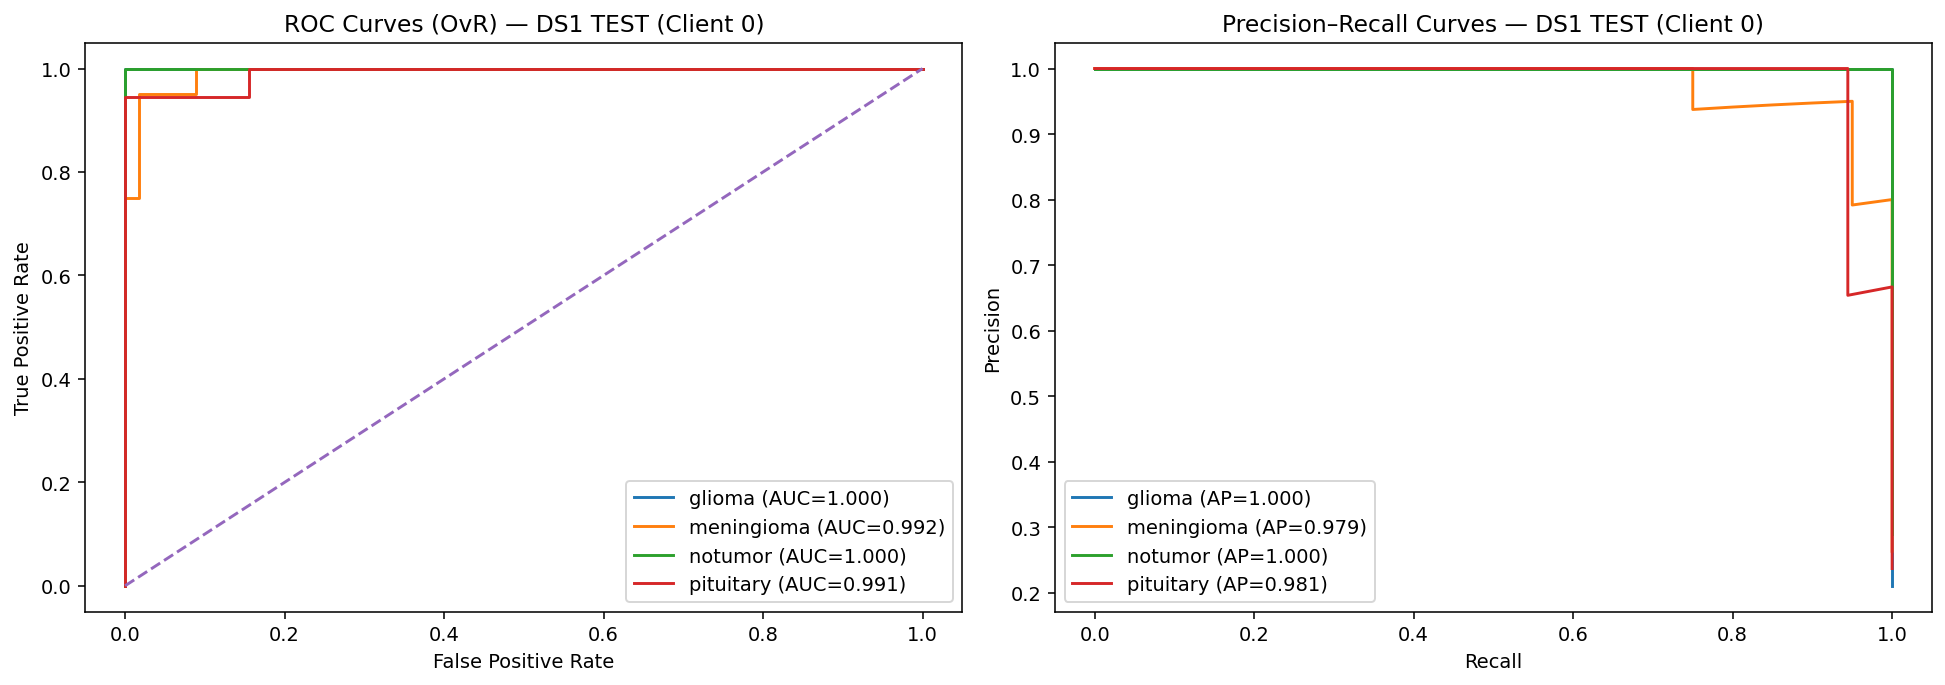

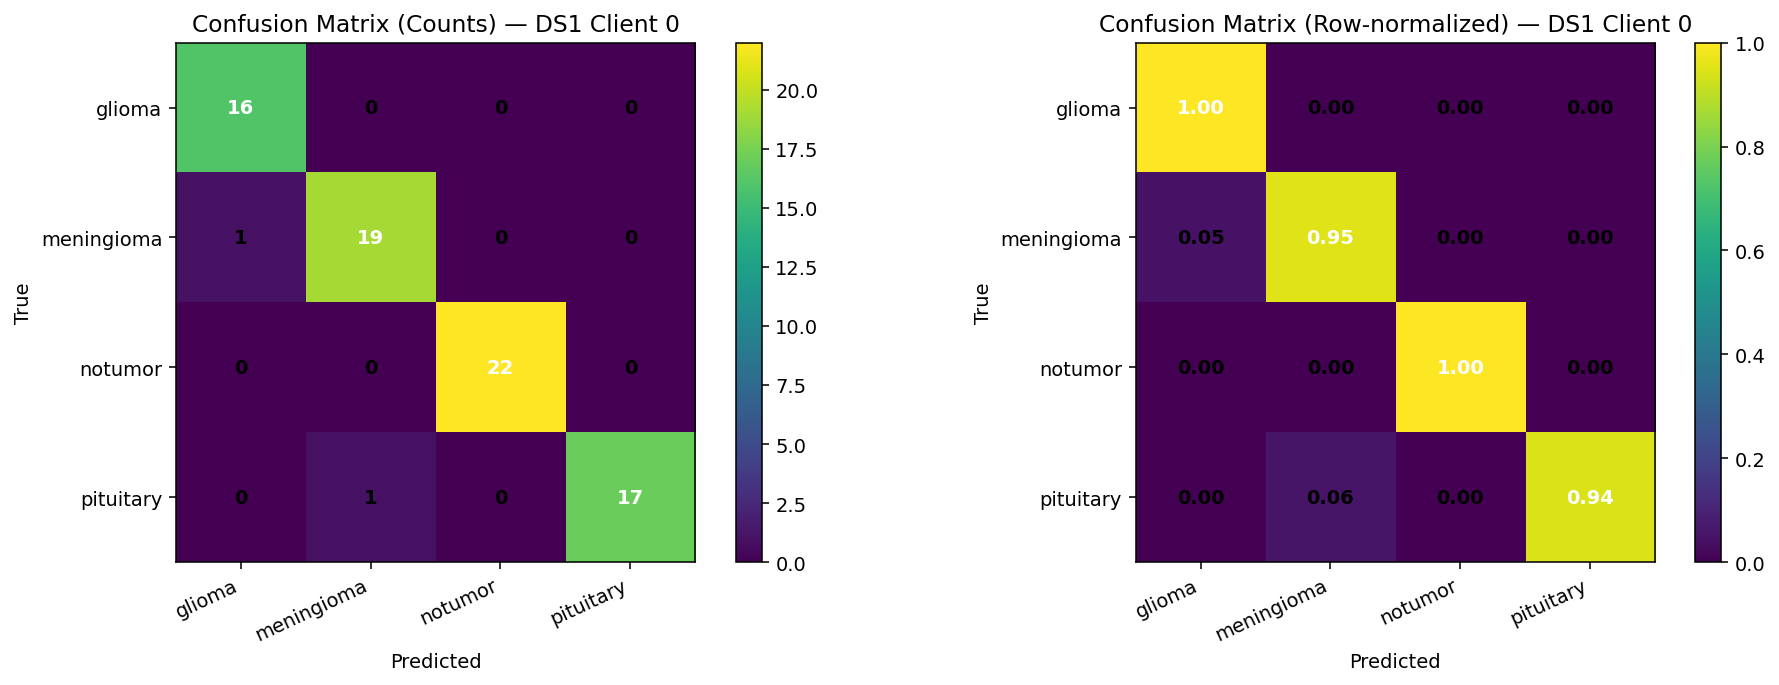

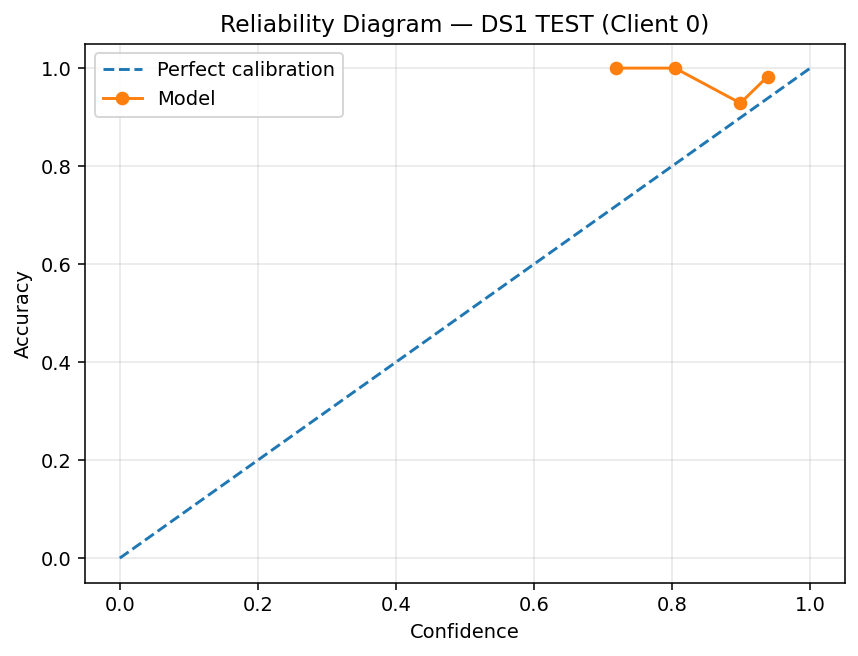


--------------------------------------------------------------------------------------------
Calibration bins table (DS1)
--------------------------------------------------------------------------------------------


bin_confidence  bin_accuracy  bin_count
0              NaN           NaN          0
1              NaN           NaN          0
2              NaN           NaN          0
3              NaN           NaN          0
4              NaN           NaN          0
5              NaN           NaN          0
6              NaN           NaN          0
7              NaN           NaN          0
8         0.718549      1.000000          1
9         0.804083      1.000000          3
10        0.898791      0.928571         14
11        0.938282      0.982759         58


STEP 11: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)
✅ Saved checkpoint: /content/outputs/FL_AUG_FUSION_NOPREPROCESS_PVTv2B2_checkpoint.pth
✅ Saved CSV (ALL outputs): /content/outputs/ALL_OUTPUTS_AND_METRICS.csv

DONE ✅ (TRUE FL, 12 rounds, 6 clients, AUG + FUSION; NO preprocess)


In [ ]:
# ============================================================
# COLAB FULL SCRIPT (kagglehub download)
# TRUE FL — PVTv2-B2 + FUSION (NO PREPROCESS) WITH:
# ✅ Augmentation: ON
# ❌ Preprocess:   OFF
# ✅ Fusion:       ON (Late fusion: global logits = 0.5*PVT + 0.5*ResNet18)
# 6 Clients (3+3), Non-IID Dirichlet split
# Rounds = 12
# EXTRA OUTPUTS:
#  - Leakage/Sanity tables
#  - Client distribution table
#  - Per-round global + per-client metrics tables
#  - ROC + PR Curves (TEST, DS1 one client)
#  - Confusion Matrix (counts + row-normalized) — DS1
#  - Calibration / Reliability diagram — DS1 + bins table
# Saves: checkpoint + one CSV (ALL outputs)
# ============================================================

import os, time, math, random, sys, subprocess, hashlib
from typing import List, Dict, Tuple

import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)

# -------------------------
# Install deps (Colab)
# -------------------------
def pip_install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "-q", "install", pkg])

try:
    import timm
except Exception:
    pip_install("timm")
    import timm

try:
    import kagglehub
except Exception:
    pip_install("kagglehub")
    import kagglehub

from torchvision import transforms

try:
    from IPython.display import display
except Exception:
    display = print

# -------------------------
# Reproducibility + Device
# -------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if DEVICE.type == "cuda":
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
try:
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

plt.rcParams["figure.dpi"] = 140

print("=" * 92)
print("COLAB: TRUE FL — PVTv2-B2 + FUSION (NO PREPROCESS) WITH AUG")
print("=" * 92)
print(f"DEVICE: {DEVICE} | torch={torch.__version__}")
print("=" * 92)

# -------------------------
# Configuration
# -------------------------
CFG = {
    # FL: 3 clients per dataset => total 6
    "clients_per_dataset": 3,
    "clients_total": 6,

    "rounds": 12,           # ✅ requested
    "local_epochs": 2,
    "lr": 1e-3,
    "weight_decay": 5e-4,
    "warmup_epochs": 1,
    "label_smoothing": 0.08,
    "grad_clip": 1.0,
    "fedprox_mu": 0.01,

    # image
    "img_size": 224 if torch.cuda.is_available() else 160,
    "batch_size": 20 if torch.cuda.is_available() else 10,
    "num_workers": 2 if torch.cuda.is_available() else 0,

    # split
    "global_val_frac": 0.15,
    "test_frac": 0.15,
    "client_val_frac": 0.12,
    "client_tune_frac": 0.12,
    "min_per_class_per_client": 5,

    # non-iid
    "dirichlet_alpha": 0.35,

    # toggles (must match request)
    "use_preprocessing": False,  # ❌ preprocess OFF
    "use_augmentation": True,    # ✅ aug ON
    "use_fusion": True,          # ✅ fusion ON

    # fusion weights
    "fusion_weight_main": 0.50,
    "fusion_weight_aux": 0.50,

    # optional late unfreeze
    "unfreeze_after_round": 3,
    "unfreeze_lr_mult": 0.10,
    "unfreeze_tail_frac": 0.17,

    # misc
    "quick_hash_subset_per_split": 300,
    "make_plots": True,
}

OUTDIR = "/content/outputs"
os.makedirs(OUTDIR, exist_ok=True)
MODEL_PATH = os.path.join(OUTDIR, "FL_AUG_FUSION_NOPREPROCESS_PVTv2B2_checkpoint.pth")
CSV_PATH   = os.path.join(OUTDIR, "ALL_OUTPUTS_AND_METRICS.csv")

IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp")

IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=DEVICE).view(1, 3, 1, 1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=DEVICE).view(1, 3, 1, 1)

# ============================================================
# Helper: collect all tables into ONE CSV (long format)
# ============================================================
ALL_ROWS = []
def add_table_to_csv(df, table_name):
    df2 = df.copy()
    df2.insert(0, "table_name", table_name)
    for _, row in df2.iterrows():
        ALL_ROWS.append(row.to_dict())

def print_table(df, title):
    print("\n" + "-" * 92)
    print(title)
    print("-" * 92)
    display(df)

# ============================================================
# STEP 0: DOWNLOAD DATASETS VIA kagglehub
# ============================================================
print("\n" + "=" * 92)
print("STEP 0: DOWNLOAD DATASETS VIA kagglehub")
print("=" * 92)

ds2_path = kagglehub.dataset_download("yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection")
print("✅ DS2 downloaded to:", ds2_path)

ds1_path = kagglehub.dataset_download("orvile/pmram-bangladeshi-brain-cancer-mri-dataset")
print("✅ DS1 downloaded to:", ds1_path)

CFG["ds1_base"] = ds1_path
CFG["ds2_base"] = ds2_path

# ============================================================
# STEP 1: DATASET DISCOVERY (NO CENTRAL MERGE)
# ============================================================
print("\n" + "=" * 92)
print("STEP 1: LOCATE DATASET ROOTS (NO MERGE)")
print("=" * 92)

REQ1 = {"512Glioma", "512Meningioma", "512Normal", "512Pituitary"}
REQ2 = {"glioma", "meningioma", "notumor", "pituitary"}

def norm_label(name: str):
    s = str(name).strip().lower()
    if "glioma" in s: return "glioma"
    if "meningioma" in s: return "meningioma"
    if "pituitary" in s: return "pituitary"
    if "normal" in s or "no_tumor" in s or "no tumor" in s or "notumor" in s: return "notumor"
    return None

def find_root_with_required_class_dirs(base_dir, required_set, prefer_raw=True):
    candidates = []
    for root, dirs, _ in os.walk(base_dir):
        if required_set.issubset(set(dirs)):
            candidates.append(root)
    if not candidates:
        return None

    def score(p):
        pl = p.lower()
        sc = 0
        if prefer_raw:
            if "raw data" in pl: sc += 7
            if os.path.basename(p).lower() == "raw": sc += 7
            if "/raw/" in pl or "\\raw\\" in pl: sc += 3
            if "augmented" in pl: sc -= 20
        sc -= 0.0001 * len(p)
        return sc

    return max(candidates, key=score)

def list_images_under_class_root(class_root, class_dir_name):
    class_dir = os.path.join(class_root, class_dir_name)
    out = []
    for r, _, files in os.walk(class_dir):
        for fn in files:
            if fn.lower().endswith(IMG_EXTS):
                out.append(os.path.join(r, fn))
    return out

def build_df_from_root(ds_root, class_dirs, source_name):
    rows = []
    for c in class_dirs:
        lab = norm_label(c)
        imgs = list_images_under_class_root(ds_root, c)
        print(f"{source_name}: {c} -> {lab} | {len(imgs)} images")
        for p in imgs:
            rows.append({"path": p, "label": lab, "source": source_name})
    dfm = pd.DataFrame(rows).dropna().reset_index(drop=True)
    dfm["path"] = dfm["path"].astype(str)
    dfm["label"] = dfm["label"].astype(str)
    dfm["source"] = dfm["source"].astype(str)
    dfm = dfm.drop_duplicates(subset=["path"]).reset_index(drop=True)
    dfm["filename"] = dfm["path"].apply(lambda x: os.path.basename(x))
    return dfm

DS1_ROOT = find_root_with_required_class_dirs(CFG["ds1_base"], REQ1, prefer_raw=True)
if DS1_ROOT is None:
    raise RuntimeError(f"Could not locate DS1 class root under {CFG['ds1_base']} with dirs {sorted(list(REQ1))}")
print(f"Dataset-1 RAW root detected:\n  {DS1_ROOT}")

DS2_ROOT = find_root_with_required_class_dirs(CFG["ds2_base"], REQ2, prefer_raw=False)
if DS2_ROOT is None:
    raise RuntimeError(f"Could not locate DS2 class root under {CFG['ds2_base']} with dirs {sorted(list(REQ2))}")
print(f"Dataset-2 root detected:\n  {DS2_ROOT}")

print("\n" + "-" * 92)
print("Building Dataset-1 (RAW)")
df1 = build_df_from_root(DS1_ROOT, ["512Glioma", "512Meningioma", "512Normal", "512Pituitary"], "ds1_raw")
print("Building Dataset-2")
df2 = build_df_from_root(DS2_ROOT, ["glioma", "meningioma", "notumor", "pituitary"], "ds2")

labels = ["glioma", "meningioma", "notumor", "pituitary"]
label2id = {l: i for i, l in enumerate(labels)}
id2label = {i: l for l, i in label2id.items()}
NUM_CLASSES = len(labels)

def enforce_labels(df_):
    df_ = df_.copy()
    df_["label"] = df_["label"].astype(str).str.strip().str.lower()
    df_ = df_[df_["label"].isin(set(labels))].reset_index(drop=True)
    df_["y"] = df_["label"].map(label2id).astype(int)
    return df_

df1 = enforce_labels(df1)
df2 = enforce_labels(df2)

print("\n" + "-" * 92)
print(f"Dataset-1 images: {len(df1)}")
print(df1["label"].value_counts().reindex(labels, fill_value=0))
print(f"Dataset-2 images: {len(df2)}")
print(df2["label"].value_counts().reindex(labels, fill_value=0))
print("-" * 92)

# ============================================================
# STEP 2: Train/Val/Test Split per Dataset (STRATIFIED)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2: TRAIN/VAL/TEST SPLIT (PER DATASET)")
print("=" * 92)

def split_dataset(df_):
    train_df, temp_df = train_test_split(
        df_,
        test_size=(CFG["global_val_frac"] + CFG["test_frac"]),
        stratify=df_["y"],
        random_state=SEED,
    )
    val_rel = CFG["global_val_frac"] / (CFG["global_val_frac"] + CFG["test_frac"])
    val_df, test_df = train_test_split(
        temp_df,
        test_size=(1 - val_rel),
        stratify=temp_df["y"],
        random_state=SEED,
    )
    return train_df.reset_index(drop=True), val_df.reset_index(drop=True), test_df.reset_index(drop=True)

train1, val1, test1 = split_dataset(df1)
train2, val2, test2 = split_dataset(df2)

print(f"DS1 TRAIN: {len(train1)} | VAL: {len(val1)} | TEST: {len(test1)}")
print(f"DS2 TRAIN: {len(train2)} | VAL: {len(val2)} | TEST: {len(test2)}")

# ============================================================
# STEP 2.5: Leakage/Sanity Checks (per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2.5: SANITY / LEAKAGE CHECKS (PER DATASET)")
print("=" * 92)

def split_overlap_checks(train_df, val_df, test_df):
    tr = set(train_df["path"].tolist())
    va = set(val_df["path"].tolist())
    te = set(test_df["path"].tolist())
    checks = {
        "path_overlap_train_val": len(tr.intersection(va)),
        "path_overlap_train_test": len(tr.intersection(te)),
        "path_overlap_val_test": len(va.intersection(te)),
        "unique_paths_train": len(tr),
        "unique_paths_val": len(va),
        "unique_paths_test": len(te),
    }
    trf = set(train_df["filename"].tolist())
    vaf = set(val_df["filename"].tolist())
    tef = set(test_df["filename"].tolist())
    checks.update(
        {
            "filename_overlap_train_val": len(trf.intersection(vaf)),
            "filename_overlap_train_test": len(trf.intersection(tef)),
            "filename_overlap_val_test": len(vaf.intersection(tef)),
        }
    )
    return checks

def md5_file(path, max_bytes=2_000_000):
    h = hashlib.md5()
    try:
        with open(path, "rb") as f:
            h.update(f.read(max_bytes))
        return h.hexdigest()
    except Exception:
        return None

def quick_hash_subset(frame, n=300):
    n = min(n, len(frame))
    if n <= 0:
        return set()
    idx = np.random.choice(len(frame), size=n, replace=False)
    hashes = []
    for i in idx:
        hv = md5_file(frame.iloc[i]["path"])
        if hv is not None:
            hashes.append(hv)
    return set(hashes)

def leakage_report(name, tr, va, te):
    over = split_overlap_checks(tr, va, te)
    leak_df = pd.DataFrame([over])

    n_hash = int(CFG["quick_hash_subset_per_split"])
    trh = quick_hash_subset(tr, n_hash)
    vah = quick_hash_subset(va, n_hash)
    teh = quick_hash_subset(te, n_hash)

    hash_over = {
        "subset_hash_train_val": len(trh.intersection(vah)),
        "subset_hash_train_test": len(trh.intersection(teh)),
        "subset_hash_val_test": len(vah.intersection(teh)),
        "subset_hash_n_train": len(trh),
        "subset_hash_n_val": len(vah),
        "subset_hash_n_test": len(teh),
    }
    leak_df = pd.concat([leak_df, pd.DataFrame([hash_over])], axis=1)
    print_table(leak_df, f"Leakage / Sanity Summary — {name}")
    add_table_to_csv(leak_df, f"leakage_sanity_{name}")

leakage_report("ds1", train1, val1, test1)
leakage_report("ds2", train2, val2, test2)

# ============================================================
# STEP 3: Non-IID Client Partitioning (3 clients per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)")
print("=" * 92)

def make_clients_non_iid(train_df, n_clients, num_classes, min_per_class=5, alpha=0.35):
    y = train_df["y"].values
    idx_by_class = {c: np.where(y == c)[0].tolist() for c in range(num_classes)}
    for c in idx_by_class:
        random.shuffle(idx_by_class[c])

    client_indices = [[] for _ in range(n_clients)]

    # ensure some per-class coverage
    for c in range(num_classes):
        idxs = idx_by_class[c]
        feasible = min(min_per_class, max(1, len(idxs) // n_clients))
        for k in range(n_clients):
            take = idxs[:feasible]
            idxs = idxs[feasible:]
            client_indices[k].extend(take)
        idx_by_class[c] = idxs

    # Dirichlet for remaining
    for c in range(num_classes):
        idxs = idx_by_class[c]
        if len(idxs) == 0:
            continue
        props = np.random.dirichlet([alpha] * n_clients)
        counts = (props * len(idxs)).astype(int)
        diff = len(idxs) - counts.sum()
        counts[np.argmax(props)] += diff

        start = 0
        for k in range(n_clients):
            client_indices[k].extend(idxs[start: start + counts[k]])
            start += counts[k]

    for k in range(n_clients):
        random.shuffle(client_indices[k])
    return client_indices

def robust_client_splits(train_df, indices, val_frac, tune_frac):
    idxs = np.array(indices, dtype=int)
    if len(idxs) < 3:
        return idxs.tolist(), idxs.tolist(), idxs.tolist()

    yk = train_df.loc[idxs, "y"].values
    # Split off tune
    if len(np.unique(yk)) < 2 or len(idxs) < 20:
        n_tune = max(1, int(round(len(idxs) * tune_frac)))
        n_tune = min(n_tune, max(1, len(idxs) - 2))
        tune_idx = idxs[:n_tune]
        rem_idx = idxs[n_tune:]
    else:
        rem_idx, tune_idx = train_test_split(
            idxs,
            test_size=tune_frac,
            stratify=yk,
            random_state=SEED,
        )

    # Split remaining into train/val
    if len(rem_idx) < 2:
        return rem_idx.tolist(), tune_idx.tolist(), rem_idx.tolist()

    yk2 = train_df.loc[rem_idx, "y"].values
    if len(np.unique(yk2)) < 2 or len(rem_idx) < 12:
        n_val = max(1, int(round(len(rem_idx) * val_frac)))
        n_val = min(n_val, max(1, len(rem_idx) - 1))
        val_idx = rem_idx[:n_val]
        train_idx = rem_idx[n_val:]
    else:
        train_idx, val_idx = train_test_split(
            rem_idx,
            test_size=val_frac,
            stratify=yk2,
            random_state=SEED,
        )

    if len(train_idx) == 0:
        train_idx = val_idx[:]
    if len(val_idx) == 0:
        val_idx = train_idx[:1]
    return train_idx.tolist(), tune_idx.tolist(), val_idx.tolist()

n_per_ds = CFG["clients_per_dataset"]

client_indices_ds1 = make_clients_non_iid(
    train1,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)
client_indices_ds2 = make_clients_non_iid(
    train2,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)

client_splits = []
for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train1, client_indices_ds1[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = k
    client_splits.append(("ds1", k, gid, tr, tune, va))
    print(f"DS1 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train2, client_indices_ds2[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = n_per_ds + k
    client_splits.append(("ds2", k, gid, tr, tune, va))
    print(f"DS2 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

client_test_splits = []
for ds_name, test_df, base_gid in [("ds1", test1, 0), ("ds2", test2, n_per_ds)]:
    idxs = list(range(len(test_df)))
    random.shuffle(idxs)
    split = np.array_split(idxs, n_per_ds)
    for k in range(n_per_ds):
        client_test_splits.append((ds_name, k, base_gid + k, split[k].tolist()))

def client_distribution_table():
    dist_rows = []
    for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
        df_src = train1 if ds_name == "ds1" else train2
        counts = df_src.loc[tr_idx, "label"].value_counts().reindex(labels, fill_value=0)
        row = {
            "client": f"client_{gid}",
            "dataset": ds_name,
            "total_train": len(tr_idx),
            "total_tune": len(tune_idx),
            "total_val": len(val_idx),
        }
        row.update({lab: int(counts[lab]) for lab in labels})
        dist_rows.append(row)
    return pd.DataFrame(dist_rows)

dist_df = client_distribution_table()
print_table(dist_df, "Client class distribution (Non-IID, per dataset)")
add_table_to_csv(dist_df, "client_distribution")

# ============================================================
# STEP 4: AUGMENTATION (PREPROCESS OFF)
# ============================================================
print("\n" + "=" * 92)
print("STEP 4: DATA LOADERS (AUG ON, PREPROCESS OFF)")
print("=" * 92)

def load_rgb(path):
    try:
        return Image.open(path).convert("RGB")
    except Exception:
        return Image.new("RGB", (CFG["img_size"], CFG["img_size"]), (128, 128, 128))

# Train-time augmentations (applied directly)
TRAIN_TFMS = transforms.Compose([
    transforms.RandomResizedCrop(CFG["img_size"], scale=(0.88, 1.0), ratio=(0.95, 1.05)),
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.30),
    transforms.ColorJitter(brightness=0.08, contrast=0.10, saturation=0.02, hue=0.0),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.12),
    transforms.ToTensor(),
])

EVAL_TFMS = transforms.Compose([
    transforms.Resize((CFG["img_size"], CFG["img_size"])),
    transforms.ToTensor(),
])

class MRIDataset(Dataset):
    def __init__(self, frame, indices=None, tfms=None):
        self.df = frame
        self.indices = indices if indices is not None else list(range(len(frame)))
        self.tfms = tfms

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, i):
        j = self.indices[i]
        row = self.df.iloc[j]

        img = load_rgb(row["path"])
        # no preprocessing
        x = self.tfms(img) if self.tfms is not None else transforms.ToTensor()(img)
        y = int(row["y"])
        return x, y, row["path"]

def make_weighted_sampler(frame, indices, num_classes):
    if len(indices) == 0:
        return None
    ys = frame.loc[indices, "y"].values
    class_counts = np.bincount(ys, minlength=num_classes)
    class_weights = 1.0 / np.clip(class_counts, 1, None)
    sample_weights = class_weights[ys]
    return WeightedRandomSampler(
        weights=torch.DoubleTensor(sample_weights),
        num_samples=len(sample_weights),
        replacement=True,
    )

def make_loader(frame, indices, bs, tfms, shuffle=False, sampler=None):
    ds = MRIDataset(frame, indices=indices, tfms=tfms)
    return DataLoader(
        ds,
        batch_size=bs,
        shuffle=(shuffle and sampler is None),
        sampler=sampler,
        num_workers=CFG["num_workers"],
        pin_memory=(DEVICE.type == "cuda"),
        drop_last=False,
        persistent_workers=(CFG["num_workers"] > 0),
    )

client_loaders = []
for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
    df_src = train1 if ds_name == "ds1" else train2
    sampler = make_weighted_sampler(df_src, tr_idx, NUM_CLASSES)

    tr_loader = make_loader(
        df_src, tr_idx, CFG["batch_size"], TRAIN_TFMS,
        shuffle=(sampler is None), sampler=sampler
    )
    tune_loader = make_loader(
        df_src, tune_idx if len(tune_idx) else tr_idx[:max(1, len(tr_idx))],
        CFG["batch_size"], TRAIN_TFMS, shuffle=True
    )
    val_loader = make_loader(
        df_src, val_idx if len(val_idx) else tr_idx[:max(1, min(len(tr_idx), CFG["batch_size"]))],
        CFG["batch_size"], EVAL_TFMS, shuffle=False
    )
    client_loaders.append((tr_loader, tune_loader, val_loader))

client_test_loaders = []
for (ds_name, local_id, gid, test_idx) in client_test_splits:
    df_src = test1 if ds_name == "ds1" else test2
    t_loader = make_loader(
        df_src, test_idx, CFG["batch_size"], EVAL_TFMS, shuffle=False
    )
    client_test_loaders.append((ds_name, local_id, gid, t_loader))

print(f"Preprocess: OFF ✅ | Augmentation: ON ✅ | Fusion: ON ✅")

# ============================================================
# STEP 5: MODEL (FUSION = PVTv2-B2 + ResNet18)
# ============================================================
print("\n" + "=" * 92)
print("STEP 5: MODEL (FUSION = PVTv2-B2 + ResNet18)")
print("=" * 92)

BACKBONE_MAIN = "pvt_v2_b2"
BACKBONE_AUX  = "resnet18"

def create_backbone(name, pretrained=True):
    return timm.create_model(name, pretrained=pretrained, num_classes=NUM_CLASSES)

class LateFusionModel(nn.Module):
    """
    Late fusion (logits-level):
      logits = w_main * logits_main + w_aux * logits_aux
    """
    def __init__(self, main_name, aux_name, num_classes, w_main=0.5, w_aux=0.5, pretrained=True):
        super().__init__()
        self.main = create_backbone(main_name, pretrained=pretrained)
        self.aux  = create_backbone(aux_name,  pretrained=pretrained)
        self.w_main = float(w_main)
        self.w_aux  = float(w_aux)
        self.num_classes = num_classes

    def forward(self, x):
        l1 = self.main(x)
        l2 = self.aux(x)
        return self.w_main * l1 + self.w_aux * l2

def count_params(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

def set_trainable_for_round(model, rnd):
    # freeze all
    for p in model.parameters():
        p.requires_grad = False

    # heads trainable
    for n, p in model.named_parameters():
        nl = n.lower()
        if any(k in nl for k in ["head", "classifier", "fc"]):
            p.requires_grad = True

    # unfreeze tails after some rounds
    if rnd >= CFG["unfreeze_after_round"]:
        # main tail
        main_params = [(n, p) for n, p in model.main.named_parameters()
                       if not any(k in n.lower() for k in ["head", "classifier", "fc"])]
        if main_params:
            tail_n = max(1, int(len(main_params) * CFG["unfreeze_tail_frac"]))
            for _, p in main_params[-tail_n:]:
                p.requires_grad = True

        # aux tail
        aux_params = [(n, p) for n, p in model.aux.named_parameters()
                      if not any(k in n.lower() for k in ["head", "classifier", "fc"])]
        if aux_params:
            tail_n = max(1, int(len(aux_params) * CFG["unfreeze_tail_frac"]))
            for _, p in aux_params[-tail_n:]:
                p.requires_grad = True

def make_optimizer(model):
    head_params, bb_params = [], []
    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue
        if any(k in n.lower() for k in ["head", "classifier", "fc"]):
            head_params.append(p)
        else:
            bb_params.append(p)

    groups = []
    if head_params:
        groups.append({"params": head_params, "lr": CFG["lr"]})
    if bb_params:
        groups.append({"params": bb_params, "lr": CFG["lr"] * CFG["unfreeze_lr_mult"]})
    return torch.optim.AdamW(groups, weight_decay=CFG["weight_decay"])

# ============================================================
# STEP 6: TRAIN / EVAL UTILITIES
# ============================================================
print("\n" + "=" * 92)
print("STEP 6: TRAIN / EVAL UTILITIES")
print("=" * 92)

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps):
    def lr_lambda(step):
        if step < num_warmup_steps:
            return float(step) / float(max(1, num_warmup_steps))
        progress = float(step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * progress)))
    return torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

@torch.no_grad()
def _auc_metrics(y_true, p_pred, num_classes):
    out = {}
    try:
        if num_classes == 2:
            out["auc_roc"] = float(roc_auc_score(y_true, p_pred[:, 1]))
        else:
            out["auc_roc_macro_ovr"] = float(roc_auc_score(y_true, p_pred, multi_class="ovr", average="macro"))
            for c in range(num_classes):
                yc = (y_true == c).astype(int)
                if yc.sum() > 0 and yc.sum() < len(yc):
                    out[f"auc_class_{c}"] = float(roc_auc_score(yc, p_pred[:, c]))
    except Exception:
        pass
    return out

@torch.no_grad()
def evaluate_full(model, loader):
    t0 = time.time()
    model.eval()

    all_y, all_p, all_loss = [], [], []
    has_any = False

    for x, y, _ in loader:
        has_any = True
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)

        x_n = (x - IMAGENET_MEAN) / IMAGENET_STD
        logits = model(x_n)

        probs = torch.softmax(logits, dim=1)
        loss = F.cross_entropy(logits, y)

        all_loss.append(float(loss.item()))
        all_y.append(y.cpu().numpy())
        all_p.append(probs.cpu().numpy())

    if not has_any:
        met = {
            "loss_ce": np.nan,
            "acc": np.nan,
            "precision_macro": np.nan,
            "recall_macro": np.nan,
            "f1_macro": np.nan,
            "precision_weighted": np.nan,
            "recall_weighted": np.nan,
            "f1_weighted": np.nan,
            "log_loss": np.nan,
            "eval_time_s": float(time.time() - t0),
        }
        return met, np.array([]), np.array([])

    y_true = np.concatenate(all_y)
    p_pred = np.concatenate(all_p)
    y_hat = np.argmax(p_pred, axis=1)

    met = {
        "loss_ce": float(np.mean(all_loss)),
        "acc": float(accuracy_score(y_true, y_hat)),
        "precision_macro": float(precision_score(y_true, y_hat, average="macro", zero_division=0)),
        "recall_macro": float(recall_score(y_true, y_hat, average="macro", zero_division=0)),
        "f1_macro": float(f1_score(y_true, y_hat, average="macro", zero_division=0)),
        "precision_weighted": float(precision_score(y_true, y_hat, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(y_true, y_hat, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(y_true, y_hat, average="weighted", zero_division=0)),
        "log_loss": float(log_loss(y_true, p_pred, labels=list(range(NUM_CLASSES)))),
        "eval_time_s": float(time.time() - t0),
    }
    met.update(_auc_metrics(y_true, p_pred, NUM_CLASSES))
    return met, y_true, p_pred

def fedprox_term(local_model, global_model):
    loss = 0.0
    for p_local, p_global in zip(local_model.parameters(), global_model.parameters()):
        loss += ((p_local - p_global.detach()) ** 2).sum()
    return loss

def train_one_epoch(model, loader, optimizer, criterion, global_model=None, scheduler=None, scaler=None, grad_clip=1.0):
    model.train()
    losses, correct, total = [], 0, 0
    t0 = time.time()

    for x, y, _ in loader:
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)

        with torch.amp.autocast(device_type=DEVICE.type, enabled=(scaler is not None)):
            x_n = (x - IMAGENET_MEAN) / IMAGENET_STD
            logits = model(x_n)
            loss = criterion(logits, y)
            if global_model is not None and CFG["fedprox_mu"] > 0:
                loss = loss + 0.5 * CFG["fedprox_mu"] * fedprox_term(model, global_model)

        optimizer.zero_grad(set_to_none=True)
        if scaler is not None:
            scaler.scale(loss).backward()
            if grad_clip and grad_clip > 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            if grad_clip and grad_clip > 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            optimizer.step()

        if scheduler is not None:
            scheduler.step()

        losses.append(float(loss.item()))
        preds = logits.argmax(dim=1)
        correct += int((preds == y).sum().item())
        total += int(y.size(0))

    return float(np.mean(losses)), float(correct / max(1, total)), float(time.time() - t0)

def fedavg_update(global_model, local_models, weights, trainable_names):
    gsd = global_model.state_dict()
    new_sd = {}
    for name in trainable_names:
        acc = None
        for m, w in zip(local_models, weights):
            p = m.state_dict()[name].detach().float().cpu()
            acc = (w * p) if acc is None else (acc + w * p)
        new_sd[name] = acc
    for name, t in new_sd.items():
        gsd[name].copy_(t.to(gsd[name].device).type_as(gsd[name]))
    global_model.load_state_dict(gsd)

# ============================================================
# STEP 7: INITIALIZE GLOBAL MODEL + LOSS
# ============================================================
print("\n" + "=" * 92)
print("STEP 7: INITIALIZING GLOBAL MODEL (FUSION)")
print("=" * 92)

global_model = LateFusionModel(
    BACKBONE_MAIN, BACKBONE_AUX, NUM_CLASSES,
    w_main=CFG["fusion_weight_main"],
    w_aux=CFG["fusion_weight_aux"],
    pretrained=True
).to(DEVICE)

set_trainable_for_round(global_model, rnd=1)

total_params, tuned_params = count_params(global_model)
print("\n" + "-" * 92)
print(f"Fusion: {BACKBONE_MAIN} + {BACKBONE_AUX} | pretrained_loaded=True")
print(f"Total params: {total_params:,} | Trainable params: {tuned_params:,} ({(tuned_params/total_params)*100:.2f}%)")
print(f"Fusion weights: w_main={CFG['fusion_weight_main']} | w_aux={CFG['fusion_weight_aux']}")
print("-" * 92)

# Class weights (combined)
counts1 = train1["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts2 = train2["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts = counts1 + counts2
w = (counts.sum() / np.clip(counts, 1, None)).astype(np.float32)
w = w / max(1e-6, w.mean())
class_w = torch.tensor(w, device=DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_w, label_smoothing=CFG["label_smoothing"])
scaler = torch.amp.GradScaler("cuda") if DEVICE.type == "cuda" else None

hp_rows = [{"hp_name": k, "hp_value": str(v)} for k, v in CFG.items()]
hp_rows += [
    {"hp_name": "fusion_backbones", "hp_value": f"{BACKBONE_MAIN} + {BACKBONE_AUX}"},
    {"hp_name": "norm", "hp_value": "ImageNet mean/std"},
    {"hp_name": "preprocess", "hp_value": "OFF"},
    {"hp_name": "augmentation", "hp_value": "RRCrop+Rotation+HFlip+ColorJitter+Blur"},
]
hp_df = pd.DataFrame(hp_rows)
print_table(hp_df, "Hyperparameters")
add_table_to_csv(hp_df, "hyperparameters")

# ============================================================
# STEP 8: Federated Training Loop (TRUE FL simulation)
# ============================================================
print("\n" + "=" * 92)
print("STEP 8: FEDERATED TRAINING (AUG + FUSION, NO PREPROCESS)")
print("=" * 92)

history_global = []
history_local = []

best_global_acc = -1.0
best_model_state = None
best_round_saved = None

t_global_start = time.time()

for rnd in range(1, CFG["rounds"] + 1):
    round_t0 = time.time()
    local_models = []
    local_weights = []
    local_rows = []

    print(f"\n{'='*92}")
    print(f"ROUND {rnd}/{CFG['rounds']}")
    print(f"{'='*92}")

    for k in range(CFG["clients_total"]):
        tr_loader, _, val_loader = client_loaders[k]
        ds_name = "ds1" if k < CFG["clients_per_dataset"] else "ds2"

        # Local model copy
        local_model = LateFusionModel(
            BACKBONE_MAIN, BACKBONE_AUX, NUM_CLASSES,
            w_main=CFG["fusion_weight_main"],
            w_aux=CFG["fusion_weight_aux"],
            pretrained=False
        ).to(DEVICE)
        local_model.load_state_dict(global_model.state_dict(), strict=True)

        set_trainable_for_round(local_model, rnd=rnd)
        opt = make_optimizer(local_model)

        total_steps = max(1, len(tr_loader) * CFG["local_epochs"])
        warmup_steps = max(1, len(tr_loader) * CFG["warmup_epochs"])
        scheduler = get_cosine_schedule_with_warmup(opt, warmup_steps, total_steps)

        # Train
        tr_losses, tr_accs, tr_time = [], [], 0.0
        for _ in range(CFG["local_epochs"]):
            loss_ep, acc_ep, t_ep = train_one_epoch(
                local_model,
                tr_loader,
                opt,
                criterion,
                global_model=global_model,
                scheduler=scheduler,
                scaler=scaler,
                grad_clip=CFG["grad_clip"],
            )
            tr_losses.append(loss_ep)
            tr_accs.append(acc_ep)
            tr_time += t_ep

        # Client validation
        met_loc, _, _ = evaluate_full(local_model, val_loader)

        local_models.append(local_model)
        local_weights.append(len(tr_loader.dataset))

        row = {
            "round": rnd,
            "client": f"client_{k}",
            "dataset": ds_name,
            "train_loss": float(np.mean(tr_losses)),
            "train_acc": float(np.mean(tr_accs)),
            "train_time_s": float(tr_time),
            **{f"val_{k2}": v2 for k2, v2 in met_loc.items()},
        }
        local_rows.append(row)

        auc_val = row.get("val_auc_roc_macro_ovr", row.get("val_auc_roc", np.nan))
        print(
            f"Client {k} ({ds_name}) | train_acc={row['train_acc']:.4f} | "
            f"val_acc={row['val_acc']:.4f} | val_f1={row['val_f1_macro']:.4f} | "
            f"val_auc={auc_val:.4f} | val_logloss={row['val_log_loss']:.4f} | "
            f"time(train={row['train_time_s']:.1f}s, eval={row['val_eval_time_s']:.1f}s)"
        )

    # FedAvg (only trainable params)
    wsum = sum(local_weights)
    weights = [w / wsum for w in local_weights]
    trainable_names = [n for n, p in local_models[0].named_parameters() if p.requires_grad]
    fedavg_update(global_model, local_models, weights, trainable_names)

    # Federated global val aggregation (weighted by val size)
    local_val_rows = pd.DataFrame(local_rows)
    local_val_rows["val_size"] = [len(client_loaders[i][2].dataset) for i in range(CFG["clients_total"])]
    total_val = local_val_rows["val_size"].sum()

    def weighted_avg(key):
        if total_val == 0:
            return np.nan
        return float(np.average(local_val_rows[key], weights=local_val_rows["val_size"]))

    global_metrics = {
        "acc": weighted_avg("val_acc"),
        "f1_macro": weighted_avg("val_f1_macro"),
        "precision_macro": weighted_avg("val_precision_macro"),
        "recall_macro": weighted_avg("val_recall_macro"),
        "log_loss": weighted_avg("val_log_loss"),
        "loss_ce": weighted_avg("val_loss_ce"),
        "eval_time_s": weighted_avg("val_eval_time_s"),
    }

    history_local.extend(local_rows)
    history_global.append({
        "round": rnd,
        "round_time_s": float(time.time() - round_t0),
        **{f"global_{k2}": v2 for k2, v2 in global_metrics.items()},
    })

    # best by ACC
    if np.isfinite(global_metrics["acc"]) and global_metrics["acc"] > best_global_acc:
        best_global_acc = float(global_metrics["acc"])
        best_model_state = {k: v.detach().cpu().clone() for k, v in global_model.state_dict().items()}
        best_round_saved = rnd

    print("\n" + "-" * 92)
    print(
        f"GLOBAL VAL (Round {rnd}) | acc={global_metrics['acc']:.4f} | f1={global_metrics['f1_macro']:.4f} | "
        f"logloss={global_metrics['log_loss']:.4f} | loss_ce={global_metrics['loss_ce']:.4f} | "
        f"round_time={history_global[-1]['round_time_s']:.1f}s"
    )
    print(f"BEST SO FAR (by ACC) | best_val_acc={best_global_acc:.4f} at round={best_round_saved}")
    print("-" * 92)

# restore best model
if best_model_state is not None:
    global_model.load_state_dict({k: v.to(DEVICE) for k, v in best_model_state.items()})

t_total = float(time.time() - t_global_start)
print("\n" + "=" * 92)
print(f"TRAINING COMPLETE ✅ | total_time={t_total:.1f}s | best_val_acc={best_global_acc:.4f} | best_round={best_round_saved}")
print("=" * 92)

glob_df = pd.DataFrame(history_global)
loc_df = pd.DataFrame(history_local)
print_table(glob_df, "GLOBAL per-round metrics")
print_table(loc_df, "LOCAL per-client per-round metrics")
add_table_to_csv(glob_df, "global_round_metrics_full")
add_table_to_csv(loc_df, "client_round_metrics_full")

# ============================================================
# STEP 9: Final Evaluation (Federated VAL + TEST)
# ============================================================
print("\n" + "=" * 92)
print("STEP 9: FINAL EVALUATION (FEDERATED VAL + TEST)")
print("=" * 92)

def weighted_aggregate(mets):
    if not mets:
        return {}
    total = sum(w for _, _, w in mets)
    if total == 0:
        return {}
    keys = mets[0][1].keys()
    out = {}
    for k in keys:
        vals = [m[1].get(k, np.nan) for m in mets]
        weights = [m[2] for m in mets]
        out[k] = float(np.average(vals, weights=weights))
    return out

# Federated VAL
val_metrics_clients = []
for k in range(CFG["clients_total"]):
    _, _, val_loader = client_loaders[k]
    met, _, _ = evaluate_full(global_model, val_loader)
    val_metrics_clients.append((k, met, len(val_loader.dataset)))
val_best = weighted_aggregate(val_metrics_clients)

# Federated TEST per dataset
def eval_test_per_dataset(ds_name):
    mets = []
    for (ds, local_id, gid, t_loader) in client_test_loaders:
        if ds != ds_name:
            continue
        met, y_true, p_pred = evaluate_full(global_model, t_loader)
        mets.append((met, len(t_loader.dataset), y_true, p_pred, gid))
    if not mets:
        return {}, []
    agg = weighted_aggregate([(i, m[0], m[1]) for i, m in enumerate(mets)])
    return agg, mets

test_ds1, ds1_mets = eval_test_per_dataset("ds1")
test_ds2, ds2_mets = eval_test_per_dataset("ds2")

# Weighted global test (ds1 + ds2)
global_test = weighted_aggregate([
    (0, test_ds1, len(test1)),
    (1, test_ds2, len(test2)),
])

def compact_metrics(m):
    keep = ["acc","precision_macro","recall_macro","f1_macro","precision_weighted","recall_weighted","f1_weighted","log_loss"]
    if "auc_roc_macro_ovr" in m: keep.append("auc_roc_macro_ovr")
    if "auc_roc" in m: keep.append("auc_roc")
    keep += ["loss_ce","eval_time_s"]
    return {k: float(m[k]) for k in keep if k in m}

paper_df = pd.DataFrame([
    {"setting": "Fusion(PVTv2-B2+ResNet18) AUG (NO PREPROCESS)", "split": "VAL",  "dataset": "ds1+ds2 weighted", **compact_metrics(val_best)},
    {"setting": "Fusion(PVTv2-B2+ResNet18) AUG (NO PREPROCESS)", "split": "TEST", "dataset": "ds1", **compact_metrics(test_ds1)},
    {"setting": "Fusion(PVTv2-B2+ResNet18) AUG (NO PREPROCESS)", "split": "TEST", "dataset": "ds2", **compact_metrics(test_ds2)},
    {"setting": "Fusion(PVTv2-B2+ResNet18) AUG (NO PREPROCESS)", "split": "TEST", "dataset": "global weighted", **compact_metrics(global_test)},
])
print_table(paper_df, "VAL+TEST tables (federated, per-dataset + global)")
add_table_to_csv(paper_df, "paper_ready_metrics")

print("\nPaper selection summary:")
print(f"- Best round (by federated VAL accuracy): round={best_round_saved} | best_val_acc={best_global_acc:.4f}")

# ============================================================
# STEP 10: Plots (DS1 one test client): ROC/PR, CM, Calibration
# ============================================================
print("\n" + "=" * 92)
print("STEP 10: PLOTS (DS1 TEST — ONE CLIENT)")
print("=" * 92)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        # ROC + PR
        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0 or yc.sum() == len(yc):
                continue
            fpr, tpr, _ = roc_curve(yc, p_test[:, c])
            try:
                auc_c = roc_auc_score(yc, p_test[:, c])
                lbl = f"{labels[c]} (AUC={auc_c:.3f})"
            except Exception:
                lbl = f"{labels[c]}"
            plt.plot(fpr, tpr, label=lbl)
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.title(f"ROC Curves (OvR) — DS1 TEST (Client {gid0})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

        plt.subplot(1, 2, 2)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0:
                continue
            prec, rec, _ = precision_recall_curve(yc, p_test[:, c])
            try:
                ap = average_precision_score(yc, p_test[:, c])
                lbl = f"{labels[c]} (AP={ap:.3f})"
            except Exception:
                lbl = f"{labels[c]}"
            plt.plot(rec, prec, label=lbl)
        plt.title(f"Precision–Recall Curves — DS1 TEST (Client {gid0})")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Confusion matrices
        y_hat_test = np.argmax(p_test, axis=1)
        cm_counts = confusion_matrix(y_true_test, y_hat_test, labels=list(range(NUM_CLASSES)))
        cm_norm = cm_counts / np.clip(cm_counts.sum(axis=1, keepdims=True), 1, None)

        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cm_counts, interpolation="nearest", aspect="equal")
        plt.title(f"Confusion Matrix (Counts) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_counts[i, j]
                plt.text(j, i, str(v), ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > cm_counts.max() / 2 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.subplot(1, 2, 2)
        plt.imshow(cm_norm, interpolation="nearest", vmin=0, vmax=1, aspect="equal")
        plt.title(f"Confusion Matrix (Row-normalized) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_norm[i, j]
                plt.text(j, i, f"{v:.2f}", ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > 0.5 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.tight_layout()
        plt.show()

        # Calibration / reliability
        def multiclass_calibration_curve(y_true, p_pred, n_bins=12):
            conf = np.max(p_pred, axis=1)
            pred = np.argmax(p_pred, axis=1)
            acc = (pred == y_true).astype(np.float32)

            bins = np.linspace(0.0, 1.0, n_bins + 1)
            bin_ids = np.digitize(conf, bins) - 1
            bin_ids = np.clip(bin_ids, 0, n_bins - 1)

            bin_conf, bin_acc, bin_count = [], [], []
            for b in range(n_bins):
                m = bin_ids == b
                if m.sum() == 0:
                    bin_conf.append(np.nan)
                    bin_acc.append(np.nan)
                    bin_count.append(0)
                else:
                    bin_conf.append(conf[m].mean())
                    bin_acc.append(acc[m].mean())
                    bin_count.append(int(m.sum()))
            return np.array(bin_conf), np.array(bin_acc), np.array(bin_count)

        bin_conf, bin_acc, bin_n = multiclass_calibration_curve(y_true_test, p_test, n_bins=12)

        fig = plt.figure(figsize=(7, 5))
        plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect calibration")
        plt.plot(bin_conf, bin_acc, marker="o", label="Model")
        plt.title(f"Reliability Diagram — DS1 TEST (Client {gid0})")
        plt.xlabel("Confidence")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        cal_df = pd.DataFrame({"bin_confidence": bin_conf, "bin_accuracy": bin_acc, "bin_count": bin_n})
        print_table(cal_df, "Calibration bins table (DS1)")
        add_table_to_csv(cal_df, "calibration_bins_ds1")

# ============================================================
# STEP 11: SAVE ONLY TWO FILES (checkpoint + one CSV)
# ============================================================
print("\n" + "=" * 92)
print("STEP 11: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)")
print("=" * 92)

checkpoint = {
    "state_dict": {k: v.detach().cpu() for k, v in global_model.state_dict().items()},
    "config": CFG,
    "seed": SEED,
    "device_used": str(DEVICE),
    "dataset1_raw_root": DS1_ROOT,
    "dataset2_root": DS2_ROOT,
    "labels": labels,
    "label2id": label2id,
    "id2label": id2label,
    "num_classes": NUM_CLASSES,
    "fusion_backbones": {"main": BACKBONE_MAIN, "aux": BACKBONE_AUX},
    "fusion_weights": {"w_main": CFG["fusion_weight_main"], "w_aux": CFG["fusion_weight_aux"]},
    "model_type": "Late fusion (logits-level): 0.5*PVTv2-B2 + 0.5*ResNet18",
    "best_round_saved": best_round_saved,
    "best_val_acc": best_global_acc,
    "client_splits": client_splits,
    "client_test_splits": client_test_splits,
    "history_global": pd.DataFrame(history_global).to_dict(orient="list"),
    "history_local": pd.DataFrame(history_local).to_dict(orient="list"),
    "final_val_federated": val_best,
    "final_test_ds1": test_ds1,
    "final_test_ds2": test_ds2,
    "final_test_global_weighted": global_test,
    "total_training_time_s": t_total,
}

torch.save(checkpoint, MODEL_PATH)
print(f"✅ Saved checkpoint: {MODEL_PATH}")

all_df = pd.DataFrame(ALL_ROWS)
all_df.to_csv(CSV_PATH, index=False)
print(f"✅ Saved CSV (ALL outputs): {CSV_PATH}")

print("\nDONE ✅ (TRUE FL, 12 rounds, 6 clients, AUG + FUSION; NO preprocess)")


# **Prpocess+fusion, but no aug**

COLAB: TRUE FL — PVTv2-B2 + FUSION (WITH PREPROCESS, NO AUG)
DEVICE: cuda | torch=2.9.0+cu126

STEP 0: DOWNLOAD DATASETS VIA kagglehub
Using Colab cache for faster access to the 'preprocessed-brain-mri-scans-for-tumors-detection' dataset.
✅ DS2 downloaded to: /kaggle/input/preprocessed-brain-mri-scans-for-tumors-detection
Using Colab cache for faster access to the 'pmram-bangladeshi-brain-cancer-mri-dataset' dataset.
✅ DS1 downloaded to: /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset

STEP 1: LOCATE DATASET ROOTS (NO MERGE)
Dataset-1 RAW root detected:
  /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Raw Data/Raw
Dataset-2 root detected:
  /kaggle/input/preprocessed-brain-mri-scans-for-tumors-detection/preprocessed_brain_mri_dataset

--------------------------------------------------------------------------------------------
Building Dataset-1 (RAW)
ds1_raw: 512Glioma -> glioma

path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                1053               226                226   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      5                       5   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     6                  298                222   

   subset_hash_n_test  
0                 224


--------------------------------------------------------------------------------------------
Leakage / Sanity Summary — ds2
--------------------------------------------------------------------------------------------


path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                4921              1055               1055   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      0                       3   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     4                  299                298   

   subset_hash_n_test  
0                 299


STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)
DS1 Client 0 (global id 0): 490 train, 77 tune, 67 val
DS1 Client 1 (global id 1): 125 train, 20 tune, 18 val
DS1 Client 2 (global id 2): 198 train, 31 tune, 27 val
DS2 Client 0 (global id 3): 629 train, 98 tune, 86 val
DS2 Client 1 (global id 4): 527 train, 82 tune, 72 val
DS2 Client 2 (global id 5): 2653 train, 412 tune, 362 val

--------------------------------------------------------------------------------------------
Client class distribution (Non-IID, per dataset)
--------------------------------------------------------------------------------------------


client dataset  total_train  total_tune  total_val  glioma  meningioma  \
0  client_0     ds1          490          77         67     111          46   
1  client_1     ds1          125          20         18      75           4   
2  client_2     ds1          198          31         27      16         147   
3  client_3     ds2          629          98         86      12         197   
4  client_4     ds2          527          82         72     202           4   
5  client_5     ds2         2653         412        362     665         691   

   notumor  pituitary  
0      176        157  
1        8         38  
2       30          5  
3      416          4  
4      284         37  
5      383        914


STEP 4: DATA LOADERS (PREPROCESS ON, AUG OFF)
Preprocess: ON ✅ | Augmentation: OFF ✅ | Fusion: ON ✅

STEP 5: MODEL (FUSION = PVTv2-B2 + ResNet18)

STEP 6: TRAIN / EVAL UTILITIES

STEP 7: INITIALIZING GLOBAL MODEL (FUSION)

--------------------------------------------------------------------------------------------
Fusion: pvt_v2_b2 + resnet18 | pretrained_loaded=True
Total params: 36,030,472 | Trainable params: 12,479,560 (34.64%)
Fusion weights: w_main=0.5 | w_aux=0.5
--------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------
Hyperparameters
--------------------------------------------------------------------------------------------


hp_name  \
0           clients_per_dataset   
1                 clients_total   
2                        rounds   
3                  local_epochs   
4                            lr   
5                  weight_decay   
6                 warmup_epochs   
7               label_smoothing   
8                     grad_clip   
9                    fedprox_mu   
10                     img_size   
11                   batch_size   
12                  num_workers   
13              global_val_frac   
14                    test_frac   
15              client_val_frac   
16             client_tune_frac   
17     min_per_class_per_client   
18              dirichlet_alpha   
19            use_preprocessing   
20             use_augmentation   
21                   use_fusion   
22           fusion_weight_main   
23            fusion_weight_aux   
24         unfreeze_after_round   
25             unfreeze_lr_mult   
26           unfreeze_tail_frac   
27  quick_hash_subset_per_split   
28                   make_plots   
29                     ds1_base   
30                     ds2_base   
31             fusion_backbones   
32                         norm   
33                   preprocess   
34                 augmentation   

                                             hp_value  
0                                                   3  
1                                                   6  
2                                                  12  
3                                                   2  
4                                               0.001  
5                                              0.0005  
6                                                   1  
7                                                0.08  
8                                                 1.0  
9                                                0.01  
10                                                224  
11                                                 20  
12                                                  2  
13                                               0.15  
14                                               0.15  
15                                               0.12  
16                                               0.12  
17                                                  5  
18                                               0.35  
19                                               True  
20                                              False  
21                                               True  
22                                                0.5  
23                                                0.5  
24                                                  3  
25                                                0.1  
26                                               0.17  
27                                                300  
28                                               True  
29  /kaggle/input/pmram-bangladeshi-brain-cancer-m...  
30  /kaggle/input/preprocessed-brain-mri-scans-for...  
31                               pvt_v2_b2 + resnet18  
32                                  ImageNet mean/std  
33  ON (crop border + CLAHE + median denoise + uns...  
34                                                OFF


STEP 8: FEDERATED TRAINING (PREPROCESS + FUSION, NO AUG)

ROUND 1/12
Client 0 (ds1) | train_acc=0.8082 | val_acc=0.9403 | val_f1=0.9167 | val_auc=0.9656 | val_logloss=0.2928 | time(train=25.8s, eval=2.1s)
Client 1 (ds1) | train_acc=0.5400 | val_acc=0.9444 | val_f1=0.8730 | val_auc=nan | val_logloss=0.6782 | time(train=6.4s, eval=0.9s)
Client 2 (ds1) | train_acc=0.6793 | val_acc=0.8519 | val_f1=0.6637 | val_auc=0.8355 | val_logloss=0.5604 | time(train=10.8s, eval=1.0s)
Client 3 (ds2) | train_acc=0.8975 | val_acc=0.9419 | val_f1=0.4723 | val_auc=0.8518 | val_logloss=0.2268 | time(train=13.8s, eval=1.0s)
Client 4 (ds2) | train_acc=0.8558 | val_acc=0.9861 | val_f1=0.9571 | val_auc=nan | val_logloss=0.1180 | time(train=12.6s, eval=0.9s)
Client 5 (ds2) | train_acc=0.8568 | val_acc=0.9337 | val_f1=0.9302 | val_auc=0.9931 | val_logloss=0.2385 | time(train=57.4s, eval=3.5s)

--------------------------------------------------------------------------------------------
GLOBAL VAL (Round 1) | acc=

round  round_time_s  global_acc  global_f1_macro  global_precision_macro  \
0       1    141.900413    0.938291         0.856497                0.859935   
1       2    137.643090    0.949367         0.869429                0.870622   
2       3    143.507388    0.955696         0.857553                0.862581   
3       4    139.159538    0.950949         0.899597                0.894874   
4       5    140.861989    0.966772         0.929697                0.934205   
5       6    140.895618    0.965190         0.929089                0.931086   
6       7    142.468058    0.966772         0.961591                0.961176   
7       8    139.101110    0.966772         0.895128                0.900624   
8       9    138.901681    0.957278         0.906741                0.898420   
9      10    137.840827    0.974684         0.973150                0.975993   
10     11    137.455092    0.969937         0.932800                0.934510   
11     12    139.420819    0.968354         0.941217                0.939948   

    global_recall_macro  global_log_loss  global_loss_ce  global_eval_time_s  
0              0.856512         0.255215        0.255697            2.515896  
1              0.873687         0.187939        0.187564            2.090395  
2              0.855912         0.176301        0.179288            2.634408  
3              0.915471         0.188298        0.190304            2.057919  
4              0.927116         0.155458        0.154538            2.416882  
5              0.930566         0.144449        0.139758            2.002799  
6              0.965874         0.163067        0.156176            2.432100  
7              0.891453         0.142005        0.143648            2.001480  
8              0.929953         0.174090        0.173247            2.077679  
9              0.973065         0.131915        0.136178            2.418129  
10             0.934458         0.139007        0.149758            2.139226  
11             0.944639         0.134832        0.130618            2.016133


--------------------------------------------------------------------------------------------
LOCAL per-client per-round metrics
--------------------------------------------------------------------------------------------


round    client dataset  train_loss  train_acc  train_time_s  val_loss_ce  \
0       1  client_0     ds1    0.922402   0.808163     25.762664     0.261450   
1       1  client_1     ds1    1.290886   0.540000      6.405485     0.678231   
2       1  client_2     ds1    1.044038   0.679293     10.791677     0.468401   
3       1  client_3     ds2    0.722251   0.897456     13.770110     0.313402   
4       1  client_4     ds2    0.753705   0.855787     12.583501     0.110551   
..    ...       ...     ...         ...        ...           ...          ...   
67     12  client_1     ds1    0.408916   0.964000      7.376527     0.117637   
68     12  client_2     ds1    0.410268   0.972222     10.640926     0.186336   
69     12  client_3     ds2    0.349170   0.996820     14.054033     0.100054   
70     12  client_4     ds2    0.300223   1.000000     11.863484     0.123809   
71     12  client_5     ds2    0.480600   0.982284     56.945349     0.126945   

     val_acc  val_precision_macro  val_recall_macro  ...  \
0   0.940299             0.921245          0.913636  ...   
1   0.944444             0.833333          0.969697  ...   
2   0.851852             0.653409          0.675000  ...   
3   0.941860             0.473607          0.472222  ...   
4   0.986111             0.988506          0.933333  ...   
..       ...                  ...               ...  ...   
67  1.000000             1.000000          1.000000  ...   
68  0.925926             0.916667          0.975000  ...   
69  0.988372             0.995690          0.990741  ...   
70  0.986111             0.750000          0.741071  ...   
71  0.969613             0.966075          0.972373  ...   

    val_precision_weighted  val_recall_weighted  val_f1_weighted  \
0                 0.941529             0.940299         0.939950   
1                 0.972222             0.944444         0.952381   
2                 0.787879             0.851852         0.818342   
3                 0.920724             0.941860         0.930126   
4                 0.986590             0.986111         0.985461   
..                     ...                  ...              ...   
67                1.000000             1.000000         1.000000   
68                0.950617             0.925926         0.931384   
69                0.988573             0.988372         0.988313   
70                1.000000             0.986111         0.992929   
71                0.969897             0.969613         0.969610   

    val_log_loss  val_eval_time_s  val_auc_roc_macro_ovr  val_auc_class_0  \
0       0.292772         2.105355               0.965584         0.958974   
1       0.678230         0.859246                    NaN              NaN   
2       0.560356         0.953443               0.835543         0.640000   
3       0.226823         1.014674               0.851824         0.988235   
4       0.117985         0.909223                    NaN              NaN   
..           ...              ...                    ...              ...   
67      0.117637         0.502935                    NaN              NaN   
68      0.230493         0.739838               0.998214         1.000000   
69      0.104845         0.753173               1.000000         1.000000   
70      0.104467         0.652627                    NaN              NaN   
71      0.130114         2.839084               0.999070         0.999392   

    val_auc_class_1  val_auc_class_2  val_auc_class_3  
0          0.904372         1.000000         0.998990  
1               NaN              NaN              NaN  
2          0.800000         0.902174         1.000000  
3          0.978657         0.993345         0.447059  
4               NaN              NaN              NaN  
..              ...              ...              ...  
67              NaN              NaN              NaN  
68         0.992857         1.000000         1.000000  
69         1.000000         1.000000         1.000000  
70      


STEP 9: FINAL EVALUATION (FEDERATED VAL + TEST)

--------------------------------------------------------------------------------------------
VAL+TEST tables (federated, per-dataset + global)
--------------------------------------------------------------------------------------------


setting split           dataset  \
0  Fusion(PVTv2-B2+ResNet18) PREPROCESS (NO AUG)   VAL  ds1+ds2 weighted   
1  Fusion(PVTv2-B2+ResNet18) PREPROCESS (NO AUG)  TEST               ds1   
2  Fusion(PVTv2-B2+ResNet18) PREPROCESS (NO AUG)  TEST               ds2   
3  Fusion(PVTv2-B2+ResNet18) PREPROCESS (NO AUG)  TEST   global weighted   

        acc  precision_macro  recall_macro  f1_macro  precision_weighted  \
0  0.976266         0.944140      0.949104  0.945583            0.979035   
1  0.955752         0.955920      0.955791  0.954382            0.958339   
2  0.973460         0.972442      0.971590  0.971879            0.973788   
3  0.970336         0.969527      0.968802  0.968792            0.971063   

   recall_weighted  f1_weighted  log_loss  auc_roc_macro_ovr   loss_ce  \
0         0.976266     0.977340  0.130093                NaN  0.129446   
1         0.955752     0.955666  0.195077           0.996725  0.189221   
2         0.973460     0.973496  0.132631           0.996616  0.131866   
3         0.970336     0.970350  0.143648           0.996635  0.141985   

   eval_time_s  
0     1.990821  
1     2.403840  
2     3.192096  
3     3.053028


Paper selection summary:
- Best round (by federated VAL accuracy): round=10 | best_val_acc=0.9747

STEP 10: PLOTS (DS1 TEST — ONE CLIENT)


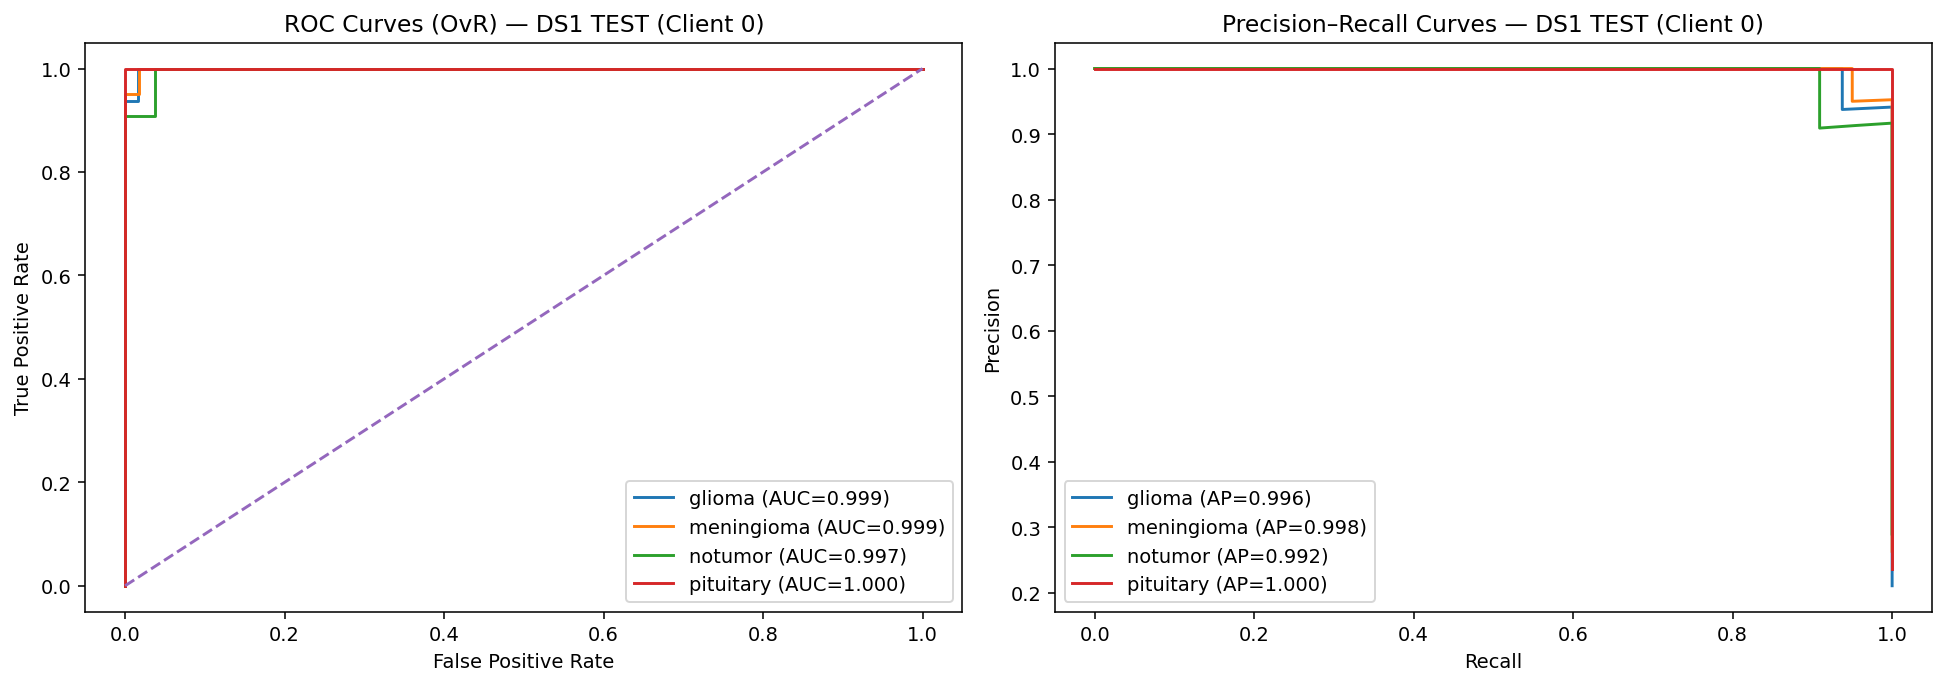

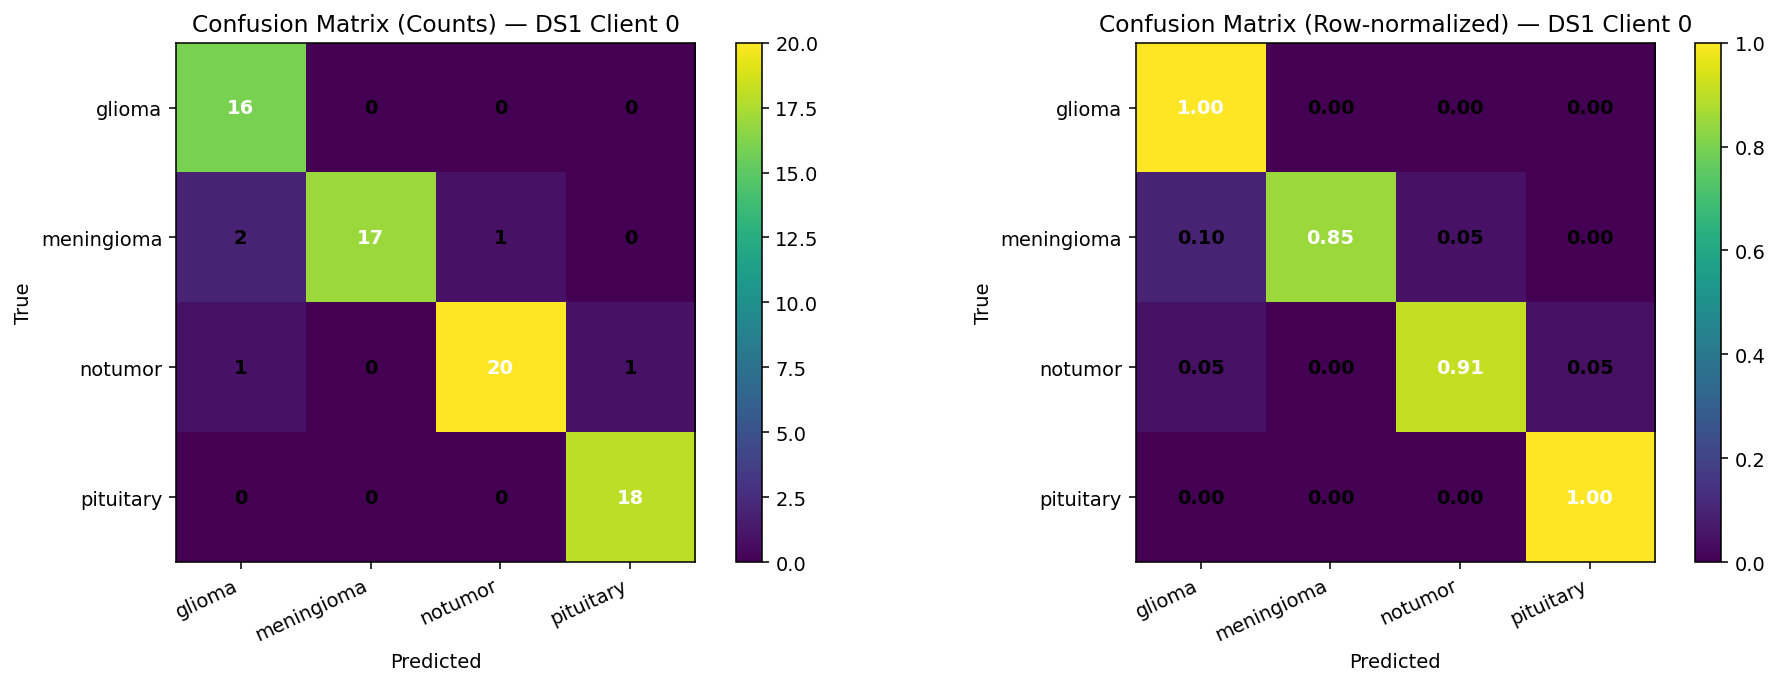

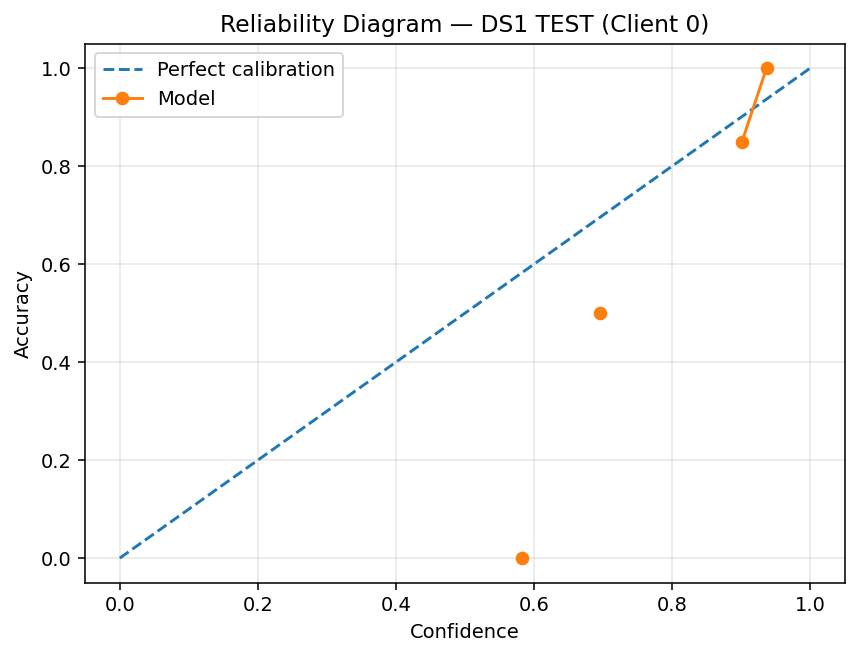


--------------------------------------------------------------------------------------------
Calibration bins table (DS1)
--------------------------------------------------------------------------------------------


bin_confidence  bin_accuracy  bin_count
0              NaN           NaN          0
1              NaN           NaN          0
2              NaN           NaN          0
3              NaN           NaN          0
4              NaN           NaN          0
5              NaN           NaN          0
6         0.582171          0.00          1
7              NaN           NaN          0
8         0.694908          0.50          2
9              NaN           NaN          0
10        0.901178          0.85         20
11        0.936724          1.00         53


STEP 11: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)
✅ Saved checkpoint: /content/outputs/FL_PREPROCESS_FUSION_NOAUG_checkpoint.pth
✅ Saved CSV (ALL outputs): /content/outputs/ALL_OUTPUTS_AND_METRICS.csv

DONE ✅ (TRUE FL, 12 rounds, 6 clients, PREPROCESS + FUSION; NO augmentation)


In [ ]:
# ============================================================
# COLAB FULL SCRIPT (kagglehub download)
# TRUE FL — PVTv2-B2 + FUSION (WITH PREPROCESS, NO AUG)
# ✅ Preprocess:   ON
# ❌ Augmentation: OFF
# ✅ Fusion:       ON (Late fusion: global logits = 0.5*PVT + 0.5*ResNet18)
# 6 Clients (3+3), Non-IID Dirichlet split
# Rounds = 12
# EXTRA OUTPUTS:
#  - Leakage/Sanity tables
#  - Client distribution table
#  - Per-round global + per-client metrics tables
#  - ROC + PR Curves (TEST, DS1 one client)
#  - Confusion Matrix (counts + row-normalized) — DS1
#  - Calibration / Reliability diagram — DS1 + bins table
# Saves: checkpoint + one CSV (ALL outputs)
# ============================================================

import os, time, math, random, sys, subprocess, hashlib
from typing import List, Dict, Tuple

import numpy as np
import pandas as pd
from PIL import Image, ImageOps, ImageFilter

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)

# -------------------------
# Install deps (Colab)
# -------------------------
def pip_install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "-q", "install", pkg])

try:
    import timm
except Exception:
    pip_install("timm")
    import timm

try:
    import kagglehub
except Exception:
    pip_install("kagglehub")
    import kagglehub

# For preprocessing (CLAHE + denoise)
try:
    import cv2
except Exception:
    pip_install("opencv-python-headless")
    import cv2

from torchvision import transforms

try:
    from IPython.display import display
except Exception:
    display = print

# -------------------------
# Reproducibility + Device
# -------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if DEVICE.type == "cuda":
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
try:
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

plt.rcParams["figure.dpi"] = 140

print("=" * 92)
print("COLAB: TRUE FL — PVTv2-B2 + FUSION (WITH PREPROCESS, NO AUG)")
print("=" * 92)
print(f"DEVICE: {DEVICE} | torch={torch.__version__}")
print("=" * 92)

# -------------------------
# Configuration
# -------------------------
CFG = {
    "clients_per_dataset": 3,
    "clients_total": 6,

    "rounds": 12,           # ✅ required
    "local_epochs": 2,
    "lr": 1e-3,
    "weight_decay": 5e-4,
    "warmup_epochs": 1,
    "label_smoothing": 0.08,
    "grad_clip": 1.0,
    "fedprox_mu": 0.01,

    "img_size": 224 if torch.cuda.is_available() else 160,
    "batch_size": 20 if torch.cuda.is_available() else 10,
    "num_workers": 2 if torch.cuda.is_available() else 0,

    "global_val_frac": 0.15,
    "test_frac": 0.15,
    "client_val_frac": 0.12,
    "client_tune_frac": 0.12,
    "min_per_class_per_client": 5,

    "dirichlet_alpha": 0.35,

    # toggles (must match request)
    "use_preprocessing": True,   # ✅ preprocess ON
    "use_augmentation": False,   # ❌ aug OFF
    "use_fusion": True,          # ✅ fusion ON

    "fusion_weight_main": 0.50,
    "fusion_weight_aux": 0.50,

    "unfreeze_after_round": 3,
    "unfreeze_lr_mult": 0.10,
    "unfreeze_tail_frac": 0.17,

    "quick_hash_subset_per_split": 300,
    "make_plots": True,
}

OUTDIR = "/content/outputs"
os.makedirs(OUTDIR, exist_ok=True)
MODEL_PATH = os.path.join(OUTDIR, "FL_PREPROCESS_FUSION_NOAUG_checkpoint.pth")
CSV_PATH   = os.path.join(OUTDIR, "ALL_OUTPUTS_AND_METRICS.csv")

IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp")

IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=DEVICE).view(1, 3, 1, 1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=DEVICE).view(1, 3, 1, 1)

# ============================================================
# Helper: collect all tables into ONE CSV (long format)
# ============================================================
ALL_ROWS = []
def add_table_to_csv(df, table_name):
    df2 = df.copy()
    df2.insert(0, "table_name", table_name)
    for _, row in df2.iterrows():
        ALL_ROWS.append(row.to_dict())

def print_table(df, title):
    print("\n" + "-" * 92)
    print(title)
    print("-" * 92)
    display(df)

# ============================================================
# STEP 0: DOWNLOAD DATASETS VIA kagglehub
# ============================================================
print("\n" + "=" * 92)
print("STEP 0: DOWNLOAD DATASETS VIA kagglehub")
print("=" * 92)

ds2_path = kagglehub.dataset_download("yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection")
print("✅ DS2 downloaded to:", ds2_path)

ds1_path = kagglehub.dataset_download("orvile/pmram-bangladeshi-brain-cancer-mri-dataset")
print("✅ DS1 downloaded to:", ds1_path)

CFG["ds1_base"] = ds1_path
CFG["ds2_base"] = ds2_path

# ============================================================
# STEP 1: DATASET DISCOVERY (NO CENTRAL MERGE)
# ============================================================
print("\n" + "=" * 92)
print("STEP 1: LOCATE DATASET ROOTS (NO MERGE)")
print("=" * 92)

REQ1 = {"512Glioma", "512Meningioma", "512Normal", "512Pituitary"}
REQ2 = {"glioma", "meningioma", "notumor", "pituitary"}

def norm_label(name: str):
    s = str(name).strip().lower()
    if "glioma" in s: return "glioma"
    if "meningioma" in s: return "meningioma"
    if "pituitary" in s: return "pituitary"
    if "normal" in s or "no_tumor" in s or "no tumor" in s or "notumor" in s: return "notumor"
    return None

def find_root_with_required_class_dirs(base_dir, required_set, prefer_raw=True):
    candidates = []
    for root, dirs, _ in os.walk(base_dir):
        if required_set.issubset(set(dirs)):
            candidates.append(root)
    if not candidates:
        return None

    def score(p):
        pl = p.lower()
        sc = 0
        if prefer_raw:
            if "raw data" in pl: sc += 7
            if os.path.basename(p).lower() == "raw": sc += 7
            if "/raw/" in pl or "\\raw\\" in pl: sc += 3
            if "augmented" in pl: sc -= 20
        sc -= 0.0001 * len(p)
        return sc

    return max(candidates, key=score)

def list_images_under_class_root(class_root, class_dir_name):
    class_dir = os.path.join(class_root, class_dir_name)
    out = []
    for r, _, files in os.walk(class_dir):
        for fn in files:
            if fn.lower().endswith(IMG_EXTS):
                out.append(os.path.join(r, fn))
    return out

def build_df_from_root(ds_root, class_dirs, source_name):
    rows = []
    for c in class_dirs:
        lab = norm_label(c)
        imgs = list_images_under_class_root(ds_root, c)
        print(f"{source_name}: {c} -> {lab} | {len(imgs)} images")
        for p in imgs:
            rows.append({"path": p, "label": lab, "source": source_name})
    dfm = pd.DataFrame(rows).dropna().reset_index(drop=True)
    dfm["path"] = dfm["path"].astype(str)
    dfm["label"] = dfm["label"].astype(str)
    dfm["source"] = dfm["source"].astype(str)
    dfm = dfm.drop_duplicates(subset=["path"]).reset_index(drop=True)
    dfm["filename"] = dfm["path"].apply(lambda x: os.path.basename(x))
    return dfm

DS1_ROOT = find_root_with_required_class_dirs(CFG["ds1_base"], REQ1, prefer_raw=True)
if DS1_ROOT is None:
    raise RuntimeError(f"Could not locate DS1 class root under {CFG['ds1_base']} with dirs {sorted(list(REQ1))}")
print(f"Dataset-1 RAW root detected:\n  {DS1_ROOT}")

DS2_ROOT = find_root_with_required_class_dirs(CFG["ds2_base"], REQ2, prefer_raw=False)
if DS2_ROOT is None:
    raise RuntimeError(f"Could not locate DS2 class root under {CFG['ds2_base']} with dirs {sorted(list(REQ2))}")
print(f"Dataset-2 root detected:\n  {DS2_ROOT}")

print("\n" + "-" * 92)
print("Building Dataset-1 (RAW)")
df1 = build_df_from_root(DS1_ROOT, ["512Glioma", "512Meningioma", "512Normal", "512Pituitary"], "ds1_raw")
print("Building Dataset-2")
df2 = build_df_from_root(DS2_ROOT, ["glioma", "meningioma", "notumor", "pituitary"], "ds2")

labels = ["glioma", "meningioma", "notumor", "pituitary"]
label2id = {l: i for i, l in enumerate(labels)}
id2label = {i: l for l, i in label2id.items()}
NUM_CLASSES = len(labels)

def enforce_labels(df_):
    df_ = df_.copy()
    df_["label"] = df_["label"].astype(str).str.strip().str.lower()
    df_ = df_[df_["label"].isin(set(labels))].reset_index(drop=True)
    df_["y"] = df_["label"].map(label2id).astype(int)
    return df_

df1 = enforce_labels(df1)
df2 = enforce_labels(df2)

print("\n" + "-" * 92)
print(f"Dataset-1 images: {len(df1)}")
print(df1["label"].value_counts().reindex(labels, fill_value=0))
print(f"Dataset-2 images: {len(df2)}")
print(df2["label"].value_counts().reindex(labels, fill_value=0))
print("-" * 92)

# ============================================================
# STEP 2: Train/Val/Test Split per Dataset (STRATIFIED)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2: TRAIN/VAL/TEST SPLIT (PER DATASET)")
print("=" * 92)

def split_dataset(df_):
    train_df, temp_df = train_test_split(
        df_,
        test_size=(CFG["global_val_frac"] + CFG["test_frac"]),
        stratify=df_["y"],
        random_state=SEED,
    )
    val_rel = CFG["global_val_frac"] / (CFG["global_val_frac"] + CFG["test_frac"])
    val_df, test_df = train_test_split(
        temp_df,
        test_size=(1 - val_rel),
        stratify=temp_df["y"],
        random_state=SEED,
    )
    return train_df.reset_index(drop=True), val_df.reset_index(drop=True), test_df.reset_index(drop=True)

train1, val1, test1 = split_dataset(df1)
train2, val2, test2 = split_dataset(df2)

print(f"DS1 TRAIN: {len(train1)} | VAL: {len(val1)} | TEST: {len(test1)}")
print(f"DS2 TRAIN: {len(train2)} | VAL: {len(val2)} | TEST: {len(test2)}")

# ============================================================
# STEP 2.5: Leakage/Sanity Checks (per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2.5: SANITY / LEAKAGE CHECKS (PER DATASET)")
print("=" * 92)

def split_overlap_checks(train_df, val_df, test_df):
    tr = set(train_df["path"].tolist())
    va = set(val_df["path"].tolist())
    te = set(test_df["path"].tolist())
    checks = {
        "path_overlap_train_val": len(tr.intersection(va)),
        "path_overlap_train_test": len(tr.intersection(te)),
        "path_overlap_val_test": len(va.intersection(te)),
        "unique_paths_train": len(tr),
        "unique_paths_val": len(va),
        "unique_paths_test": len(te),
    }
    trf = set(train_df["filename"].tolist())
    vaf = set(val_df["filename"].tolist())
    tef = set(test_df["filename"].tolist())
    checks.update(
        {
            "filename_overlap_train_val": len(trf.intersection(vaf)),
            "filename_overlap_train_test": len(trf.intersection(tef)),
            "filename_overlap_val_test": len(vaf.intersection(tef)),
        }
    )
    return checks

def md5_file(path, max_bytes=2_000_000):
    h = hashlib.md5()
    try:
        with open(path, "rb") as f:
            h.update(f.read(max_bytes))
        return h.hexdigest()
    except Exception:
        return None

def quick_hash_subset(frame, n=300):
    n = min(n, len(frame))
    if n <= 0:
        return set()
    idx = np.random.choice(len(frame), size=n, replace=False)
    hashes = []
    for i in idx:
        hv = md5_file(frame.iloc[i]["path"])
        if hv is not None:
            hashes.append(hv)
    return set(hashes)

def leakage_report(name, tr, va, te):
    over = split_overlap_checks(tr, va, te)
    leak_df = pd.DataFrame([over])

    n_hash = int(CFG["quick_hash_subset_per_split"])
    trh = quick_hash_subset(tr, n_hash)
    vah = quick_hash_subset(va, n_hash)
    teh = quick_hash_subset(te, n_hash)

    hash_over = {
        "subset_hash_train_val": len(trh.intersection(vah)),
        "subset_hash_train_test": len(trh.intersection(teh)),
        "subset_hash_val_test": len(vah.intersection(teh)),
        "subset_hash_n_train": len(trh),
        "subset_hash_n_val": len(vah),
        "subset_hash_n_test": len(teh),
    }
    leak_df = pd.concat([leak_df, pd.DataFrame([hash_over])], axis=1)
    print_table(leak_df, f"Leakage / Sanity Summary — {name}")
    add_table_to_csv(leak_df, f"leakage_sanity_{name}")

leakage_report("ds1", train1, val1, test1)
leakage_report("ds2", train2, val2, test2)

# ============================================================
# STEP 3: Non-IID Client Partitioning (3 clients per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)")
print("=" * 92)

def make_clients_non_iid(train_df, n_clients, num_classes, min_per_class=5, alpha=0.35):
    y = train_df["y"].values
    idx_by_class = {c: np.where(y == c)[0].tolist() for c in range(num_classes)}
    for c in idx_by_class:
        random.shuffle(idx_by_class[c])

    client_indices = [[] for _ in range(n_clients)]

    for c in range(num_classes):
        idxs = idx_by_class[c]
        feasible = min(min_per_class, max(1, len(idxs) // n_clients))
        for k in range(n_clients):
            take = idxs[:feasible]
            idxs = idxs[feasible:]
            client_indices[k].extend(take)
        idx_by_class[c] = idxs

    for c in range(num_classes):
        idxs = idx_by_class[c]
        if len(idxs) == 0:
            continue
        props = np.random.dirichlet([alpha] * n_clients)
        counts = (props * len(idxs)).astype(int)
        diff = len(idxs) - counts.sum()
        counts[np.argmax(props)] += diff

        start = 0
        for k in range(n_clients):
            client_indices[k].extend(idxs[start: start + counts[k]])
            start += counts[k]

    for k in range(n_clients):
        random.shuffle(client_indices[k])
    return client_indices

def robust_client_splits(train_df, indices, val_frac, tune_frac):
    idxs = np.array(indices, dtype=int)
    if len(idxs) < 3:
        return idxs.tolist(), idxs.tolist(), idxs.tolist()

    yk = train_df.loc[idxs, "y"].values
    if len(np.unique(yk)) < 2 or len(idxs) < 20:
        n_tune = max(1, int(round(len(idxs) * tune_frac)))
        n_tune = min(n_tune, max(1, len(idxs) - 2))
        tune_idx = idxs[:n_tune]
        rem_idx = idxs[n_tune:]
    else:
        rem_idx, tune_idx = train_test_split(
            idxs,
            test_size=tune_frac,
            stratify=yk,
            random_state=SEED,
        )

    if len(rem_idx) < 2:
        return rem_idx.tolist(), tune_idx.tolist(), rem_idx.tolist()

    yk2 = train_df.loc[rem_idx, "y"].values
    if len(np.unique(yk2)) < 2 or len(rem_idx) < 12:
        n_val = max(1, int(round(len(rem_idx) * val_frac)))
        n_val = min(n_val, max(1, len(rem_idx) - 1))
        val_idx = rem_idx[:n_val]
        train_idx = rem_idx[n_val:]
    else:
        train_idx, val_idx = train_test_split(
            rem_idx,
            test_size=val_frac,
            stratify=yk2,
            random_state=SEED,
        )

    if len(train_idx) == 0:
        train_idx = val_idx[:]
    if len(val_idx) == 0:
        val_idx = train_idx[:1]
    return train_idx.tolist(), tune_idx.tolist(), val_idx.tolist()

n_per_ds = CFG["clients_per_dataset"]

client_indices_ds1 = make_clients_non_iid(
    train1, n_clients=n_per_ds, num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"], alpha=CFG["dirichlet_alpha"],
)
client_indices_ds2 = make_clients_non_iid(
    train2, n_clients=n_per_ds, num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"], alpha=CFG["dirichlet_alpha"],
)

client_splits = []
for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train1, client_indices_ds1[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = k
    client_splits.append(("ds1", k, gid, tr, tune, va))
    print(f"DS1 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train2, client_indices_ds2[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = n_per_ds + k
    client_splits.append(("ds2", k, gid, tr, tune, va))
    print(f"DS2 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

client_test_splits = []
for ds_name, test_df, base_gid in [("ds1", test1, 0), ("ds2", test2, n_per_ds)]:
    idxs = list(range(len(test_df)))
    random.shuffle(idxs)
    split = np.array_split(idxs, n_per_ds)
    for k in range(n_per_ds):
        client_test_splits.append((ds_name, k, base_gid + k, split[k].tolist()))

def client_distribution_table():
    dist_rows = []
    for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
        df_src = train1 if ds_name == "ds1" else train2
        counts = df_src.loc[tr_idx, "label"].value_counts().reindex(labels, fill_value=0)
        row = {
            "client": f"client_{gid}",
            "dataset": ds_name,
            "total_train": len(tr_idx),
            "total_tune": len(tune_idx),
            "total_val": len(val_idx),
        }
        row.update({lab: int(counts[lab]) for lab in labels})
        dist_rows.append(row)
    return pd.DataFrame(dist_rows)

dist_df = client_distribution_table()
print_table(dist_df, "Client class distribution (Non-IID, per dataset)")
add_table_to_csv(dist_df, "client_distribution")

# ============================================================
# STEP 4: PREPROCESSING (ON) + TRANSFORMS (NO AUG)
# ============================================================
print("\n" + "=" * 92)
print("STEP 4: DATA LOADERS (PREPROCESS ON, AUG OFF)")
print("=" * 92)

def load_rgb(path):
    try:
        return Image.open(path).convert("RGB")
    except Exception:
        return Image.new("RGB", (CFG["img_size"], CFG["img_size"]), (128, 128, 128))

def crop_black_border(img: Image.Image, thr=10):
    """Crop near-black borders (deterministic)."""
    arr = np.array(img)
    if arr.ndim == 3:
        gray = arr.mean(axis=2)
    else:
        gray = arr
    mask = gray > thr
    if not mask.any():
        return img
    ys, xs = np.where(mask)
    y0, y1 = ys.min(), ys.max()
    x0, x1 = xs.min(), xs.max()
    # add a tiny padding
    pad = 2
    y0 = max(0, y0 - pad); x0 = max(0, x0 - pad)
    y1 = min(gray.shape[0] - 1, y1 + pad); x1 = min(gray.shape[1] - 1, x1 + pad)
    return img.crop((x0, y0, x1 + 1, y1 + 1))

def clahe_denoise_sharpen(img: Image.Image):
    """
    Deterministic preprocessing:
      1) crop black border
      2) grayscale + CLAHE (contrast)
      3) median denoise
      4) mild unsharp mask
      5) back to RGB
    """
    img = crop_black_border(img, thr=10)

    g = ImageOps.grayscale(img)
    g_np = np.array(g)

    # CLAHE
    try:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        g_np = clahe.apply(g_np)
    except Exception:
        # fallback to PIL equalize if CLAHE not available
        g_np = np.array(ImageOps.equalize(g))

    # denoise
    try:
        g_np = cv2.medianBlur(g_np, 3)
    except Exception:
        pass

    g2 = Image.fromarray(g_np)

    # mild sharpening (unsharp mask style)
    g2 = g2.filter(ImageFilter.UnsharpMask(radius=1.2, percent=120, threshold=3))

    rgb = Image.merge("RGB", (g2, g2, g2))
    return rgb

# NO AUG: same transform for train + eval
BASE_TFMS = transforms.Compose([
    transforms.Resize((CFG["img_size"], CFG["img_size"])),
    transforms.ToTensor(),
])

class MRIDataset(Dataset):
    def __init__(self, frame, indices=None, tfms=None, do_preprocess=False):
        self.df = frame
        self.indices = indices if indices is not None else list(range(len(frame)))
        self.tfms = tfms
        self.do_preprocess = do_preprocess

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, i):
        j = self.indices[i]
        row = self.df.iloc[j]

        img = load_rgb(row["path"])
        if self.do_preprocess:
            img = clahe_denoise_sharpen(img)

        x = self.tfms(img) if self.tfms is not None else transforms.ToTensor()(img)
        y = int(row["y"])
        return x, y, row["path"]

def make_weighted_sampler(frame, indices, num_classes):
    if len(indices) == 0:
        return None
    ys = frame.loc[indices, "y"].values
    class_counts = np.bincount(ys, minlength=num_classes)
    class_weights = 1.0 / np.clip(class_counts, 1, None)
    sample_weights = class_weights[ys]
    return WeightedRandomSampler(
        weights=torch.DoubleTensor(sample_weights),
        num_samples=len(sample_weights),
        replacement=True,
    )

def make_loader(frame, indices, bs, tfms, shuffle=False, sampler=None, do_preprocess=False):
    ds = MRIDataset(frame, indices=indices, tfms=tfms, do_preprocess=do_preprocess)
    return DataLoader(
        ds,
        batch_size=bs,
        shuffle=(shuffle and sampler is None),
        sampler=sampler,
        num_workers=CFG["num_workers"],
        pin_memory=(DEVICE.type == "cuda"),
        drop_last=False,
        persistent_workers=(CFG["num_workers"] > 0),
    )

client_loaders = []
for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
    df_src = train1 if ds_name == "ds1" else train2
    sampler = make_weighted_sampler(df_src, tr_idx, NUM_CLASSES)

    tr_loader = make_loader(
        df_src, tr_idx, CFG["batch_size"], BASE_TFMS,
        shuffle=(sampler is None), sampler=sampler,
        do_preprocess=True
    )
    tune_loader = make_loader(
        df_src, tune_idx if len(tune_idx) else tr_idx[:max(1, len(tr_idx))],
        CFG["batch_size"], BASE_TFMS, shuffle=True,
        do_preprocess=True
    )
    val_loader = make_loader(
        df_src, val_idx if len(val_idx) else tr_idx[:max(1, min(len(tr_idx), CFG["batch_size"]))],
        CFG["batch_size"], BASE_TFMS, shuffle=False,
        do_preprocess=True
    )
    client_loaders.append((tr_loader, tune_loader, val_loader))

client_test_loaders = []
for (ds_name, local_id, gid, test_idx) in client_test_splits:
    df_src = test1 if ds_name == "ds1" else test2
    t_loader = make_loader(
        df_src, test_idx, CFG["batch_size"], BASE_TFMS, shuffle=False,
        do_preprocess=True
    )
    client_test_loaders.append((ds_name, local_id, gid, t_loader))

print(f"Preprocess: ON ✅ | Augmentation: OFF ✅ | Fusion: ON ✅")

# ============================================================
# STEP 5: MODEL (FUSION = PVTv2-B2 + ResNet18)
# ============================================================
print("\n" + "=" * 92)
print("STEP 5: MODEL (FUSION = PVTv2-B2 + ResNet18)")
print("=" * 92)

BACKBONE_MAIN = "pvt_v2_b2"
BACKBONE_AUX  = "resnet18"

def create_backbone(name, pretrained=True):
    return timm.create_model(name, pretrained=pretrained, num_classes=NUM_CLASSES)

class LateFusionModel(nn.Module):
    """
    Late fusion (logits-level):
      logits = w_main * logits_main + w_aux * logits_aux
    """
    def __init__(self, main_name, aux_name, num_classes, w_main=0.5, w_aux=0.5, pretrained=True):
        super().__init__()
        self.main = create_backbone(main_name, pretrained=pretrained)
        self.aux  = create_backbone(aux_name,  pretrained=pretrained)
        self.w_main = float(w_main)
        self.w_aux  = float(w_aux)
        self.num_classes = num_classes

    def forward(self, x):
        l1 = self.main(x)
        l2 = self.aux(x)
        return self.w_main * l1 + self.w_aux * l2

def count_params(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

def set_trainable_for_round(model, rnd):
    for p in model.parameters():
        p.requires_grad = False

    for n, p in model.named_parameters():
        nl = n.lower()
        if any(k in nl for k in ["head", "classifier", "fc"]):
            p.requires_grad = True

    if rnd >= CFG["unfreeze_after_round"]:
        main_params = [(n, p) for n, p in model.main.named_parameters()
                       if not any(k in n.lower() for k in ["head", "classifier", "fc"])]
        if main_params:
            tail_n = max(1, int(len(main_params) * CFG["unfreeze_tail_frac"]))
            for _, p in main_params[-tail_n:]:
                p.requires_grad = True

        aux_params = [(n, p) for n, p in model.aux.named_parameters()
                      if not any(k in n.lower() for k in ["head", "classifier", "fc"])]
        if aux_params:
            tail_n = max(1, int(len(aux_params) * CFG["unfreeze_tail_frac"]))
            for _, p in aux_params[-tail_n:]:
                p.requires_grad = True

def make_optimizer(model):
    head_params, bb_params = [], []
    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue
        if any(k in n.lower() for k in ["head", "classifier", "fc"]):
            head_params.append(p)
        else:
            bb_params.append(p)

    groups = []
    if head_params:
        groups.append({"params": head_params, "lr": CFG["lr"]})
    if bb_params:
        groups.append({"params": bb_params, "lr": CFG["lr"] * CFG["unfreeze_lr_mult"]})
    return torch.optim.AdamW(groups, weight_decay=CFG["weight_decay"])

# ============================================================
# STEP 6: TRAIN / EVAL UTILITIES
# ============================================================
print("\n" + "=" * 92)
print("STEP 6: TRAIN / EVAL UTILITIES")
print("=" * 92)

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps):
    def lr_lambda(step):
        if step < num_warmup_steps:
            return float(step) / float(max(1, num_warmup_steps))
        progress = float(step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * progress)))
    return torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

@torch.no_grad()
def _auc_metrics(y_true, p_pred, num_classes):
    out = {}
    try:
        if num_classes == 2:
            out["auc_roc"] = float(roc_auc_score(y_true, p_pred[:, 1]))
        else:
            out["auc_roc_macro_ovr"] = float(roc_auc_score(y_true, p_pred, multi_class="ovr", average="macro"))
            for c in range(num_classes):
                yc = (y_true == c).astype(int)
                if yc.sum() > 0 and yc.sum() < len(yc):
                    out[f"auc_class_{c}"] = float(roc_auc_score(yc, p_pred[:, c]))
    except Exception:
        pass
    return out

@torch.no_grad()
def evaluate_full(model, loader):
    t0 = time.time()
    model.eval()

    all_y, all_p, all_loss = [], [], []
    has_any = False

    for x, y, _ in loader:
        has_any = True
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)

        x_n = (x - IMAGENET_MEAN) / IMAGENET_STD
        logits = model(x_n)

        probs = torch.softmax(logits, dim=1)
        loss = F.cross_entropy(logits, y)

        all_loss.append(float(loss.item()))
        all_y.append(y.cpu().numpy())
        all_p.append(probs.cpu().numpy())

    if not has_any:
        met = {
            "loss_ce": np.nan,
            "acc": np.nan,
            "precision_macro": np.nan,
            "recall_macro": np.nan,
            "f1_macro": np.nan,
            "precision_weighted": np.nan,
            "recall_weighted": np.nan,
            "f1_weighted": np.nan,
            "log_loss": np.nan,
            "eval_time_s": float(time.time() - t0),
        }
        return met, np.array([]), np.array([])

    y_true = np.concatenate(all_y)
    p_pred = np.concatenate(all_p)
    y_hat = np.argmax(p_pred, axis=1)

    met = {
        "loss_ce": float(np.mean(all_loss)),
        "acc": float(accuracy_score(y_true, y_hat)),
        "precision_macro": float(precision_score(y_true, y_hat, average="macro", zero_division=0)),
        "recall_macro": float(recall_score(y_true, y_hat, average="macro", zero_division=0)),
        "f1_macro": float(f1_score(y_true, y_hat, average="macro", zero_division=0)),
        "precision_weighted": float(precision_score(y_true, y_hat, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(y_true, y_hat, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(y_true, y_hat, average="weighted", zero_division=0)),
        "log_loss": float(log_loss(y_true, p_pred, labels=list(range(NUM_CLASSES)))),
        "eval_time_s": float(time.time() - t0),
    }
    met.update(_auc_metrics(y_true, p_pred, NUM_CLASSES))
    return met, y_true, p_pred

def fedprox_term(local_model, global_model):
    loss = 0.0
    for p_local, p_global in zip(local_model.parameters(), global_model.parameters()):
        loss += ((p_local - p_global.detach()) ** 2).sum()
    return loss

def train_one_epoch(model, loader, optimizer, criterion, global_model=None, scheduler=None, scaler=None, grad_clip=1.0):
    model.train()
    losses, correct, total = [], 0, 0
    t0 = time.time()

    for x, y, _ in loader:
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)

        with torch.amp.autocast(device_type=DEVICE.type, enabled=(scaler is not None)):
            x_n = (x - IMAGENET_MEAN) / IMAGENET_STD
            logits = model(x_n)
            loss = criterion(logits, y)
            if global_model is not None and CFG["fedprox_mu"] > 0:
                loss = loss + 0.5 * CFG["fedprox_mu"] * fedprox_term(model, global_model)

        optimizer.zero_grad(set_to_none=True)
        if scaler is not None:
            scaler.scale(loss).backward()
            if grad_clip and grad_clip > 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            if grad_clip and grad_clip > 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            optimizer.step()

        if scheduler is not None:
            scheduler.step()

        losses.append(float(loss.item()))
        preds = logits.argmax(dim=1)
        correct += int((preds == y).sum().item())
        total += int(y.size(0))

    return float(np.mean(losses)), float(correct / max(1, total)), float(time.time() - t0)

def fedavg_update(global_model, local_models, weights, trainable_names):
    gsd = global_model.state_dict()
    new_sd = {}
    for name in trainable_names:
        acc = None
        for m, w in zip(local_models, weights):
            p = m.state_dict()[name].detach().float().cpu()
            acc = (w * p) if acc is None else (acc + w * p)
        new_sd[name] = acc
    for name, t in new_sd.items():
        gsd[name].copy_(t.to(gsd[name].device).type_as(gsd[name]))
    global_model.load_state_dict(gsd)

# ============================================================
# STEP 7: INITIALIZE GLOBAL MODEL + LOSS
# ============================================================
print("\n" + "=" * 92)
print("STEP 7: INITIALIZING GLOBAL MODEL (FUSION)")
print("=" * 92)

global_model = LateFusionModel(
    "pvt_v2_b2", "resnet18", NUM_CLASSES,
    w_main=CFG["fusion_weight_main"],
    w_aux=CFG["fusion_weight_aux"],
    pretrained=True
).to(DEVICE)

set_trainable_for_round(global_model, rnd=1)

total_params, tuned_params = count_params(global_model)
print("\n" + "-" * 92)
print(f"Fusion: pvt_v2_b2 + resnet18 | pretrained_loaded=True")
print(f"Total params: {total_params:,} | Trainable params: {tuned_params:,} ({(tuned_params/total_params)*100:.2f}%)")
print(f"Fusion weights: w_main={CFG['fusion_weight_main']} | w_aux={CFG['fusion_weight_aux']}")
print("-" * 92)

# Class weights (combined)
counts1 = train1["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts2 = train2["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts = counts1 + counts2
w = (counts.sum() / np.clip(counts, 1, None)).astype(np.float32)
w = w / max(1e-6, w.mean())
class_w = torch.tensor(w, device=DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_w, label_smoothing=CFG["label_smoothing"])
scaler = torch.amp.GradScaler("cuda") if DEVICE.type == "cuda" else None

hp_rows = [{"hp_name": k, "hp_value": str(v)} for k, v in CFG.items()]
hp_rows += [
    {"hp_name": "fusion_backbones", "hp_value": "pvt_v2_b2 + resnet18"},
    {"hp_name": "norm", "hp_value": "ImageNet mean/std"},
    {"hp_name": "preprocess", "hp_value": "ON (crop border + CLAHE + median denoise + unsharp)"},
    {"hp_name": "augmentation", "hp_value": "OFF"},
]
hp_df = pd.DataFrame(hp_rows)
print_table(hp_df, "Hyperparameters")
add_table_to_csv(hp_df, "hyperparameters")

# ============================================================
# STEP 8: Federated Training Loop (TRUE FL simulation)
# ============================================================
print("\n" + "=" * 92)
print("STEP 8: FEDERATED TRAINING (PREPROCESS + FUSION, NO AUG)")
print("=" * 92)

history_global = []
history_local = []

best_global_acc = -1.0
best_model_state = None
best_round_saved = None

t_global_start = time.time()

for rnd in range(1, CFG["rounds"] + 1):
    round_t0 = time.time()
    local_models = []
    local_weights = []
    local_rows = []

    print(f"\n{'='*92}")
    print(f"ROUND {rnd}/{CFG['rounds']}")
    print(f"{'='*92}")

    for k in range(CFG["clients_total"]):
        tr_loader, _, val_loader = client_loaders[k]
        ds_name = "ds1" if k < CFG["clients_per_dataset"] else "ds2"

        local_model = LateFusionModel(
            "pvt_v2_b2", "resnet18", NUM_CLASSES,
            w_main=CFG["fusion_weight_main"],
            w_aux=CFG["fusion_weight_aux"],
            pretrained=False
        ).to(DEVICE)
        local_model.load_state_dict(global_model.state_dict(), strict=True)

        set_trainable_for_round(local_model, rnd=rnd)
        opt = make_optimizer(local_model)

        total_steps = max(1, len(tr_loader) * CFG["local_epochs"])
        warmup_steps = max(1, len(tr_loader) * CFG["warmup_epochs"])
        scheduler = get_cosine_schedule_with_warmup(opt, warmup_steps, total_steps)

        tr_losses, tr_accs, tr_time = [], [], 0.0
        for _ in range(CFG["local_epochs"]):
            loss_ep, acc_ep, t_ep = train_one_epoch(
                local_model, tr_loader, opt, criterion,
                global_model=global_model,
                scheduler=scheduler,
                scaler=scaler,
                grad_clip=CFG["grad_clip"],
            )
            tr_losses.append(loss_ep)
            tr_accs.append(acc_ep)
            tr_time += t_ep

        met_loc, _, _ = evaluate_full(local_model, val_loader)

        local_models.append(local_model)
        local_weights.append(len(tr_loader.dataset))

        row = {
            "round": rnd,
            "client": f"client_{k}",
            "dataset": ds_name,
            "train_loss": float(np.mean(tr_losses)),
            "train_acc": float(np.mean(tr_accs)),
            "train_time_s": float(tr_time),
            **{f"val_{k2}": v2 for k2, v2 in met_loc.items()},
        }
        local_rows.append(row)

        auc_val = row.get("val_auc_roc_macro_ovr", row.get("val_auc_roc", np.nan))
        print(
            f"Client {k} ({ds_name}) | train_acc={row['train_acc']:.4f} | "
            f"val_acc={row['val_acc']:.4f} | val_f1={row['val_f1_macro']:.4f} | "
            f"val_auc={auc_val:.4f} | val_logloss={row['val_log_loss']:.4f} | "
            f"time(train={row['train_time_s']:.1f}s, eval={row['val_eval_time_s']:.1f}s)"
        )

    wsum = sum(local_weights)
    weights = [w / wsum for w in local_weights]
    trainable_names = [n for n, p in local_models[0].named_parameters() if p.requires_grad]
    fedavg_update(global_model, local_models, weights, trainable_names)

    local_val_rows = pd.DataFrame(local_rows)
    local_val_rows["val_size"] = [len(client_loaders[i][2].dataset) for i in range(CFG["clients_total"])]
    total_val = local_val_rows["val_size"].sum()

    def weighted_avg(key):
        if total_val == 0:
            return np.nan
        return float(np.average(local_val_rows[key], weights=local_val_rows["val_size"]))

    global_metrics = {
        "acc": weighted_avg("val_acc"),
        "f1_macro": weighted_avg("val_f1_macro"),
        "precision_macro": weighted_avg("val_precision_macro"),
        "recall_macro": weighted_avg("val_recall_macro"),
        "log_loss": weighted_avg("val_log_loss"),
        "loss_ce": weighted_avg("val_loss_ce"),
        "eval_time_s": weighted_avg("val_eval_time_s"),
    }

    history_local.extend(local_rows)
    history_global.append({
        "round": rnd,
        "round_time_s": float(time.time() - round_t0),
        **{f"global_{k2}": v2 for k2, v2 in global_metrics.items()},
    })

    if np.isfinite(global_metrics["acc"]) and global_metrics["acc"] > best_global_acc:
        best_global_acc = float(global_metrics["acc"])
        best_model_state = {k: v.detach().cpu().clone() for k, v in global_model.state_dict().items()}
        best_round_saved = rnd

    print("\n" + "-" * 92)
    print(
        f"GLOBAL VAL (Round {rnd}) | acc={global_metrics['acc']:.4f} | f1={global_metrics['f1_macro']:.4f} | "
        f"logloss={global_metrics['log_loss']:.4f} | loss_ce={global_metrics['loss_ce']:.4f} | "
        f"round_time={history_global[-1]['round_time_s']:.1f}s"
    )
    print(f"BEST SO FAR (by ACC) | best_val_acc={best_global_acc:.4f} at round={best_round_saved}")
    print("-" * 92)

if best_model_state is not None:
    global_model.load_state_dict({k: v.to(DEVICE) for k, v in best_model_state.items()})

t_total = float(time.time() - t_global_start)
print("\n" + "=" * 92)
print(f"TRAINING COMPLETE ✅ | total_time={t_total:.1f}s | best_val_acc={best_global_acc:.4f} | best_round={best_round_saved}")
print("=" * 92)

glob_df = pd.DataFrame(history_global)
loc_df = pd.DataFrame(history_local)
print_table(glob_df, "GLOBAL per-round metrics")
print_table(loc_df, "LOCAL per-client per-round metrics")
add_table_to_csv(glob_df, "global_round_metrics_full")
add_table_to_csv(loc_df, "client_round_metrics_full")

# ============================================================
# STEP 9: Final Evaluation (Federated VAL + TEST)
# ============================================================
print("\n" + "=" * 92)
print("STEP 9: FINAL EVALUATION (FEDERATED VAL + TEST)")
print("=" * 92)

def weighted_aggregate(mets):
    if not mets:
        return {}
    total = sum(w for _, _, w in mets)
    if total == 0:
        return {}
    keys = mets[0][1].keys()
    out = {}
    for k in keys:
        vals = [m[1].get(k, np.nan) for m in mets]
        weights = [m[2] for m in mets]
        out[k] = float(np.average(vals, weights=weights))
    return out

val_metrics_clients = []
for k in range(CFG["clients_total"]):
    _, _, val_loader = client_loaders[k]
    met, _, _ = evaluate_full(global_model, val_loader)
    val_metrics_clients.append((k, met, len(val_loader.dataset)))
val_best = weighted_aggregate(val_metrics_clients)

def eval_test_per_dataset(ds_name):
    mets = []
    for (ds, local_id, gid, t_loader) in client_test_loaders:
        if ds != ds_name:
            continue
        met, y_true, p_pred = evaluate_full(global_model, t_loader)
        mets.append((met, len(t_loader.dataset), y_true, p_pred, gid))
    if not mets:
        return {}, []
    agg = weighted_aggregate([(i, m[0], m[1]) for i, m in enumerate(mets)])
    return agg, mets

test_ds1, ds1_mets = eval_test_per_dataset("ds1")
test_ds2, ds2_mets = eval_test_per_dataset("ds2")

global_test = weighted_aggregate([
    (0, test_ds1, len(test1)),
    (1, test_ds2, len(test2)),
])

def compact_metrics(m):
    keep = ["acc","precision_macro","recall_macro","f1_macro","precision_weighted","recall_weighted","f1_weighted","log_loss"]
    if "auc_roc_macro_ovr" in m: keep.append("auc_roc_macro_ovr")
    if "auc_roc" in m: keep.append("auc_roc")
    keep += ["loss_ce","eval_time_s"]
    return {k: float(m[k]) for k in keep if k in m}

paper_df = pd.DataFrame([
    {"setting": "Fusion(PVTv2-B2+ResNet18) PREPROCESS (NO AUG)", "split": "VAL",  "dataset": "ds1+ds2 weighted", **compact_metrics(val_best)},
    {"setting": "Fusion(PVTv2-B2+ResNet18) PREPROCESS (NO AUG)", "split": "TEST", "dataset": "ds1", **compact_metrics(test_ds1)},
    {"setting": "Fusion(PVTv2-B2+ResNet18) PREPROCESS (NO AUG)", "split": "TEST", "dataset": "ds2", **compact_metrics(test_ds2)},
    {"setting": "Fusion(PVTv2-B2+ResNet18) PREPROCESS (NO AUG)", "split": "TEST", "dataset": "global weighted", **compact_metrics(global_test)},
])
print_table(paper_df, "VAL+TEST tables (federated, per-dataset + global)")
add_table_to_csv(paper_df, "paper_ready_metrics")

print("\nPaper selection summary:")
print(f"- Best round (by federated VAL accuracy): round={best_round_saved} | best_val_acc={best_global_acc:.4f}")

# ============================================================
# STEP 10: Plots (DS1 one test client): ROC/PR, CM, Calibration
# ============================================================
print("\n" + "=" * 92)
print("STEP 10: PLOTS (DS1 TEST — ONE CLIENT)")
print("=" * 92)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0 or yc.sum() == len(yc):
                continue
            fpr, tpr, _ = roc_curve(yc, p_test[:, c])
            try:
                auc_c = roc_auc_score(yc, p_test[:, c])
                lbl = f"{labels[c]} (AUC={auc_c:.3f})"
            except Exception:
                lbl = f"{labels[c]}"
            plt.plot(fpr, tpr, label=lbl)
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.title(f"ROC Curves (OvR) — DS1 TEST (Client {gid0})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

        plt.subplot(1, 2, 2)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0:
                continue
            prec, rec, _ = precision_recall_curve(yc, p_test[:, c])
            try:
                ap = average_precision_score(yc, p_test[:, c])
                lbl = f"{labels[c]} (AP={ap:.3f})"
            except Exception:
                lbl = f"{labels[c]}"
            plt.plot(rec, prec, label=lbl)
        plt.title(f"Precision–Recall Curves — DS1 TEST (Client {gid0})")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()

        plt.tight_layout()
        plt.show()

        y_hat_test = np.argmax(p_test, axis=1)
        cm_counts = confusion_matrix(y_true_test, y_hat_test, labels=list(range(NUM_CLASSES)))
        cm_norm = cm_counts / np.clip(cm_counts.sum(axis=1, keepdims=True), 1, None)

        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cm_counts, interpolation="nearest", aspect="equal")
        plt.title(f"Confusion Matrix (Counts) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_counts[i, j]
                plt.text(j, i, str(v), ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > cm_counts.max() / 2 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.subplot(1, 2, 2)
        plt.imshow(cm_norm, interpolation="nearest", vmin=0, vmax=1, aspect="equal")
        plt.title(f"Confusion Matrix (Row-normalized) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_norm[i, j]
                plt.text(j, i, f"{v:.2f}", ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > 0.5 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.tight_layout()
        plt.show()

        def multiclass_calibration_curve(y_true, p_pred, n_bins=12):
            conf = np.max(p_pred, axis=1)
            pred = np.argmax(p_pred, axis=1)
            acc = (pred == y_true).astype(np.float32)

            bins = np.linspace(0.0, 1.0, n_bins + 1)
            bin_ids = np.digitize(conf, bins) - 1
            bin_ids = np.clip(bin_ids, 0, n_bins - 1)

            bin_conf, bin_acc, bin_count = [], [], []
            for b in range(n_bins):
                m = bin_ids == b
                if m.sum() == 0:
                    bin_conf.append(np.nan)
                    bin_acc.append(np.nan)
                    bin_count.append(0)
                else:
                    bin_conf.append(conf[m].mean())
                    bin_acc.append(acc[m].mean())
                    bin_count.append(int(m.sum()))
            return np.array(bin_conf), np.array(bin_acc), np.array(bin_count)

        bin_conf, bin_acc, bin_n = multiclass_calibration_curve(y_true_test, p_test, n_bins=12)

        fig = plt.figure(figsize=(7, 5))
        plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect calibration")
        plt.plot(bin_conf, bin_acc, marker="o", label="Model")
        plt.title(f"Reliability Diagram — DS1 TEST (Client {gid0})")
        plt.xlabel("Confidence")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        cal_df = pd.DataFrame({"bin_confidence": bin_conf, "bin_accuracy": bin_acc, "bin_count": bin_n})
        print_table(cal_df, "Calibration bins table (DS1)")
        add_table_to_csv(cal_df, "calibration_bins_ds1")

# ============================================================
# STEP 11: SAVE ONLY TWO FILES (checkpoint + one CSV)
# ============================================================
print("\n" + "=" * 92)
print("STEP 11: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)")
print("=" * 92)

checkpoint = {
    "state_dict": {k: v.detach().cpu() for k, v in global_model.state_dict().items()},
    "config": CFG,
    "seed": SEED,
    "device_used": str(DEVICE),
    "dataset1_raw_root": DS1_ROOT,
    "dataset2_root": DS2_ROOT,
    "labels": labels,
    "label2id": label2id,
    "id2label": id2label,
    "num_classes": NUM_CLASSES,
    "fusion_backbones": {"main": "pvt_v2_b2", "aux": "resnet18"},
    "fusion_weights": {"w_main": CFG["fusion_weight_main"], "w_aux": CFG["fusion_weight_aux"]},
    "model_type": "Late fusion (logits-level): 0.5*PVTv2-B2 + 0.5*ResNet18",
    "best_round_saved": best_round_saved,
    "best_val_acc": best_global_acc,
    "client_splits": client_splits,
    "client_test_splits": client_test_splits,
    "history_global": pd.DataFrame(history_global).to_dict(orient="list"),
    "history_local": pd.DataFrame(history_local).to_dict(orient="list"),
    "final_val_federated": val_best,
    "final_test_ds1": test_ds1,
    "final_test_ds2": test_ds2,
    "final_test_global_weighted": global_test,
    "total_training_time_s": t_total,
}

torch.save(checkpoint, MODEL_PATH)
print(f"✅ Saved checkpoint: {MODEL_PATH}")

all_df = pd.DataFrame(ALL_ROWS)
all_df.to_csv(CSV_PATH, index=False)
print(f"✅ Saved CSV (ALL outputs): {CSV_PATH}")

print("\nDONE ✅ (TRUE FL, 12 rounds, 6 clients, PREPROCESS + FUSION; NO augmentation)")
